<a href="https://colab.research.google.com/github/atriap/Bankruptcy-Prediction/blob/main/bankruptcy_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
import pickle
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [ ]:
bankrupt=pd.read_csv('b_data.csv')

In [ ]:
bankrupt.head()

bankrupt       roa  operating_gross_margin  current_ratio  quick_ratio  \
0         1  0.405750                0.601457       0.002259     0.001208   
1         1  0.516730                0.610235       0.006016     0.004039   
2         1  0.472295                0.601450       0.011543     0.005348   
3         1  0.457733                0.583541       0.004194     0.002896   
4         1  0.522298                0.598783       0.006022     0.003727   

   interest_expense_ratio  debt_ratio  working_capital_to_assets  \
0                0.629951    0.207576                   0.672775   
1                0.635172    0.171176                   0.751111   
2                0.629631    0.207516                   0.829502   
3                0.630228    0.151465                   0.725754   
4                0.636055    0.106509                   0.751822   

   quick_asset_to_assets  current_asset_to_assets  cash_to_assets  \
0               0.166673                 0.190643        0.004094   
1               0.127236                 0.182419        0.014948   
2               0.340201                 0.602806        0.000991   
3               0.161575                 0.225815        0.018851   
4               0.260330                 0.358380        0.014161   

   quick_assets_to_current_liability  cash_to_current_liability  \
0                           0.001997               1.473360e-04   
1                           0.004136               1.383910e-03   
2                           0.006302               5.340000e+09   
3                           0.002961               1.010646e-03   
4                           0.004275               6.804640e-04   

   current_liability_to_assets  
0                     0.147308  
1                     0.056963  
2                     0.098162  
3                     0.098715  
4                     0.110195

In [ ]:
bankrupt.tail()

bankrupt       roa  operating_gross_margin  current_ratio  quick_ratio  \
6814         0  0.543230                0.604455       0.010451     0.005457   
6815         0  0.524172                0.598308       0.009259     0.006741   
6816         0  0.520638                0.610444       0.038424     0.035112   
6817         0  0.554045                0.607850       0.012782     0.007256   
6818         0  0.549548                0.627409       0.051348     0.040897   

      interest_expense_ratio  debt_ratio  working_capital_to_assets  \
6814                0.631415    0.124618                   0.817769   
6815                0.631489    0.099253                   0.793387   
6816                0.630612    0.038939                   0.866047   
6817                0.630731    0.086979                   0.832340   
6818                0.630618    0.014149                   0.873759   

      quick_asset_to_assets  current_asset_to_assets  cash_to_assets  \
6814               0.312840                 0.578455        0.099481   
6815               0.335085                 0.444043        0.080337   
6816               0.476747                 0.496053        0.412885   
6817               0.353624                 0.564439        0.112238   
6818               0.527136                 0.505010        0.238147   

      quick_assets_to_current_liability  cash_to_current_liability  \
6814                           0.005469                   0.005072   
6815                           0.006790                   0.004727   
6816                           0.035531                   0.088212   
6817                           0.007753                   0.007133   
6818                           0.051481                   0.066674   

      current_liability_to_assets  
6814                     0.103838  
6815                     0.089901  
6816                     0.024414  
6817                     0.083199  
6818                     0.018517

In [ ]:
print(bankrupt.isnull().any())
# Inspecting type
print(bankrupt.dtypes)

bankrupt                             False
roa                                  False
operating_gross_margin               False
current_ratio                        False
quick_ratio                          False
interest_expense_ratio               False
debt_ratio                           False
working_capital_to_assets            False
quick_asset_to_assets                False
current_asset_to_assets              False
cash_to_assets                       False
quick_assets_to_current_liability    False
cash_to_current_liability            False
current_liability_to_assets          False
dtype: bool
bankrupt                               int64
roa                                  float64
operating_gross_margin               float64
current_ratio                        float64
quick_ratio                          float64
interest_expense_ratio               float64
debt_ratio                           float64
working_capital_to_assets            float64
quick_asset_to_assets     

In [ ]:
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bankrupt                           6819 non-null   int64  
 1   roa                                6819 non-null   float64
 2   operating_gross_margin             6819 non-null   float64
 3   current_ratio                      6819 non-null   float64
 4   quick_ratio                        6819 non-null   float64
 5   interest_expense_ratio             6819 non-null   float64
 6   debt_ratio                         6819 non-null   float64
 7   working_capital_to_assets          6819 non-null   float64
 8   quick_asset_to_assets              6819 non-null   float64
 9   current_asset_to_assets            6819 non-null   float64
 10  cash_to_assets                     6819 non-null   float64
 11  quick_assets_to_current_liability  6819 non-null   float

In [ ]:
bankrupt.describe()

bankrupt          roa  operating_gross_margin  current_ratio  \
count  6819.000000  6819.000000             6819.000000   6.819000e+03   
mean      0.032263     0.553589                0.607948   4.032850e+05   
std       0.176710     0.061595                0.016934   3.330216e+07   
min       0.000000     0.000000                0.000000   0.000000e+00   
25%       0.000000     0.527277                0.600445   7.555047e-03   
50%       0.000000     0.552278                0.605997   1.058717e-02   
75%       0.000000     0.584105                0.613914   1.626953e-02   
max       1.000000     1.000000                1.000000   2.750000e+09   

        quick_ratio  interest_expense_ratio   debt_ratio  \
count  6.819000e+03             6819.000000  6819.000000   
mean   8.376595e+06                0.630991     0.113177   
std    2.446847e+08                0.011238     0.053920   
min    0.000000e+00                0.000000     0.000000   
25%    4.725903e-03                0.630612     0.072891   
50%    7.412472e-03                0.630698     0.111407   
75%    1.224911e-02                0.631125     0.148804   
max    9.230000e+09                1.000000     1.000000   

       working_capital_to_assets  quick_asset_to_assets  \
count                6819.000000            6819.000000   
mean                    0.814125               0.400132   
std                     0.059054               0.201998   
min                     0.000000               0.000000   
25%                     0.774309               0.241973   
50%                     0.810275               0.386451   
75%                     0.850383               0.540594   
max                     1.000000               1.000000   

       current_asset_to_assets  cash_to_assets  \
count              6819.000000     6819.000000   
mean                  0.522273        0.124095   
std                   0.218112        0.139251   
min                   0.000000        0.000000   
25%                   0.352845        0.033543   
50%                   0.514830        0.074887   
75%                   0.689051        0.161073   
max                   1.000000        1.000000   

       quick_assets_to_current_liability  cash_to_current_liability  \
count                       6.819000e+03               6.819000e+03   
mean                        3.592902e+06               3.715999e+07   
std                         1.716209e+08               5.103509e+08   
min                         0.000000e+00               0.000000e+00   
25%                         5.239776e-03               1.973008e-03   
50%                         7.908898e-03               4.903886e-03   
75%                         1.295091e-02               1.280557e-02   
max                         8.820000e+09               9.650000e+09   

       current_liability_to_assets  
count                  6819.000000  
mean                      0.090673  
std                       0.050290  
min                       0.000000  
25%                       0.053301  
50%                       0.082705  
75%                       0.119523  
max                       1.000000

In [ ]:
bankrupt.columns

Index(['bankrupt', 'roa', 'operating_gross_margin', 'current_ratio',
       'quick_ratio', 'interest_expense_ratio', 'debt_ratio',
       'working_capital_to_assets', 'quick_asset_to_assets',
       'current_asset_to_assets', 'cash_to_assets',
       'quick_assets_to_current_liability', 'cash_to_current_liability',
       'current_liability_to_assets'],
      dtype='object')

Text(0, 0.5, 'ROA')

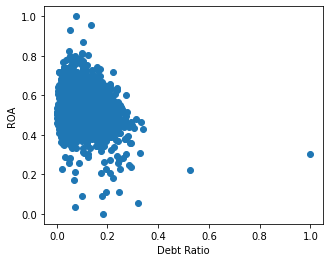

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(bankrupt.debt_ratio,bankrupt.roa)
plt.xlabel('Debt Ratio')
plt.ylabel('ROA')

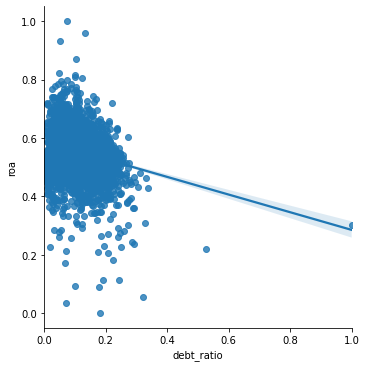

In [ ]:
sns.lmplot('debt_ratio','roa',data=bankrupt)

<AxesSubplot:>

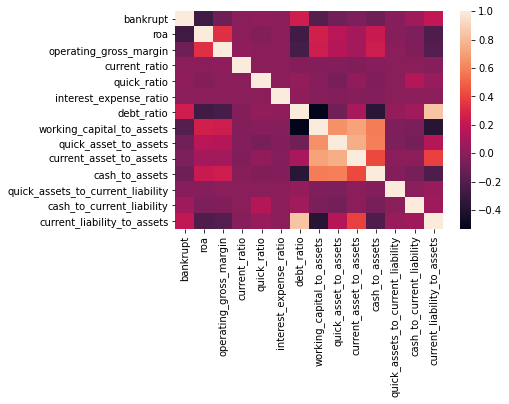

In [ ]:
#corr -correlation matrix
sns.heatmap(bankrupt.corr())

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

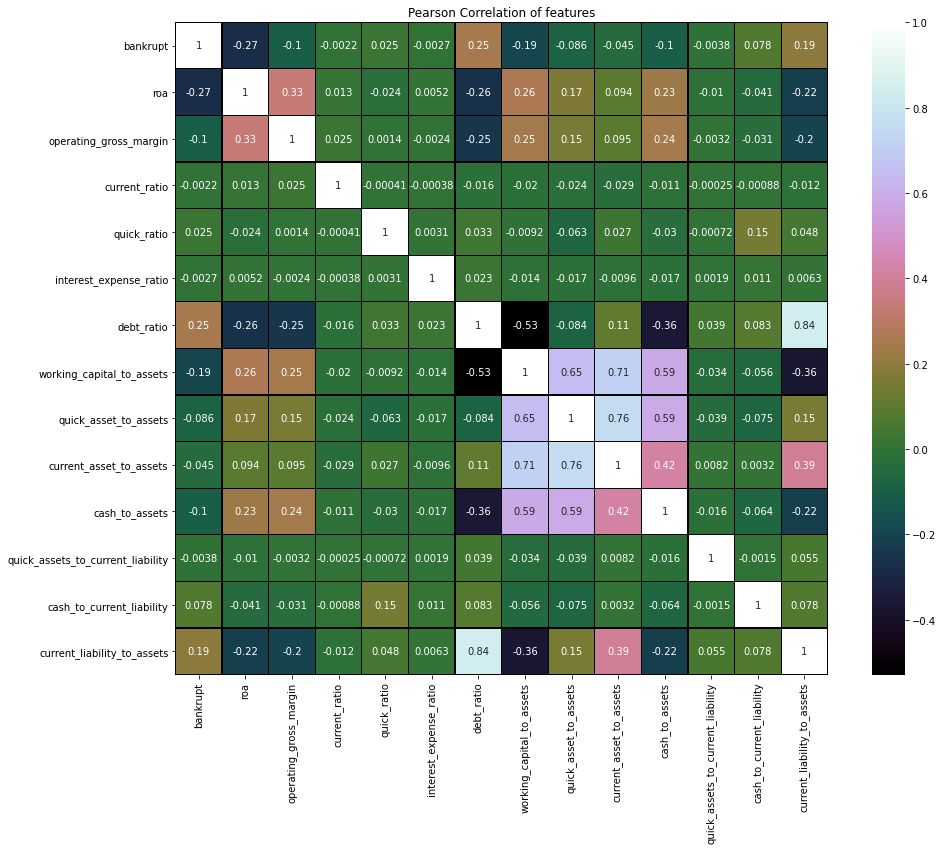

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in bankrupt.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = bankrupt.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = bankrupt[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(bankrupt.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(bankrupt.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

<AxesSubplot:xlabel='debt_ratio', ylabel='Density'>

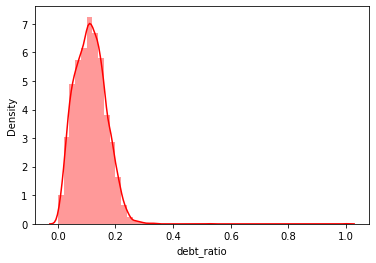

In [ ]:
#distribution plot
sns.distplot(bankrupt['debt_ratio'],color='red')

<AxesSubplot:xlabel='current_liability_to_assets', ylabel='debt_ratio'>

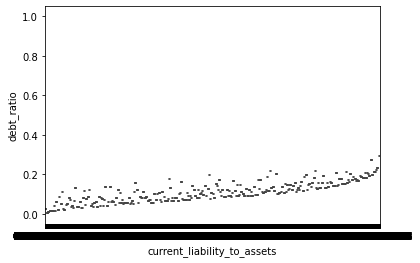

In [ ]:
sns.boxplot(x='current_liability_to_assets',y='debt_ratio',data=bankrupt)

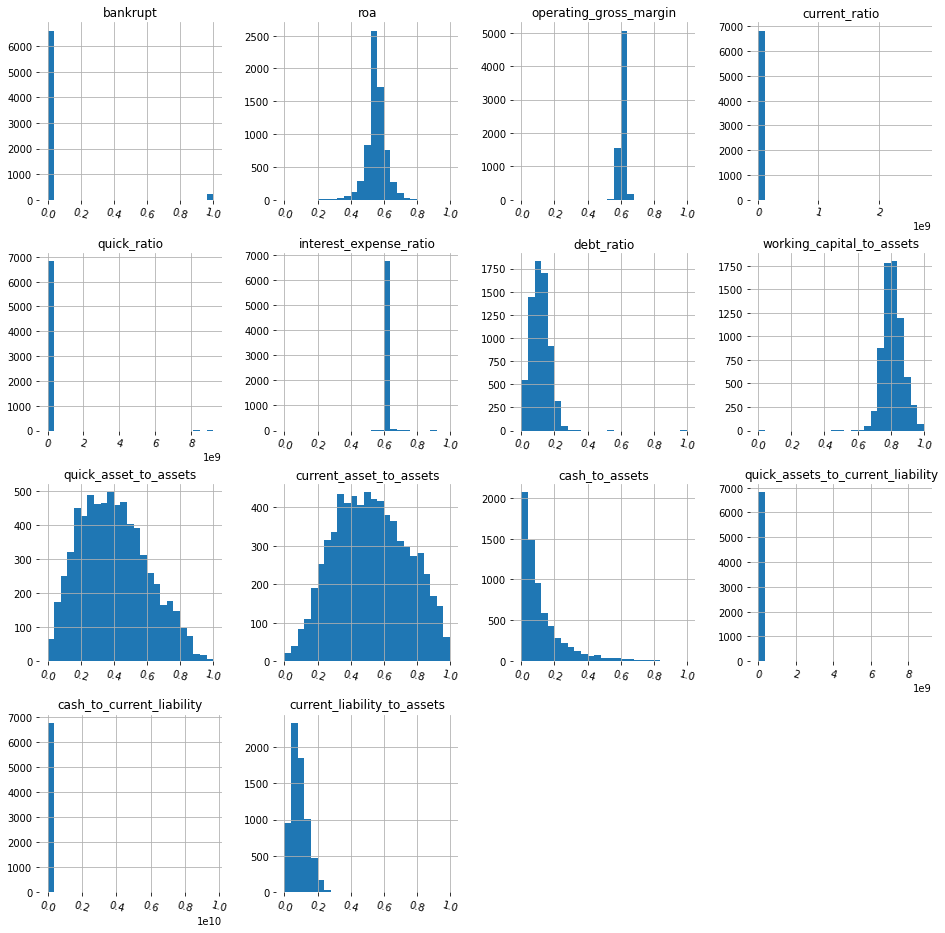

In [ ]:
df1=bankrupt[['bankrupt', 'roa', 'operating_gross_margin', 'current_ratio',
       'quick_ratio', 'interest_expense_ratio', 'debt_ratio',
       'working_capital_to_assets', 'quick_asset_to_assets',
       'current_asset_to_assets', 'cash_to_assets',
       'quick_assets_to_current_liability', 'cash_to_current_liability',
       'current_liability_to_assets']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

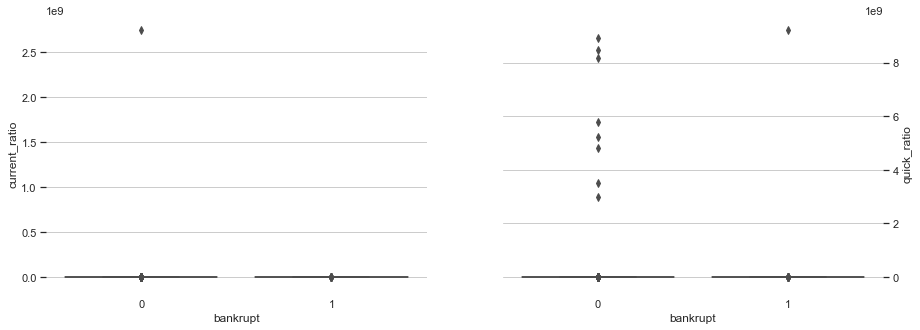

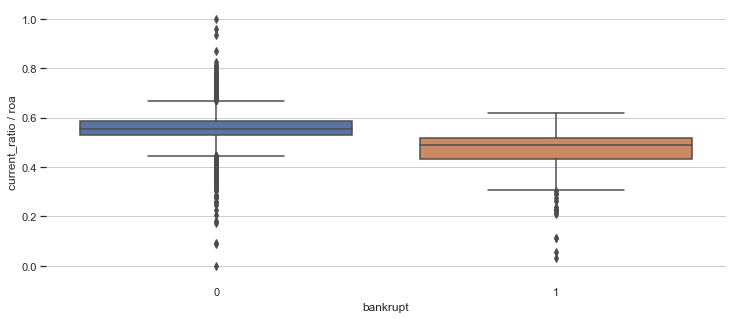

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=bankrupt['bankrupt'],y=bankrupt['current_ratio'], ax=axes[0])
sns.boxplot(x=bankrupt['bankrupt'],y=bankrupt['quick_ratio'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='bankrupt', ylabel='current_ratio')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='bankrupt', ylabel='quick_ratio')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=bankrupt['bankrupt'],y=bankrupt['roa'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='bankrupt', ylabel='current_ratio / roa');

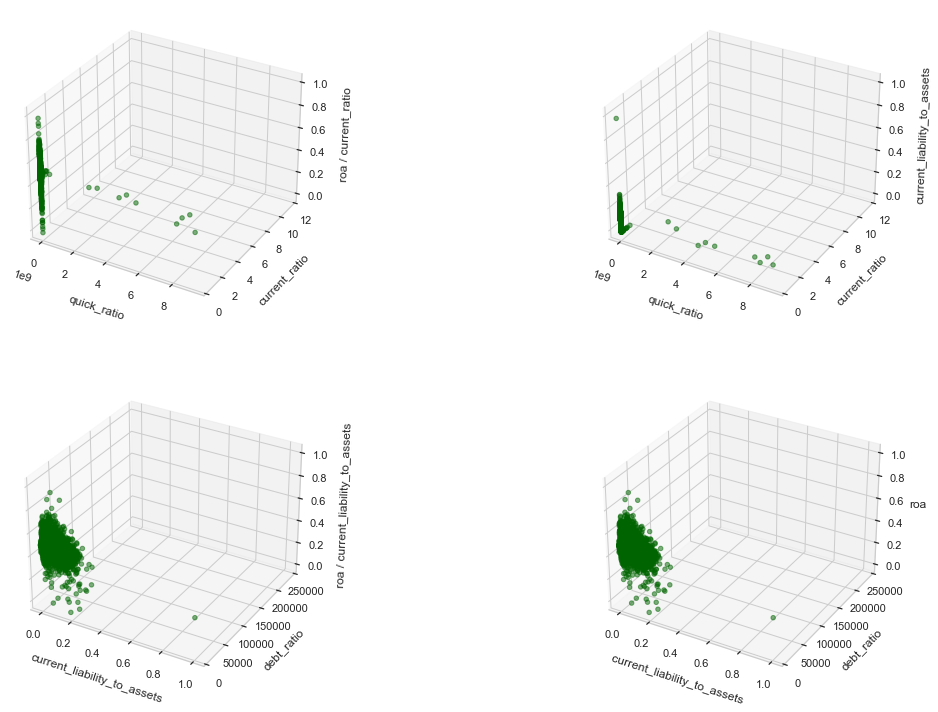

In [ ]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(bankrupt['quick_ratio'],bankrupt['current_ratio'],bankrupt['roa'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nquick_ratio',ylabel='\ncurrent_ratio',zlabel='\nroa / current_ratio')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(bankrupt['quick_ratio'],bankrupt['current_ratio'],bankrupt['current_liability_to_assets'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nquick_ratio',ylabel='\ncurrent_ratio',zlabel='\ncurrent_liability_to_assets')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(bankrupt['current_liability_to_assets'],bankrupt['debt_ratio'],bankrupt['roa'],c="darkgreen",alpha=.5)
ax.set(xlabel='\ncurrent_liability_to_assets',ylabel='\ndebt_ratio',zlabel='\nroa / current_liability_to_assets')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(bankrupt['current_liability_to_assets'],bankrupt['debt_ratio'],bankrupt['roa'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n current_liability_to_assets',ylabel='\ndebt_ratio',zlabel='roa')
ax.set(ylim=[0,250000]);

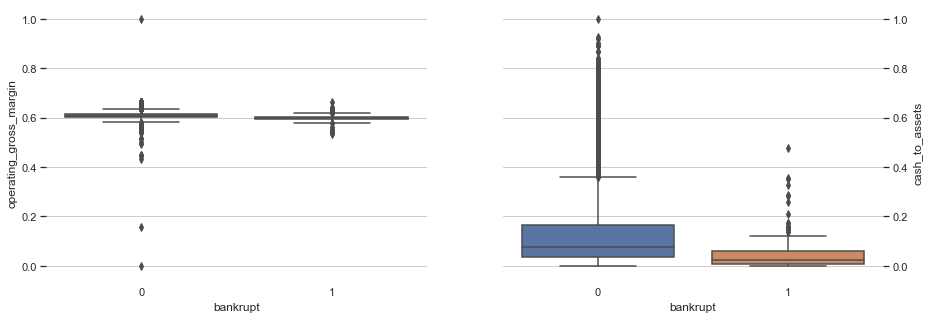

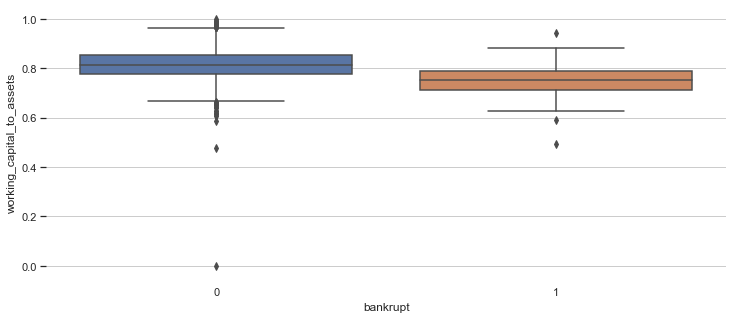

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=bankrupt['bankrupt'],y=bankrupt['operating_gross_margin'], ax=axes[0])
sns.boxplot(x=bankrupt['bankrupt'],y=bankrupt['cash_to_assets'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='bankrupt', ylabel='operating_gross_margin')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='bankrupt', ylabel='cash_to_assets')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=bankrupt['bankrupt'],y=bankrupt['working_capital_to_assets'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='bankrupt', ylabel='working_capital_to_assets');


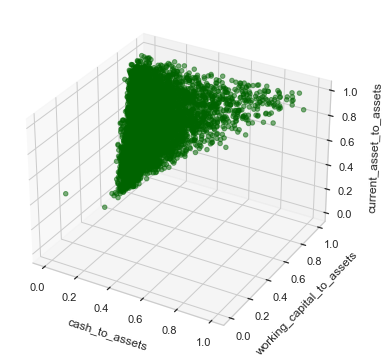

In [ ]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(bankrupt['cash_to_assets'],bankrupt['working_capital_to_assets'],bankrupt['current_asset_to_assets'],c="darkgreen",alpha=.5)
ax.set(xlabel='\ncash_to_assets',ylabel='\nworking_capital_to_assets',zlabel='\ncurrent_asset_to_assets');

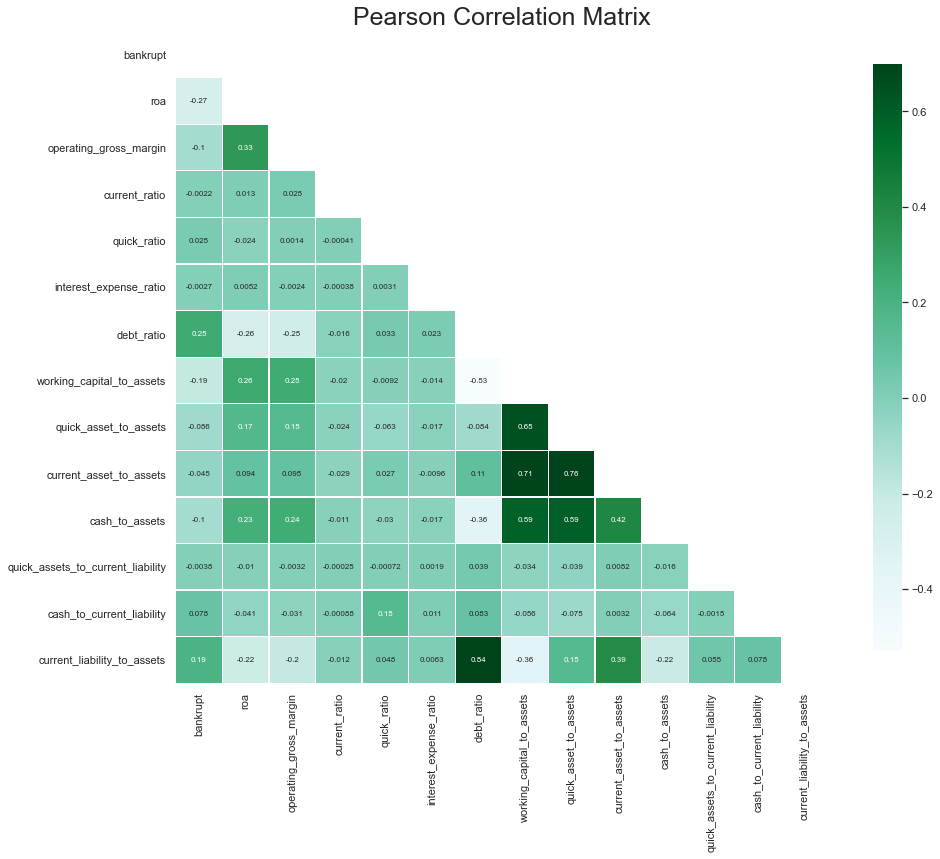

In [ ]:
features = ['bankrupt', 'roa', 'operating_gross_margin', 'current_ratio',
       'quick_ratio', 'interest_expense_ratio', 'debt_ratio',
       'working_capital_to_assets', 'quick_asset_to_assets',
       'current_asset_to_assets', 'cash_to_assets',
       'quick_assets_to_current_liability', 'cash_to_current_liability',
       'current_liability_to_assets']
mask = np.zeros_like(bankrupt[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(bankrupt[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

**Correlations between features and target**

In [ ]:
features = bankrupt.iloc[:,1:].columns.tolist()
target = bankrupt.iloc[:,0].name
correlations = {}
for f in features:
    data_temp = bankrupt[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    pass
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

Value
roa vs bankrupt                               -0.273051
debt_ratio vs bankrupt                         0.250161
current_liability_to_assets vs bankrupt        0.194494
working_capital_to_assets vs bankrupt         -0.193083
cash_to_assets vs bankrupt                    -0.100130
operating_gross_margin vs bankrupt            -0.100043
quick_asset_to_assets vs bankrupt             -0.086382
cash_to_current_liability vs bankrupt          0.077921
current_asset_to_assets vs bankrupt           -0.044823
quick_ratio vs bankrupt                        0.025058
quick_assets_to_current_liability vs bankrupt -0.003823
interest_expense_ratio vs bankrupt            -0.002681
current_ratio vs bankrupt                     -0.002211

We can see that the top 5 features are the most correlated features with the target "operating gross margin"

**Defining a Function to Calculate the Adjusted R2**


The R-squared increases when the number of features increase. Because of this, sometimes a more robust evaluator is preferred to compare the performance between different models. This evaluater is called adjusted R-squared and it only increases, if the addition of the variable reduces the MSE. The definition of the adjusted R2 is:

Adjusted R^2=R^2−((k−1)/(n−k))*(1−R^2)

where n is the number of observations and k is the number of parameters.

In [ ]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [ ]:
X=bankrupt.iloc[:,3:21].values
X

array([[2.25896300e-03, 1.20775500e-03, 6.29951302e-01, ...,
        1.99677100e-03, 1.47336000e-04, 1.47308450e-01],
       [6.01620600e-03, 4.03936700e-03, 6.35172463e-01, ...,
        4.13603000e-03, 1.38391000e-03, 5.69628270e-02],
       [1.15425540e-02, 5.34756000e-03, 6.29631443e-01, ...,
        6.30248100e-03, 5.34000000e+09, 9.81620650e-02],
       ...,
       [3.84235930e-02, 3.51116110e-02, 6.30612252e-01, ...,
        3.55312930e-02, 8.82124800e-02, 2.44136610e-02],
       [1.27824870e-02, 7.25588800e-03, 6.30730743e-01, ...,
        7.75330600e-03, 7.13321800e-03, 8.31994260e-02],
       [5.13483580e-02, 4.08971080e-02, 6.30617731e-01, ...,
        5.14805150e-02, 6.66735450e-02, 1.85173550e-02]])

In [ ]:
#y is 1D array
y=bankrupt.iloc[:,2].values
y

array([0.60145721, 0.61023509, 0.60145001, ..., 0.61044408, 0.60784964,
       0.62740887])

In [ ]:
X.shape

(6819, 11)

In [ ]:
X.ndim

2

In [ ]:
X.size

75009

In [ ]:
y.shape

(6819,)

In [ ]:
#training Testing 75 %training , 25% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [ ]:
print(X_train.shape,y_train.shape)

(6137, 11) (6137,)


In [ ]:
print(X_test.shape,y_test.shape)

(682, 11) (682,)


In [ ]:
X_train

array([[-0.01276607, -0.03609134,  0.09684745, ..., -0.02206988,
        -0.07504053, -0.17937373],
       [-0.01276607, -0.03609134, -0.1570218 , ..., -0.02206988,
        -0.07504053,  0.02499193],
       [-0.01276607, -0.03609134, -0.01354684, ..., -0.02206988,
        -0.07504053,  1.25310561],
       ...,
       [-0.01276607, -0.03609134, -0.04100781, ..., -0.02206988,
        -0.07504053, -1.29715684],
       [-0.01276607, -0.03609134, -0.02351162, ..., -0.02206988,
        -0.07504053, -0.14422144],
       [-0.01276607, -0.03609134, -0.00812998, ..., -0.02206988,
        -0.07504053, -0.01407442]])

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(X_test)

In [ ]:
print(prediction)

[0.60825042 0.60893954 0.61210553 0.60863813 0.60539802 0.60558803
 0.60404793 0.60580736 0.61719258 0.60969975 0.60971094 0.61056846
 0.60566076 0.60559781 0.60371683 0.60680113 0.62506564 0.60427667
 0.60439372 0.60862326 0.60788251 0.60595643 0.6099051  0.60498158
 0.60834238 0.61253688 0.60846231 0.61085494 0.6079699  0.60261271
 0.60027674 0.61628836 0.60726103 0.60384459 0.60872776 0.61300352
 0.60211406 0.61364441 0.59994159 0.6040544  0.62121866 0.60977751
 0.60476301 0.59990115 0.60629341 0.60928314 0.6095801  0.6105381
 0.60249356 0.60226887 0.61420699 0.60457576 0.60772391 0.61384757
 0.60740469 0.6021143  0.60587826 0.60448872 0.60683521 0.60310094
 0.60641395 0.61080489 0.60685973 0.61145993 0.61032409 0.60365348
 0.60371993 0.60335565 0.60215324 0.60132194 0.62249305 0.60900145
 0.60672335 0.60354733 0.61091202 0.60680454 0.60257136 0.60934971
 0.60572198 0.6003657  0.60508043 0.60894871 0.6073421  0.60942287
 0.60992983 0.60628902 0.60879971 0.60804427 0.61999583 0.60282

In [ ]:
for i in range (len(prediction)):
    print('Predicted :',prediction[i],' ','Actual :',y_test[i])
    pass

Predicted : 0.608250420020227   Actual : 0.596066533
Predicted : 0.6089395419344332   Actual : 0.623128036
Predicted : 0.6121055333729832   Actual : 0.593263091
Predicted : 0.6086381284095528   Actual : 0.600628432
Predicted : 0.6053980247153281   Actual : 0.604195794
Predicted : 0.6055880250661407   Actual : 0.605010162
Predicted : 0.6040479255744917   Actual : 0.604275069
Predicted : 0.6058073605014447   Actual : 0.603612044
Predicted : 0.6171925760164645   Actual : 0.615942865
Predicted : 0.6096997477044401   Actual : 0.60359763
Predicted : 0.609710944426411   Actual : 0.599439312
Predicted : 0.6105684593513847   Actual : 0.610098157
Predicted : 0.6056607571619002   Actual : 0.601377939
Predicted : 0.6055978096960648   Actual : 0.605745254
Predicted : 0.6037168255287502   Actual : 0.600433849
Predicted : 0.6068011257522135   Actual : 0.607518125
Predicted : 0.6250656368357572   Actual : 0.626183716
Predicted : 0.6042766712749885   Actual : 0.612108851
Predicted : 0.6043937213709119 

Predicted : 0.6005017752919461   Actual : 0.610581012
Predicted : 0.6136994175241175   Actual : 0.600995979
Predicted : 0.6036658942522313   Actual : 0.603684112
Predicted : 0.6130500481168615   Actual : 0.610523357
Predicted : 0.6079099614113379   Actual : 0.606783032
Predicted : 0.6060082335182249   Actual : 0.599086179
Predicted : 0.6061922679365357   Actual : 0.597378169
Predicted : 0.6065607901797425   Actual : 0.603121982
Predicted : 0.6079249545942962   Actual : 0.607604607
Predicted : 0.613833099668398   Actual : 0.606610069
Predicted : 0.6091106537193132   Actual : 0.651248937
Predicted : 0.6000651614268695   Actual : 0.600758154
Predicted : 0.6063432361076768   Actual : 0.601976102
Predicted : 0.6080072382361554   Actual : 0.621499301
Predicted : 0.6118142844480876   Actual : 0.603835455
Predicted : 0.6112002581268148   Actual : 0.604109313
Predicted : 0.6037083967909216   Actual : 0.598488015
Predicted : 0.6037363101277724   Actual : 0.605456983
Predicted : 0.607514150690918

Predicted : 0.6029782372444292   Actual : 0.596484527
Predicted : 0.6057401521912884   Actual : 0.598480808
Predicted : 0.6135301701407347   Actual : 0.614559161
Predicted : 0.614940676295078   Actual : 0.602884158
Predicted : 0.605865530376946   Actual : 0.618148143
Predicted : 0.6070878187653084   Actual : 0.611770132
Predicted : 0.6083791670054102   Actual : 0.599021318
Predicted : 0.604500576976648   Actual : 0.600938324
Predicted : 0.6234566064678124   Actual : 0.643854769
Predicted : 0.6090619120924434   Actual : 0.621167789
Predicted : 0.610530156266464   Actual : 0.618126522
Predicted : 0.6077111135922455   Actual : 0.596808833
Predicted : 0.6057806991512966   Actual : 0.603042707
Predicted : 0.6039487676240474   Actual : 0.598228571
Predicted : 0.6106971987625234   Actual : 0.603864282
Predicted : 0.6009982224533137   Actual : 0.606437106
Predicted : 0.6066543862144731   Actual : 0.610011675
Predicted : 0.6022427036820095   Actual : 0.606718171
Predicted : 0.6041919128916793  

In [ ]:
acc = model.score(X_test, y_test) # acc stands for accuracy 
acc

0.14925948881864226

In [ ]:
X_test

array([[-0.01276607, -0.03609134,  0.09568871, ..., -0.02206988,
        -0.07504053,  0.4568047 ],
       [-0.01276607, -0.03609134, -0.04265901, ..., -0.02206988,
        -0.07504053, -0.16339345],
       [-0.01276607, -0.03609134, -0.03150656, ..., -0.02206988,
        -0.07504053, -0.62013742],
       ...,
       [-0.01276607, -0.03609134, -0.02742218, ..., -0.02206988,
        -0.07504053,  0.07481639],
       [-0.01276607, -0.03609134, -0.03124587, ..., -0.02206988,
        -0.07504053, -0.225918  ],
       [-0.01276607, -0.03609134, -0.00694231, ..., -0.02206988,
        -0.07504053, -1.12180928]])

In [ ]:
y_test

array([0.59606653, 0.62312804, 0.59326309, 0.60062843, 0.60419579,
       0.60501016, 0.60427507, 0.60361204, 0.61594286, 0.60359763,
       0.59943931, 0.61009816, 0.60137794, 0.60574525, 0.60043385,
       0.60751813, 0.62618372, 0.61210885, 0.60248778, 0.61187103,
       0.60279768, 0.60480117, 0.60046268, 0.61691578, 0.59855288,
       0.60924055, 0.6082388 , 0.61419882, 0.60390752, 0.57128238,
       0.61656985, 0.65171738, 0.6036697 , 0.61176292, 0.61282953,
       0.61822021, 0.59566295, 0.63084651, 0.61323311, 0.60155811,
       0.61791032, 0.60252382, 0.59438735, 0.61790311, 0.59785382,
       0.60545698, 0.601868  , 0.61388172, 0.57583707, 0.60382825,
       0.61628879, 0.60258147, 0.5985745 , 0.61273584, 0.63760648,
       0.60639387, 0.59526658, 0.60384266, 0.59786823, 0.6007005 ,
       0.60697041, 0.58171781, 0.62278211, 0.60155811, 0.60025368,
       0.60129866, 0.59553323, 0.59364505, 0.60605515, 0.60837573,
       0.65597659, 0.60757578, 0.60336701, 0.60680465, 0.61018

In [ ]:
y_train

array([0.59729889, 0.59898528, 0.60502457, ..., 0.5896597 , 0.62357486,
       0.6103576 ])

In [ ]:
print ("Average Bankrupt for Test Data: {:.3f}".format(y_test.mean()))

Average Bankrupt for Test Data: 0.608


In [ ]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))

Intercept: 0.6079813301804511
Coefficient: [ 4.66443578e-04  2.60954509e-04  7.18185463e-05 -1.82688591e-03
  5.79665136e+03  4.15184488e-04 -5.85486269e+03  2.24079918e-03
  1.69764228e-04 -1.18295977e-04  4.41232453e+03]


In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,prediction)),'.3f'))
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(model.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(model.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(model.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(model,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression(feauture scaling)','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model       Details  \
0  Multiple Linear Regression(feauture scaling)  All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
0            -1.473426e+19

In [ ]:
#Setting up XGBoost Parameters
xgb = xgboost.XGBRegressor(n_estimators=800, learning_rate=0.05,reg_alpha= 0.1, subsample=0.95,colsample_bytree=1, max_depth=6)

In [ ]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
predictions = xgb.predict(X_test)

In [ ]:
print(explained_variance_score(predictions,y_test))

-1.004806315211599


In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predictions)),'.3f'))
rtrsm = float(format(xgb.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(xgb.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(xgb.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(xgb.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(xgb,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['XGBoost','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model       Details  \
1                                       XGBoost  All features   
0  Multiple Linear Regression(feauture scaling)  All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
0            -1.473426e+19

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
est=GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)

In [ ]:
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
print(gradient)
print(pred)

0.09805215294999192
[0.60778936 0.60424886 0.60850791 0.60281979 0.70720523 0.60200764
 0.60560551 0.60400271 0.61923782 0.61178238 0.60365307 0.61944715
 0.60223228 0.61311175 0.59898937 0.59964286 0.62595647 0.60847557
 0.60008085 0.61137939 0.60087685 0.60646483 0.6063856  0.61204013
 0.60261768 0.60939862 0.6072554  0.6131248  0.62093166 0.59033832
 0.61790076 0.62314235 0.60368116 0.60022275 0.60625723 0.61589837
 0.60440839 0.61562685 0.61610963 0.60278689 0.61656355 0.61343906
 0.59365074 0.61147047 0.60222054 0.6031039  0.6104325  0.61287646
 0.59246397 0.60954482 0.62223875 0.60447339 0.6089028  0.60693756
 0.615389   0.5976889  0.60561628 0.61074005 0.60329282 0.60756812
 0.610242   0.60273256 0.60654935 0.61595798 0.61071592 0.60245735
 0.60004435 0.59281774 0.6033164  0.60993291 0.62353251 0.61078869
 0.60470551 0.60105688 0.61516967 0.60575058 0.59872495 0.61415944
 0.61096979 0.596399   0.60338781 0.60464817 0.60050509 0.60672454
 0.60048526 0.60311316 0.60742299 0.600610

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(est.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(est.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(est.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(est.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(est,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Regressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model       Details  \
1                                       XGBoost  All features   
2                   Gradient Boosting Regressor  All features   
0  Multiple Linear Regression(feauture scaling)  All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
2                           0.013                 0.970   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
2                          0.969             0.098                      0.075   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
2             0.000000e+00  
0            -1.473426e+19

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada=AdaBoostRegressor(n_estimators=45, learning_rate=0.2,loss='exponential').fit(X_train, y_train)

In [ ]:
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
print(adab)
print(predict)

-1.0024118893351108
[0.60564026 0.59734513 0.61349577 0.61110135 1.         0.60564026
 0.61110135 0.61110135 0.61382419 0.61256485 0.61110135 0.61349577
 0.61110135 0.61110135 0.59734513 0.60564026 0.61476429 0.61110135
 0.60564026 0.61349577 0.59734513 0.60564026 0.61256485 0.61110135
 0.61110135 0.61386479 0.6129807  0.61256485 0.6129807  0.59423651
 0.61110135 0.6129807  0.61256485 0.59712704 0.6129807  0.61349577
 0.60564026 0.61349577 0.61110135 0.59698534 0.61476429 0.61349577
 0.59698534 0.60564026 0.60564026 0.6129807  0.61279309 0.6129807
 0.59504646 0.60564026 0.61382419 0.60564026 0.61256485 0.6129807
 0.61256485 0.60564026 0.59712704 0.61256485 0.61110135 0.61110135
 0.61110135 0.59734513 0.6129807  0.61382419 0.59734513 0.61110135
 0.59734513 0.59712704 0.61110135 0.60564026 0.61476429 0.61256485
 0.60564026 0.59734513 0.61349577 0.60564026 0.59423651 0.61382419
 0.61256485 0.58538414 0.61110135 0.61256485 0.59734513 0.61256485
 0.59712704 0.61256485 0.61110135 0.59712704

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predict)),'.3f'))
rtrsm = float(format(ada.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(ada.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(ada.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(ada.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(ada,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoostRegressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model       Details  \
1                                       XGBoost  All features   
2                   Gradient Boosting Regressor  All features   
3                             AdaBoostRegressor  All features   
0  Multiple Linear Regression(feauture scaling)  All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
2                           0.013                 0.970   
3                           0.020                 0.507   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
2                          0.969             0.098                      0.075   
3                          0.506            -1.002                     -1.054   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
2             0.000000e+00  
3            -3.050000e-01  
0            -1.473426e+19

In [ ]:
#using the LightGBM algorithm as the model
import lightgbm as lgb
params={'objective':'regression',
        'metric':'mae'}
reg_lgm = lgb.LGBMRegressor(learning_rate=0.05,**params, n_estimators=1000)
reg_lgm.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, metric='mae', n_estimators=1000,
              objective='regression')

In [ ]:
#checking score of the model
reg_lgm.score(X_test,y_test)

0.18544053609175548

In [ ]:
#viewing feature importances
reg_lgm.feature_importances_

array([2867, 3524, 2709, 3241, 1846, 2577, 2525, 3443, 2393, 2427, 2448])

In [ ]:
#predicting the test set result
y_pred_lgm=reg_lgm.predict(X_test)

In [ ]:
#checking the cross val score of the model
results = cross_val_score(reg_lgm, X_train, y_train, cv=5, n_jobs=-1)
results.mean()

0.021133608241816603

In [ ]:
results.std()

0.07546099343435383

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lgm)),'.3f'))
rtrsm = float(format(reg_lgm.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg_lgm.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(reg_lgm.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg_lgm.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(reg_lgm,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['LightGBM','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model       Details  \
1                                       XGBoost  All features   
2                   Gradient Boosting Regressor  All features   
4                                      LightGBM  All features   
3                             AdaBoostRegressor  All features   
0  Multiple Linear Regression(feauture scaling)  All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
2                           0.013                 0.970   
4                           0.013                 0.867   
3                           0.020                 0.507   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
2                          0.969             0.098                      0.075   
4                          0.866             0.185                      0.165   
3                          0.506            -1.002                     -1.054   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
2             0.000000e+00  
4            -1.680000e-01  
3            -3.050000e-01  
0            -1.473426e+19

In [ ]:
import catboost
from catboost import CatBoostRegressor

In [ ]:
cbc = CatBoostRegressor(n_estimators=10000, max_depth=5,learning_rate=0.1).fit(X_train, y_train)

0:	learn: 0.0171186	total: 138ms	remaining: 23m 2s
1:	learn: 0.0170354	total: 140ms	remaining: 11m 39s
2:	learn: 0.0169552	total: 142ms	remaining: 7m 52s
3:	learn: 0.0166547	total: 144ms	remaining: 6m
4:	learn: 0.0164603	total: 147ms	remaining: 4m 52s
5:	learn: 0.0162621	total: 149ms	remaining: 4m 8s
6:	learn: 0.0161922	total: 152ms	remaining: 3m 36s
7:	learn: 0.0161255	total: 154ms	remaining: 3m 12s
8:	learn: 0.0160635	total: 156ms	remaining: 2m 53s
9:	learn: 0.0160034	total: 158ms	remaining: 2m 38s
10:	learn: 0.0159467	total: 161ms	remaining: 2m 25s
11:	learn: 0.0158926	total: 163ms	remaining: 2m 15s
12:	learn: 0.0157345	total: 165ms	remaining: 2m 6s
13:	learn: 0.0156846	total: 168ms	remaining: 1m 59s
14:	learn: 0.0156361	total: 170ms	remaining: 1m 53s
15:	learn: 0.0155910	total: 173ms	remaining: 1m 47s
16:	learn: 0.0154088	total: 175ms	remaining: 1m 42s
17:	learn: 0.0153678	total: 177ms	remaining: 1m 38s
18:	learn: 0.0153281	total: 181ms	remaining: 1m 35s
19:	learn: 0.0151750	total:

189:	learn: 0.0117148	total: 796ms	remaining: 41.1s
190:	learn: 0.0117023	total: 800ms	remaining: 41.1s
191:	learn: 0.0116875	total: 804ms	remaining: 41s
192:	learn: 0.0116792	total: 806ms	remaining: 41s
193:	learn: 0.0116663	total: 810ms	remaining: 40.9s
194:	learn: 0.0116587	total: 813ms	remaining: 40.9s
195:	learn: 0.0116138	total: 816ms	remaining: 40.8s
196:	learn: 0.0116134	total: 820ms	remaining: 40.8s
197:	learn: 0.0116040	total: 824ms	remaining: 40.8s
198:	learn: 0.0115972	total: 828ms	remaining: 40.8s
199:	learn: 0.0115922	total: 832ms	remaining: 40.8s
200:	learn: 0.0115735	total: 836ms	remaining: 40.8s
201:	learn: 0.0115685	total: 840ms	remaining: 40.7s
202:	learn: 0.0115625	total: 844ms	remaining: 40.7s
203:	learn: 0.0115445	total: 847ms	remaining: 40.7s
204:	learn: 0.0115270	total: 852ms	remaining: 40.7s
205:	learn: 0.0115235	total: 855ms	remaining: 40.7s
206:	learn: 0.0115232	total: 858ms	remaining: 40.6s
207:	learn: 0.0115157	total: 862ms	remaining: 40.6s
208:	learn: 0.01

376:	learn: 0.0100654	total: 1.46s	remaining: 37.4s
377:	learn: 0.0100627	total: 1.47s	remaining: 37.4s
378:	learn: 0.0100548	total: 1.47s	remaining: 37.4s
379:	learn: 0.0100488	total: 1.48s	remaining: 37.4s
380:	learn: 0.0100373	total: 1.48s	remaining: 37.4s
381:	learn: 0.0100359	total: 1.49s	remaining: 37.4s
382:	learn: 0.0100326	total: 1.49s	remaining: 37.4s
383:	learn: 0.0100245	total: 1.49s	remaining: 37.4s
384:	learn: 0.0100181	total: 1.5s	remaining: 37.3s
385:	learn: 0.0100094	total: 1.5s	remaining: 37.3s
386:	learn: 0.0100029	total: 1.5s	remaining: 37.3s
387:	learn: 0.0099940	total: 1.51s	remaining: 37.4s
388:	learn: 0.0099837	total: 1.51s	remaining: 37.4s
389:	learn: 0.0099782	total: 1.51s	remaining: 37.4s
390:	learn: 0.0099538	total: 1.52s	remaining: 37.3s
391:	learn: 0.0099508	total: 1.52s	remaining: 37.3s
392:	learn: 0.0099471	total: 1.53s	remaining: 37.3s
393:	learn: 0.0099430	total: 1.53s	remaining: 37.3s
394:	learn: 0.0099413	total: 1.53s	remaining: 37.3s
395:	learn: 0.0

560:	learn: 0.0090182	total: 2.13s	remaining: 35.9s
561:	learn: 0.0090145	total: 2.14s	remaining: 35.9s
562:	learn: 0.0090133	total: 2.14s	remaining: 35.9s
563:	learn: 0.0090121	total: 2.14s	remaining: 35.9s
564:	learn: 0.0090102	total: 2.15s	remaining: 35.8s
565:	learn: 0.0090083	total: 2.15s	remaining: 35.8s
566:	learn: 0.0090034	total: 2.15s	remaining: 35.8s
567:	learn: 0.0089965	total: 2.16s	remaining: 35.8s
568:	learn: 0.0089929	total: 2.16s	remaining: 35.8s
569:	learn: 0.0089911	total: 2.16s	remaining: 35.8s
570:	learn: 0.0089880	total: 2.17s	remaining: 35.8s
571:	learn: 0.0089842	total: 2.17s	remaining: 35.8s
572:	learn: 0.0089804	total: 2.17s	remaining: 35.8s
573:	learn: 0.0089760	total: 2.18s	remaining: 35.8s
574:	learn: 0.0089734	total: 2.18s	remaining: 35.7s
575:	learn: 0.0089682	total: 2.18s	remaining: 35.7s
576:	learn: 0.0089650	total: 2.19s	remaining: 35.7s
577:	learn: 0.0089619	total: 2.19s	remaining: 35.7s
578:	learn: 0.0089585	total: 2.19s	remaining: 35.7s
579:	learn: 

757:	learn: 0.0082732	total: 2.8s	remaining: 34.1s
758:	learn: 0.0082681	total: 2.8s	remaining: 34.1s
759:	learn: 0.0082660	total: 2.81s	remaining: 34.1s
760:	learn: 0.0082633	total: 2.81s	remaining: 34.1s
761:	learn: 0.0082605	total: 2.81s	remaining: 34.1s
762:	learn: 0.0082586	total: 2.82s	remaining: 34.1s
763:	learn: 0.0082568	total: 2.82s	remaining: 34.1s
764:	learn: 0.0082525	total: 2.82s	remaining: 34.1s
765:	learn: 0.0082505	total: 2.83s	remaining: 34.1s
766:	learn: 0.0082468	total: 2.83s	remaining: 34.1s
767:	learn: 0.0082450	total: 2.84s	remaining: 34.1s
768:	learn: 0.0082430	total: 2.84s	remaining: 34.1s
769:	learn: 0.0082308	total: 2.84s	remaining: 34.1s
770:	learn: 0.0082288	total: 2.85s	remaining: 34.1s
771:	learn: 0.0082259	total: 2.85s	remaining: 34.1s
772:	learn: 0.0082215	total: 2.86s	remaining: 34.1s
773:	learn: 0.0082190	total: 2.86s	remaining: 34.1s
774:	learn: 0.0082163	total: 2.87s	remaining: 34.1s
775:	learn: 0.0082115	total: 2.87s	remaining: 34.1s
776:	learn: 0.

939:	learn: 0.0077206	total: 3.46s	remaining: 33.4s
940:	learn: 0.0077191	total: 3.47s	remaining: 33.4s
941:	learn: 0.0077173	total: 3.47s	remaining: 33.4s
942:	learn: 0.0077154	total: 3.48s	remaining: 33.4s
943:	learn: 0.0077132	total: 3.48s	remaining: 33.4s
944:	learn: 0.0077101	total: 3.48s	remaining: 33.4s
945:	learn: 0.0077083	total: 3.49s	remaining: 33.4s
946:	learn: 0.0077068	total: 3.49s	remaining: 33.4s
947:	learn: 0.0077040	total: 3.49s	remaining: 33.4s
948:	learn: 0.0077015	total: 3.5s	remaining: 33.4s
949:	learn: 0.0076998	total: 3.5s	remaining: 33.4s
950:	learn: 0.0076976	total: 3.5s	remaining: 33.3s
951:	learn: 0.0076892	total: 3.51s	remaining: 33.4s
952:	learn: 0.0076881	total: 3.51s	remaining: 33.4s
953:	learn: 0.0076860	total: 3.52s	remaining: 33.4s
954:	learn: 0.0076835	total: 3.52s	remaining: 33.3s
955:	learn: 0.0076808	total: 3.52s	remaining: 33.3s
956:	learn: 0.0076793	total: 3.53s	remaining: 33.3s
957:	learn: 0.0076773	total: 3.53s	remaining: 33.3s
958:	learn: 0.0

1131:	learn: 0.0072441	total: 4.13s	remaining: 32.3s
1132:	learn: 0.0072400	total: 4.13s	remaining: 32.3s
1133:	learn: 0.0072363	total: 4.13s	remaining: 32.3s
1134:	learn: 0.0072341	total: 4.14s	remaining: 32.3s
1135:	learn: 0.0072314	total: 4.14s	remaining: 32.3s
1136:	learn: 0.0072286	total: 4.14s	remaining: 32.3s
1137:	learn: 0.0072265	total: 4.15s	remaining: 32.3s
1138:	learn: 0.0072245	total: 4.15s	remaining: 32.3s
1139:	learn: 0.0072228	total: 4.16s	remaining: 32.3s
1140:	learn: 0.0072223	total: 4.16s	remaining: 32.3s
1141:	learn: 0.0072195	total: 4.16s	remaining: 32.3s
1142:	learn: 0.0072181	total: 4.17s	remaining: 32.3s
1143:	learn: 0.0072160	total: 4.17s	remaining: 32.3s
1144:	learn: 0.0072130	total: 4.17s	remaining: 32.3s
1145:	learn: 0.0072101	total: 4.18s	remaining: 32.3s
1146:	learn: 0.0072087	total: 4.18s	remaining: 32.3s
1147:	learn: 0.0072059	total: 4.18s	remaining: 32.3s
1148:	learn: 0.0072059	total: 4.18s	remaining: 32.2s
1149:	learn: 0.0072034	total: 4.19s	remaining:

1320:	learn: 0.0068647	total: 4.79s	remaining: 31.5s
1321:	learn: 0.0068626	total: 4.8s	remaining: 31.5s
1322:	learn: 0.0068626	total: 4.8s	remaining: 31.5s
1323:	learn: 0.0068610	total: 4.8s	remaining: 31.5s
1324:	learn: 0.0068552	total: 4.81s	remaining: 31.5s
1325:	learn: 0.0068529	total: 4.81s	remaining: 31.5s
1326:	learn: 0.0068523	total: 4.81s	remaining: 31.5s
1327:	learn: 0.0068512	total: 4.82s	remaining: 31.5s
1328:	learn: 0.0068491	total: 4.82s	remaining: 31.5s
1329:	learn: 0.0068473	total: 4.82s	remaining: 31.5s
1330:	learn: 0.0068449	total: 4.83s	remaining: 31.4s
1331:	learn: 0.0068436	total: 4.83s	remaining: 31.4s
1332:	learn: 0.0068411	total: 4.83s	remaining: 31.4s
1333:	learn: 0.0068391	total: 4.84s	remaining: 31.4s
1334:	learn: 0.0068389	total: 4.84s	remaining: 31.4s
1335:	learn: 0.0068380	total: 4.84s	remaining: 31.4s
1336:	learn: 0.0068342	total: 4.84s	remaining: 31.4s
1337:	learn: 0.0068317	total: 4.85s	remaining: 31.4s
1338:	learn: 0.0068303	total: 4.85s	remaining: 31

1521:	learn: 0.0065026	total: 5.46s	remaining: 30.4s
1522:	learn: 0.0065015	total: 5.46s	remaining: 30.4s
1523:	learn: 0.0065005	total: 5.47s	remaining: 30.4s
1524:	learn: 0.0064980	total: 5.47s	remaining: 30.4s
1525:	learn: 0.0064969	total: 5.47s	remaining: 30.4s
1526:	learn: 0.0064957	total: 5.47s	remaining: 30.4s
1527:	learn: 0.0064932	total: 5.48s	remaining: 30.4s
1528:	learn: 0.0064907	total: 5.48s	remaining: 30.4s
1529:	learn: 0.0064894	total: 5.49s	remaining: 30.4s
1530:	learn: 0.0064870	total: 5.49s	remaining: 30.4s
1531:	learn: 0.0064859	total: 5.49s	remaining: 30.4s
1532:	learn: 0.0064839	total: 5.5s	remaining: 30.4s
1533:	learn: 0.0064839	total: 5.5s	remaining: 30.3s
1534:	learn: 0.0064830	total: 5.5s	remaining: 30.3s
1535:	learn: 0.0064796	total: 5.51s	remaining: 30.3s
1536:	learn: 0.0064796	total: 5.51s	remaining: 30.3s
1537:	learn: 0.0064771	total: 5.51s	remaining: 30.3s
1538:	learn: 0.0064756	total: 5.51s	remaining: 30.3s
1539:	learn: 0.0064727	total: 5.52s	remaining: 30

1722:	learn: 0.0061849	total: 6.13s	remaining: 29.4s
1723:	learn: 0.0061830	total: 6.13s	remaining: 29.4s
1724:	learn: 0.0061809	total: 6.14s	remaining: 29.4s
1725:	learn: 0.0061799	total: 6.14s	remaining: 29.4s
1726:	learn: 0.0061777	total: 6.14s	remaining: 29.4s
1727:	learn: 0.0061768	total: 6.15s	remaining: 29.4s
1728:	learn: 0.0061742	total: 6.15s	remaining: 29.4s
1729:	learn: 0.0061729	total: 6.16s	remaining: 29.4s
1730:	learn: 0.0061708	total: 6.16s	remaining: 29.4s
1731:	learn: 0.0061708	total: 6.16s	remaining: 29.4s
1732:	learn: 0.0061692	total: 6.17s	remaining: 29.4s
1733:	learn: 0.0061676	total: 6.17s	remaining: 29.4s
1734:	learn: 0.0061667	total: 6.17s	remaining: 29.4s
1735:	learn: 0.0061649	total: 6.18s	remaining: 29.4s
1736:	learn: 0.0061633	total: 6.18s	remaining: 29.4s
1737:	learn: 0.0061607	total: 6.18s	remaining: 29.4s
1738:	learn: 0.0061587	total: 6.19s	remaining: 29.4s
1739:	learn: 0.0061572	total: 6.19s	remaining: 29.4s
1740:	learn: 0.0061557	total: 6.19s	remaining:

1920:	learn: 0.0059079	total: 6.8s	remaining: 28.6s
1921:	learn: 0.0059074	total: 6.8s	remaining: 28.6s
1922:	learn: 0.0059049	total: 6.8s	remaining: 28.6s
1923:	learn: 0.0059049	total: 6.81s	remaining: 28.6s
1924:	learn: 0.0059038	total: 6.81s	remaining: 28.6s
1925:	learn: 0.0059012	total: 6.81s	remaining: 28.6s
1926:	learn: 0.0058986	total: 6.82s	remaining: 28.6s
1927:	learn: 0.0058974	total: 6.82s	remaining: 28.6s
1928:	learn: 0.0058950	total: 6.82s	remaining: 28.5s
1929:	learn: 0.0058940	total: 6.83s	remaining: 28.5s
1930:	learn: 0.0058921	total: 6.83s	remaining: 28.5s
1931:	learn: 0.0058910	total: 6.83s	remaining: 28.5s
1932:	learn: 0.0058886	total: 6.83s	remaining: 28.5s
1933:	learn: 0.0058876	total: 6.84s	remaining: 28.5s
1934:	learn: 0.0058866	total: 6.84s	remaining: 28.5s
1935:	learn: 0.0058844	total: 6.84s	remaining: 28.5s
1936:	learn: 0.0058844	total: 6.85s	remaining: 28.5s
1937:	learn: 0.0058826	total: 6.85s	remaining: 28.5s
1938:	learn: 0.0058812	total: 6.85s	remaining: 28

2107:	learn: 0.0056443	total: 7.46s	remaining: 27.9s
2108:	learn: 0.0056442	total: 7.47s	remaining: 27.9s
2109:	learn: 0.0056432	total: 7.47s	remaining: 27.9s
2110:	learn: 0.0056432	total: 7.48s	remaining: 27.9s
2111:	learn: 0.0056420	total: 7.48s	remaining: 27.9s
2112:	learn: 0.0056406	total: 7.49s	remaining: 27.9s
2113:	learn: 0.0056394	total: 7.49s	remaining: 27.9s
2114:	learn: 0.0056386	total: 7.49s	remaining: 27.9s
2115:	learn: 0.0056365	total: 7.5s	remaining: 27.9s
2116:	learn: 0.0056365	total: 7.5s	remaining: 27.9s
2117:	learn: 0.0056353	total: 7.5s	remaining: 27.9s
2118:	learn: 0.0056338	total: 7.51s	remaining: 27.9s
2119:	learn: 0.0056330	total: 7.51s	remaining: 27.9s
2120:	learn: 0.0056321	total: 7.51s	remaining: 27.9s
2121:	learn: 0.0056300	total: 7.52s	remaining: 27.9s
2122:	learn: 0.0056288	total: 7.52s	remaining: 27.9s
2123:	learn: 0.0056274	total: 7.53s	remaining: 27.9s
2124:	learn: 0.0056264	total: 7.53s	remaining: 27.9s
2125:	learn: 0.0056258	total: 7.53s	remaining: 27

2307:	learn: 0.0054143	total: 8.13s	remaining: 27.1s
2308:	learn: 0.0054136	total: 8.13s	remaining: 27.1s
2309:	learn: 0.0054120	total: 8.14s	remaining: 27.1s
2310:	learn: 0.0054097	total: 8.14s	remaining: 27.1s
2311:	learn: 0.0054082	total: 8.14s	remaining: 27.1s
2312:	learn: 0.0054067	total: 8.15s	remaining: 27.1s
2313:	learn: 0.0054060	total: 8.15s	remaining: 27.1s
2314:	learn: 0.0054033	total: 8.15s	remaining: 27.1s
2315:	learn: 0.0054018	total: 8.15s	remaining: 27.1s
2316:	learn: 0.0054003	total: 8.16s	remaining: 27.1s
2317:	learn: 0.0053995	total: 8.16s	remaining: 27.1s
2318:	learn: 0.0053984	total: 8.16s	remaining: 27s
2319:	learn: 0.0053978	total: 8.17s	remaining: 27s
2320:	learn: 0.0053968	total: 8.17s	remaining: 27s
2321:	learn: 0.0053954	total: 8.18s	remaining: 27s
2322:	learn: 0.0053938	total: 8.18s	remaining: 27s
2323:	learn: 0.0053935	total: 8.18s	remaining: 27s
2324:	learn: 0.0053929	total: 8.19s	remaining: 27s
2325:	learn: 0.0053921	total: 8.19s	remaining: 27s
2326:	lea

2499:	learn: 0.0051801	total: 8.79s	remaining: 26.4s
2500:	learn: 0.0051797	total: 8.8s	remaining: 26.4s
2501:	learn: 0.0051789	total: 8.8s	remaining: 26.4s
2502:	learn: 0.0051787	total: 8.8s	remaining: 26.4s
2503:	learn: 0.0051773	total: 8.81s	remaining: 26.4s
2504:	learn: 0.0051762	total: 8.81s	remaining: 26.4s
2505:	learn: 0.0051745	total: 8.81s	remaining: 26.4s
2506:	learn: 0.0051724	total: 8.82s	remaining: 26.4s
2507:	learn: 0.0051700	total: 8.82s	remaining: 26.4s
2508:	learn: 0.0051688	total: 8.83s	remaining: 26.4s
2509:	learn: 0.0051670	total: 8.83s	remaining: 26.4s
2510:	learn: 0.0051655	total: 8.83s	remaining: 26.3s
2511:	learn: 0.0051646	total: 8.84s	remaining: 26.3s
2512:	learn: 0.0051630	total: 8.84s	remaining: 26.3s
2513:	learn: 0.0051625	total: 8.84s	remaining: 26.3s
2514:	learn: 0.0051615	total: 8.85s	remaining: 26.3s
2515:	learn: 0.0051607	total: 8.85s	remaining: 26.3s
2516:	learn: 0.0051589	total: 8.85s	remaining: 26.3s
2517:	learn: 0.0051579	total: 8.86s	remaining: 26

2687:	learn: 0.0049906	total: 9.46s	remaining: 25.7s
2688:	learn: 0.0049899	total: 9.46s	remaining: 25.7s
2689:	learn: 0.0049865	total: 9.47s	remaining: 25.7s
2690:	learn: 0.0049848	total: 9.47s	remaining: 25.7s
2691:	learn: 0.0049836	total: 9.47s	remaining: 25.7s
2692:	learn: 0.0049816	total: 9.48s	remaining: 25.7s
2693:	learn: 0.0049808	total: 9.48s	remaining: 25.7s
2694:	learn: 0.0049804	total: 9.48s	remaining: 25.7s
2695:	learn: 0.0049794	total: 9.49s	remaining: 25.7s
2696:	learn: 0.0049789	total: 9.49s	remaining: 25.7s
2697:	learn: 0.0049785	total: 9.5s	remaining: 25.7s
2698:	learn: 0.0049778	total: 9.5s	remaining: 25.7s
2699:	learn: 0.0049768	total: 9.51s	remaining: 25.7s
2700:	learn: 0.0049758	total: 9.51s	remaining: 25.7s
2701:	learn: 0.0049752	total: 9.52s	remaining: 25.7s
2702:	learn: 0.0049747	total: 9.52s	remaining: 25.7s
2703:	learn: 0.0049734	total: 9.53s	remaining: 25.7s
2704:	learn: 0.0049723	total: 9.53s	remaining: 25.7s
2705:	learn: 0.0049717	total: 9.53s	remaining: 2

2861:	learn: 0.0048068	total: 10.1s	remaining: 25.3s
2862:	learn: 0.0048059	total: 10.1s	remaining: 25.3s
2863:	learn: 0.0048046	total: 10.1s	remaining: 25.3s
2864:	learn: 0.0048035	total: 10.1s	remaining: 25.3s
2865:	learn: 0.0048027	total: 10.1s	remaining: 25.2s
2866:	learn: 0.0048016	total: 10.1s	remaining: 25.2s
2867:	learn: 0.0048008	total: 10.1s	remaining: 25.2s
2868:	learn: 0.0048004	total: 10.2s	remaining: 25.2s
2869:	learn: 0.0047992	total: 10.2s	remaining: 25.2s
2870:	learn: 0.0047980	total: 10.2s	remaining: 25.2s
2871:	learn: 0.0047966	total: 10.2s	remaining: 25.2s
2872:	learn: 0.0047961	total: 10.2s	remaining: 25.2s
2873:	learn: 0.0047952	total: 10.2s	remaining: 25.2s
2874:	learn: 0.0047935	total: 10.2s	remaining: 25.2s
2875:	learn: 0.0047923	total: 10.2s	remaining: 25.2s
2876:	learn: 0.0047910	total: 10.2s	remaining: 25.2s
2877:	learn: 0.0047904	total: 10.2s	remaining: 25.2s
2878:	learn: 0.0047893	total: 10.2s	remaining: 25.2s
2879:	learn: 0.0047882	total: 10.2s	remaining:

3050:	learn: 0.0046384	total: 10.8s	remaining: 24.6s
3051:	learn: 0.0046380	total: 10.8s	remaining: 24.6s
3052:	learn: 0.0046365	total: 10.8s	remaining: 24.6s
3053:	learn: 0.0046355	total: 10.8s	remaining: 24.6s
3054:	learn: 0.0046339	total: 10.8s	remaining: 24.6s
3055:	learn: 0.0046333	total: 10.8s	remaining: 24.6s
3056:	learn: 0.0046325	total: 10.8s	remaining: 24.6s
3057:	learn: 0.0046319	total: 10.8s	remaining: 24.6s
3058:	learn: 0.0046309	total: 10.8s	remaining: 24.6s
3059:	learn: 0.0046290	total: 10.8s	remaining: 24.6s
3060:	learn: 0.0046277	total: 10.8s	remaining: 24.5s
3061:	learn: 0.0046273	total: 10.8s	remaining: 24.5s
3062:	learn: 0.0046262	total: 10.8s	remaining: 24.5s
3063:	learn: 0.0046252	total: 10.8s	remaining: 24.5s
3064:	learn: 0.0046248	total: 10.8s	remaining: 24.5s
3065:	learn: 0.0046241	total: 10.8s	remaining: 24.5s
3066:	learn: 0.0046227	total: 10.8s	remaining: 24.5s
3067:	learn: 0.0046221	total: 10.8s	remaining: 24.5s
3068:	learn: 0.0046209	total: 10.9s	remaining:

3218:	learn: 0.0044908	total: 11.5s	remaining: 24.2s
3219:	learn: 0.0044892	total: 11.5s	remaining: 24.2s
3220:	learn: 0.0044885	total: 11.5s	remaining: 24.2s
3221:	learn: 0.0044882	total: 11.5s	remaining: 24.1s
3222:	learn: 0.0044878	total: 11.5s	remaining: 24.1s
3223:	learn: 0.0044871	total: 11.5s	remaining: 24.1s
3224:	learn: 0.0044870	total: 11.5s	remaining: 24.1s
3225:	learn: 0.0044861	total: 11.5s	remaining: 24.1s
3226:	learn: 0.0044846	total: 11.5s	remaining: 24.1s
3227:	learn: 0.0044837	total: 11.5s	remaining: 24.1s
3228:	learn: 0.0044830	total: 11.5s	remaining: 24.1s
3229:	learn: 0.0044823	total: 11.5s	remaining: 24.1s
3230:	learn: 0.0044811	total: 11.5s	remaining: 24.1s
3231:	learn: 0.0044804	total: 11.5s	remaining: 24.1s
3232:	learn: 0.0044801	total: 11.5s	remaining: 24.1s
3233:	learn: 0.0044789	total: 11.5s	remaining: 24.1s
3234:	learn: 0.0044785	total: 11.5s	remaining: 24.1s
3235:	learn: 0.0044771	total: 11.5s	remaining: 24.1s
3236:	learn: 0.0044762	total: 11.5s	remaining:

3407:	learn: 0.0043329	total: 12.1s	remaining: 23.5s
3408:	learn: 0.0043315	total: 12.1s	remaining: 23.5s
3409:	learn: 0.0043312	total: 12.1s	remaining: 23.5s
3410:	learn: 0.0043309	total: 12.1s	remaining: 23.5s
3411:	learn: 0.0043301	total: 12.1s	remaining: 23.5s
3412:	learn: 0.0043289	total: 12.2s	remaining: 23.5s
3413:	learn: 0.0043275	total: 12.2s	remaining: 23.5s
3414:	learn: 0.0043264	total: 12.2s	remaining: 23.4s
3415:	learn: 0.0043250	total: 12.2s	remaining: 23.4s
3416:	learn: 0.0043243	total: 12.2s	remaining: 23.4s
3417:	learn: 0.0043234	total: 12.2s	remaining: 23.4s
3418:	learn: 0.0043226	total: 12.2s	remaining: 23.4s
3419:	learn: 0.0043217	total: 12.2s	remaining: 23.4s
3420:	learn: 0.0043211	total: 12.2s	remaining: 23.4s
3421:	learn: 0.0043203	total: 12.2s	remaining: 23.4s
3422:	learn: 0.0043197	total: 12.2s	remaining: 23.4s
3423:	learn: 0.0043186	total: 12.2s	remaining: 23.4s
3424:	learn: 0.0043181	total: 12.2s	remaining: 23.4s
3425:	learn: 0.0043167	total: 12.2s	remaining:

3595:	learn: 0.0041810	total: 12.8s	remaining: 22.8s
3596:	learn: 0.0041798	total: 12.8s	remaining: 22.8s
3597:	learn: 0.0041791	total: 12.8s	remaining: 22.8s
3598:	learn: 0.0041787	total: 12.8s	remaining: 22.8s
3599:	learn: 0.0041780	total: 12.8s	remaining: 22.8s
3600:	learn: 0.0041777	total: 12.8s	remaining: 22.8s
3601:	learn: 0.0041775	total: 12.8s	remaining: 22.8s
3602:	learn: 0.0041767	total: 12.8s	remaining: 22.8s
3603:	learn: 0.0041755	total: 12.8s	remaining: 22.8s
3604:	learn: 0.0041749	total: 12.8s	remaining: 22.8s
3605:	learn: 0.0041737	total: 12.8s	remaining: 22.8s
3606:	learn: 0.0041731	total: 12.8s	remaining: 22.8s
3607:	learn: 0.0041726	total: 12.8s	remaining: 22.8s
3608:	learn: 0.0041719	total: 12.8s	remaining: 22.7s
3609:	learn: 0.0041715	total: 12.8s	remaining: 22.7s
3610:	learn: 0.0041709	total: 12.9s	remaining: 22.7s
3611:	learn: 0.0041702	total: 12.9s	remaining: 22.7s
3612:	learn: 0.0041700	total: 12.9s	remaining: 22.7s
3613:	learn: 0.0041682	total: 12.9s	remaining:

3777:	learn: 0.0040486	total: 13.5s	remaining: 22.2s
3778:	learn: 0.0040480	total: 13.5s	remaining: 22.2s
3779:	learn: 0.0040469	total: 13.5s	remaining: 22.2s
3780:	learn: 0.0040464	total: 13.5s	remaining: 22.2s
3781:	learn: 0.0040464	total: 13.5s	remaining: 22.2s
3782:	learn: 0.0040460	total: 13.5s	remaining: 22.2s
3783:	learn: 0.0040460	total: 13.5s	remaining: 22.2s
3784:	learn: 0.0040442	total: 13.5s	remaining: 22.2s
3785:	learn: 0.0040431	total: 13.5s	remaining: 22.2s
3786:	learn: 0.0040419	total: 13.5s	remaining: 22.1s
3787:	learn: 0.0040412	total: 13.5s	remaining: 22.1s
3788:	learn: 0.0040407	total: 13.5s	remaining: 22.1s
3789:	learn: 0.0040405	total: 13.5s	remaining: 22.1s
3790:	learn: 0.0040403	total: 13.5s	remaining: 22.1s
3791:	learn: 0.0040396	total: 13.5s	remaining: 22.1s
3792:	learn: 0.0040391	total: 13.5s	remaining: 22.1s
3793:	learn: 0.0040379	total: 13.5s	remaining: 22.1s
3794:	learn: 0.0040374	total: 13.5s	remaining: 22.1s
3795:	learn: 0.0040372	total: 13.5s	remaining:

3963:	learn: 0.0039167	total: 14.1s	remaining: 21.5s
3964:	learn: 0.0039160	total: 14.1s	remaining: 21.5s
3965:	learn: 0.0039149	total: 14.1s	remaining: 21.5s
3966:	learn: 0.0039143	total: 14.1s	remaining: 21.5s
3967:	learn: 0.0039138	total: 14.2s	remaining: 21.5s
3968:	learn: 0.0039132	total: 14.2s	remaining: 21.5s
3969:	learn: 0.0039130	total: 14.2s	remaining: 21.5s
3970:	learn: 0.0039124	total: 14.2s	remaining: 21.5s
3971:	learn: 0.0039118	total: 14.2s	remaining: 21.5s
3972:	learn: 0.0039113	total: 14.2s	remaining: 21.5s
3973:	learn: 0.0039107	total: 14.2s	remaining: 21.5s
3974:	learn: 0.0039104	total: 14.2s	remaining: 21.5s
3975:	learn: 0.0039095	total: 14.2s	remaining: 21.5s
3976:	learn: 0.0039088	total: 14.2s	remaining: 21.5s
3977:	learn: 0.0039080	total: 14.2s	remaining: 21.5s
3978:	learn: 0.0039076	total: 14.2s	remaining: 21.5s
3979:	learn: 0.0039061	total: 14.2s	remaining: 21.5s
3980:	learn: 0.0039046	total: 14.2s	remaining: 21.5s
3981:	learn: 0.0039043	total: 14.2s	remaining:

4145:	learn: 0.0037954	total: 14.8s	remaining: 20.9s
4146:	learn: 0.0037949	total: 14.8s	remaining: 20.9s
4147:	learn: 0.0037938	total: 14.8s	remaining: 20.9s
4148:	learn: 0.0037933	total: 14.8s	remaining: 20.9s
4149:	learn: 0.0037918	total: 14.8s	remaining: 20.9s
4150:	learn: 0.0037916	total: 14.8s	remaining: 20.9s
4151:	learn: 0.0037904	total: 14.8s	remaining: 20.9s
4152:	learn: 0.0037903	total: 14.8s	remaining: 20.9s
4153:	learn: 0.0037894	total: 14.8s	remaining: 20.9s
4154:	learn: 0.0037890	total: 14.8s	remaining: 20.9s
4155:	learn: 0.0037884	total: 14.8s	remaining: 20.9s
4156:	learn: 0.0037876	total: 14.9s	remaining: 20.9s
4157:	learn: 0.0037870	total: 14.9s	remaining: 20.9s
4158:	learn: 0.0037863	total: 14.9s	remaining: 20.9s
4159:	learn: 0.0037856	total: 14.9s	remaining: 20.9s
4160:	learn: 0.0037853	total: 14.9s	remaining: 20.9s
4161:	learn: 0.0037844	total: 14.9s	remaining: 20.9s
4162:	learn: 0.0037832	total: 14.9s	remaining: 20.9s
4163:	learn: 0.0037828	total: 14.9s	remaining:

4330:	learn: 0.0036590	total: 15.5s	remaining: 20.3s
4331:	learn: 0.0036582	total: 15.5s	remaining: 20.2s
4332:	learn: 0.0036579	total: 15.5s	remaining: 20.2s
4333:	learn: 0.0036576	total: 15.5s	remaining: 20.2s
4334:	learn: 0.0036568	total: 15.5s	remaining: 20.2s
4335:	learn: 0.0036563	total: 15.5s	remaining: 20.2s
4336:	learn: 0.0036555	total: 15.5s	remaining: 20.2s
4337:	learn: 0.0036537	total: 15.5s	remaining: 20.2s
4338:	learn: 0.0036535	total: 15.5s	remaining: 20.2s
4339:	learn: 0.0036529	total: 15.5s	remaining: 20.2s
4340:	learn: 0.0036521	total: 15.5s	remaining: 20.2s
4341:	learn: 0.0036516	total: 15.5s	remaining: 20.2s
4342:	learn: 0.0036506	total: 15.5s	remaining: 20.2s
4343:	learn: 0.0036503	total: 15.5s	remaining: 20.2s
4344:	learn: 0.0036492	total: 15.5s	remaining: 20.2s
4345:	learn: 0.0036483	total: 15.5s	remaining: 20.2s
4346:	learn: 0.0036482	total: 15.5s	remaining: 20.2s
4347:	learn: 0.0036476	total: 15.5s	remaining: 20.2s
4348:	learn: 0.0036464	total: 15.5s	remaining:

4493:	learn: 0.0035559	total: 16s	remaining: 19.6s
4494:	learn: 0.0035554	total: 16s	remaining: 19.6s
4495:	learn: 0.0035544	total: 16s	remaining: 19.6s
4496:	learn: 0.0035537	total: 16s	remaining: 19.6s
4497:	learn: 0.0035531	total: 16s	remaining: 19.6s
4498:	learn: 0.0035527	total: 16s	remaining: 19.6s
4499:	learn: 0.0035518	total: 16s	remaining: 19.5s
4500:	learn: 0.0035510	total: 16s	remaining: 19.5s
4501:	learn: 0.0035507	total: 16s	remaining: 19.5s
4502:	learn: 0.0035500	total: 16s	remaining: 19.5s
4503:	learn: 0.0035495	total: 16s	remaining: 19.5s
4504:	learn: 0.0035488	total: 16s	remaining: 19.5s
4505:	learn: 0.0035481	total: 16s	remaining: 19.5s
4506:	learn: 0.0035472	total: 16s	remaining: 19.5s
4507:	learn: 0.0035471	total: 16s	remaining: 19.5s
4508:	learn: 0.0035470	total: 16s	remaining: 19.5s
4509:	learn: 0.0035468	total: 16s	remaining: 19.5s
4510:	learn: 0.0035458	total: 16s	remaining: 19.5s
4511:	learn: 0.0035454	total: 16s	remaining: 19.5s
4512:	learn: 0.0035452	total: 1

4691:	learn: 0.0034433	total: 16.6s	remaining: 18.8s
4692:	learn: 0.0034430	total: 16.6s	remaining: 18.8s
4693:	learn: 0.0034428	total: 16.6s	remaining: 18.8s
4694:	learn: 0.0034420	total: 16.6s	remaining: 18.8s
4695:	learn: 0.0034415	total: 16.6s	remaining: 18.8s
4696:	learn: 0.0034410	total: 16.7s	remaining: 18.8s
4697:	learn: 0.0034407	total: 16.7s	remaining: 18.8s
4698:	learn: 0.0034403	total: 16.7s	remaining: 18.8s
4699:	learn: 0.0034393	total: 16.7s	remaining: 18.8s
4700:	learn: 0.0034387	total: 16.7s	remaining: 18.8s
4701:	learn: 0.0034382	total: 16.7s	remaining: 18.8s
4702:	learn: 0.0034379	total: 16.7s	remaining: 18.8s
4703:	learn: 0.0034375	total: 16.7s	remaining: 18.8s
4704:	learn: 0.0034374	total: 16.7s	remaining: 18.8s
4705:	learn: 0.0034371	total: 16.7s	remaining: 18.8s
4706:	learn: 0.0034368	total: 16.7s	remaining: 18.8s
4707:	learn: 0.0034361	total: 16.7s	remaining: 18.8s
4708:	learn: 0.0034354	total: 16.7s	remaining: 18.8s
4709:	learn: 0.0034346	total: 16.7s	remaining:

4894:	learn: 0.0033280	total: 17.3s	remaining: 18s
4895:	learn: 0.0033274	total: 17.3s	remaining: 18s
4896:	learn: 0.0033269	total: 17.3s	remaining: 18s
4897:	learn: 0.0033261	total: 17.3s	remaining: 18s
4898:	learn: 0.0033259	total: 17.3s	remaining: 18s
4899:	learn: 0.0033252	total: 17.3s	remaining: 18s
4900:	learn: 0.0033247	total: 17.3s	remaining: 18s
4901:	learn: 0.0033238	total: 17.3s	remaining: 18s
4902:	learn: 0.0033237	total: 17.3s	remaining: 18s
4903:	learn: 0.0033235	total: 17.3s	remaining: 18s
4904:	learn: 0.0033231	total: 17.3s	remaining: 18s
4905:	learn: 0.0033222	total: 17.3s	remaining: 18s
4906:	learn: 0.0033219	total: 17.3s	remaining: 18s
4907:	learn: 0.0033213	total: 17.3s	remaining: 18s
4908:	learn: 0.0033211	total: 17.4s	remaining: 18s
4909:	learn: 0.0033199	total: 17.4s	remaining: 18s
4910:	learn: 0.0033193	total: 17.4s	remaining: 18s
4911:	learn: 0.0033189	total: 17.4s	remaining: 18s
4912:	learn: 0.0033188	total: 17.4s	remaining: 18s
4913:	learn: 0.0033185	total: 1

5088:	learn: 0.0032192	total: 18s	remaining: 17.3s
5089:	learn: 0.0032187	total: 18s	remaining: 17.3s
5090:	learn: 0.0032182	total: 18s	remaining: 17.3s
5091:	learn: 0.0032177	total: 18s	remaining: 17.3s
5092:	learn: 0.0032173	total: 18s	remaining: 17.3s
5093:	learn: 0.0032168	total: 18s	remaining: 17.3s
5094:	learn: 0.0032162	total: 18s	remaining: 17.3s
5095:	learn: 0.0032157	total: 18s	remaining: 17.3s
5096:	learn: 0.0032155	total: 18s	remaining: 17.3s
5097:	learn: 0.0032146	total: 18s	remaining: 17.3s
5098:	learn: 0.0032139	total: 18s	remaining: 17.3s
5099:	learn: 0.0032137	total: 18s	remaining: 17.3s
5100:	learn: 0.0032136	total: 18s	remaining: 17.3s
5101:	learn: 0.0032128	total: 18s	remaining: 17.3s
5102:	learn: 0.0032119	total: 18s	remaining: 17.3s
5103:	learn: 0.0032114	total: 18s	remaining: 17.3s
5104:	learn: 0.0032095	total: 18s	remaining: 17.3s
5105:	learn: 0.0032090	total: 18s	remaining: 17.3s
5106:	learn: 0.0032088	total: 18s	remaining: 17.3s
5107:	learn: 0.0032086	total: 1

5264:	learn: 0.0031218	total: 18.6s	remaining: 16.8s
5265:	learn: 0.0031211	total: 18.6s	remaining: 16.8s
5266:	learn: 0.0031200	total: 18.6s	remaining: 16.8s
5267:	learn: 0.0031195	total: 18.6s	remaining: 16.8s
5268:	learn: 0.0031192	total: 18.7s	remaining: 16.7s
5269:	learn: 0.0031188	total: 18.7s	remaining: 16.7s
5270:	learn: 0.0031186	total: 18.7s	remaining: 16.7s
5271:	learn: 0.0031180	total: 18.7s	remaining: 16.7s
5272:	learn: 0.0031179	total: 18.7s	remaining: 16.7s
5273:	learn: 0.0031171	total: 18.7s	remaining: 16.7s
5274:	learn: 0.0031167	total: 18.7s	remaining: 16.7s
5275:	learn: 0.0031162	total: 18.7s	remaining: 16.7s
5276:	learn: 0.0031157	total: 18.7s	remaining: 16.7s
5277:	learn: 0.0031150	total: 18.7s	remaining: 16.7s
5278:	learn: 0.0031148	total: 18.7s	remaining: 16.7s
5279:	learn: 0.0031145	total: 18.7s	remaining: 16.7s
5280:	learn: 0.0031133	total: 18.7s	remaining: 16.7s
5281:	learn: 0.0031124	total: 18.7s	remaining: 16.7s
5282:	learn: 0.0031122	total: 18.7s	remaining:

5452:	learn: 0.0030279	total: 19.3s	remaining: 16.1s
5453:	learn: 0.0030277	total: 19.3s	remaining: 16.1s
5454:	learn: 0.0030269	total: 19.3s	remaining: 16.1s
5455:	learn: 0.0030262	total: 19.3s	remaining: 16.1s
5456:	learn: 0.0030261	total: 19.3s	remaining: 16.1s
5457:	learn: 0.0030260	total: 19.3s	remaining: 16.1s
5458:	learn: 0.0030250	total: 19.3s	remaining: 16.1s
5459:	learn: 0.0030247	total: 19.3s	remaining: 16.1s
5460:	learn: 0.0030236	total: 19.3s	remaining: 16.1s
5461:	learn: 0.0030231	total: 19.3s	remaining: 16.1s
5462:	learn: 0.0030227	total: 19.3s	remaining: 16.1s
5463:	learn: 0.0030225	total: 19.3s	remaining: 16.1s
5464:	learn: 0.0030221	total: 19.3s	remaining: 16.1s
5465:	learn: 0.0030218	total: 19.4s	remaining: 16.1s
5466:	learn: 0.0030211	total: 19.4s	remaining: 16.1s
5467:	learn: 0.0030206	total: 19.4s	remaining: 16s
5468:	learn: 0.0030200	total: 19.4s	remaining: 16s
5469:	learn: 0.0030198	total: 19.4s	remaining: 16s
5470:	learn: 0.0030194	total: 19.4s	remaining: 16s
5

5635:	learn: 0.0029385	total: 20s	remaining: 15.5s
5636:	learn: 0.0029382	total: 20s	remaining: 15.5s
5637:	learn: 0.0029374	total: 20s	remaining: 15.5s
5638:	learn: 0.0029372	total: 20s	remaining: 15.5s
5639:	learn: 0.0029368	total: 20s	remaining: 15.5s
5640:	learn: 0.0029362	total: 20s	remaining: 15.4s
5641:	learn: 0.0029360	total: 20s	remaining: 15.4s
5642:	learn: 0.0029358	total: 20s	remaining: 15.4s
5643:	learn: 0.0029349	total: 20s	remaining: 15.4s
5644:	learn: 0.0029342	total: 20s	remaining: 15.4s
5645:	learn: 0.0029338	total: 20s	remaining: 15.4s
5646:	learn: 0.0029334	total: 20s	remaining: 15.4s
5647:	learn: 0.0029333	total: 20s	remaining: 15.4s
5648:	learn: 0.0029324	total: 20s	remaining: 15.4s
5649:	learn: 0.0029320	total: 20s	remaining: 15.4s
5650:	learn: 0.0029313	total: 20s	remaining: 15.4s
5651:	learn: 0.0029307	total: 20s	remaining: 15.4s
5652:	learn: 0.0029303	total: 20s	remaining: 15.4s
5653:	learn: 0.0029302	total: 20s	remaining: 15.4s
5654:	learn: 0.0029300	total: 2

5803:	learn: 0.0028564	total: 20.6s	remaining: 14.9s
5804:	learn: 0.0028557	total: 20.6s	remaining: 14.9s
5805:	learn: 0.0028544	total: 20.7s	remaining: 14.9s
5806:	learn: 0.0028541	total: 20.7s	remaining: 14.9s
5807:	learn: 0.0028534	total: 20.7s	remaining: 14.9s
5808:	learn: 0.0028528	total: 20.7s	remaining: 14.9s
5809:	learn: 0.0028523	total: 20.7s	remaining: 14.9s
5810:	learn: 0.0028515	total: 20.7s	remaining: 14.9s
5811:	learn: 0.0028513	total: 20.7s	remaining: 14.9s
5812:	learn: 0.0028509	total: 20.7s	remaining: 14.9s
5813:	learn: 0.0028508	total: 20.7s	remaining: 14.9s
5814:	learn: 0.0028501	total: 20.7s	remaining: 14.9s
5815:	learn: 0.0028495	total: 20.7s	remaining: 14.9s
5816:	learn: 0.0028490	total: 20.7s	remaining: 14.9s
5817:	learn: 0.0028487	total: 20.7s	remaining: 14.9s
5818:	learn: 0.0028477	total: 20.7s	remaining: 14.9s
5819:	learn: 0.0028475	total: 20.7s	remaining: 14.9s
5820:	learn: 0.0028472	total: 20.7s	remaining: 14.9s
5821:	learn: 0.0028466	total: 20.7s	remaining:

5984:	learn: 0.0027705	total: 21.3s	remaining: 14.3s
5985:	learn: 0.0027694	total: 21.3s	remaining: 14.3s
5986:	learn: 0.0027691	total: 21.3s	remaining: 14.3s
5987:	learn: 0.0027688	total: 21.3s	remaining: 14.3s
5988:	learn: 0.0027685	total: 21.3s	remaining: 14.3s
5989:	learn: 0.0027679	total: 21.3s	remaining: 14.3s
5990:	learn: 0.0027674	total: 21.3s	remaining: 14.3s
5991:	learn: 0.0027670	total: 21.3s	remaining: 14.3s
5992:	learn: 0.0027664	total: 21.3s	remaining: 14.3s
5993:	learn: 0.0027655	total: 21.3s	remaining: 14.3s
5994:	learn: 0.0027650	total: 21.4s	remaining: 14.3s
5995:	learn: 0.0027646	total: 21.4s	remaining: 14.3s
5996:	learn: 0.0027643	total: 21.4s	remaining: 14.3s
5997:	learn: 0.0027640	total: 21.4s	remaining: 14.3s
5998:	learn: 0.0027635	total: 21.4s	remaining: 14.3s
5999:	learn: 0.0027633	total: 21.4s	remaining: 14.3s
6000:	learn: 0.0027629	total: 21.4s	remaining: 14.2s
6001:	learn: 0.0027619	total: 21.4s	remaining: 14.2s
6002:	learn: 0.0027614	total: 21.4s	remaining:

6173:	learn: 0.0026850	total: 22s	remaining: 13.6s
6174:	learn: 0.0026848	total: 22s	remaining: 13.6s
6175:	learn: 0.0026847	total: 22s	remaining: 13.6s
6176:	learn: 0.0026839	total: 22s	remaining: 13.6s
6177:	learn: 0.0026834	total: 22s	remaining: 13.6s
6178:	learn: 0.0026832	total: 22s	remaining: 13.6s
6179:	learn: 0.0026827	total: 22s	remaining: 13.6s
6180:	learn: 0.0026825	total: 22s	remaining: 13.6s
6181:	learn: 0.0026815	total: 22s	remaining: 13.6s
6182:	learn: 0.0026807	total: 22s	remaining: 13.6s
6183:	learn: 0.0026805	total: 22s	remaining: 13.6s
6184:	learn: 0.0026800	total: 22s	remaining: 13.6s
6185:	learn: 0.0026799	total: 22s	remaining: 13.6s
6186:	learn: 0.0026795	total: 22s	remaining: 13.6s
6187:	learn: 0.0026786	total: 22s	remaining: 13.6s
6188:	learn: 0.0026782	total: 22s	remaining: 13.6s
6189:	learn: 0.0026777	total: 22s	remaining: 13.6s
6190:	learn: 0.0026771	total: 22s	remaining: 13.6s
6191:	learn: 0.0026766	total: 22s	remaining: 13.6s
6192:	learn: 0.0026764	total: 2

6361:	learn: 0.0026022	total: 22.7s	remaining: 13s
6362:	learn: 0.0026004	total: 22.7s	remaining: 12.9s
6363:	learn: 0.0025996	total: 22.7s	remaining: 12.9s
6364:	learn: 0.0025994	total: 22.7s	remaining: 12.9s
6365:	learn: 0.0025991	total: 22.7s	remaining: 12.9s
6366:	learn: 0.0025986	total: 22.7s	remaining: 12.9s
6367:	learn: 0.0025983	total: 22.7s	remaining: 12.9s
6368:	learn: 0.0025978	total: 22.7s	remaining: 12.9s
6369:	learn: 0.0025971	total: 22.7s	remaining: 12.9s
6370:	learn: 0.0025968	total: 22.7s	remaining: 12.9s
6371:	learn: 0.0025964	total: 22.7s	remaining: 12.9s
6372:	learn: 0.0025961	total: 22.7s	remaining: 12.9s
6373:	learn: 0.0025956	total: 22.7s	remaining: 12.9s
6374:	learn: 0.0025956	total: 22.7s	remaining: 12.9s
6375:	learn: 0.0025954	total: 22.7s	remaining: 12.9s
6376:	learn: 0.0025951	total: 22.7s	remaining: 12.9s
6377:	learn: 0.0025947	total: 22.7s	remaining: 12.9s
6378:	learn: 0.0025942	total: 22.7s	remaining: 12.9s
6379:	learn: 0.0025938	total: 22.7s	remaining: 1

6558:	learn: 0.0025241	total: 23.3s	remaining: 12.2s
6559:	learn: 0.0025238	total: 23.3s	remaining: 12.2s
6560:	learn: 0.0025236	total: 23.3s	remaining: 12.2s
6561:	learn: 0.0025232	total: 23.3s	remaining: 12.2s
6562:	learn: 0.0025230	total: 23.3s	remaining: 12.2s
6563:	learn: 0.0025228	total: 23.3s	remaining: 12.2s
6564:	learn: 0.0025225	total: 23.3s	remaining: 12.2s
6565:	learn: 0.0025224	total: 23.3s	remaining: 12.2s
6566:	learn: 0.0025223	total: 23.4s	remaining: 12.2s
6567:	learn: 0.0025221	total: 23.4s	remaining: 12.2s
6568:	learn: 0.0025220	total: 23.4s	remaining: 12.2s
6569:	learn: 0.0025217	total: 23.4s	remaining: 12.2s
6570:	learn: 0.0025207	total: 23.4s	remaining: 12.2s
6571:	learn: 0.0025204	total: 23.4s	remaining: 12.2s
6572:	learn: 0.0025204	total: 23.4s	remaining: 12.2s
6573:	learn: 0.0025201	total: 23.4s	remaining: 12.2s
6574:	learn: 0.0025199	total: 23.4s	remaining: 12.2s
6575:	learn: 0.0025193	total: 23.4s	remaining: 12.2s
6576:	learn: 0.0025190	total: 23.4s	remaining:

6718:	learn: 0.0024655	total: 24s	remaining: 11.7s
6719:	learn: 0.0024650	total: 24s	remaining: 11.7s
6720:	learn: 0.0024649	total: 24s	remaining: 11.7s
6721:	learn: 0.0024643	total: 24s	remaining: 11.7s
6722:	learn: 0.0024642	total: 24s	remaining: 11.7s
6723:	learn: 0.0024636	total: 24s	remaining: 11.7s
6724:	learn: 0.0024633	total: 24s	remaining: 11.7s
6725:	learn: 0.0024628	total: 24s	remaining: 11.7s
6726:	learn: 0.0024626	total: 24s	remaining: 11.7s
6727:	learn: 0.0024624	total: 24s	remaining: 11.7s
6728:	learn: 0.0024623	total: 24s	remaining: 11.7s
6729:	learn: 0.0024616	total: 24s	remaining: 11.7s
6730:	learn: 0.0024611	total: 24s	remaining: 11.7s
6731:	learn: 0.0024608	total: 24s	remaining: 11.7s
6732:	learn: 0.0024603	total: 24s	remaining: 11.7s
6733:	learn: 0.0024596	total: 24s	remaining: 11.7s
6734:	learn: 0.0024591	total: 24s	remaining: 11.7s
6735:	learn: 0.0024588	total: 24.1s	remaining: 11.7s
6736:	learn: 0.0024585	total: 24.1s	remaining: 11.7s
6737:	learn: 0.0024578	tota

6879:	learn: 0.0024070	total: 24.7s	remaining: 11.2s
6880:	learn: 0.0024068	total: 24.7s	remaining: 11.2s
6881:	learn: 0.0024060	total: 24.7s	remaining: 11.2s
6882:	learn: 0.0024058	total: 24.7s	remaining: 11.2s
6883:	learn: 0.0024052	total: 24.7s	remaining: 11.2s
6884:	learn: 0.0024051	total: 24.7s	remaining: 11.2s
6885:	learn: 0.0024048	total: 24.7s	remaining: 11.2s
6886:	learn: 0.0024044	total: 24.7s	remaining: 11.2s
6887:	learn: 0.0024041	total: 24.7s	remaining: 11.2s
6888:	learn: 0.0024041	total: 24.7s	remaining: 11.2s
6889:	learn: 0.0024035	total: 24.7s	remaining: 11.2s
6890:	learn: 0.0024033	total: 24.7s	remaining: 11.2s
6891:	learn: 0.0024031	total: 24.7s	remaining: 11.1s
6892:	learn: 0.0024031	total: 24.7s	remaining: 11.1s
6893:	learn: 0.0024028	total: 24.7s	remaining: 11.1s
6894:	learn: 0.0024024	total: 24.7s	remaining: 11.1s
6895:	learn: 0.0024018	total: 24.7s	remaining: 11.1s
6896:	learn: 0.0024018	total: 24.7s	remaining: 11.1s
6897:	learn: 0.0024014	total: 24.7s	remaining:

7067:	learn: 0.0023472	total: 25.5s	remaining: 10.6s
7068:	learn: 0.0023469	total: 25.5s	remaining: 10.6s
7069:	learn: 0.0023467	total: 25.5s	remaining: 10.6s
7070:	learn: 0.0023465	total: 25.5s	remaining: 10.6s
7071:	learn: 0.0023461	total: 25.5s	remaining: 10.6s
7072:	learn: 0.0023460	total: 25.5s	remaining: 10.6s
7073:	learn: 0.0023455	total: 25.5s	remaining: 10.6s
7074:	learn: 0.0023445	total: 25.5s	remaining: 10.6s
7075:	learn: 0.0023440	total: 25.5s	remaining: 10.6s
7076:	learn: 0.0023429	total: 25.5s	remaining: 10.5s
7077:	learn: 0.0023426	total: 25.5s	remaining: 10.5s
7078:	learn: 0.0023419	total: 25.5s	remaining: 10.5s
7079:	learn: 0.0023412	total: 25.6s	remaining: 10.5s
7080:	learn: 0.0023411	total: 25.6s	remaining: 10.5s
7081:	learn: 0.0023405	total: 25.6s	remaining: 10.5s
7082:	learn: 0.0023399	total: 25.6s	remaining: 10.5s
7083:	learn: 0.0023399	total: 25.6s	remaining: 10.5s
7084:	learn: 0.0023394	total: 25.6s	remaining: 10.5s
7085:	learn: 0.0023392	total: 25.6s	remaining:

7244:	learn: 0.0022842	total: 26.2s	remaining: 9.95s
7245:	learn: 0.0022830	total: 26.2s	remaining: 9.95s
7246:	learn: 0.0022829	total: 26.2s	remaining: 9.94s
7247:	learn: 0.0022822	total: 26.2s	remaining: 9.94s
7248:	learn: 0.0022820	total: 26.2s	remaining: 9.94s
7249:	learn: 0.0022817	total: 26.2s	remaining: 9.93s
7250:	learn: 0.0022817	total: 26.2s	remaining: 9.93s
7251:	learn: 0.0022813	total: 26.2s	remaining: 9.93s
7252:	learn: 0.0022811	total: 26.2s	remaining: 9.92s
7253:	learn: 0.0022810	total: 26.2s	remaining: 9.92s
7254:	learn: 0.0022807	total: 26.2s	remaining: 9.92s
7255:	learn: 0.0022802	total: 26.2s	remaining: 9.91s
7256:	learn: 0.0022799	total: 26.2s	remaining: 9.91s
7257:	learn: 0.0022796	total: 26.2s	remaining: 9.9s
7258:	learn: 0.0022794	total: 26.2s	remaining: 9.9s
7259:	learn: 0.0022789	total: 26.2s	remaining: 9.9s
7260:	learn: 0.0022784	total: 26.2s	remaining: 9.89s
7261:	learn: 0.0022779	total: 26.2s	remaining: 9.89s
7262:	learn: 0.0022776	total: 26.2s	remaining: 9.

7430:	learn: 0.0022268	total: 26.8s	remaining: 9.28s
7431:	learn: 0.0022265	total: 26.8s	remaining: 9.27s
7432:	learn: 0.0022264	total: 26.8s	remaining: 9.27s
7433:	learn: 0.0022262	total: 26.8s	remaining: 9.27s
7434:	learn: 0.0022258	total: 26.9s	remaining: 9.26s
7435:	learn: 0.0022256	total: 26.9s	remaining: 9.26s
7436:	learn: 0.0022253	total: 26.9s	remaining: 9.26s
7437:	learn: 0.0022250	total: 26.9s	remaining: 9.25s
7438:	learn: 0.0022250	total: 26.9s	remaining: 9.25s
7439:	learn: 0.0022244	total: 26.9s	remaining: 9.25s
7440:	learn: 0.0022243	total: 26.9s	remaining: 9.24s
7441:	learn: 0.0022241	total: 26.9s	remaining: 9.24s
7442:	learn: 0.0022238	total: 26.9s	remaining: 9.24s
7443:	learn: 0.0022231	total: 26.9s	remaining: 9.23s
7444:	learn: 0.0022227	total: 26.9s	remaining: 9.23s
7445:	learn: 0.0022225	total: 26.9s	remaining: 9.22s
7446:	learn: 0.0022221	total: 26.9s	remaining: 9.22s
7447:	learn: 0.0022220	total: 26.9s	remaining: 9.22s
7448:	learn: 0.0022219	total: 26.9s	remaining:

7597:	learn: 0.0021755	total: 27.5s	remaining: 8.69s
7598:	learn: 0.0021754	total: 27.5s	remaining: 8.69s
7599:	learn: 0.0021753	total: 27.5s	remaining: 8.69s
7600:	learn: 0.0021747	total: 27.5s	remaining: 8.68s
7601:	learn: 0.0021743	total: 27.5s	remaining: 8.68s
7602:	learn: 0.0021740	total: 27.5s	remaining: 8.68s
7603:	learn: 0.0021735	total: 27.5s	remaining: 8.67s
7604:	learn: 0.0021726	total: 27.5s	remaining: 8.67s
7605:	learn: 0.0021723	total: 27.5s	remaining: 8.67s
7606:	learn: 0.0021715	total: 27.5s	remaining: 8.66s
7607:	learn: 0.0021714	total: 27.5s	remaining: 8.66s
7608:	learn: 0.0021708	total: 27.5s	remaining: 8.66s
7609:	learn: 0.0021706	total: 27.6s	remaining: 8.65s
7610:	learn: 0.0021705	total: 27.6s	remaining: 8.65s
7611:	learn: 0.0021703	total: 27.6s	remaining: 8.64s
7612:	learn: 0.0021697	total: 27.6s	remaining: 8.64s
7613:	learn: 0.0021696	total: 27.6s	remaining: 8.64s
7614:	learn: 0.0021685	total: 27.6s	remaining: 8.63s
7615:	learn: 0.0021679	total: 27.6s	remaining:

7769:	learn: 0.0021197	total: 28.2s	remaining: 8.09s
7770:	learn: 0.0021194	total: 28.2s	remaining: 8.08s
7771:	learn: 0.0021190	total: 28.2s	remaining: 8.08s
7772:	learn: 0.0021188	total: 28.2s	remaining: 8.07s
7773:	learn: 0.0021184	total: 28.2s	remaining: 8.07s
7774:	learn: 0.0021178	total: 28.2s	remaining: 8.07s
7775:	learn: 0.0021168	total: 28.2s	remaining: 8.06s
7776:	learn: 0.0021167	total: 28.2s	remaining: 8.06s
7777:	learn: 0.0021162	total: 28.2s	remaining: 8.06s
7778:	learn: 0.0021157	total: 28.2s	remaining: 8.05s
7779:	learn: 0.0021153	total: 28.2s	remaining: 8.05s
7780:	learn: 0.0021151	total: 28.2s	remaining: 8.04s
7781:	learn: 0.0021146	total: 28.2s	remaining: 8.04s
7782:	learn: 0.0021140	total: 28.2s	remaining: 8.04s
7783:	learn: 0.0021138	total: 28.2s	remaining: 8.04s
7784:	learn: 0.0021136	total: 28.2s	remaining: 8.03s
7785:	learn: 0.0021129	total: 28.2s	remaining: 8.03s
7786:	learn: 0.0021126	total: 28.2s	remaining: 8.02s
7787:	learn: 0.0021123	total: 28.2s	remaining:

7950:	learn: 0.0020587	total: 28.8s	remaining: 7.43s
7951:	learn: 0.0020586	total: 28.8s	remaining: 7.43s
7952:	learn: 0.0020584	total: 28.9s	remaining: 7.43s
7953:	learn: 0.0020577	total: 28.9s	remaining: 7.42s
7954:	learn: 0.0020574	total: 28.9s	remaining: 7.42s
7955:	learn: 0.0020572	total: 28.9s	remaining: 7.42s
7956:	learn: 0.0020570	total: 28.9s	remaining: 7.41s
7957:	learn: 0.0020565	total: 28.9s	remaining: 7.41s
7958:	learn: 0.0020561	total: 28.9s	remaining: 7.4s
7959:	learn: 0.0020559	total: 28.9s	remaining: 7.4s
7960:	learn: 0.0020555	total: 28.9s	remaining: 7.4s
7961:	learn: 0.0020551	total: 28.9s	remaining: 7.39s
7962:	learn: 0.0020550	total: 28.9s	remaining: 7.39s
7963:	learn: 0.0020546	total: 28.9s	remaining: 7.39s
7964:	learn: 0.0020543	total: 28.9s	remaining: 7.38s
7965:	learn: 0.0020542	total: 28.9s	remaining: 7.38s
7966:	learn: 0.0020541	total: 28.9s	remaining: 7.38s
7967:	learn: 0.0020538	total: 28.9s	remaining: 7.37s
7968:	learn: 0.0020537	total: 28.9s	remaining: 7.

8139:	learn: 0.0020033	total: 29.5s	remaining: 6.74s
8140:	learn: 0.0020030	total: 29.5s	remaining: 6.74s
8141:	learn: 0.0020029	total: 29.5s	remaining: 6.74s
8142:	learn: 0.0020026	total: 29.5s	remaining: 6.73s
8143:	learn: 0.0020024	total: 29.5s	remaining: 6.73s
8144:	learn: 0.0020022	total: 29.5s	remaining: 6.72s
8145:	learn: 0.0020019	total: 29.5s	remaining: 6.72s
8146:	learn: 0.0020012	total: 29.5s	remaining: 6.72s
8147:	learn: 0.0020011	total: 29.5s	remaining: 6.71s
8148:	learn: 0.0020009	total: 29.5s	remaining: 6.71s
8149:	learn: 0.0020007	total: 29.5s	remaining: 6.71s
8150:	learn: 0.0020005	total: 29.5s	remaining: 6.7s
8151:	learn: 0.0020002	total: 29.6s	remaining: 6.7s
8152:	learn: 0.0020000	total: 29.6s	remaining: 6.7s
8153:	learn: 0.0019997	total: 29.6s	remaining: 6.69s
8154:	learn: 0.0019995	total: 29.6s	remaining: 6.69s
8155:	learn: 0.0019995	total: 29.6s	remaining: 6.68s
8156:	learn: 0.0019991	total: 29.6s	remaining: 6.68s
8157:	learn: 0.0019989	total: 29.6s	remaining: 6.

8338:	learn: 0.0019530	total: 30.2s	remaining: 6.01s
8339:	learn: 0.0019521	total: 30.2s	remaining: 6.01s
8340:	learn: 0.0019518	total: 30.2s	remaining: 6.01s
8341:	learn: 0.0019515	total: 30.2s	remaining: 6s
8342:	learn: 0.0019513	total: 30.2s	remaining: 6s
8343:	learn: 0.0019513	total: 30.2s	remaining: 6s
8344:	learn: 0.0019505	total: 30.2s	remaining: 5.99s
8345:	learn: 0.0019501	total: 30.2s	remaining: 5.99s
8346:	learn: 0.0019500	total: 30.2s	remaining: 5.98s
8347:	learn: 0.0019496	total: 30.2s	remaining: 5.98s
8348:	learn: 0.0019494	total: 30.2s	remaining: 5.98s
8349:	learn: 0.0019493	total: 30.2s	remaining: 5.97s
8350:	learn: 0.0019492	total: 30.2s	remaining: 5.97s
8351:	learn: 0.0019491	total: 30.2s	remaining: 5.96s
8352:	learn: 0.0019488	total: 30.2s	remaining: 5.96s
8353:	learn: 0.0019487	total: 30.2s	remaining: 5.96s
8354:	learn: 0.0019483	total: 30.2s	remaining: 5.95s
8355:	learn: 0.0019483	total: 30.2s	remaining: 5.95s
8356:	learn: 0.0019476	total: 30.2s	remaining: 5.95s
83

8519:	learn: 0.0019020	total: 30.9s	remaining: 5.36s
8520:	learn: 0.0019016	total: 30.9s	remaining: 5.36s
8521:	learn: 0.0019012	total: 30.9s	remaining: 5.36s
8522:	learn: 0.0019011	total: 30.9s	remaining: 5.35s
8523:	learn: 0.0019010	total: 30.9s	remaining: 5.35s
8524:	learn: 0.0019006	total: 30.9s	remaining: 5.34s
8525:	learn: 0.0019004	total: 30.9s	remaining: 5.34s
8526:	learn: 0.0019002	total: 30.9s	remaining: 5.34s
8527:	learn: 0.0019001	total: 30.9s	remaining: 5.33s
8528:	learn: 0.0019000	total: 30.9s	remaining: 5.33s
8529:	learn: 0.0018998	total: 30.9s	remaining: 5.33s
8530:	learn: 0.0018995	total: 30.9s	remaining: 5.33s
8531:	learn: 0.0018991	total: 30.9s	remaining: 5.32s
8532:	learn: 0.0018989	total: 30.9s	remaining: 5.32s
8533:	learn: 0.0018986	total: 30.9s	remaining: 5.32s
8534:	learn: 0.0018985	total: 30.9s	remaining: 5.31s
8535:	learn: 0.0018982	total: 31s	remaining: 5.31s
8536:	learn: 0.0018978	total: 31s	remaining: 5.3s
8537:	learn: 0.0018976	total: 31s	remaining: 5.3s
8

8679:	learn: 0.0018588	total: 31.5s	remaining: 4.79s
8680:	learn: 0.0018585	total: 31.5s	remaining: 4.79s
8681:	learn: 0.0018583	total: 31.5s	remaining: 4.79s
8682:	learn: 0.0018580	total: 31.5s	remaining: 4.78s
8683:	learn: 0.0018577	total: 31.5s	remaining: 4.78s
8684:	learn: 0.0018576	total: 31.6s	remaining: 4.78s
8685:	learn: 0.0018571	total: 31.6s	remaining: 4.77s
8686:	learn: 0.0018570	total: 31.6s	remaining: 4.77s
8687:	learn: 0.0018569	total: 31.6s	remaining: 4.77s
8688:	learn: 0.0018568	total: 31.6s	remaining: 4.76s
8689:	learn: 0.0018564	total: 31.6s	remaining: 4.76s
8690:	learn: 0.0018561	total: 31.6s	remaining: 4.75s
8691:	learn: 0.0018559	total: 31.6s	remaining: 4.75s
8692:	learn: 0.0018556	total: 31.6s	remaining: 4.75s
8693:	learn: 0.0018555	total: 31.6s	remaining: 4.74s
8694:	learn: 0.0018554	total: 31.6s	remaining: 4.74s
8695:	learn: 0.0018551	total: 31.6s	remaining: 4.74s
8696:	learn: 0.0018548	total: 31.6s	remaining: 4.73s
8697:	learn: 0.0018547	total: 31.6s	remaining:

8859:	learn: 0.0018105	total: 32.2s	remaining: 4.14s
8860:	learn: 0.0018104	total: 32.2s	remaining: 4.14s
8861:	learn: 0.0018101	total: 32.2s	remaining: 4.13s
8862:	learn: 0.0018095	total: 32.2s	remaining: 4.13s
8863:	learn: 0.0018094	total: 32.2s	remaining: 4.13s
8864:	learn: 0.0018090	total: 32.2s	remaining: 4.12s
8865:	learn: 0.0018086	total: 32.2s	remaining: 4.12s
8866:	learn: 0.0018085	total: 32.2s	remaining: 4.12s
8867:	learn: 0.0018083	total: 32.2s	remaining: 4.11s
8868:	learn: 0.0018081	total: 32.2s	remaining: 4.11s
8869:	learn: 0.0018078	total: 32.2s	remaining: 4.11s
8870:	learn: 0.0018076	total: 32.2s	remaining: 4.1s
8871:	learn: 0.0018075	total: 32.2s	remaining: 4.1s
8872:	learn: 0.0018074	total: 32.2s	remaining: 4.09s
8873:	learn: 0.0018071	total: 32.2s	remaining: 4.09s
8874:	learn: 0.0018070	total: 32.3s	remaining: 4.09s
8875:	learn: 0.0018066	total: 32.3s	remaining: 4.08s
8876:	learn: 0.0018066	total: 32.3s	remaining: 4.08s
8877:	learn: 0.0018060	total: 32.3s	remaining: 4

9020:	learn: 0.0017711	total: 32.9s	remaining: 3.57s
9021:	learn: 0.0017707	total: 32.9s	remaining: 3.56s
9022:	learn: 0.0017705	total: 32.9s	remaining: 3.56s
9023:	learn: 0.0017701	total: 32.9s	remaining: 3.56s
9024:	learn: 0.0017699	total: 32.9s	remaining: 3.55s
9025:	learn: 0.0017697	total: 32.9s	remaining: 3.55s
9026:	learn: 0.0017694	total: 32.9s	remaining: 3.54s
9027:	learn: 0.0017691	total: 32.9s	remaining: 3.54s
9028:	learn: 0.0017685	total: 32.9s	remaining: 3.54s
9029:	learn: 0.0017683	total: 32.9s	remaining: 3.53s
9030:	learn: 0.0017681	total: 32.9s	remaining: 3.53s
9031:	learn: 0.0017678	total: 32.9s	remaining: 3.53s
9032:	learn: 0.0017677	total: 32.9s	remaining: 3.52s
9033:	learn: 0.0017675	total: 32.9s	remaining: 3.52s
9034:	learn: 0.0017672	total: 32.9s	remaining: 3.52s
9035:	learn: 0.0017670	total: 32.9s	remaining: 3.51s
9036:	learn: 0.0017667	total: 32.9s	remaining: 3.51s
9037:	learn: 0.0017664	total: 32.9s	remaining: 3.5s
9038:	learn: 0.0017664	total: 32.9s	remaining: 

9205:	learn: 0.0017256	total: 33.5s	remaining: 2.89s
9206:	learn: 0.0017255	total: 33.5s	remaining: 2.89s
9207:	learn: 0.0017252	total: 33.5s	remaining: 2.88s
9208:	learn: 0.0017251	total: 33.5s	remaining: 2.88s
9209:	learn: 0.0017249	total: 33.5s	remaining: 2.88s
9210:	learn: 0.0017246	total: 33.5s	remaining: 2.87s
9211:	learn: 0.0017243	total: 33.5s	remaining: 2.87s
9212:	learn: 0.0017242	total: 33.5s	remaining: 2.87s
9213:	learn: 0.0017240	total: 33.6s	remaining: 2.86s
9214:	learn: 0.0017239	total: 33.6s	remaining: 2.86s
9215:	learn: 0.0017236	total: 33.6s	remaining: 2.85s
9216:	learn: 0.0017231	total: 33.6s	remaining: 2.85s
9217:	learn: 0.0017228	total: 33.6s	remaining: 2.85s
9218:	learn: 0.0017226	total: 33.6s	remaining: 2.84s
9219:	learn: 0.0017222	total: 33.6s	remaining: 2.84s
9220:	learn: 0.0017221	total: 33.6s	remaining: 2.84s
9221:	learn: 0.0017219	total: 33.6s	remaining: 2.83s
9222:	learn: 0.0017211	total: 33.6s	remaining: 2.83s
9223:	learn: 0.0017208	total: 33.6s	remaining:

9391:	learn: 0.0016818	total: 34.2s	remaining: 2.21s
9392:	learn: 0.0016817	total: 34.2s	remaining: 2.21s
9393:	learn: 0.0016814	total: 34.2s	remaining: 2.21s
9394:	learn: 0.0016813	total: 34.2s	remaining: 2.2s
9395:	learn: 0.0016812	total: 34.2s	remaining: 2.2s
9396:	learn: 0.0016809	total: 34.2s	remaining: 2.19s
9397:	learn: 0.0016806	total: 34.2s	remaining: 2.19s
9398:	learn: 0.0016803	total: 34.2s	remaining: 2.19s
9399:	learn: 0.0016801	total: 34.2s	remaining: 2.18s
9400:	learn: 0.0016799	total: 34.2s	remaining: 2.18s
9401:	learn: 0.0016796	total: 34.2s	remaining: 2.18s
9402:	learn: 0.0016787	total: 34.2s	remaining: 2.17s
9403:	learn: 0.0016785	total: 34.2s	remaining: 2.17s
9404:	learn: 0.0016783	total: 34.2s	remaining: 2.17s
9405:	learn: 0.0016779	total: 34.2s	remaining: 2.16s
9406:	learn: 0.0016776	total: 34.2s	remaining: 2.16s
9407:	learn: 0.0016774	total: 34.2s	remaining: 2.15s
9408:	learn: 0.0016770	total: 34.2s	remaining: 2.15s
9409:	learn: 0.0016766	total: 34.3s	remaining: 2

9578:	learn: 0.0016374	total: 34.8s	remaining: 1.53s
9579:	learn: 0.0016374	total: 34.9s	remaining: 1.53s
9580:	learn: 0.0016373	total: 34.9s	remaining: 1.52s
9581:	learn: 0.0016371	total: 34.9s	remaining: 1.52s
9582:	learn: 0.0016367	total: 34.9s	remaining: 1.52s
9583:	learn: 0.0016363	total: 34.9s	remaining: 1.51s
9584:	learn: 0.0016357	total: 34.9s	remaining: 1.51s
9585:	learn: 0.0016356	total: 34.9s	remaining: 1.51s
9586:	learn: 0.0016353	total: 34.9s	remaining: 1.5s
9587:	learn: 0.0016347	total: 34.9s	remaining: 1.5s
9588:	learn: 0.0016345	total: 34.9s	remaining: 1.5s
9589:	learn: 0.0016341	total: 34.9s	remaining: 1.49s
9590:	learn: 0.0016339	total: 34.9s	remaining: 1.49s
9591:	learn: 0.0016337	total: 34.9s	remaining: 1.48s
9592:	learn: 0.0016335	total: 34.9s	remaining: 1.48s
9593:	learn: 0.0016332	total: 34.9s	remaining: 1.48s
9594:	learn: 0.0016330	total: 34.9s	remaining: 1.47s
9595:	learn: 0.0016330	total: 34.9s	remaining: 1.47s
9596:	learn: 0.0016327	total: 34.9s	remaining: 1.

9750:	learn: 0.0015993	total: 35.5s	remaining: 907ms
9751:	learn: 0.0015992	total: 35.5s	remaining: 903ms
9752:	learn: 0.0015989	total: 35.5s	remaining: 900ms
9753:	learn: 0.0015986	total: 35.5s	remaining: 896ms
9754:	learn: 0.0015985	total: 35.5s	remaining: 892ms
9755:	learn: 0.0015984	total: 35.5s	remaining: 889ms
9756:	learn: 0.0015981	total: 35.5s	remaining: 885ms
9757:	learn: 0.0015979	total: 35.5s	remaining: 881ms
9758:	learn: 0.0015978	total: 35.5s	remaining: 878ms
9759:	learn: 0.0015973	total: 35.5s	remaining: 874ms
9760:	learn: 0.0015972	total: 35.6s	remaining: 871ms
9761:	learn: 0.0015967	total: 35.6s	remaining: 867ms
9762:	learn: 0.0015965	total: 35.6s	remaining: 863ms
9763:	learn: 0.0015962	total: 35.6s	remaining: 860ms
9764:	learn: 0.0015960	total: 35.6s	remaining: 856ms
9765:	learn: 0.0015960	total: 35.6s	remaining: 852ms
9766:	learn: 0.0015958	total: 35.6s	remaining: 849ms
9767:	learn: 0.0015953	total: 35.6s	remaining: 845ms
9768:	learn: 0.0015951	total: 35.6s	remaining:

9926:	learn: 0.0015603	total: 36.3s	remaining: 267ms
9927:	learn: 0.0015602	total: 36.4s	remaining: 264ms
9928:	learn: 0.0015599	total: 36.4s	remaining: 260ms
9929:	learn: 0.0015598	total: 36.4s	remaining: 256ms
9930:	learn: 0.0015597	total: 36.4s	remaining: 253ms
9931:	learn: 0.0015595	total: 36.4s	remaining: 249ms
9932:	learn: 0.0015594	total: 36.4s	remaining: 245ms
9933:	learn: 0.0015593	total: 36.4s	remaining: 242ms
9934:	learn: 0.0015591	total: 36.4s	remaining: 238ms
9935:	learn: 0.0015589	total: 36.4s	remaining: 234ms
9936:	learn: 0.0015588	total: 36.4s	remaining: 231ms
9937:	learn: 0.0015587	total: 36.4s	remaining: 227ms
9938:	learn: 0.0015584	total: 36.4s	remaining: 223ms
9939:	learn: 0.0015583	total: 36.4s	remaining: 220ms
9940:	learn: 0.0015580	total: 36.4s	remaining: 216ms
9941:	learn: 0.0015577	total: 36.4s	remaining: 212ms
9942:	learn: 0.0015574	total: 36.4s	remaining: 209ms
9943:	learn: 0.0015573	total: 36.4s	remaining: 205ms
9944:	learn: 0.0015571	total: 36.4s	remaining:

In [ ]:
cbcscore=cbc.score(X_test,y_test)
predict = cbc.predict(X_test)
print(cbcscore)
print(predict)

0.16907849606993797
[0.60451185 0.60447353 0.60720999 0.60573106 0.63569616 0.60032738
 0.6050861  0.60419211 0.61856167 0.61230149 0.60750978 0.61851772
 0.60349744 0.60971599 0.59937387 0.60200797 0.62794441 0.60724435
 0.60486908 0.60615605 0.59957005 0.61051645 0.60736004 0.61552735
 0.60301025 0.60944812 0.60534863 0.61808141 0.61720779 0.59003017
 0.61646544 0.62004259 0.60674097 0.60727918 0.60770409 0.61394119
 0.60107422 0.60653132 0.61638765 0.60308704 0.61970067 0.61102552
 0.60545434 0.61185661 0.59993405 0.60527483 0.6111001  0.60888125
 0.60007344 0.62201286 0.61953853 0.60532206 0.60812901 0.61346638
 0.6244653  0.59856818 0.61308222 0.61361094 0.60193199 0.60008633
 0.60709223 0.588518   0.60858725 0.61654049 0.60593704 0.60096199
 0.59866033 0.59392301 0.60591091 0.60354798 0.63374936 0.60853566
 0.60735852 0.60176053 0.61411238 0.60533607 0.59040184 0.61743469
 0.6065593  0.60833596 0.60826915 0.60048644 0.60433707 0.60124859
 0.59637906 0.59721076 0.60587988 0.597476

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predict)),'.3f'))
rtrsm = float(format(cbc.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(cbc.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(cbc.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(cbc.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(cbc,X,y,cv=5).mean(),'.3f'))

0:	learn: 0.0179828	total: 9.33ms	remaining: 1m 33s
1:	learn: 0.0176648	total: 13.8ms	remaining: 1m 8s
2:	learn: 0.0174359	total: 18.2ms	remaining: 1m
3:	learn: 0.0171863	total: 22.8ms	remaining: 57s
4:	learn: 0.0169534	total: 26.5ms	remaining: 52.9s
5:	learn: 0.0167619	total: 34.6ms	remaining: 57.5s
6:	learn: 0.0165964	total: 39.3ms	remaining: 56.1s
7:	learn: 0.0164297	total: 43.3ms	remaining: 54.1s
8:	learn: 0.0163053	total: 47.3ms	remaining: 52.5s
9:	learn: 0.0160793	total: 51.6ms	remaining: 51.6s
10:	learn: 0.0159501	total: 55.3ms	remaining: 50.3s
11:	learn: 0.0157525	total: 60ms	remaining: 49.9s
12:	learn: 0.0155790	total: 65.7ms	remaining: 50.5s
13:	learn: 0.0154959	total: 69.4ms	remaining: 49.5s
14:	learn: 0.0153066	total: 73.1ms	remaining: 48.7s
15:	learn: 0.0152424	total: 77.1ms	remaining: 48.1s
16:	learn: 0.0150852	total: 80.7ms	remaining: 47.4s
17:	learn: 0.0150581	total: 85.5ms	remaining: 47.4s
18:	learn: 0.0149738	total: 89.6ms	remaining: 47s
19:	learn: 0.0149028	total: 93

167:	learn: 0.0112552	total: 1.02s	remaining: 59.5s
168:	learn: 0.0112495	total: 1.02s	remaining: 59.4s
169:	learn: 0.0112401	total: 1.03s	remaining: 59.3s
170:	learn: 0.0112204	total: 1.03s	remaining: 59.3s
171:	learn: 0.0112124	total: 1.04s	remaining: 59.3s
172:	learn: 0.0112053	total: 1.04s	remaining: 59.2s
173:	learn: 0.0111983	total: 1.05s	remaining: 59.1s
174:	learn: 0.0111848	total: 1.05s	remaining: 59.1s
175:	learn: 0.0111668	total: 1.06s	remaining: 59s
176:	learn: 0.0111521	total: 1.06s	remaining: 59.1s
177:	learn: 0.0111421	total: 1.07s	remaining: 59s
178:	learn: 0.0111292	total: 1.07s	remaining: 58.9s
179:	learn: 0.0111240	total: 1.08s	remaining: 58.8s
180:	learn: 0.0111046	total: 1.08s	remaining: 58.7s
181:	learn: 0.0110970	total: 1.09s	remaining: 58.7s
182:	learn: 0.0110894	total: 1.09s	remaining: 58.6s
183:	learn: 0.0110749	total: 1.1s	remaining: 58.5s
184:	learn: 0.0110625	total: 1.1s	remaining: 58.4s
185:	learn: 0.0110496	total: 1.1s	remaining: 58.3s
186:	learn: 0.01103

339:	learn: 0.0096829	total: 2.04s	remaining: 58s
340:	learn: 0.0096758	total: 2.06s	remaining: 58.3s
341:	learn: 0.0096664	total: 2.07s	remaining: 58.4s
342:	learn: 0.0096584	total: 2.08s	remaining: 58.4s
343:	learn: 0.0096527	total: 2.08s	remaining: 58.5s
344:	learn: 0.0096487	total: 2.09s	remaining: 58.6s
345:	learn: 0.0096406	total: 2.12s	remaining: 59s
346:	learn: 0.0096355	total: 2.12s	remaining: 59.1s
347:	learn: 0.0096279	total: 2.13s	remaining: 59.1s
348:	learn: 0.0096214	total: 2.14s	remaining: 59.2s
349:	learn: 0.0096143	total: 2.15s	remaining: 59.4s
350:	learn: 0.0096042	total: 2.16s	remaining: 59.4s
351:	learn: 0.0095979	total: 2.17s	remaining: 59.4s
352:	learn: 0.0095927	total: 2.17s	remaining: 59.4s
353:	learn: 0.0095871	total: 2.18s	remaining: 59.4s
354:	learn: 0.0095833	total: 2.2s	remaining: 59.7s
355:	learn: 0.0095785	total: 2.2s	remaining: 59.7s
356:	learn: 0.0095697	total: 2.21s	remaining: 59.7s
357:	learn: 0.0095618	total: 2.22s	remaining: 59.8s
358:	learn: 0.0095

519:	learn: 0.0087096	total: 3.26s	remaining: 59.5s
520:	learn: 0.0087051	total: 3.27s	remaining: 59.4s
521:	learn: 0.0086999	total: 3.27s	remaining: 59.4s
522:	learn: 0.0086942	total: 3.28s	remaining: 59.4s
523:	learn: 0.0086911	total: 3.28s	remaining: 59.3s
524:	learn: 0.0086882	total: 3.28s	remaining: 59.3s
525:	learn: 0.0086846	total: 3.29s	remaining: 59.2s
526:	learn: 0.0086798	total: 3.29s	remaining: 59.2s
527:	learn: 0.0086764	total: 3.29s	remaining: 59.1s
528:	learn: 0.0086747	total: 3.3s	remaining: 59.1s
529:	learn: 0.0086688	total: 3.31s	remaining: 59.1s
530:	learn: 0.0086611	total: 3.31s	remaining: 59s
531:	learn: 0.0086559	total: 3.31s	remaining: 59s
532:	learn: 0.0086526	total: 3.32s	remaining: 58.9s
533:	learn: 0.0086514	total: 3.32s	remaining: 58.9s
534:	learn: 0.0086474	total: 3.32s	remaining: 58.8s
535:	learn: 0.0086426	total: 3.33s	remaining: 58.8s
536:	learn: 0.0086409	total: 3.33s	remaining: 58.7s
537:	learn: 0.0086356	total: 3.33s	remaining: 58.7s
538:	learn: 0.008

702:	learn: 0.0079721	total: 4.1s	remaining: 54.2s
703:	learn: 0.0079676	total: 4.11s	remaining: 54.2s
704:	learn: 0.0079647	total: 4.11s	remaining: 54.2s
705:	learn: 0.0079605	total: 4.12s	remaining: 54.2s
706:	learn: 0.0079589	total: 4.12s	remaining: 54.2s
707:	learn: 0.0079546	total: 4.13s	remaining: 54.2s
708:	learn: 0.0079493	total: 4.14s	remaining: 54.2s
709:	learn: 0.0079445	total: 4.14s	remaining: 54.2s
710:	learn: 0.0079416	total: 4.15s	remaining: 54.2s
711:	learn: 0.0079359	total: 4.15s	remaining: 54.2s
712:	learn: 0.0079318	total: 4.16s	remaining: 54.2s
713:	learn: 0.0079291	total: 4.16s	remaining: 54.2s
714:	learn: 0.0079265	total: 4.18s	remaining: 54.2s
715:	learn: 0.0079215	total: 4.19s	remaining: 54.4s
716:	learn: 0.0079184	total: 4.2s	remaining: 54.4s
717:	learn: 0.0079162	total: 4.21s	remaining: 54.4s
718:	learn: 0.0079134	total: 4.21s	remaining: 54.4s
719:	learn: 0.0079106	total: 4.22s	remaining: 54.4s
720:	learn: 0.0079053	total: 4.22s	remaining: 54.3s
721:	learn: 0.

864:	learn: 0.0074163	total: 4.94s	remaining: 52.2s
865:	learn: 0.0074144	total: 4.94s	remaining: 52.1s
866:	learn: 0.0074116	total: 4.95s	remaining: 52.1s
867:	learn: 0.0074093	total: 4.95s	remaining: 52.1s
868:	learn: 0.0074068	total: 4.96s	remaining: 52.1s
869:	learn: 0.0074026	total: 4.96s	remaining: 52.1s
870:	learn: 0.0073966	total: 4.96s	remaining: 52s
871:	learn: 0.0073927	total: 4.97s	remaining: 52s
872:	learn: 0.0073909	total: 4.98s	remaining: 52s
873:	learn: 0.0073874	total: 4.98s	remaining: 52s
874:	learn: 0.0073838	total: 4.98s	remaining: 52s
875:	learn: 0.0073798	total: 4.99s	remaining: 52s
876:	learn: 0.0073735	total: 4.99s	remaining: 51.9s
877:	learn: 0.0073694	total: 5s	remaining: 51.9s
878:	learn: 0.0073664	total: 5s	remaining: 51.9s
879:	learn: 0.0073629	total: 5.01s	remaining: 51.9s
880:	learn: 0.0073569	total: 5.01s	remaining: 51.9s
881:	learn: 0.0073544	total: 5.02s	remaining: 51.9s
882:	learn: 0.0073501	total: 5.03s	remaining: 51.9s
883:	learn: 0.0073482	total: 5

1052:	learn: 0.0068361	total: 5.78s	remaining: 49.1s
1053:	learn: 0.0068332	total: 5.78s	remaining: 49.1s
1054:	learn: 0.0068315	total: 5.79s	remaining: 49.1s
1055:	learn: 0.0068281	total: 5.79s	remaining: 49.1s
1056:	learn: 0.0068260	total: 5.8s	remaining: 49s
1057:	learn: 0.0068218	total: 5.8s	remaining: 49s
1058:	learn: 0.0068180	total: 5.81s	remaining: 49s
1059:	learn: 0.0068156	total: 5.81s	remaining: 49s
1060:	learn: 0.0068123	total: 5.82s	remaining: 49s
1061:	learn: 0.0068090	total: 5.82s	remaining: 49s
1062:	learn: 0.0068071	total: 5.82s	remaining: 49s
1063:	learn: 0.0068043	total: 5.83s	remaining: 49s
1064:	learn: 0.0068018	total: 5.83s	remaining: 48.9s
1065:	learn: 0.0067972	total: 5.84s	remaining: 48.9s
1066:	learn: 0.0067950	total: 5.84s	remaining: 48.9s
1067:	learn: 0.0067922	total: 5.85s	remaining: 48.9s
1068:	learn: 0.0067903	total: 5.85s	remaining: 48.9s
1069:	learn: 0.0067890	total: 5.86s	remaining: 48.9s
1070:	learn: 0.0067869	total: 5.86s	remaining: 48.9s
1071:	learn

1228:	learn: 0.0063723	total: 6.63s	remaining: 47.3s
1229:	learn: 0.0063717	total: 6.63s	remaining: 47.3s
1230:	learn: 0.0063703	total: 6.63s	remaining: 47.3s
1231:	learn: 0.0063677	total: 6.64s	remaining: 47.3s
1232:	learn: 0.0063660	total: 6.64s	remaining: 47.2s
1233:	learn: 0.0063650	total: 6.65s	remaining: 47.2s
1234:	learn: 0.0063628	total: 6.65s	remaining: 47.2s
1235:	learn: 0.0063609	total: 6.66s	remaining: 47.2s
1236:	learn: 0.0063590	total: 6.66s	remaining: 47.2s
1237:	learn: 0.0063571	total: 6.67s	remaining: 47.2s
1238:	learn: 0.0063518	total: 6.67s	remaining: 47.2s
1239:	learn: 0.0063492	total: 6.68s	remaining: 47.2s
1240:	learn: 0.0063467	total: 6.68s	remaining: 47.2s
1241:	learn: 0.0063456	total: 6.69s	remaining: 47.2s
1242:	learn: 0.0063413	total: 6.69s	remaining: 47.2s
1243:	learn: 0.0063385	total: 6.7s	remaining: 47.1s
1244:	learn: 0.0063366	total: 6.7s	remaining: 47.1s
1245:	learn: 0.0063335	total: 6.71s	remaining: 47.1s
1246:	learn: 0.0063307	total: 6.71s	remaining: 4

1386:	learn: 0.0060131	total: 7.3s	remaining: 45.3s
1387:	learn: 0.0060111	total: 7.3s	remaining: 45.3s
1388:	learn: 0.0060098	total: 7.3s	remaining: 45.3s
1389:	learn: 0.0060075	total: 7.31s	remaining: 45.3s
1390:	learn: 0.0060061	total: 7.31s	remaining: 45.3s
1391:	learn: 0.0060024	total: 7.32s	remaining: 45.2s
1392:	learn: 0.0060006	total: 7.32s	remaining: 45.2s
1393:	learn: 0.0059986	total: 7.32s	remaining: 45.2s
1394:	learn: 0.0059955	total: 7.33s	remaining: 45.2s
1395:	learn: 0.0059925	total: 7.33s	remaining: 45.2s
1396:	learn: 0.0059907	total: 7.33s	remaining: 45.2s
1397:	learn: 0.0059868	total: 7.34s	remaining: 45.2s
1398:	learn: 0.0059827	total: 7.34s	remaining: 45.2s
1399:	learn: 0.0059814	total: 7.35s	remaining: 45.1s
1400:	learn: 0.0059796	total: 7.35s	remaining: 45.1s
1401:	learn: 0.0059768	total: 7.36s	remaining: 45.1s
1402:	learn: 0.0059748	total: 7.36s	remaining: 45.1s
1403:	learn: 0.0059713	total: 7.37s	remaining: 45.1s
1404:	learn: 0.0059683	total: 7.37s	remaining: 45

1572:	learn: 0.0056415	total: 8.13s	remaining: 43.6s
1573:	learn: 0.0056397	total: 8.14s	remaining: 43.6s
1574:	learn: 0.0056379	total: 8.14s	remaining: 43.6s
1575:	learn: 0.0056355	total: 8.15s	remaining: 43.5s
1576:	learn: 0.0056331	total: 8.15s	remaining: 43.5s
1577:	learn: 0.0056322	total: 8.16s	remaining: 43.5s
1578:	learn: 0.0056298	total: 8.16s	remaining: 43.5s
1579:	learn: 0.0056285	total: 8.16s	remaining: 43.5s
1580:	learn: 0.0056277	total: 8.17s	remaining: 43.5s
1581:	learn: 0.0056254	total: 8.17s	remaining: 43.5s
1582:	learn: 0.0056234	total: 8.18s	remaining: 43.5s
1583:	learn: 0.0056223	total: 8.18s	remaining: 43.5s
1584:	learn: 0.0056183	total: 8.19s	remaining: 43.5s
1585:	learn: 0.0056169	total: 8.19s	remaining: 43.4s
1586:	learn: 0.0056153	total: 8.19s	remaining: 43.4s
1587:	learn: 0.0056126	total: 8.2s	remaining: 43.4s
1588:	learn: 0.0056114	total: 8.2s	remaining: 43.4s
1589:	learn: 0.0056089	total: 8.21s	remaining: 43.4s
1590:	learn: 0.0056060	total: 8.21s	remaining: 4

1758:	learn: 0.0053072	total: 8.98s	remaining: 42.1s
1759:	learn: 0.0053057	total: 8.98s	remaining: 42s
1760:	learn: 0.0053050	total: 8.98s	remaining: 42s
1761:	learn: 0.0053028	total: 8.99s	remaining: 42s
1762:	learn: 0.0053005	total: 8.99s	remaining: 42s
1763:	learn: 0.0052993	total: 9s	remaining: 42s
1764:	learn: 0.0052975	total: 9s	remaining: 42s
1765:	learn: 0.0052956	total: 9.01s	remaining: 42s
1766:	learn: 0.0052949	total: 9.01s	remaining: 42s
1767:	learn: 0.0052922	total: 9.01s	remaining: 42s
1768:	learn: 0.0052901	total: 9.02s	remaining: 42s
1769:	learn: 0.0052889	total: 9.02s	remaining: 42s
1770:	learn: 0.0052876	total: 9.03s	remaining: 41.9s
1771:	learn: 0.0052861	total: 9.03s	remaining: 41.9s
1772:	learn: 0.0052856	total: 9.04s	remaining: 41.9s
1773:	learn: 0.0052836	total: 9.04s	remaining: 41.9s
1774:	learn: 0.0052816	total: 9.05s	remaining: 41.9s
1775:	learn: 0.0052810	total: 9.05s	remaining: 41.9s
1776:	learn: 0.0052796	total: 9.05s	remaining: 41.9s
1777:	learn: 0.005278

1935:	learn: 0.0050285	total: 9.82s	remaining: 40.9s
1936:	learn: 0.0050265	total: 9.83s	remaining: 40.9s
1937:	learn: 0.0050245	total: 9.83s	remaining: 40.9s
1938:	learn: 0.0050232	total: 9.84s	remaining: 40.9s
1939:	learn: 0.0050223	total: 9.84s	remaining: 40.9s
1940:	learn: 0.0050204	total: 9.85s	remaining: 40.9s
1941:	learn: 0.0050195	total: 9.85s	remaining: 40.9s
1942:	learn: 0.0050183	total: 9.86s	remaining: 40.9s
1943:	learn: 0.0050163	total: 9.86s	remaining: 40.9s
1944:	learn: 0.0050146	total: 9.87s	remaining: 40.9s
1945:	learn: 0.0050123	total: 9.87s	remaining: 40.9s
1946:	learn: 0.0050107	total: 9.88s	remaining: 40.8s
1947:	learn: 0.0050099	total: 9.88s	remaining: 40.8s
1948:	learn: 0.0050085	total: 9.89s	remaining: 40.8s
1949:	learn: 0.0050075	total: 9.89s	remaining: 40.8s
1950:	learn: 0.0050058	total: 9.89s	remaining: 40.8s
1951:	learn: 0.0050037	total: 9.9s	remaining: 40.8s
1952:	learn: 0.0050026	total: 9.9s	remaining: 40.8s
1953:	learn: 0.0050010	total: 9.91s	remaining: 4

2103:	learn: 0.0047891	total: 10.9s	remaining: 40.7s
2104:	learn: 0.0047868	total: 10.9s	remaining: 40.7s
2105:	learn: 0.0047853	total: 10.9s	remaining: 40.7s
2106:	learn: 0.0047834	total: 10.9s	remaining: 40.7s
2107:	learn: 0.0047827	total: 10.9s	remaining: 40.7s
2108:	learn: 0.0047803	total: 10.9s	remaining: 40.7s
2109:	learn: 0.0047796	total: 10.9s	remaining: 40.7s
2110:	learn: 0.0047781	total: 10.9s	remaining: 40.7s
2111:	learn: 0.0047761	total: 10.9s	remaining: 40.7s
2112:	learn: 0.0047750	total: 10.9s	remaining: 40.7s
2113:	learn: 0.0047740	total: 10.9s	remaining: 40.7s
2114:	learn: 0.0047714	total: 10.9s	remaining: 40.7s
2115:	learn: 0.0047702	total: 10.9s	remaining: 40.7s
2116:	learn: 0.0047679	total: 10.9s	remaining: 40.7s
2117:	learn: 0.0047654	total: 10.9s	remaining: 40.7s
2118:	learn: 0.0047643	total: 11s	remaining: 40.8s
2119:	learn: 0.0047625	total: 11s	remaining: 40.8s
2120:	learn: 0.0047612	total: 11s	remaining: 40.8s
2121:	learn: 0.0047596	total: 11s	remaining: 40.8s
2

2272:	learn: 0.0045571	total: 11.9s	remaining: 40.3s
2273:	learn: 0.0045563	total: 11.9s	remaining: 40.3s
2274:	learn: 0.0045557	total: 11.9s	remaining: 40.3s
2275:	learn: 0.0045551	total: 11.9s	remaining: 40.3s
2276:	learn: 0.0045529	total: 11.9s	remaining: 40.3s
2277:	learn: 0.0045524	total: 11.9s	remaining: 40.3s
2278:	learn: 0.0045509	total: 11.9s	remaining: 40.3s
2279:	learn: 0.0045479	total: 11.9s	remaining: 40.3s
2280:	learn: 0.0045469	total: 11.9s	remaining: 40.3s
2281:	learn: 0.0045460	total: 11.9s	remaining: 40.3s
2282:	learn: 0.0045454	total: 11.9s	remaining: 40.3s
2283:	learn: 0.0045438	total: 11.9s	remaining: 40.3s
2284:	learn: 0.0045419	total: 11.9s	remaining: 40.2s
2285:	learn: 0.0045414	total: 11.9s	remaining: 40.2s
2286:	learn: 0.0045411	total: 11.9s	remaining: 40.2s
2287:	learn: 0.0045400	total: 11.9s	remaining: 40.2s
2288:	learn: 0.0045385	total: 11.9s	remaining: 40.2s
2289:	learn: 0.0045370	total: 11.9s	remaining: 40.2s
2290:	learn: 0.0045357	total: 11.9s	remaining:

2453:	learn: 0.0043313	total: 12.7s	remaining: 39.1s
2454:	learn: 0.0043305	total: 12.7s	remaining: 39.1s
2455:	learn: 0.0043277	total: 12.7s	remaining: 39.1s
2456:	learn: 0.0043265	total: 12.7s	remaining: 39.1s
2457:	learn: 0.0043260	total: 12.7s	remaining: 39.1s
2458:	learn: 0.0043242	total: 12.7s	remaining: 39.1s
2459:	learn: 0.0043233	total: 12.8s	remaining: 39.1s
2460:	learn: 0.0043215	total: 12.8s	remaining: 39.1s
2461:	learn: 0.0043203	total: 12.8s	remaining: 39.1s
2462:	learn: 0.0043197	total: 12.8s	remaining: 39.1s
2463:	learn: 0.0043183	total: 12.8s	remaining: 39.1s
2464:	learn: 0.0043176	total: 12.8s	remaining: 39.1s
2465:	learn: 0.0043167	total: 12.8s	remaining: 39.1s
2466:	learn: 0.0043156	total: 12.8s	remaining: 39.1s
2467:	learn: 0.0043146	total: 12.8s	remaining: 39.1s
2468:	learn: 0.0043140	total: 12.8s	remaining: 39.1s
2469:	learn: 0.0043133	total: 12.8s	remaining: 39.1s
2470:	learn: 0.0043122	total: 12.8s	remaining: 39.1s
2471:	learn: 0.0043113	total: 12.8s	remaining:

2619:	learn: 0.0041404	total: 13.7s	remaining: 38.7s
2620:	learn: 0.0041396	total: 13.7s	remaining: 38.7s
2621:	learn: 0.0041386	total: 13.8s	remaining: 38.7s
2622:	learn: 0.0041376	total: 13.8s	remaining: 38.7s
2623:	learn: 0.0041361	total: 13.8s	remaining: 38.7s
2624:	learn: 0.0041344	total: 13.8s	remaining: 38.7s
2625:	learn: 0.0041323	total: 13.8s	remaining: 38.7s
2626:	learn: 0.0041319	total: 13.8s	remaining: 38.7s
2627:	learn: 0.0041314	total: 13.8s	remaining: 38.7s
2628:	learn: 0.0041296	total: 13.8s	remaining: 38.7s
2629:	learn: 0.0041293	total: 13.8s	remaining: 38.7s
2630:	learn: 0.0041287	total: 13.8s	remaining: 38.7s
2631:	learn: 0.0041280	total: 13.8s	remaining: 38.7s
2632:	learn: 0.0041277	total: 13.8s	remaining: 38.7s
2633:	learn: 0.0041260	total: 13.8s	remaining: 38.7s
2634:	learn: 0.0041256	total: 13.8s	remaining: 38.7s
2635:	learn: 0.0041241	total: 13.8s	remaining: 38.6s
2636:	learn: 0.0041221	total: 13.8s	remaining: 38.6s
2637:	learn: 0.0041208	total: 13.8s	remaining:

2780:	learn: 0.0039507	total: 14.8s	remaining: 38.4s
2781:	learn: 0.0039489	total: 14.8s	remaining: 38.4s
2782:	learn: 0.0039484	total: 14.8s	remaining: 38.4s
2783:	learn: 0.0039468	total: 14.8s	remaining: 38.4s
2784:	learn: 0.0039459	total: 14.8s	remaining: 38.4s
2785:	learn: 0.0039437	total: 14.8s	remaining: 38.3s
2786:	learn: 0.0039431	total: 14.8s	remaining: 38.3s
2787:	learn: 0.0039418	total: 14.8s	remaining: 38.3s
2788:	learn: 0.0039413	total: 14.8s	remaining: 38.3s
2789:	learn: 0.0039400	total: 14.8s	remaining: 38.3s
2790:	learn: 0.0039394	total: 14.8s	remaining: 38.3s
2791:	learn: 0.0039389	total: 14.8s	remaining: 38.3s
2792:	learn: 0.0039380	total: 14.8s	remaining: 38.3s
2793:	learn: 0.0039362	total: 14.8s	remaining: 38.3s
2794:	learn: 0.0039358	total: 14.9s	remaining: 38.3s
2795:	learn: 0.0039348	total: 14.9s	remaining: 38.3s
2796:	learn: 0.0039340	total: 14.9s	remaining: 38.3s
2797:	learn: 0.0039321	total: 14.9s	remaining: 38.3s
2798:	learn: 0.0039310	total: 14.9s	remaining:

2956:	learn: 0.0037746	total: 15.6s	remaining: 37.2s
2957:	learn: 0.0037743	total: 15.6s	remaining: 37.2s
2958:	learn: 0.0037728	total: 15.6s	remaining: 37.2s
2959:	learn: 0.0037721	total: 15.6s	remaining: 37.2s
2960:	learn: 0.0037714	total: 15.6s	remaining: 37.2s
2961:	learn: 0.0037702	total: 15.6s	remaining: 37.2s
2962:	learn: 0.0037690	total: 15.6s	remaining: 37.2s
2963:	learn: 0.0037674	total: 15.7s	remaining: 37.2s
2964:	learn: 0.0037659	total: 15.7s	remaining: 37.2s
2965:	learn: 0.0037644	total: 15.7s	remaining: 37.1s
2966:	learn: 0.0037630	total: 15.7s	remaining: 37.1s
2967:	learn: 0.0037624	total: 15.7s	remaining: 37.1s
2968:	learn: 0.0037611	total: 15.7s	remaining: 37.1s
2969:	learn: 0.0037607	total: 15.7s	remaining: 37.1s
2970:	learn: 0.0037598	total: 15.7s	remaining: 37.1s
2971:	learn: 0.0037589	total: 15.7s	remaining: 37.1s
2972:	learn: 0.0037578	total: 15.7s	remaining: 37.1s
2973:	learn: 0.0037568	total: 15.7s	remaining: 37.1s
2974:	learn: 0.0037559	total: 15.7s	remaining:

3112:	learn: 0.0036228	total: 16.3s	remaining: 36s
3113:	learn: 0.0036214	total: 16.3s	remaining: 36s
3114:	learn: 0.0036208	total: 16.3s	remaining: 36s
3115:	learn: 0.0036202	total: 16.3s	remaining: 36s
3116:	learn: 0.0036188	total: 16.3s	remaining: 36s
3117:	learn: 0.0036182	total: 16.3s	remaining: 36s
3118:	learn: 0.0036170	total: 16.3s	remaining: 36s
3119:	learn: 0.0036165	total: 16.3s	remaining: 36s
3120:	learn: 0.0036152	total: 16.3s	remaining: 36s
3121:	learn: 0.0036145	total: 16.3s	remaining: 36s
3122:	learn: 0.0036132	total: 16.3s	remaining: 36s
3123:	learn: 0.0036128	total: 16.3s	remaining: 36s
3124:	learn: 0.0036113	total: 16.3s	remaining: 36s
3125:	learn: 0.0036098	total: 16.3s	remaining: 35.9s
3126:	learn: 0.0036086	total: 16.4s	remaining: 35.9s
3127:	learn: 0.0036071	total: 16.4s	remaining: 35.9s
3128:	learn: 0.0036062	total: 16.4s	remaining: 35.9s
3129:	learn: 0.0036049	total: 16.4s	remaining: 35.9s
3130:	learn: 0.0036046	total: 16.4s	remaining: 35.9s
3131:	learn: 0.0036

3273:	learn: 0.0034689	total: 17s	remaining: 34.9s
3274:	learn: 0.0034686	total: 17s	remaining: 34.9s
3275:	learn: 0.0034669	total: 17s	remaining: 34.8s
3276:	learn: 0.0034665	total: 17s	remaining: 34.8s
3277:	learn: 0.0034660	total: 17s	remaining: 34.8s
3278:	learn: 0.0034657	total: 17s	remaining: 34.8s
3279:	learn: 0.0034647	total: 17s	remaining: 34.8s
3280:	learn: 0.0034642	total: 17s	remaining: 34.8s
3281:	learn: 0.0034633	total: 17s	remaining: 34.8s
3282:	learn: 0.0034618	total: 17s	remaining: 34.8s
3283:	learn: 0.0034604	total: 17s	remaining: 34.8s
3284:	learn: 0.0034598	total: 17s	remaining: 34.8s
3285:	learn: 0.0034586	total: 17s	remaining: 34.8s
3286:	learn: 0.0034577	total: 17s	remaining: 34.8s
3287:	learn: 0.0034568	total: 17s	remaining: 34.8s
3288:	learn: 0.0034559	total: 17s	remaining: 34.8s
3289:	learn: 0.0034551	total: 17s	remaining: 34.8s
3290:	learn: 0.0034544	total: 17.1s	remaining: 34.8s
3291:	learn: 0.0034528	total: 17.1s	remaining: 34.8s
3292:	learn: 0.0034517	tota

3453:	learn: 0.0033085	total: 18s	remaining: 34.1s
3454:	learn: 0.0033077	total: 18s	remaining: 34.1s
3455:	learn: 0.0033064	total: 18s	remaining: 34.1s
3456:	learn: 0.0033057	total: 18s	remaining: 34.1s
3457:	learn: 0.0033047	total: 18s	remaining: 34.1s
3458:	learn: 0.0033042	total: 18s	remaining: 34.1s
3459:	learn: 0.0033039	total: 18s	remaining: 34.1s
3460:	learn: 0.0033029	total: 18s	remaining: 34.1s
3461:	learn: 0.0033022	total: 18s	remaining: 34.1s
3462:	learn: 0.0033015	total: 18s	remaining: 34.1s
3463:	learn: 0.0033005	total: 18.1s	remaining: 34.1s
3464:	learn: 0.0032999	total: 18.1s	remaining: 34.1s
3465:	learn: 0.0032990	total: 18.1s	remaining: 34.1s
3466:	learn: 0.0032987	total: 18.1s	remaining: 34.1s
3467:	learn: 0.0032978	total: 18.1s	remaining: 34.1s
3468:	learn: 0.0032970	total: 18.1s	remaining: 34s
3469:	learn: 0.0032960	total: 18.1s	remaining: 34s
3470:	learn: 0.0032957	total: 18.1s	remaining: 34s
3471:	learn: 0.0032953	total: 18.1s	remaining: 34s
3472:	learn: 0.003294

3647:	learn: 0.0031631	total: 18.8s	remaining: 32.8s
3648:	learn: 0.0031625	total: 18.8s	remaining: 32.8s
3649:	learn: 0.0031620	total: 18.8s	remaining: 32.7s
3650:	learn: 0.0031614	total: 18.8s	remaining: 32.7s
3651:	learn: 0.0031613	total: 18.8s	remaining: 32.7s
3652:	learn: 0.0031607	total: 18.8s	remaining: 32.7s
3653:	learn: 0.0031587	total: 18.8s	remaining: 32.7s
3654:	learn: 0.0031582	total: 18.8s	remaining: 32.7s
3655:	learn: 0.0031575	total: 18.8s	remaining: 32.7s
3656:	learn: 0.0031568	total: 18.8s	remaining: 32.7s
3657:	learn: 0.0031555	total: 18.9s	remaining: 32.7s
3658:	learn: 0.0031553	total: 18.9s	remaining: 32.7s
3659:	learn: 0.0031544	total: 18.9s	remaining: 32.7s
3660:	learn: 0.0031539	total: 18.9s	remaining: 32.7s
3661:	learn: 0.0031533	total: 18.9s	remaining: 32.7s
3662:	learn: 0.0031521	total: 18.9s	remaining: 32.6s
3663:	learn: 0.0031517	total: 18.9s	remaining: 32.6s
3664:	learn: 0.0031510	total: 18.9s	remaining: 32.6s
3665:	learn: 0.0031505	total: 18.9s	remaining:

3841:	learn: 0.0030220	total: 19.7s	remaining: 31.5s
3842:	learn: 0.0030217	total: 19.7s	remaining: 31.5s
3843:	learn: 0.0030215	total: 19.7s	remaining: 31.5s
3844:	learn: 0.0030212	total: 19.7s	remaining: 31.5s
3845:	learn: 0.0030208	total: 19.7s	remaining: 31.5s
3846:	learn: 0.0030205	total: 19.7s	remaining: 31.5s
3847:	learn: 0.0030197	total: 19.7s	remaining: 31.5s
3848:	learn: 0.0030193	total: 19.7s	remaining: 31.5s
3849:	learn: 0.0030187	total: 19.7s	remaining: 31.5s
3850:	learn: 0.0030184	total: 19.7s	remaining: 31.4s
3851:	learn: 0.0030173	total: 19.7s	remaining: 31.4s
3852:	learn: 0.0030164	total: 19.7s	remaining: 31.4s
3853:	learn: 0.0030152	total: 19.7s	remaining: 31.4s
3854:	learn: 0.0030148	total: 19.7s	remaining: 31.4s
3855:	learn: 0.0030140	total: 19.7s	remaining: 31.4s
3856:	learn: 0.0030135	total: 19.7s	remaining: 31.4s
3857:	learn: 0.0030130	total: 19.7s	remaining: 31.4s
3858:	learn: 0.0030124	total: 19.7s	remaining: 31.4s
3859:	learn: 0.0030112	total: 19.7s	remaining:

4004:	learn: 0.0029105	total: 20.3s	remaining: 30.4s
4005:	learn: 0.0029101	total: 20.3s	remaining: 30.4s
4006:	learn: 0.0029098	total: 20.3s	remaining: 30.4s
4007:	learn: 0.0029093	total: 20.3s	remaining: 30.4s
4008:	learn: 0.0029086	total: 20.3s	remaining: 30.4s
4009:	learn: 0.0029072	total: 20.3s	remaining: 30.4s
4010:	learn: 0.0029069	total: 20.3s	remaining: 30.4s
4011:	learn: 0.0029061	total: 20.4s	remaining: 30.4s
4012:	learn: 0.0029054	total: 20.4s	remaining: 30.4s
4013:	learn: 0.0029046	total: 20.4s	remaining: 30.4s
4014:	learn: 0.0029038	total: 20.4s	remaining: 30.4s
4015:	learn: 0.0029034	total: 20.4s	remaining: 30.3s
4016:	learn: 0.0029022	total: 20.4s	remaining: 30.3s
4017:	learn: 0.0029022	total: 20.4s	remaining: 30.3s
4018:	learn: 0.0029018	total: 20.4s	remaining: 30.3s
4019:	learn: 0.0029015	total: 20.4s	remaining: 30.3s
4020:	learn: 0.0029005	total: 20.4s	remaining: 30.3s
4021:	learn: 0.0029004	total: 20.4s	remaining: 30.3s
4022:	learn: 0.0029000	total: 20.4s	remaining:

4170:	learn: 0.0027951	total: 21s	remaining: 29.4s
4171:	learn: 0.0027947	total: 21s	remaining: 29.3s
4172:	learn: 0.0027936	total: 21s	remaining: 29.3s
4173:	learn: 0.0027932	total: 21s	remaining: 29.3s
4174:	learn: 0.0027917	total: 21s	remaining: 29.3s
4175:	learn: 0.0027911	total: 21s	remaining: 29.3s
4176:	learn: 0.0027906	total: 21s	remaining: 29.3s
4177:	learn: 0.0027902	total: 21s	remaining: 29.3s
4178:	learn: 0.0027898	total: 21s	remaining: 29.3s
4179:	learn: 0.0027888	total: 21s	remaining: 29.3s
4180:	learn: 0.0027884	total: 21s	remaining: 29.3s
4181:	learn: 0.0027875	total: 21.1s	remaining: 29.3s
4182:	learn: 0.0027870	total: 21.1s	remaining: 29.3s
4183:	learn: 0.0027854	total: 21.1s	remaining: 29.3s
4184:	learn: 0.0027851	total: 21.1s	remaining: 29.3s
4185:	learn: 0.0027846	total: 21.1s	remaining: 29.3s
4186:	learn: 0.0027843	total: 21.1s	remaining: 29.3s
4187:	learn: 0.0027835	total: 21.1s	remaining: 29.2s
4188:	learn: 0.0027828	total: 21.1s	remaining: 29.2s
4189:	learn: 0.

4342:	learn: 0.0026823	total: 21.7s	remaining: 28.2s
4343:	learn: 0.0026817	total: 21.7s	remaining: 28.2s
4344:	learn: 0.0026813	total: 21.7s	remaining: 28.2s
4345:	learn: 0.0026808	total: 21.7s	remaining: 28.2s
4346:	learn: 0.0026801	total: 21.7s	remaining: 28.2s
4347:	learn: 0.0026796	total: 21.7s	remaining: 28.2s
4348:	learn: 0.0026785	total: 21.7s	remaining: 28.2s
4349:	learn: 0.0026783	total: 21.7s	remaining: 28.2s
4350:	learn: 0.0026778	total: 21.7s	remaining: 28.2s
4351:	learn: 0.0026771	total: 21.7s	remaining: 28.2s
4352:	learn: 0.0026762	total: 21.7s	remaining: 28.2s
4353:	learn: 0.0026760	total: 21.7s	remaining: 28.2s
4354:	learn: 0.0026758	total: 21.7s	remaining: 28.2s
4355:	learn: 0.0026756	total: 21.7s	remaining: 28.1s
4356:	learn: 0.0026750	total: 21.7s	remaining: 28.1s
4357:	learn: 0.0026742	total: 21.7s	remaining: 28.1s
4358:	learn: 0.0026736	total: 21.7s	remaining: 28.1s
4359:	learn: 0.0026729	total: 21.7s	remaining: 28.1s
4360:	learn: 0.0026723	total: 21.7s	remaining:

4534:	learn: 0.0025707	total: 22.5s	remaining: 27.1s
4535:	learn: 0.0025702	total: 22.5s	remaining: 27.1s
4536:	learn: 0.0025698	total: 22.5s	remaining: 27.1s
4537:	learn: 0.0025695	total: 22.5s	remaining: 27.1s
4538:	learn: 0.0025690	total: 22.5s	remaining: 27.1s
4539:	learn: 0.0025687	total: 22.5s	remaining: 27.1s
4540:	learn: 0.0025684	total: 22.5s	remaining: 27.1s
4541:	learn: 0.0025680	total: 22.5s	remaining: 27.1s
4542:	learn: 0.0025673	total: 22.5s	remaining: 27.1s
4543:	learn: 0.0025668	total: 22.6s	remaining: 27.1s
4544:	learn: 0.0025664	total: 22.6s	remaining: 27.1s
4545:	learn: 0.0025660	total: 22.6s	remaining: 27.1s
4546:	learn: 0.0025656	total: 22.6s	remaining: 27.1s
4547:	learn: 0.0025647	total: 22.6s	remaining: 27.1s
4548:	learn: 0.0025637	total: 22.6s	remaining: 27s
4549:	learn: 0.0025629	total: 22.6s	remaining: 27s
4550:	learn: 0.0025624	total: 22.6s	remaining: 27s
4551:	learn: 0.0025617	total: 22.6s	remaining: 27s
4552:	learn: 0.0025614	total: 22.6s	remaining: 27s
455

4691:	learn: 0.0024749	total: 23.2s	remaining: 26.2s
4692:	learn: 0.0024745	total: 23.2s	remaining: 26.2s
4693:	learn: 0.0024740	total: 23.2s	remaining: 26.2s
4694:	learn: 0.0024737	total: 23.2s	remaining: 26.2s
4695:	learn: 0.0024733	total: 23.2s	remaining: 26.2s
4696:	learn: 0.0024729	total: 23.2s	remaining: 26.2s
4697:	learn: 0.0024713	total: 23.2s	remaining: 26.2s
4698:	learn: 0.0024712	total: 23.2s	remaining: 26.2s
4699:	learn: 0.0024707	total: 23.2s	remaining: 26.2s
4700:	learn: 0.0024702	total: 23.2s	remaining: 26.2s
4701:	learn: 0.0024693	total: 23.2s	remaining: 26.2s
4702:	learn: 0.0024686	total: 23.2s	remaining: 26.2s
4703:	learn: 0.0024684	total: 23.2s	remaining: 26.2s
4704:	learn: 0.0024681	total: 23.2s	remaining: 26.2s
4705:	learn: 0.0024672	total: 23.3s	remaining: 26.2s
4706:	learn: 0.0024666	total: 23.3s	remaining: 26.1s
4707:	learn: 0.0024663	total: 23.3s	remaining: 26.1s
4708:	learn: 0.0024662	total: 23.3s	remaining: 26.1s
4709:	learn: 0.0024654	total: 23.3s	remaining:

4856:	learn: 0.0023850	total: 23.9s	remaining: 25.3s
4857:	learn: 0.0023848	total: 23.9s	remaining: 25.3s
4858:	learn: 0.0023842	total: 23.9s	remaining: 25.3s
4859:	learn: 0.0023831	total: 23.9s	remaining: 25.3s
4860:	learn: 0.0023829	total: 23.9s	remaining: 25.2s
4861:	learn: 0.0023827	total: 23.9s	remaining: 25.2s
4862:	learn: 0.0023826	total: 23.9s	remaining: 25.2s
4863:	learn: 0.0023823	total: 23.9s	remaining: 25.2s
4864:	learn: 0.0023822	total: 23.9s	remaining: 25.2s
4865:	learn: 0.0023817	total: 23.9s	remaining: 25.2s
4866:	learn: 0.0023807	total: 23.9s	remaining: 25.2s
4867:	learn: 0.0023804	total: 23.9s	remaining: 25.2s
4868:	learn: 0.0023800	total: 23.9s	remaining: 25.2s
4869:	learn: 0.0023797	total: 23.9s	remaining: 25.2s
4870:	learn: 0.0023791	total: 23.9s	remaining: 25.2s
4871:	learn: 0.0023784	total: 23.9s	remaining: 25.2s
4872:	learn: 0.0023780	total: 23.9s	remaining: 25.2s
4873:	learn: 0.0023779	total: 23.9s	remaining: 25.2s
4874:	learn: 0.0023770	total: 23.9s	remaining:

5016:	learn: 0.0022994	total: 24.7s	remaining: 24.5s
5017:	learn: 0.0022989	total: 24.7s	remaining: 24.5s
5018:	learn: 0.0022982	total: 24.7s	remaining: 24.5s
5019:	learn: 0.0022980	total: 24.7s	remaining: 24.5s
5020:	learn: 0.0022978	total: 24.7s	remaining: 24.5s
5021:	learn: 0.0022975	total: 24.7s	remaining: 24.5s
5022:	learn: 0.0022973	total: 24.7s	remaining: 24.5s
5023:	learn: 0.0022969	total: 24.7s	remaining: 24.5s
5024:	learn: 0.0022964	total: 24.8s	remaining: 24.5s
5025:	learn: 0.0022958	total: 24.8s	remaining: 24.5s
5026:	learn: 0.0022954	total: 24.8s	remaining: 24.5s
5027:	learn: 0.0022948	total: 24.8s	remaining: 24.5s
5028:	learn: 0.0022944	total: 24.8s	remaining: 24.5s
5029:	learn: 0.0022943	total: 24.8s	remaining: 24.5s
5030:	learn: 0.0022936	total: 24.8s	remaining: 24.5s
5031:	learn: 0.0022931	total: 24.8s	remaining: 24.5s
5032:	learn: 0.0022926	total: 24.8s	remaining: 24.5s
5033:	learn: 0.0022917	total: 24.8s	remaining: 24.5s
5034:	learn: 0.0022915	total: 24.8s	remaining:

5172:	learn: 0.0022241	total: 25.6s	remaining: 23.8s
5173:	learn: 0.0022237	total: 25.6s	remaining: 23.8s
5174:	learn: 0.0022230	total: 25.6s	remaining: 23.8s
5175:	learn: 0.0022226	total: 25.6s	remaining: 23.8s
5176:	learn: 0.0022221	total: 25.6s	remaining: 23.8s
5177:	learn: 0.0022212	total: 25.6s	remaining: 23.8s
5178:	learn: 0.0022212	total: 25.6s	remaining: 23.8s
5179:	learn: 0.0022208	total: 25.6s	remaining: 23.8s
5180:	learn: 0.0022203	total: 25.6s	remaining: 23.8s
5181:	learn: 0.0022201	total: 25.6s	remaining: 23.8s
5182:	learn: 0.0022199	total: 25.6s	remaining: 23.8s
5183:	learn: 0.0022189	total: 25.6s	remaining: 23.8s
5184:	learn: 0.0022185	total: 25.6s	remaining: 23.8s
5185:	learn: 0.0022180	total: 25.6s	remaining: 23.8s
5186:	learn: 0.0022173	total: 25.6s	remaining: 23.8s
5187:	learn: 0.0022168	total: 25.6s	remaining: 23.8s
5188:	learn: 0.0022164	total: 25.6s	remaining: 23.8s
5189:	learn: 0.0022160	total: 25.6s	remaining: 23.8s
5190:	learn: 0.0022151	total: 25.6s	remaining:

5361:	learn: 0.0021320	total: 26.4s	remaining: 22.8s
5362:	learn: 0.0021319	total: 26.4s	remaining: 22.8s
5363:	learn: 0.0021313	total: 26.4s	remaining: 22.8s
5364:	learn: 0.0021304	total: 26.4s	remaining: 22.8s
5365:	learn: 0.0021304	total: 26.4s	remaining: 22.8s
5366:	learn: 0.0021286	total: 26.4s	remaining: 22.8s
5367:	learn: 0.0021285	total: 26.4s	remaining: 22.8s
5368:	learn: 0.0021277	total: 26.4s	remaining: 22.8s
5369:	learn: 0.0021274	total: 26.4s	remaining: 22.8s
5370:	learn: 0.0021267	total: 26.4s	remaining: 22.8s
5371:	learn: 0.0021265	total: 26.4s	remaining: 22.8s
5372:	learn: 0.0021262	total: 26.4s	remaining: 22.8s
5373:	learn: 0.0021258	total: 26.4s	remaining: 22.8s
5374:	learn: 0.0021255	total: 26.4s	remaining: 22.8s
5375:	learn: 0.0021252	total: 26.5s	remaining: 22.8s
5376:	learn: 0.0021250	total: 26.5s	remaining: 22.7s
5377:	learn: 0.0021244	total: 26.5s	remaining: 22.7s
5378:	learn: 0.0021240	total: 26.5s	remaining: 22.7s
5379:	learn: 0.0021236	total: 26.5s	remaining:

5524:	learn: 0.0020551	total: 27.1s	remaining: 21.9s
5525:	learn: 0.0020549	total: 27.1s	remaining: 21.9s
5526:	learn: 0.0020545	total: 27.1s	remaining: 21.9s
5527:	learn: 0.0020541	total: 27.1s	remaining: 21.9s
5528:	learn: 0.0020539	total: 27.1s	remaining: 21.9s
5529:	learn: 0.0020535	total: 27.1s	remaining: 21.9s
5530:	learn: 0.0020529	total: 27.1s	remaining: 21.9s
5531:	learn: 0.0020524	total: 27.1s	remaining: 21.9s
5532:	learn: 0.0020521	total: 27.1s	remaining: 21.9s
5533:	learn: 0.0020515	total: 27.1s	remaining: 21.9s
5534:	learn: 0.0020508	total: 27.1s	remaining: 21.9s
5535:	learn: 0.0020506	total: 27.1s	remaining: 21.9s
5536:	learn: 0.0020503	total: 27.1s	remaining: 21.9s
5537:	learn: 0.0020501	total: 27.1s	remaining: 21.9s
5538:	learn: 0.0020497	total: 27.1s	remaining: 21.9s
5539:	learn: 0.0020495	total: 27.1s	remaining: 21.8s
5540:	learn: 0.0020491	total: 27.1s	remaining: 21.8s
5541:	learn: 0.0020480	total: 27.1s	remaining: 21.8s
5542:	learn: 0.0020471	total: 27.2s	remaining:

5711:	learn: 0.0019695	total: 27.9s	remaining: 21s
5712:	learn: 0.0019691	total: 27.9s	remaining: 21s
5713:	learn: 0.0019689	total: 27.9s	remaining: 20.9s
5714:	learn: 0.0019684	total: 27.9s	remaining: 20.9s
5715:	learn: 0.0019679	total: 27.9s	remaining: 20.9s
5716:	learn: 0.0019674	total: 27.9s	remaining: 20.9s
5717:	learn: 0.0019672	total: 27.9s	remaining: 20.9s
5718:	learn: 0.0019667	total: 27.9s	remaining: 20.9s
5719:	learn: 0.0019664	total: 27.9s	remaining: 20.9s
5720:	learn: 0.0019657	total: 27.9s	remaining: 20.9s
5721:	learn: 0.0019653	total: 28s	remaining: 20.9s
5722:	learn: 0.0019648	total: 28s	remaining: 20.9s
5723:	learn: 0.0019645	total: 28s	remaining: 20.9s
5724:	learn: 0.0019643	total: 28s	remaining: 20.9s
5725:	learn: 0.0019636	total: 28s	remaining: 20.9s
5726:	learn: 0.0019631	total: 28s	remaining: 20.9s
5727:	learn: 0.0019621	total: 28s	remaining: 20.9s
5728:	learn: 0.0019614	total: 28s	remaining: 20.9s
5729:	learn: 0.0019610	total: 28s	remaining: 20.9s
5730:	learn: 0.

5882:	learn: 0.0019013	total: 28.6s	remaining: 20s
5883:	learn: 0.0019011	total: 28.6s	remaining: 20s
5884:	learn: 0.0019006	total: 28.6s	remaining: 20s
5885:	learn: 0.0019002	total: 28.6s	remaining: 20s
5886:	learn: 0.0018995	total: 28.6s	remaining: 20s
5887:	learn: 0.0018994	total: 28.6s	remaining: 20s
5888:	learn: 0.0018986	total: 28.6s	remaining: 20s
5889:	learn: 0.0018983	total: 28.6s	remaining: 20s
5890:	learn: 0.0018982	total: 28.6s	remaining: 20s
5891:	learn: 0.0018978	total: 28.6s	remaining: 20s
5892:	learn: 0.0018976	total: 28.6s	remaining: 20s
5893:	learn: 0.0018969	total: 28.6s	remaining: 19.9s
5894:	learn: 0.0018966	total: 28.6s	remaining: 19.9s
5895:	learn: 0.0018963	total: 28.6s	remaining: 19.9s
5896:	learn: 0.0018961	total: 28.6s	remaining: 19.9s
5897:	learn: 0.0018955	total: 28.7s	remaining: 19.9s
5898:	learn: 0.0018951	total: 28.7s	remaining: 19.9s
5899:	learn: 0.0018948	total: 28.7s	remaining: 19.9s
5900:	learn: 0.0018944	total: 28.7s	remaining: 19.9s
5901:	learn: 0.

6056:	learn: 0.0018293	total: 29.3s	remaining: 19s
6057:	learn: 0.0018288	total: 29.3s	remaining: 19s
6058:	learn: 0.0018287	total: 29.3s	remaining: 19s
6059:	learn: 0.0018278	total: 29.3s	remaining: 19s
6060:	learn: 0.0018271	total: 29.3s	remaining: 19s
6061:	learn: 0.0018265	total: 29.3s	remaining: 19s
6062:	learn: 0.0018259	total: 29.3s	remaining: 19s
6063:	learn: 0.0018258	total: 29.3s	remaining: 19s
6064:	learn: 0.0018255	total: 29.3s	remaining: 19s
6065:	learn: 0.0018250	total: 29.3s	remaining: 19s
6066:	learn: 0.0018245	total: 29.3s	remaining: 19s
6067:	learn: 0.0018240	total: 29.3s	remaining: 19s
6068:	learn: 0.0018233	total: 29.3s	remaining: 19s
6069:	learn: 0.0018228	total: 29.3s	remaining: 19s
6070:	learn: 0.0018223	total: 29.3s	remaining: 19s
6071:	learn: 0.0018222	total: 29.3s	remaining: 19s
6072:	learn: 0.0018219	total: 29.3s	remaining: 19s
6073:	learn: 0.0018216	total: 29.3s	remaining: 19s
6074:	learn: 0.0018211	total: 29.3s	remaining: 18.9s
6075:	learn: 0.0018210	total:

6230:	learn: 0.0017626	total: 29.9s	remaining: 18.1s
6231:	learn: 0.0017625	total: 29.9s	remaining: 18.1s
6232:	learn: 0.0017623	total: 29.9s	remaining: 18.1s
6233:	learn: 0.0017619	total: 29.9s	remaining: 18.1s
6234:	learn: 0.0017611	total: 30s	remaining: 18.1s
6235:	learn: 0.0017608	total: 30s	remaining: 18.1s
6236:	learn: 0.0017606	total: 30s	remaining: 18.1s
6237:	learn: 0.0017604	total: 30s	remaining: 18.1s
6238:	learn: 0.0017600	total: 30s	remaining: 18.1s
6239:	learn: 0.0017597	total: 30s	remaining: 18.1s
6240:	learn: 0.0017595	total: 30s	remaining: 18.1s
6241:	learn: 0.0017586	total: 30s	remaining: 18.1s
6242:	learn: 0.0017580	total: 30s	remaining: 18s
6243:	learn: 0.0017578	total: 30s	remaining: 18s
6244:	learn: 0.0017575	total: 30s	remaining: 18s
6245:	learn: 0.0017572	total: 30s	remaining: 18s
6246:	learn: 0.0017565	total: 30s	remaining: 18s
6247:	learn: 0.0017561	total: 30s	remaining: 18s
6248:	learn: 0.0017552	total: 30s	remaining: 18s
6249:	learn: 0.0017552	total: 30s	rem

6400:	learn: 0.0016998	total: 30.8s	remaining: 17.3s
6401:	learn: 0.0016993	total: 30.8s	remaining: 17.3s
6402:	learn: 0.0016992	total: 30.8s	remaining: 17.3s
6403:	learn: 0.0016985	total: 30.8s	remaining: 17.3s
6404:	learn: 0.0016980	total: 30.8s	remaining: 17.3s
6405:	learn: 0.0016973	total: 30.8s	remaining: 17.3s
6406:	learn: 0.0016972	total: 30.8s	remaining: 17.3s
6407:	learn: 0.0016969	total: 30.8s	remaining: 17.3s
6408:	learn: 0.0016968	total: 30.8s	remaining: 17.3s
6409:	learn: 0.0016965	total: 30.8s	remaining: 17.3s
6410:	learn: 0.0016964	total: 30.8s	remaining: 17.3s
6411:	learn: 0.0016961	total: 30.8s	remaining: 17.3s
6412:	learn: 0.0016960	total: 30.8s	remaining: 17.2s
6413:	learn: 0.0016953	total: 30.8s	remaining: 17.2s
6414:	learn: 0.0016945	total: 30.9s	remaining: 17.2s
6415:	learn: 0.0016936	total: 30.9s	remaining: 17.2s
6416:	learn: 0.0016931	total: 30.9s	remaining: 17.2s
6417:	learn: 0.0016928	total: 30.9s	remaining: 17.2s
6418:	learn: 0.0016921	total: 30.9s	remaining:

6573:	learn: 0.0016328	total: 31.6s	remaining: 16.5s
6574:	learn: 0.0016326	total: 31.6s	remaining: 16.5s
6575:	learn: 0.0016321	total: 31.6s	remaining: 16.5s
6576:	learn: 0.0016317	total: 31.6s	remaining: 16.5s
6577:	learn: 0.0016315	total: 31.6s	remaining: 16.5s
6578:	learn: 0.0016312	total: 31.7s	remaining: 16.5s
6579:	learn: 0.0016308	total: 31.7s	remaining: 16.5s
6580:	learn: 0.0016304	total: 31.7s	remaining: 16.5s
6581:	learn: 0.0016300	total: 31.7s	remaining: 16.4s
6582:	learn: 0.0016296	total: 31.7s	remaining: 16.4s
6583:	learn: 0.0016294	total: 31.7s	remaining: 16.4s
6584:	learn: 0.0016292	total: 31.7s	remaining: 16.4s
6585:	learn: 0.0016283	total: 31.7s	remaining: 16.4s
6586:	learn: 0.0016277	total: 31.7s	remaining: 16.4s
6587:	learn: 0.0016271	total: 31.7s	remaining: 16.4s
6588:	learn: 0.0016266	total: 31.7s	remaining: 16.4s
6589:	learn: 0.0016262	total: 31.7s	remaining: 16.4s
6590:	learn: 0.0016260	total: 31.7s	remaining: 16.4s
6591:	learn: 0.0016256	total: 31.7s	remaining:

6745:	learn: 0.0015752	total: 32.5s	remaining: 15.7s
6746:	learn: 0.0015748	total: 32.5s	remaining: 15.7s
6747:	learn: 0.0015746	total: 32.5s	remaining: 15.7s
6748:	learn: 0.0015742	total: 32.5s	remaining: 15.6s
6749:	learn: 0.0015741	total: 32.5s	remaining: 15.6s
6750:	learn: 0.0015738	total: 32.5s	remaining: 15.6s
6751:	learn: 0.0015736	total: 32.5s	remaining: 15.6s
6752:	learn: 0.0015734	total: 32.5s	remaining: 15.6s
6753:	learn: 0.0015729	total: 32.5s	remaining: 15.6s
6754:	learn: 0.0015727	total: 32.5s	remaining: 15.6s
6755:	learn: 0.0015725	total: 32.5s	remaining: 15.6s
6756:	learn: 0.0015722	total: 32.5s	remaining: 15.6s
6757:	learn: 0.0015719	total: 32.5s	remaining: 15.6s
6758:	learn: 0.0015718	total: 32.5s	remaining: 15.6s
6759:	learn: 0.0015718	total: 32.5s	remaining: 15.6s
6760:	learn: 0.0015715	total: 32.5s	remaining: 15.6s
6761:	learn: 0.0015712	total: 32.5s	remaining: 15.6s
6762:	learn: 0.0015711	total: 32.5s	remaining: 15.6s
6763:	learn: 0.0015707	total: 32.5s	remaining:

6908:	learn: 0.0015190	total: 33.1s	remaining: 14.8s
6909:	learn: 0.0015189	total: 33.1s	remaining: 14.8s
6910:	learn: 0.0015184	total: 33.1s	remaining: 14.8s
6911:	learn: 0.0015182	total: 33.2s	remaining: 14.8s
6912:	learn: 0.0015181	total: 33.2s	remaining: 14.8s
6913:	learn: 0.0015178	total: 33.2s	remaining: 14.8s
6914:	learn: 0.0015176	total: 33.2s	remaining: 14.8s
6915:	learn: 0.0015172	total: 33.2s	remaining: 14.8s
6916:	learn: 0.0015170	total: 33.2s	remaining: 14.8s
6917:	learn: 0.0015166	total: 33.2s	remaining: 14.8s
6918:	learn: 0.0015163	total: 33.2s	remaining: 14.8s
6919:	learn: 0.0015162	total: 33.2s	remaining: 14.8s
6920:	learn: 0.0015161	total: 33.2s	remaining: 14.8s
6921:	learn: 0.0015159	total: 33.2s	remaining: 14.8s
6922:	learn: 0.0015152	total: 33.2s	remaining: 14.8s
6923:	learn: 0.0015148	total: 33.2s	remaining: 14.8s
6924:	learn: 0.0015145	total: 33.2s	remaining: 14.7s
6925:	learn: 0.0015144	total: 33.2s	remaining: 14.7s
6926:	learn: 0.0015143	total: 33.2s	remaining:

7066:	learn: 0.0014699	total: 33.8s	remaining: 14s
7067:	learn: 0.0014698	total: 33.8s	remaining: 14s
7068:	learn: 0.0014693	total: 33.8s	remaining: 14s
7069:	learn: 0.0014691	total: 33.8s	remaining: 14s
7070:	learn: 0.0014689	total: 33.8s	remaining: 14s
7071:	learn: 0.0014686	total: 33.8s	remaining: 14s
7072:	learn: 0.0014685	total: 33.8s	remaining: 14s
7073:	learn: 0.0014679	total: 33.9s	remaining: 14s
7074:	learn: 0.0014676	total: 33.9s	remaining: 14s
7075:	learn: 0.0014672	total: 33.9s	remaining: 14s
7076:	learn: 0.0014668	total: 33.9s	remaining: 14s
7077:	learn: 0.0014665	total: 33.9s	remaining: 14s
7078:	learn: 0.0014663	total: 33.9s	remaining: 14s
7079:	learn: 0.0014659	total: 33.9s	remaining: 14s
7080:	learn: 0.0014654	total: 33.9s	remaining: 14s
7081:	learn: 0.0014651	total: 33.9s	remaining: 14s
7082:	learn: 0.0014648	total: 33.9s	remaining: 14s
7083:	learn: 0.0014645	total: 33.9s	remaining: 14s
7084:	learn: 0.0014639	total: 33.9s	remaining: 13.9s
7085:	learn: 0.0014636	total:

7225:	learn: 0.0014216	total: 34.5s	remaining: 13.2s
7226:	learn: 0.0014211	total: 34.5s	remaining: 13.2s
7227:	learn: 0.0014207	total: 34.5s	remaining: 13.2s
7228:	learn: 0.0014202	total: 34.5s	remaining: 13.2s
7229:	learn: 0.0014201	total: 34.5s	remaining: 13.2s
7230:	learn: 0.0014196	total: 34.5s	remaining: 13.2s
7231:	learn: 0.0014194	total: 34.5s	remaining: 13.2s
7232:	learn: 0.0014189	total: 34.5s	remaining: 13.2s
7233:	learn: 0.0014184	total: 34.5s	remaining: 13.2s
7234:	learn: 0.0014183	total: 34.5s	remaining: 13.2s
7235:	learn: 0.0014178	total: 34.5s	remaining: 13.2s
7236:	learn: 0.0014175	total: 34.5s	remaining: 13.2s
7237:	learn: 0.0014170	total: 34.6s	remaining: 13.2s
7238:	learn: 0.0014167	total: 34.6s	remaining: 13.2s
7239:	learn: 0.0014162	total: 34.6s	remaining: 13.2s
7240:	learn: 0.0014158	total: 34.6s	remaining: 13.2s
7241:	learn: 0.0014154	total: 34.6s	remaining: 13.2s
7242:	learn: 0.0014148	total: 34.6s	remaining: 13.2s
7243:	learn: 0.0014146	total: 34.6s	remaining:

7391:	learn: 0.0013670	total: 35.3s	remaining: 12.5s
7392:	learn: 0.0013665	total: 35.3s	remaining: 12.5s
7393:	learn: 0.0013663	total: 35.4s	remaining: 12.5s
7394:	learn: 0.0013659	total: 35.4s	remaining: 12.5s
7395:	learn: 0.0013656	total: 35.4s	remaining: 12.4s
7396:	learn: 0.0013653	total: 35.4s	remaining: 12.4s
7397:	learn: 0.0013651	total: 35.4s	remaining: 12.4s
7398:	learn: 0.0013648	total: 35.4s	remaining: 12.4s
7399:	learn: 0.0013645	total: 35.4s	remaining: 12.4s
7400:	learn: 0.0013643	total: 35.4s	remaining: 12.4s
7401:	learn: 0.0013641	total: 35.4s	remaining: 12.4s
7402:	learn: 0.0013639	total: 35.4s	remaining: 12.4s
7403:	learn: 0.0013636	total: 35.4s	remaining: 12.4s
7404:	learn: 0.0013634	total: 35.4s	remaining: 12.4s
7405:	learn: 0.0013633	total: 35.4s	remaining: 12.4s
7406:	learn: 0.0013631	total: 35.4s	remaining: 12.4s
7407:	learn: 0.0013631	total: 35.4s	remaining: 12.4s
7408:	learn: 0.0013626	total: 35.4s	remaining: 12.4s
7409:	learn: 0.0013624	total: 35.4s	remaining:

7551:	learn: 0.0013247	total: 36s	remaining: 11.7s
7552:	learn: 0.0013243	total: 36s	remaining: 11.7s
7553:	learn: 0.0013239	total: 36s	remaining: 11.7s
7554:	learn: 0.0013237	total: 36s	remaining: 11.7s
7555:	learn: 0.0013235	total: 36s	remaining: 11.7s
7556:	learn: 0.0013234	total: 36s	remaining: 11.7s
7557:	learn: 0.0013232	total: 36s	remaining: 11.6s
7558:	learn: 0.0013228	total: 36s	remaining: 11.6s
7559:	learn: 0.0013225	total: 36.1s	remaining: 11.6s
7560:	learn: 0.0013222	total: 36.1s	remaining: 11.6s
7561:	learn: 0.0013222	total: 36.1s	remaining: 11.6s
7562:	learn: 0.0013218	total: 36.1s	remaining: 11.6s
7563:	learn: 0.0013217	total: 36.1s	remaining: 11.6s
7564:	learn: 0.0013214	total: 36.1s	remaining: 11.6s
7565:	learn: 0.0013211	total: 36.1s	remaining: 11.6s
7566:	learn: 0.0013210	total: 36.1s	remaining: 11.6s
7567:	learn: 0.0013209	total: 36.1s	remaining: 11.6s
7568:	learn: 0.0013207	total: 36.1s	remaining: 11.6s
7569:	learn: 0.0013205	total: 36.1s	remaining: 11.6s
7570:	lea

7737:	learn: 0.0012769	total: 36.7s	remaining: 10.7s
7738:	learn: 0.0012768	total: 36.7s	remaining: 10.7s
7739:	learn: 0.0012766	total: 36.7s	remaining: 10.7s
7740:	learn: 0.0012764	total: 36.7s	remaining: 10.7s
7741:	learn: 0.0012760	total: 36.7s	remaining: 10.7s
7742:	learn: 0.0012759	total: 36.7s	remaining: 10.7s
7743:	learn: 0.0012755	total: 36.7s	remaining: 10.7s
7744:	learn: 0.0012754	total: 36.7s	remaining: 10.7s
7745:	learn: 0.0012753	total: 36.7s	remaining: 10.7s
7746:	learn: 0.0012751	total: 36.7s	remaining: 10.7s
7747:	learn: 0.0012750	total: 36.7s	remaining: 10.7s
7748:	learn: 0.0012747	total: 36.7s	remaining: 10.7s
7749:	learn: 0.0012743	total: 36.7s	remaining: 10.7s
7750:	learn: 0.0012738	total: 36.7s	remaining: 10.7s
7751:	learn: 0.0012737	total: 36.7s	remaining: 10.7s
7752:	learn: 0.0012734	total: 36.8s	remaining: 10.7s
7753:	learn: 0.0012732	total: 36.8s	remaining: 10.6s
7754:	learn: 0.0012730	total: 36.8s	remaining: 10.6s
7755:	learn: 0.0012727	total: 36.8s	remaining:

7902:	learn: 0.0012341	total: 37.4s	remaining: 9.91s
7903:	learn: 0.0012336	total: 37.4s	remaining: 9.91s
7904:	learn: 0.0012332	total: 37.4s	remaining: 9.9s
7905:	learn: 0.0012331	total: 37.4s	remaining: 9.9s
7906:	learn: 0.0012326	total: 37.4s	remaining: 9.89s
7907:	learn: 0.0012324	total: 37.4s	remaining: 9.89s
7908:	learn: 0.0012322	total: 37.4s	remaining: 9.88s
7909:	learn: 0.0012321	total: 37.4s	remaining: 9.88s
7910:	learn: 0.0012320	total: 37.4s	remaining: 9.88s
7911:	learn: 0.0012318	total: 37.4s	remaining: 9.87s
7912:	learn: 0.0012315	total: 37.4s	remaining: 9.87s
7913:	learn: 0.0012310	total: 37.4s	remaining: 9.86s
7914:	learn: 0.0012307	total: 37.4s	remaining: 9.86s
7915:	learn: 0.0012305	total: 37.4s	remaining: 9.85s
7916:	learn: 0.0012304	total: 37.4s	remaining: 9.85s
7917:	learn: 0.0012303	total: 37.4s	remaining: 9.84s
7918:	learn: 0.0012302	total: 37.4s	remaining: 9.84s
7919:	learn: 0.0012300	total: 37.4s	remaining: 9.83s
7920:	learn: 0.0012299	total: 37.4s	remaining: 9

8063:	learn: 0.0011966	total: 38s	remaining: 9.13s
8064:	learn: 0.0011964	total: 38s	remaining: 9.13s
8065:	learn: 0.0011962	total: 38s	remaining: 9.12s
8066:	learn: 0.0011961	total: 38.1s	remaining: 9.12s
8067:	learn: 0.0011959	total: 38.1s	remaining: 9.11s
8068:	learn: 0.0011958	total: 38.1s	remaining: 9.11s
8069:	learn: 0.0011954	total: 38.1s	remaining: 9.1s
8070:	learn: 0.0011953	total: 38.1s	remaining: 9.1s
8071:	learn: 0.0011951	total: 38.1s	remaining: 9.09s
8072:	learn: 0.0011946	total: 38.1s	remaining: 9.09s
8073:	learn: 0.0011944	total: 38.1s	remaining: 9.08s
8074:	learn: 0.0011942	total: 38.1s	remaining: 9.08s
8075:	learn: 0.0011941	total: 38.1s	remaining: 9.07s
8076:	learn: 0.0011937	total: 38.1s	remaining: 9.07s
8077:	learn: 0.0011935	total: 38.1s	remaining: 9.06s
8078:	learn: 0.0011933	total: 38.1s	remaining: 9.06s
8079:	learn: 0.0011930	total: 38.1s	remaining: 9.05s
8080:	learn: 0.0011928	total: 38.1s	remaining: 9.05s
8081:	learn: 0.0011926	total: 38.1s	remaining: 9.05s
8

8251:	learn: 0.0011521	total: 38.9s	remaining: 8.24s
8252:	learn: 0.0011519	total: 38.9s	remaining: 8.23s
8253:	learn: 0.0011514	total: 38.9s	remaining: 8.23s
8254:	learn: 0.0011512	total: 38.9s	remaining: 8.23s
8255:	learn: 0.0011508	total: 38.9s	remaining: 8.22s
8256:	learn: 0.0011502	total: 38.9s	remaining: 8.22s
8257:	learn: 0.0011500	total: 38.9s	remaining: 8.21s
8258:	learn: 0.0011498	total: 38.9s	remaining: 8.21s
8259:	learn: 0.0011497	total: 38.9s	remaining: 8.2s
8260:	learn: 0.0011496	total: 38.9s	remaining: 8.2s
8261:	learn: 0.0011492	total: 38.9s	remaining: 8.19s
8262:	learn: 0.0011490	total: 39s	remaining: 8.19s
8263:	learn: 0.0011486	total: 39s	remaining: 8.18s
8264:	learn: 0.0011484	total: 39s	remaining: 8.18s
8265:	learn: 0.0011482	total: 39s	remaining: 8.17s
8266:	learn: 0.0011480	total: 39s	remaining: 8.17s
8267:	learn: 0.0011476	total: 39s	remaining: 8.16s
8268:	learn: 0.0011468	total: 39s	remaining: 8.16s
8269:	learn: 0.0011467	total: 39s	remaining: 8.15s
8270:	learn

8409:	learn: 0.0011158	total: 39.9s	remaining: 7.55s
8410:	learn: 0.0011157	total: 39.9s	remaining: 7.54s
8411:	learn: 0.0011155	total: 39.9s	remaining: 7.54s
8412:	learn: 0.0011152	total: 39.9s	remaining: 7.53s
8413:	learn: 0.0011151	total: 39.9s	remaining: 7.53s
8414:	learn: 0.0011150	total: 40s	remaining: 7.53s
8415:	learn: 0.0011149	total: 40s	remaining: 7.52s
8416:	learn: 0.0011147	total: 40s	remaining: 7.52s
8417:	learn: 0.0011144	total: 40s	remaining: 7.51s
8418:	learn: 0.0011143	total: 40s	remaining: 7.51s
8419:	learn: 0.0011141	total: 40s	remaining: 7.5s
8420:	learn: 0.0011139	total: 40s	remaining: 7.5s
8421:	learn: 0.0011138	total: 40s	remaining: 7.49s
8422:	learn: 0.0011136	total: 40s	remaining: 7.49s
8423:	learn: 0.0011132	total: 40s	remaining: 7.48s
8424:	learn: 0.0011129	total: 40s	remaining: 7.48s
8425:	learn: 0.0011127	total: 40s	remaining: 7.47s
8426:	learn: 0.0011124	total: 40s	remaining: 7.47s
8427:	learn: 0.0011123	total: 40s	remaining: 7.46s
8428:	learn: 0.0011122	

8565:	learn: 0.0010831	total: 40.6s	remaining: 6.8s
8566:	learn: 0.0010828	total: 40.6s	remaining: 6.79s
8567:	learn: 0.0010827	total: 40.6s	remaining: 6.79s
8568:	learn: 0.0010822	total: 40.6s	remaining: 6.78s
8569:	learn: 0.0010820	total: 40.6s	remaining: 6.78s
8570:	learn: 0.0010819	total: 40.6s	remaining: 6.77s
8571:	learn: 0.0010817	total: 40.6s	remaining: 6.77s
8572:	learn: 0.0010815	total: 40.6s	remaining: 6.76s
8573:	learn: 0.0010810	total: 40.6s	remaining: 6.76s
8574:	learn: 0.0010808	total: 40.6s	remaining: 6.75s
8575:	learn: 0.0010807	total: 40.6s	remaining: 6.75s
8576:	learn: 0.0010804	total: 40.6s	remaining: 6.74s
8577:	learn: 0.0010802	total: 40.6s	remaining: 6.74s
8578:	learn: 0.0010801	total: 40.6s	remaining: 6.73s
8579:	learn: 0.0010794	total: 40.7s	remaining: 6.73s
8580:	learn: 0.0010794	total: 40.7s	remaining: 6.72s
8581:	learn: 0.0010793	total: 40.7s	remaining: 6.72s
8582:	learn: 0.0010792	total: 40.7s	remaining: 6.71s
8583:	learn: 0.0010791	total: 40.7s	remaining: 

8749:	learn: 0.0010455	total: 41.4s	remaining: 5.92s
8750:	learn: 0.0010453	total: 41.4s	remaining: 5.91s
8751:	learn: 0.0010451	total: 41.4s	remaining: 5.91s
8752:	learn: 0.0010451	total: 41.4s	remaining: 5.9s
8753:	learn: 0.0010449	total: 41.5s	remaining: 5.9s
8754:	learn: 0.0010445	total: 41.5s	remaining: 5.89s
8755:	learn: 0.0010444	total: 41.5s	remaining: 5.89s
8756:	learn: 0.0010439	total: 41.5s	remaining: 5.88s
8757:	learn: 0.0010439	total: 41.5s	remaining: 5.88s
8758:	learn: 0.0010438	total: 41.5s	remaining: 5.88s
8759:	learn: 0.0010437	total: 41.5s	remaining: 5.87s
8760:	learn: 0.0010436	total: 41.5s	remaining: 5.87s
8761:	learn: 0.0010435	total: 41.5s	remaining: 5.86s
8762:	learn: 0.0010434	total: 41.5s	remaining: 5.86s
8763:	learn: 0.0010430	total: 41.5s	remaining: 5.85s
8764:	learn: 0.0010430	total: 41.5s	remaining: 5.85s
8765:	learn: 0.0010428	total: 41.5s	remaining: 5.84s
8766:	learn: 0.0010427	total: 41.5s	remaining: 5.84s
8767:	learn: 0.0010423	total: 41.5s	remaining: 5

8915:	learn: 0.0010101	total: 42.1s	remaining: 5.12s
8916:	learn: 0.0010099	total: 42.1s	remaining: 5.11s
8917:	learn: 0.0010098	total: 42.1s	remaining: 5.11s
8918:	learn: 0.0010098	total: 42.1s	remaining: 5.1s
8919:	learn: 0.0010096	total: 42.1s	remaining: 5.1s
8920:	learn: 0.0010095	total: 42.1s	remaining: 5.09s
8921:	learn: 0.0010094	total: 42.1s	remaining: 5.09s
8922:	learn: 0.0010092	total: 42.1s	remaining: 5.08s
8923:	learn: 0.0010088	total: 42.1s	remaining: 5.08s
8924:	learn: 0.0010086	total: 42.1s	remaining: 5.08s
8925:	learn: 0.0010083	total: 42.1s	remaining: 5.07s
8926:	learn: 0.0010082	total: 42.1s	remaining: 5.07s
8927:	learn: 0.0010079	total: 42.2s	remaining: 5.06s
8928:	learn: 0.0010077	total: 42.2s	remaining: 5.06s
8929:	learn: 0.0010075	total: 42.2s	remaining: 5.05s
8930:	learn: 0.0010073	total: 42.2s	remaining: 5.05s
8931:	learn: 0.0010069	total: 42.2s	remaining: 5.04s
8932:	learn: 0.0010067	total: 42.2s	remaining: 5.04s
8933:	learn: 0.0010062	total: 42.2s	remaining: 5

9086:	learn: 0.0009768	total: 42.8s	remaining: 4.3s
9087:	learn: 0.0009767	total: 42.8s	remaining: 4.29s
9088:	learn: 0.0009765	total: 42.8s	remaining: 4.29s
9089:	learn: 0.0009763	total: 42.8s	remaining: 4.28s
9090:	learn: 0.0009761	total: 42.8s	remaining: 4.28s
9091:	learn: 0.0009758	total: 42.8s	remaining: 4.27s
9092:	learn: 0.0009758	total: 42.8s	remaining: 4.27s
9093:	learn: 0.0009756	total: 42.8s	remaining: 4.26s
9094:	learn: 0.0009756	total: 42.8s	remaining: 4.26s
9095:	learn: 0.0009754	total: 42.8s	remaining: 4.25s
9096:	learn: 0.0009754	total: 42.8s	remaining: 4.25s
9097:	learn: 0.0009751	total: 42.8s	remaining: 4.24s
9098:	learn: 0.0009750	total: 42.8s	remaining: 4.24s
9099:	learn: 0.0009747	total: 42.8s	remaining: 4.23s
9100:	learn: 0.0009746	total: 42.8s	remaining: 4.23s
9101:	learn: 0.0009743	total: 42.8s	remaining: 4.22s
9102:	learn: 0.0009739	total: 42.8s	remaining: 4.22s
9103:	learn: 0.0009737	total: 42.8s	remaining: 4.21s
9104:	learn: 0.0009735	total: 42.8s	remaining: 

9274:	learn: 0.0009411	total: 43.4s	remaining: 3.4s
9275:	learn: 0.0009410	total: 43.4s	remaining: 3.39s
9276:	learn: 0.0009408	total: 43.5s	remaining: 3.39s
9277:	learn: 0.0009407	total: 43.5s	remaining: 3.38s
9278:	learn: 0.0009404	total: 43.5s	remaining: 3.38s
9279:	learn: 0.0009402	total: 43.5s	remaining: 3.37s
9280:	learn: 0.0009401	total: 43.5s	remaining: 3.37s
9281:	learn: 0.0009398	total: 43.5s	remaining: 3.36s
9282:	learn: 0.0009394	total: 43.5s	remaining: 3.36s
9283:	learn: 0.0009392	total: 43.5s	remaining: 3.35s
9284:	learn: 0.0009391	total: 43.5s	remaining: 3.35s
9285:	learn: 0.0009390	total: 43.5s	remaining: 3.34s
9286:	learn: 0.0009384	total: 43.5s	remaining: 3.34s
9287:	learn: 0.0009381	total: 43.5s	remaining: 3.33s
9288:	learn: 0.0009378	total: 43.5s	remaining: 3.33s
9289:	learn: 0.0009375	total: 43.5s	remaining: 3.32s
9290:	learn: 0.0009374	total: 43.5s	remaining: 3.32s
9291:	learn: 0.0009373	total: 43.5s	remaining: 3.31s
9292:	learn: 0.0009370	total: 43.5s	remaining: 

9459:	learn: 0.0009074	total: 44.1s	remaining: 2.52s
9460:	learn: 0.0009072	total: 44.1s	remaining: 2.51s
9461:	learn: 0.0009071	total: 44.1s	remaining: 2.51s
9462:	learn: 0.0009070	total: 44.1s	remaining: 2.5s
9463:	learn: 0.0009069	total: 44.1s	remaining: 2.5s
9464:	learn: 0.0009068	total: 44.1s	remaining: 2.49s
9465:	learn: 0.0009067	total: 44.1s	remaining: 2.49s
9466:	learn: 0.0009066	total: 44.1s	remaining: 2.48s
9467:	learn: 0.0009064	total: 44.1s	remaining: 2.48s
9468:	learn: 0.0009063	total: 44.1s	remaining: 2.48s
9469:	learn: 0.0009062	total: 44.2s	remaining: 2.47s
9470:	learn: 0.0009062	total: 44.2s	remaining: 2.47s
9471:	learn: 0.0009060	total: 44.2s	remaining: 2.46s
9472:	learn: 0.0009059	total: 44.2s	remaining: 2.46s
9473:	learn: 0.0009056	total: 44.2s	remaining: 2.45s
9474:	learn: 0.0009054	total: 44.2s	remaining: 2.45s
9475:	learn: 0.0009049	total: 44.2s	remaining: 2.44s
9476:	learn: 0.0009047	total: 44.2s	remaining: 2.44s
9477:	learn: 0.0009046	total: 44.2s	remaining: 2

9647:	learn: 0.0008755	total: 44.8s	remaining: 1.63s
9648:	learn: 0.0008755	total: 44.8s	remaining: 1.63s
9649:	learn: 0.0008753	total: 44.8s	remaining: 1.62s
9650:	learn: 0.0008751	total: 44.8s	remaining: 1.62s
9651:	learn: 0.0008750	total: 44.8s	remaining: 1.61s
9652:	learn: 0.0008748	total: 44.8s	remaining: 1.61s
9653:	learn: 0.0008745	total: 44.8s	remaining: 1.6s
9654:	learn: 0.0008744	total: 44.8s	remaining: 1.6s
9655:	learn: 0.0008744	total: 44.8s	remaining: 1.6s
9656:	learn: 0.0008743	total: 44.8s	remaining: 1.59s
9657:	learn: 0.0008739	total: 44.8s	remaining: 1.59s
9658:	learn: 0.0008736	total: 44.8s	remaining: 1.58s
9659:	learn: 0.0008734	total: 44.8s	remaining: 1.58s
9660:	learn: 0.0008733	total: 44.8s	remaining: 1.57s
9661:	learn: 0.0008730	total: 44.8s	remaining: 1.57s
9662:	learn: 0.0008729	total: 44.8s	remaining: 1.56s
9663:	learn: 0.0008727	total: 44.9s	remaining: 1.56s
9664:	learn: 0.0008726	total: 44.9s	remaining: 1.55s
9665:	learn: 0.0008721	total: 44.9s	remaining: 1.

9814:	learn: 0.0008467	total: 45.6s	remaining: 860ms
9815:	learn: 0.0008466	total: 45.6s	remaining: 856ms
9816:	learn: 0.0008466	total: 45.6s	remaining: 851ms
9817:	learn: 0.0008463	total: 45.7s	remaining: 846ms
9818:	learn: 0.0008461	total: 45.7s	remaining: 842ms
9819:	learn: 0.0008458	total: 45.7s	remaining: 837ms
9820:	learn: 0.0008457	total: 45.7s	remaining: 832ms
9821:	learn: 0.0008456	total: 45.7s	remaining: 828ms
9822:	learn: 0.0008454	total: 45.7s	remaining: 823ms
9823:	learn: 0.0008453	total: 45.7s	remaining: 818ms
9824:	learn: 0.0008452	total: 45.7s	remaining: 814ms
9825:	learn: 0.0008450	total: 45.7s	remaining: 809ms
9826:	learn: 0.0008448	total: 45.7s	remaining: 805ms
9827:	learn: 0.0008445	total: 45.7s	remaining: 800ms
9828:	learn: 0.0008445	total: 45.7s	remaining: 795ms
9829:	learn: 0.0008441	total: 45.7s	remaining: 791ms
9830:	learn: 0.0008441	total: 45.7s	remaining: 786ms
9831:	learn: 0.0008439	total: 45.7s	remaining: 781ms
9832:	learn: 0.0008437	total: 45.7s	remaining:

9983:	learn: 0.0008169	total: 46.3s	remaining: 74.2ms
9984:	learn: 0.0008168	total: 46.3s	remaining: 69.6ms
9985:	learn: 0.0008167	total: 46.3s	remaining: 64.9ms
9986:	learn: 0.0008165	total: 46.3s	remaining: 60.3ms
9987:	learn: 0.0008162	total: 46.3s	remaining: 55.7ms
9988:	learn: 0.0008160	total: 46.3s	remaining: 51ms
9989:	learn: 0.0008159	total: 46.3s	remaining: 46.4ms
9990:	learn: 0.0008158	total: 46.3s	remaining: 41.7ms
9991:	learn: 0.0008157	total: 46.3s	remaining: 37.1ms
9992:	learn: 0.0008155	total: 46.3s	remaining: 32.5ms
9993:	learn: 0.0008155	total: 46.3s	remaining: 27.8ms
9994:	learn: 0.0008153	total: 46.4s	remaining: 23.2ms
9995:	learn: 0.0008152	total: 46.4s	remaining: 18.5ms
9996:	learn: 0.0008151	total: 46.4s	remaining: 13.9ms
9997:	learn: 0.0008151	total: 46.4s	remaining: 9.27ms
9998:	learn: 0.0008149	total: 46.4s	remaining: 4.64ms
9999:	learn: 0.0008148	total: 46.4s	remaining: 0us
0:	learn: 0.0125872	total: 3.62ms	remaining: 36.2s
1:	learn: 0.0123361	total: 7.19ms	re

181:	learn: 0.0088890	total: 680ms	remaining: 36.7s
182:	learn: 0.0088832	total: 684ms	remaining: 36.7s
183:	learn: 0.0088806	total: 688ms	remaining: 36.7s
184:	learn: 0.0088746	total: 692ms	remaining: 36.7s
185:	learn: 0.0088717	total: 695ms	remaining: 36.7s
186:	learn: 0.0088658	total: 699ms	remaining: 36.7s
187:	learn: 0.0088576	total: 705ms	remaining: 36.8s
188:	learn: 0.0088535	total: 709ms	remaining: 36.8s
189:	learn: 0.0088480	total: 713ms	remaining: 36.8s
190:	learn: 0.0088432	total: 717ms	remaining: 36.8s
191:	learn: 0.0088332	total: 720ms	remaining: 36.8s
192:	learn: 0.0088215	total: 724ms	remaining: 36.8s
193:	learn: 0.0088157	total: 728ms	remaining: 36.8s
194:	learn: 0.0088075	total: 732ms	remaining: 36.8s
195:	learn: 0.0088041	total: 736ms	remaining: 36.8s
196:	learn: 0.0087987	total: 740ms	remaining: 36.8s
197:	learn: 0.0087906	total: 744ms	remaining: 36.8s
198:	learn: 0.0087868	total: 749ms	remaining: 36.9s
199:	learn: 0.0087846	total: 753ms	remaining: 36.9s
200:	learn: 

342:	learn: 0.0079854	total: 1.35s	remaining: 38.1s
343:	learn: 0.0079822	total: 1.36s	remaining: 38.1s
344:	learn: 0.0079800	total: 1.36s	remaining: 38.1s
345:	learn: 0.0079758	total: 1.37s	remaining: 38.1s
346:	learn: 0.0079706	total: 1.37s	remaining: 38.1s
347:	learn: 0.0079646	total: 1.37s	remaining: 38.1s
348:	learn: 0.0079576	total: 1.38s	remaining: 38.1s
349:	learn: 0.0079529	total: 1.38s	remaining: 38.1s
350:	learn: 0.0079477	total: 1.38s	remaining: 38.1s
351:	learn: 0.0079422	total: 1.39s	remaining: 38s
352:	learn: 0.0079336	total: 1.39s	remaining: 38.1s
353:	learn: 0.0079288	total: 1.4s	remaining: 38.1s
354:	learn: 0.0079256	total: 1.4s	remaining: 38s
355:	learn: 0.0079216	total: 1.4s	remaining: 38s
356:	learn: 0.0079163	total: 1.41s	remaining: 38.1s
357:	learn: 0.0079139	total: 1.41s	remaining: 38s
358:	learn: 0.0079089	total: 1.42s	remaining: 38s
359:	learn: 0.0079050	total: 1.42s	remaining: 38s
360:	learn: 0.0078994	total: 1.42s	remaining: 38s
361:	learn: 0.0078937	total: 

509:	learn: 0.0072769	total: 2.03s	remaining: 37.7s
510:	learn: 0.0072731	total: 2.03s	remaining: 37.7s
511:	learn: 0.0072702	total: 2.03s	remaining: 37.7s
512:	learn: 0.0072662	total: 2.04s	remaining: 37.7s
513:	learn: 0.0072634	total: 2.04s	remaining: 37.7s
514:	learn: 0.0072594	total: 2.04s	remaining: 37.7s
515:	learn: 0.0072557	total: 2.05s	remaining: 37.6s
516:	learn: 0.0072524	total: 2.05s	remaining: 37.6s
517:	learn: 0.0072492	total: 2.06s	remaining: 37.6s
518:	learn: 0.0072467	total: 2.06s	remaining: 37.6s
519:	learn: 0.0072443	total: 2.06s	remaining: 37.6s
520:	learn: 0.0072410	total: 2.07s	remaining: 37.6s
521:	learn: 0.0072365	total: 2.07s	remaining: 37.6s
522:	learn: 0.0072298	total: 2.07s	remaining: 37.6s
523:	learn: 0.0072240	total: 2.08s	remaining: 37.6s
524:	learn: 0.0072211	total: 2.08s	remaining: 37.6s
525:	learn: 0.0072159	total: 2.08s	remaining: 37.5s
526:	learn: 0.0072126	total: 2.09s	remaining: 37.5s
527:	learn: 0.0072090	total: 2.09s	remaining: 37.5s
528:	learn: 

684:	learn: 0.0066891	total: 2.71s	remaining: 36.9s
685:	learn: 0.0066872	total: 2.72s	remaining: 36.9s
686:	learn: 0.0066832	total: 2.72s	remaining: 36.9s
687:	learn: 0.0066808	total: 2.72s	remaining: 36.9s
688:	learn: 0.0066774	total: 2.73s	remaining: 36.9s
689:	learn: 0.0066729	total: 2.73s	remaining: 36.9s
690:	learn: 0.0066706	total: 2.74s	remaining: 36.9s
691:	learn: 0.0066656	total: 2.74s	remaining: 36.9s
692:	learn: 0.0066622	total: 2.75s	remaining: 36.9s
693:	learn: 0.0066598	total: 2.75s	remaining: 36.9s
694:	learn: 0.0066569	total: 2.75s	remaining: 36.9s
695:	learn: 0.0066545	total: 2.76s	remaining: 36.9s
696:	learn: 0.0066530	total: 2.76s	remaining: 36.8s
697:	learn: 0.0066508	total: 2.76s	remaining: 36.8s
698:	learn: 0.0066492	total: 2.77s	remaining: 36.8s
699:	learn: 0.0066452	total: 2.77s	remaining: 36.8s
700:	learn: 0.0066432	total: 2.77s	remaining: 36.8s
701:	learn: 0.0066390	total: 2.78s	remaining: 36.8s
702:	learn: 0.0066372	total: 2.78s	remaining: 36.8s
703:	learn: 

847:	learn: 0.0062458	total: 3.39s	remaining: 36.6s
848:	learn: 0.0062418	total: 3.39s	remaining: 36.6s
849:	learn: 0.0062403	total: 3.4s	remaining: 36.6s
850:	learn: 0.0062352	total: 3.4s	remaining: 36.6s
851:	learn: 0.0062330	total: 3.41s	remaining: 36.6s
852:	learn: 0.0062302	total: 3.41s	remaining: 36.6s
853:	learn: 0.0062268	total: 3.42s	remaining: 36.6s
854:	learn: 0.0062232	total: 3.42s	remaining: 36.6s
855:	learn: 0.0062186	total: 3.42s	remaining: 36.6s
856:	learn: 0.0062160	total: 3.43s	remaining: 36.6s
857:	learn: 0.0062128	total: 3.43s	remaining: 36.6s
858:	learn: 0.0062115	total: 3.44s	remaining: 36.6s
859:	learn: 0.0062076	total: 3.44s	remaining: 36.6s
860:	learn: 0.0062042	total: 3.44s	remaining: 36.6s
861:	learn: 0.0062018	total: 3.45s	remaining: 36.6s
862:	learn: 0.0061986	total: 3.46s	remaining: 36.6s
863:	learn: 0.0061936	total: 3.46s	remaining: 36.6s
864:	learn: 0.0061896	total: 3.46s	remaining: 36.6s
865:	learn: 0.0061856	total: 3.47s	remaining: 36.6s
866:	learn: 0.

1007:	learn: 0.0058596	total: 4.07s	remaining: 36.3s
1008:	learn: 0.0058575	total: 4.07s	remaining: 36.3s
1009:	learn: 0.0058524	total: 4.07s	remaining: 36.3s
1010:	learn: 0.0058514	total: 4.08s	remaining: 36.3s
1011:	learn: 0.0058486	total: 4.08s	remaining: 36.2s
1012:	learn: 0.0058469	total: 4.08s	remaining: 36.2s
1013:	learn: 0.0058450	total: 4.09s	remaining: 36.2s
1014:	learn: 0.0058423	total: 4.09s	remaining: 36.2s
1015:	learn: 0.0058399	total: 4.09s	remaining: 36.2s
1016:	learn: 0.0058392	total: 4.1s	remaining: 36.2s
1017:	learn: 0.0058385	total: 4.1s	remaining: 36.2s
1018:	learn: 0.0058367	total: 4.11s	remaining: 36.2s
1019:	learn: 0.0058333	total: 4.11s	remaining: 36.2s
1020:	learn: 0.0058307	total: 4.11s	remaining: 36.2s
1021:	learn: 0.0058278	total: 4.12s	remaining: 36.2s
1022:	learn: 0.0058247	total: 4.12s	remaining: 36.2s
1023:	learn: 0.0058237	total: 4.12s	remaining: 36.1s
1024:	learn: 0.0058205	total: 4.13s	remaining: 36.2s
1025:	learn: 0.0058177	total: 4.13s	remaining: 3

1184:	learn: 0.0054878	total: 4.74s	remaining: 35.2s
1185:	learn: 0.0054862	total: 4.74s	remaining: 35.2s
1186:	learn: 0.0054848	total: 4.75s	remaining: 35.2s
1187:	learn: 0.0054806	total: 4.75s	remaining: 35.2s
1188:	learn: 0.0054799	total: 4.75s	remaining: 35.2s
1189:	learn: 0.0054790	total: 4.76s	remaining: 35.2s
1190:	learn: 0.0054760	total: 4.76s	remaining: 35.2s
1191:	learn: 0.0054743	total: 4.76s	remaining: 35.2s
1192:	learn: 0.0054725	total: 4.77s	remaining: 35.2s
1193:	learn: 0.0054711	total: 4.77s	remaining: 35.2s
1194:	learn: 0.0054698	total: 4.78s	remaining: 35.2s
1195:	learn: 0.0054678	total: 4.78s	remaining: 35.2s
1196:	learn: 0.0054657	total: 4.78s	remaining: 35.2s
1197:	learn: 0.0054617	total: 4.79s	remaining: 35.2s
1198:	learn: 0.0054612	total: 4.79s	remaining: 35.2s
1199:	learn: 0.0054597	total: 4.79s	remaining: 35.1s
1200:	learn: 0.0054580	total: 4.8s	remaining: 35.1s
1201:	learn: 0.0054563	total: 4.8s	remaining: 35.1s
1202:	learn: 0.0054524	total: 4.8s	remaining: 35

1361:	learn: 0.0051609	total: 5.41s	remaining: 34.3s
1362:	learn: 0.0051600	total: 5.42s	remaining: 34.3s
1363:	learn: 0.0051566	total: 5.42s	remaining: 34.3s
1364:	learn: 0.0051549	total: 5.43s	remaining: 34.3s
1365:	learn: 0.0051531	total: 5.43s	remaining: 34.3s
1366:	learn: 0.0051494	total: 5.43s	remaining: 34.3s
1367:	learn: 0.0051482	total: 5.44s	remaining: 34.3s
1368:	learn: 0.0051469	total: 5.44s	remaining: 34.3s
1369:	learn: 0.0051458	total: 5.45s	remaining: 34.3s
1370:	learn: 0.0051453	total: 5.45s	remaining: 34.3s
1371:	learn: 0.0051435	total: 5.46s	remaining: 34.3s
1372:	learn: 0.0051410	total: 5.46s	remaining: 34.3s
1373:	learn: 0.0051395	total: 5.46s	remaining: 34.3s
1374:	learn: 0.0051384	total: 5.47s	remaining: 34.3s
1375:	learn: 0.0051362	total: 5.47s	remaining: 34.3s
1376:	learn: 0.0051352	total: 5.48s	remaining: 34.3s
1377:	learn: 0.0051334	total: 5.48s	remaining: 34.3s
1378:	learn: 0.0051319	total: 5.48s	remaining: 34.3s
1379:	learn: 0.0051307	total: 5.49s	remaining:

1526:	learn: 0.0048867	total: 6.09s	remaining: 33.8s
1527:	learn: 0.0048854	total: 6.09s	remaining: 33.8s
1528:	learn: 0.0048849	total: 6.1s	remaining: 33.8s
1529:	learn: 0.0048835	total: 6.1s	remaining: 33.8s
1530:	learn: 0.0048820	total: 6.1s	remaining: 33.8s
1531:	learn: 0.0048812	total: 6.11s	remaining: 33.8s
1532:	learn: 0.0048805	total: 6.11s	remaining: 33.8s
1533:	learn: 0.0048787	total: 6.12s	remaining: 33.8s
1534:	learn: 0.0048765	total: 6.12s	remaining: 33.8s
1535:	learn: 0.0048749	total: 6.13s	remaining: 33.8s
1536:	learn: 0.0048738	total: 6.13s	remaining: 33.8s
1537:	learn: 0.0048708	total: 6.13s	remaining: 33.8s
1538:	learn: 0.0048691	total: 6.14s	remaining: 33.7s
1539:	learn: 0.0048680	total: 6.14s	remaining: 33.7s
1540:	learn: 0.0048651	total: 6.15s	remaining: 33.7s
1541:	learn: 0.0048635	total: 6.15s	remaining: 33.7s
1542:	learn: 0.0048620	total: 6.15s	remaining: 33.7s
1543:	learn: 0.0048616	total: 6.16s	remaining: 33.7s
1544:	learn: 0.0048583	total: 6.16s	remaining: 33

1691:	learn: 0.0046239	total: 6.76s	remaining: 33.2s
1692:	learn: 0.0046218	total: 6.76s	remaining: 33.2s
1693:	learn: 0.0046204	total: 6.77s	remaining: 33.2s
1694:	learn: 0.0046192	total: 6.77s	remaining: 33.2s
1695:	learn: 0.0046170	total: 6.78s	remaining: 33.2s
1696:	learn: 0.0046167	total: 6.78s	remaining: 33.2s
1697:	learn: 0.0046163	total: 6.78s	remaining: 33.2s
1698:	learn: 0.0046144	total: 6.79s	remaining: 33.2s
1699:	learn: 0.0046135	total: 6.79s	remaining: 33.2s
1700:	learn: 0.0046114	total: 6.79s	remaining: 33.1s
1701:	learn: 0.0046098	total: 6.8s	remaining: 33.1s
1702:	learn: 0.0046086	total: 6.8s	remaining: 33.1s
1703:	learn: 0.0046068	total: 6.81s	remaining: 33.1s
1704:	learn: 0.0046054	total: 6.81s	remaining: 33.1s
1705:	learn: 0.0046026	total: 6.81s	remaining: 33.1s
1706:	learn: 0.0046019	total: 6.82s	remaining: 33.1s
1707:	learn: 0.0046012	total: 6.82s	remaining: 33.1s
1708:	learn: 0.0046006	total: 6.83s	remaining: 33.1s
1709:	learn: 0.0045989	total: 6.83s	remaining: 3

1864:	learn: 0.0043725	total: 7.43s	remaining: 32.4s
1865:	learn: 0.0043703	total: 7.44s	remaining: 32.4s
1866:	learn: 0.0043688	total: 7.44s	remaining: 32.4s
1867:	learn: 0.0043672	total: 7.45s	remaining: 32.4s
1868:	learn: 0.0043652	total: 7.45s	remaining: 32.4s
1869:	learn: 0.0043647	total: 7.45s	remaining: 32.4s
1870:	learn: 0.0043642	total: 7.46s	remaining: 32.4s
1871:	learn: 0.0043638	total: 7.46s	remaining: 32.4s
1872:	learn: 0.0043630	total: 7.47s	remaining: 32.4s
1873:	learn: 0.0043616	total: 7.47s	remaining: 32.4s
1874:	learn: 0.0043609	total: 7.47s	remaining: 32.4s
1875:	learn: 0.0043591	total: 7.48s	remaining: 32.4s
1876:	learn: 0.0043571	total: 7.48s	remaining: 32.4s
1877:	learn: 0.0043562	total: 7.49s	remaining: 32.4s
1878:	learn: 0.0043550	total: 7.49s	remaining: 32.4s
1879:	learn: 0.0043539	total: 7.49s	remaining: 32.4s
1880:	learn: 0.0043519	total: 7.5s	remaining: 32.4s
1881:	learn: 0.0043510	total: 7.5s	remaining: 32.4s
1882:	learn: 0.0043486	total: 7.5s	remaining: 32

2035:	learn: 0.0041712	total: 8.11s	remaining: 31.7s
2036:	learn: 0.0041702	total: 8.11s	remaining: 31.7s
2037:	learn: 0.0041696	total: 8.12s	remaining: 31.7s
2038:	learn: 0.0041686	total: 8.12s	remaining: 31.7s
2039:	learn: 0.0041672	total: 8.13s	remaining: 31.7s
2040:	learn: 0.0041661	total: 8.13s	remaining: 31.7s
2041:	learn: 0.0041643	total: 8.13s	remaining: 31.7s
2042:	learn: 0.0041631	total: 8.14s	remaining: 31.7s
2043:	learn: 0.0041625	total: 8.14s	remaining: 31.7s
2044:	learn: 0.0041619	total: 8.14s	remaining: 31.7s
2045:	learn: 0.0041607	total: 8.15s	remaining: 31.7s
2046:	learn: 0.0041601	total: 8.15s	remaining: 31.7s
2047:	learn: 0.0041595	total: 8.15s	remaining: 31.7s
2048:	learn: 0.0041579	total: 8.16s	remaining: 31.7s
2049:	learn: 0.0041562	total: 8.16s	remaining: 31.7s
2050:	learn: 0.0041539	total: 8.17s	remaining: 31.7s
2051:	learn: 0.0041531	total: 8.17s	remaining: 31.6s
2052:	learn: 0.0041518	total: 8.17s	remaining: 31.6s
2053:	learn: 0.0041501	total: 8.18s	remaining:

2217:	learn: 0.0039498	total: 8.78s	remaining: 30.8s
2218:	learn: 0.0039489	total: 8.79s	remaining: 30.8s
2219:	learn: 0.0039483	total: 8.79s	remaining: 30.8s
2220:	learn: 0.0039474	total: 8.79s	remaining: 30.8s
2221:	learn: 0.0039469	total: 8.8s	remaining: 30.8s
2222:	learn: 0.0039457	total: 8.8s	remaining: 30.8s
2223:	learn: 0.0039444	total: 8.81s	remaining: 30.8s
2224:	learn: 0.0039431	total: 8.81s	remaining: 30.8s
2225:	learn: 0.0039418	total: 8.81s	remaining: 30.8s
2226:	learn: 0.0039411	total: 8.82s	remaining: 30.8s
2227:	learn: 0.0039404	total: 8.82s	remaining: 30.8s
2228:	learn: 0.0039397	total: 8.82s	remaining: 30.8s
2229:	learn: 0.0039373	total: 8.83s	remaining: 30.8s
2230:	learn: 0.0039363	total: 8.83s	remaining: 30.8s
2231:	learn: 0.0039352	total: 8.84s	remaining: 30.8s
2232:	learn: 0.0039346	total: 8.84s	remaining: 30.7s
2233:	learn: 0.0039326	total: 8.84s	remaining: 30.7s
2234:	learn: 0.0039314	total: 8.85s	remaining: 30.7s
2235:	learn: 0.0039301	total: 8.85s	remaining: 3

2380:	learn: 0.0037773	total: 9.46s	remaining: 30.3s
2381:	learn: 0.0037764	total: 9.46s	remaining: 30.3s
2382:	learn: 0.0037757	total: 9.46s	remaining: 30.3s
2383:	learn: 0.0037736	total: 9.47s	remaining: 30.2s
2384:	learn: 0.0037722	total: 9.47s	remaining: 30.2s
2385:	learn: 0.0037711	total: 9.47s	remaining: 30.2s
2386:	learn: 0.0037702	total: 9.48s	remaining: 30.2s
2387:	learn: 0.0037693	total: 9.48s	remaining: 30.2s
2388:	learn: 0.0037690	total: 9.48s	remaining: 30.2s
2389:	learn: 0.0037684	total: 9.49s	remaining: 30.2s
2390:	learn: 0.0037669	total: 9.49s	remaining: 30.2s
2391:	learn: 0.0037652	total: 9.5s	remaining: 30.2s
2392:	learn: 0.0037632	total: 9.5s	remaining: 30.2s
2393:	learn: 0.0037618	total: 9.51s	remaining: 30.2s
2394:	learn: 0.0037603	total: 9.51s	remaining: 30.2s
2395:	learn: 0.0037594	total: 9.51s	remaining: 30.2s
2396:	learn: 0.0037591	total: 9.52s	remaining: 30.2s
2397:	learn: 0.0037569	total: 9.52s	remaining: 30.2s
2398:	learn: 0.0037557	total: 9.52s	remaining: 3

2546:	learn: 0.0036067	total: 10.1s	remaining: 29.6s
2547:	learn: 0.0036061	total: 10.1s	remaining: 29.6s
2548:	learn: 0.0036053	total: 10.1s	remaining: 29.6s
2549:	learn: 0.0036042	total: 10.1s	remaining: 29.6s
2550:	learn: 0.0036037	total: 10.1s	remaining: 29.6s
2551:	learn: 0.0036018	total: 10.2s	remaining: 29.6s
2552:	learn: 0.0036006	total: 10.2s	remaining: 29.6s
2553:	learn: 0.0035998	total: 10.2s	remaining: 29.6s
2554:	learn: 0.0035982	total: 10.2s	remaining: 29.6s
2555:	learn: 0.0035978	total: 10.2s	remaining: 29.6s
2556:	learn: 0.0035973	total: 10.2s	remaining: 29.6s
2557:	learn: 0.0035949	total: 10.2s	remaining: 29.6s
2558:	learn: 0.0035932	total: 10.2s	remaining: 29.6s
2559:	learn: 0.0035919	total: 10.2s	remaining: 29.6s
2560:	learn: 0.0035904	total: 10.2s	remaining: 29.6s
2561:	learn: 0.0035898	total: 10.2s	remaining: 29.6s
2562:	learn: 0.0035882	total: 10.2s	remaining: 29.6s
2563:	learn: 0.0035878	total: 10.2s	remaining: 29.6s
2564:	learn: 0.0035867	total: 10.2s	remaining:

2703:	learn: 0.0034591	total: 10.8s	remaining: 29.2s
2704:	learn: 0.0034578	total: 10.8s	remaining: 29.2s
2705:	learn: 0.0034568	total: 10.8s	remaining: 29.2s
2706:	learn: 0.0034562	total: 10.8s	remaining: 29.1s
2707:	learn: 0.0034548	total: 10.8s	remaining: 29.1s
2708:	learn: 0.0034539	total: 10.8s	remaining: 29.1s
2709:	learn: 0.0034532	total: 10.8s	remaining: 29.1s
2710:	learn: 0.0034520	total: 10.8s	remaining: 29.1s
2711:	learn: 0.0034506	total: 10.8s	remaining: 29.1s
2712:	learn: 0.0034491	total: 10.8s	remaining: 29.1s
2713:	learn: 0.0034472	total: 10.8s	remaining: 29.1s
2714:	learn: 0.0034468	total: 10.8s	remaining: 29.1s
2715:	learn: 0.0034459	total: 10.9s	remaining: 29.1s
2716:	learn: 0.0034452	total: 10.9s	remaining: 29.1s
2717:	learn: 0.0034443	total: 10.9s	remaining: 29.1s
2718:	learn: 0.0034430	total: 10.9s	remaining: 29.1s
2719:	learn: 0.0034425	total: 10.9s	remaining: 29.1s
2720:	learn: 0.0034422	total: 10.9s	remaining: 29.1s
2721:	learn: 0.0034406	total: 10.9s	remaining:

2869:	learn: 0.0033096	total: 11.5s	remaining: 28.5s
2870:	learn: 0.0033080	total: 11.5s	remaining: 28.5s
2871:	learn: 0.0033076	total: 11.5s	remaining: 28.5s
2872:	learn: 0.0033064	total: 11.5s	remaining: 28.5s
2873:	learn: 0.0033052	total: 11.5s	remaining: 28.5s
2874:	learn: 0.0033034	total: 11.5s	remaining: 28.5s
2875:	learn: 0.0033031	total: 11.5s	remaining: 28.5s
2876:	learn: 0.0033024	total: 11.5s	remaining: 28.5s
2877:	learn: 0.0033012	total: 11.5s	remaining: 28.5s
2878:	learn: 0.0033003	total: 11.6s	remaining: 28.6s
2879:	learn: 0.0032994	total: 11.6s	remaining: 28.6s
2880:	learn: 0.0032990	total: 11.6s	remaining: 28.6s
2881:	learn: 0.0032979	total: 11.6s	remaining: 28.6s
2882:	learn: 0.0032972	total: 11.6s	remaining: 28.6s
2883:	learn: 0.0032965	total: 11.6s	remaining: 28.6s
2884:	learn: 0.0032938	total: 11.6s	remaining: 28.6s
2885:	learn: 0.0032927	total: 11.6s	remaining: 28.6s
2886:	learn: 0.0032912	total: 11.6s	remaining: 28.6s
2887:	learn: 0.0032901	total: 11.6s	remaining:

3050:	learn: 0.0031487	total: 12.5s	remaining: 28.5s
3051:	learn: 0.0031477	total: 12.5s	remaining: 28.5s
3052:	learn: 0.0031471	total: 12.5s	remaining: 28.5s
3053:	learn: 0.0031468	total: 12.5s	remaining: 28.5s
3054:	learn: 0.0031461	total: 12.5s	remaining: 28.5s
3055:	learn: 0.0031451	total: 12.5s	remaining: 28.5s
3056:	learn: 0.0031446	total: 12.5s	remaining: 28.5s
3057:	learn: 0.0031441	total: 12.6s	remaining: 28.5s
3058:	learn: 0.0031437	total: 12.6s	remaining: 28.5s
3059:	learn: 0.0031430	total: 12.6s	remaining: 28.5s
3060:	learn: 0.0031422	total: 12.6s	remaining: 28.5s
3061:	learn: 0.0031419	total: 12.6s	remaining: 28.5s
3062:	learn: 0.0031416	total: 12.6s	remaining: 28.5s
3063:	learn: 0.0031414	total: 12.6s	remaining: 28.5s
3064:	learn: 0.0031406	total: 12.6s	remaining: 28.5s
3065:	learn: 0.0031404	total: 12.6s	remaining: 28.5s
3066:	learn: 0.0031392	total: 12.6s	remaining: 28.5s
3067:	learn: 0.0031384	total: 12.6s	remaining: 28.5s
3068:	learn: 0.0031378	total: 12.6s	remaining:

3210:	learn: 0.0030239	total: 13.6s	remaining: 28.7s
3211:	learn: 0.0030238	total: 13.6s	remaining: 28.7s
3212:	learn: 0.0030234	total: 13.6s	remaining: 28.7s
3213:	learn: 0.0030228	total: 13.6s	remaining: 28.7s
3214:	learn: 0.0030219	total: 13.6s	remaining: 28.7s
3215:	learn: 0.0030212	total: 13.6s	remaining: 28.7s
3216:	learn: 0.0030205	total: 13.6s	remaining: 28.7s
3217:	learn: 0.0030197	total: 13.6s	remaining: 28.7s
3218:	learn: 0.0030187	total: 13.6s	remaining: 28.7s
3219:	learn: 0.0030184	total: 13.6s	remaining: 28.7s
3220:	learn: 0.0030180	total: 13.6s	remaining: 28.7s
3221:	learn: 0.0030175	total: 13.6s	remaining: 28.7s
3222:	learn: 0.0030167	total: 13.7s	remaining: 28.7s
3223:	learn: 0.0030158	total: 13.7s	remaining: 28.7s
3224:	learn: 0.0030151	total: 13.7s	remaining: 28.7s
3225:	learn: 0.0030145	total: 13.7s	remaining: 28.7s
3226:	learn: 0.0030136	total: 13.7s	remaining: 28.7s
3227:	learn: 0.0030128	total: 13.7s	remaining: 28.7s
3228:	learn: 0.0030119	total: 13.7s	remaining:

3390:	learn: 0.0028916	total: 14.4s	remaining: 28.1s
3391:	learn: 0.0028912	total: 14.4s	remaining: 28.1s
3392:	learn: 0.0028904	total: 14.4s	remaining: 28.1s
3393:	learn: 0.0028894	total: 14.4s	remaining: 28.1s
3394:	learn: 0.0028887	total: 14.4s	remaining: 28.1s
3395:	learn: 0.0028880	total: 14.4s	remaining: 28.1s
3396:	learn: 0.0028874	total: 14.4s	remaining: 28s
3397:	learn: 0.0028865	total: 14.4s	remaining: 28s
3398:	learn: 0.0028863	total: 14.4s	remaining: 28s
3399:	learn: 0.0028855	total: 14.4s	remaining: 28s
3400:	learn: 0.0028850	total: 14.4s	remaining: 28s
3401:	learn: 0.0028840	total: 14.4s	remaining: 28s
3402:	learn: 0.0028834	total: 14.5s	remaining: 28s
3403:	learn: 0.0028832	total: 14.5s	remaining: 28s
3404:	learn: 0.0028825	total: 14.5s	remaining: 28s
3405:	learn: 0.0028816	total: 14.5s	remaining: 28s
3406:	learn: 0.0028811	total: 14.5s	remaining: 28s
3407:	learn: 0.0028803	total: 14.5s	remaining: 28s
3408:	learn: 0.0028797	total: 14.5s	remaining: 28s
3409:	learn: 0.0028

3553:	learn: 0.0027796	total: 15.1s	remaining: 27.4s
3554:	learn: 0.0027788	total: 15.1s	remaining: 27.3s
3555:	learn: 0.0027780	total: 15.1s	remaining: 27.3s
3556:	learn: 0.0027773	total: 15.1s	remaining: 27.3s
3557:	learn: 0.0027767	total: 15.1s	remaining: 27.3s
3558:	learn: 0.0027764	total: 15.1s	remaining: 27.3s
3559:	learn: 0.0027753	total: 15.1s	remaining: 27.3s
3560:	learn: 0.0027748	total: 15.1s	remaining: 27.3s
3561:	learn: 0.0027743	total: 15.1s	remaining: 27.3s
3562:	learn: 0.0027737	total: 15.1s	remaining: 27.3s
3563:	learn: 0.0027732	total: 15.1s	remaining: 27.3s
3564:	learn: 0.0027730	total: 15.1s	remaining: 27.3s
3565:	learn: 0.0027728	total: 15.1s	remaining: 27.3s
3566:	learn: 0.0027726	total: 15.1s	remaining: 27.3s
3567:	learn: 0.0027720	total: 15.1s	remaining: 27.3s
3568:	learn: 0.0027717	total: 15.1s	remaining: 27.3s
3569:	learn: 0.0027706	total: 15.1s	remaining: 27.3s
3570:	learn: 0.0027696	total: 15.2s	remaining: 27.3s
3571:	learn: 0.0027688	total: 15.2s	remaining:

3731:	learn: 0.0026598	total: 15.9s	remaining: 26.7s
3732:	learn: 0.0026588	total: 15.9s	remaining: 26.7s
3733:	learn: 0.0026572	total: 15.9s	remaining: 26.7s
3734:	learn: 0.0026560	total: 15.9s	remaining: 26.7s
3735:	learn: 0.0026556	total: 16s	remaining: 26.8s
3736:	learn: 0.0026547	total: 16s	remaining: 26.8s
3737:	learn: 0.0026542	total: 16s	remaining: 26.8s
3738:	learn: 0.0026536	total: 16s	remaining: 26.8s
3739:	learn: 0.0026530	total: 16s	remaining: 26.7s
3740:	learn: 0.0026523	total: 16s	remaining: 26.8s
3741:	learn: 0.0026517	total: 16s	remaining: 26.8s
3742:	learn: 0.0026515	total: 16s	remaining: 26.8s
3743:	learn: 0.0026509	total: 16s	remaining: 26.8s
3744:	learn: 0.0026504	total: 16s	remaining: 26.8s
3745:	learn: 0.0026494	total: 16s	remaining: 26.8s
3746:	learn: 0.0026488	total: 16s	remaining: 26.8s
3747:	learn: 0.0026486	total: 16s	remaining: 26.8s
3748:	learn: 0.0026475	total: 16s	remaining: 26.8s
3749:	learn: 0.0026468	total: 16.1s	remaining: 26.8s
3750:	learn: 0.002646

3908:	learn: 0.0025492	total: 16.8s	remaining: 26.1s
3909:	learn: 0.0025486	total: 16.8s	remaining: 26.1s
3910:	learn: 0.0025478	total: 16.8s	remaining: 26.1s
3911:	learn: 0.0025473	total: 16.8s	remaining: 26.1s
3912:	learn: 0.0025463	total: 16.8s	remaining: 26.1s
3913:	learn: 0.0025458	total: 16.8s	remaining: 26.1s
3914:	learn: 0.0025457	total: 16.8s	remaining: 26.1s
3915:	learn: 0.0025450	total: 16.8s	remaining: 26.1s
3916:	learn: 0.0025443	total: 16.8s	remaining: 26.1s
3917:	learn: 0.0025431	total: 16.8s	remaining: 26.1s
3918:	learn: 0.0025429	total: 16.8s	remaining: 26.1s
3919:	learn: 0.0025415	total: 16.8s	remaining: 26.1s
3920:	learn: 0.0025414	total: 16.8s	remaining: 26.1s
3921:	learn: 0.0025406	total: 16.8s	remaining: 26.1s
3922:	learn: 0.0025401	total: 16.8s	remaining: 26.1s
3923:	learn: 0.0025397	total: 16.8s	remaining: 26.1s
3924:	learn: 0.0025394	total: 16.8s	remaining: 26.1s
3925:	learn: 0.0025389	total: 16.8s	remaining: 26.1s
3926:	learn: 0.0025382	total: 16.8s	remaining:

4075:	learn: 0.0024504	total: 17.4s	remaining: 25.4s
4076:	learn: 0.0024498	total: 17.5s	remaining: 25.4s
4077:	learn: 0.0024493	total: 17.5s	remaining: 25.4s
4078:	learn: 0.0024491	total: 17.5s	remaining: 25.4s
4079:	learn: 0.0024488	total: 17.5s	remaining: 25.4s
4080:	learn: 0.0024482	total: 17.5s	remaining: 25.4s
4081:	learn: 0.0024476	total: 17.5s	remaining: 25.4s
4082:	learn: 0.0024473	total: 17.5s	remaining: 25.3s
4083:	learn: 0.0024467	total: 17.5s	remaining: 25.3s
4084:	learn: 0.0024458	total: 17.5s	remaining: 25.3s
4085:	learn: 0.0024451	total: 17.5s	remaining: 25.3s
4086:	learn: 0.0024444	total: 17.5s	remaining: 25.3s
4087:	learn: 0.0024443	total: 17.5s	remaining: 25.3s
4088:	learn: 0.0024436	total: 17.5s	remaining: 25.3s
4089:	learn: 0.0024432	total: 17.5s	remaining: 25.3s
4090:	learn: 0.0024424	total: 17.5s	remaining: 25.3s
4091:	learn: 0.0024422	total: 17.5s	remaining: 25.3s
4092:	learn: 0.0024415	total: 17.5s	remaining: 25.3s
4093:	learn: 0.0024411	total: 17.5s	remaining:

4241:	learn: 0.0023588	total: 18.3s	remaining: 24.8s
4242:	learn: 0.0023582	total: 18.3s	remaining: 24.8s
4243:	learn: 0.0023579	total: 18.3s	remaining: 24.8s
4244:	learn: 0.0023574	total: 18.3s	remaining: 24.8s
4245:	learn: 0.0023572	total: 18.3s	remaining: 24.8s
4246:	learn: 0.0023569	total: 18.3s	remaining: 24.8s
4247:	learn: 0.0023563	total: 18.3s	remaining: 24.8s
4248:	learn: 0.0023552	total: 18.3s	remaining: 24.8s
4249:	learn: 0.0023548	total: 18.3s	remaining: 24.8s
4250:	learn: 0.0023544	total: 18.3s	remaining: 24.8s
4251:	learn: 0.0023536	total: 18.3s	remaining: 24.8s
4252:	learn: 0.0023530	total: 18.3s	remaining: 24.8s
4253:	learn: 0.0023521	total: 18.3s	remaining: 24.8s
4254:	learn: 0.0023520	total: 18.3s	remaining: 24.8s
4255:	learn: 0.0023515	total: 18.4s	remaining: 24.8s
4256:	learn: 0.0023510	total: 18.4s	remaining: 24.8s
4257:	learn: 0.0023507	total: 18.4s	remaining: 24.8s
4258:	learn: 0.0023503	total: 18.4s	remaining: 24.8s
4259:	learn: 0.0023493	total: 18.4s	remaining:

4417:	learn: 0.0022642	total: 19.1s	remaining: 24.2s
4418:	learn: 0.0022631	total: 19.1s	remaining: 24.2s
4419:	learn: 0.0022628	total: 19.1s	remaining: 24.2s
4420:	learn: 0.0022624	total: 19.1s	remaining: 24.2s
4421:	learn: 0.0022622	total: 19.2s	remaining: 24.2s
4422:	learn: 0.0022618	total: 19.2s	remaining: 24.2s
4423:	learn: 0.0022614	total: 19.2s	remaining: 24.2s
4424:	learn: 0.0022604	total: 19.2s	remaining: 24.1s
4425:	learn: 0.0022602	total: 19.2s	remaining: 24.1s
4426:	learn: 0.0022594	total: 19.2s	remaining: 24.1s
4427:	learn: 0.0022588	total: 19.2s	remaining: 24.1s
4428:	learn: 0.0022584	total: 19.2s	remaining: 24.1s
4429:	learn: 0.0022578	total: 19.2s	remaining: 24.1s
4430:	learn: 0.0022577	total: 19.2s	remaining: 24.1s
4431:	learn: 0.0022569	total: 19.2s	remaining: 24.1s
4432:	learn: 0.0022565	total: 19.2s	remaining: 24.1s
4433:	learn: 0.0022557	total: 19.2s	remaining: 24.1s
4434:	learn: 0.0022553	total: 19.2s	remaining: 24.1s
4435:	learn: 0.0022550	total: 19.2s	remaining:

4587:	learn: 0.0021758	total: 19.8s	remaining: 23.4s
4588:	learn: 0.0021753	total: 19.8s	remaining: 23.4s
4589:	learn: 0.0021751	total: 19.8s	remaining: 23.4s
4590:	learn: 0.0021744	total: 19.8s	remaining: 23.4s
4591:	learn: 0.0021741	total: 19.8s	remaining: 23.4s
4592:	learn: 0.0021733	total: 19.8s	remaining: 23.4s
4593:	learn: 0.0021727	total: 19.8s	remaining: 23.4s
4594:	learn: 0.0021724	total: 19.9s	remaining: 23.4s
4595:	learn: 0.0021720	total: 19.9s	remaining: 23.3s
4596:	learn: 0.0021711	total: 19.9s	remaining: 23.3s
4597:	learn: 0.0021710	total: 19.9s	remaining: 23.3s
4598:	learn: 0.0021705	total: 19.9s	remaining: 23.3s
4599:	learn: 0.0021703	total: 19.9s	remaining: 23.3s
4600:	learn: 0.0021698	total: 19.9s	remaining: 23.3s
4601:	learn: 0.0021693	total: 19.9s	remaining: 23.3s
4602:	learn: 0.0021689	total: 19.9s	remaining: 23.3s
4603:	learn: 0.0021685	total: 19.9s	remaining: 23.3s
4604:	learn: 0.0021680	total: 19.9s	remaining: 23.3s
4605:	learn: 0.0021679	total: 19.9s	remaining:

4774:	learn: 0.0020858	total: 20.8s	remaining: 22.8s
4775:	learn: 0.0020855	total: 20.9s	remaining: 22.8s
4776:	learn: 0.0020851	total: 20.9s	remaining: 22.8s
4777:	learn: 0.0020846	total: 20.9s	remaining: 22.8s
4778:	learn: 0.0020842	total: 20.9s	remaining: 22.8s
4779:	learn: 0.0020840	total: 20.9s	remaining: 22.8s
4780:	learn: 0.0020836	total: 20.9s	remaining: 22.8s
4781:	learn: 0.0020831	total: 20.9s	remaining: 22.8s
4782:	learn: 0.0020827	total: 20.9s	remaining: 22.8s
4783:	learn: 0.0020826	total: 20.9s	remaining: 22.8s
4784:	learn: 0.0020824	total: 20.9s	remaining: 22.8s
4785:	learn: 0.0020817	total: 20.9s	remaining: 22.8s
4786:	learn: 0.0020812	total: 20.9s	remaining: 22.8s
4787:	learn: 0.0020808	total: 20.9s	remaining: 22.8s
4788:	learn: 0.0020800	total: 20.9s	remaining: 22.8s
4789:	learn: 0.0020795	total: 20.9s	remaining: 22.7s
4790:	learn: 0.0020786	total: 20.9s	remaining: 22.7s
4791:	learn: 0.0020783	total: 20.9s	remaining: 22.7s
4792:	learn: 0.0020782	total: 20.9s	remaining:

4933:	learn: 0.0020103	total: 21.5s	remaining: 22.1s
4934:	learn: 0.0020100	total: 21.5s	remaining: 22.1s
4935:	learn: 0.0020093	total: 21.5s	remaining: 22.1s
4936:	learn: 0.0020089	total: 21.5s	remaining: 22.1s
4937:	learn: 0.0020086	total: 21.5s	remaining: 22.1s
4938:	learn: 0.0020082	total: 21.5s	remaining: 22.1s
4939:	learn: 0.0020080	total: 21.6s	remaining: 22.1s
4940:	learn: 0.0020078	total: 21.6s	remaining: 22.1s
4941:	learn: 0.0020075	total: 21.6s	remaining: 22.1s
4942:	learn: 0.0020074	total: 21.6s	remaining: 22.1s
4943:	learn: 0.0020071	total: 21.6s	remaining: 22.1s
4944:	learn: 0.0020065	total: 21.6s	remaining: 22.1s
4945:	learn: 0.0020060	total: 21.6s	remaining: 22.1s
4946:	learn: 0.0020056	total: 21.6s	remaining: 22s
4947:	learn: 0.0020049	total: 21.6s	remaining: 22s
4948:	learn: 0.0020045	total: 21.6s	remaining: 22s
4949:	learn: 0.0020041	total: 21.6s	remaining: 22s
4950:	learn: 0.0020034	total: 21.6s	remaining: 22s
4951:	learn: 0.0020029	total: 21.6s	remaining: 22s
4952:

5108:	learn: 0.0019350	total: 22.4s	remaining: 21.4s
5109:	learn: 0.0019346	total: 22.4s	remaining: 21.4s
5110:	learn: 0.0019340	total: 22.4s	remaining: 21.4s
5111:	learn: 0.0019336	total: 22.4s	remaining: 21.4s
5112:	learn: 0.0019331	total: 22.4s	remaining: 21.4s
5113:	learn: 0.0019328	total: 22.4s	remaining: 21.4s
5114:	learn: 0.0019324	total: 22.4s	remaining: 21.4s
5115:	learn: 0.0019323	total: 22.4s	remaining: 21.4s
5116:	learn: 0.0019317	total: 22.4s	remaining: 21.4s
5117:	learn: 0.0019309	total: 22.4s	remaining: 21.4s
5118:	learn: 0.0019306	total: 22.4s	remaining: 21.4s
5119:	learn: 0.0019301	total: 22.4s	remaining: 21.4s
5120:	learn: 0.0019298	total: 22.4s	remaining: 21.4s
5121:	learn: 0.0019297	total: 22.4s	remaining: 21.4s
5122:	learn: 0.0019292	total: 22.4s	remaining: 21.4s
5123:	learn: 0.0019288	total: 22.4s	remaining: 21.4s
5124:	learn: 0.0019285	total: 22.4s	remaining: 21.3s
5125:	learn: 0.0019283	total: 22.4s	remaining: 21.3s
5126:	learn: 0.0019279	total: 22.5s	remaining:

5280:	learn: 0.0018677	total: 23.2s	remaining: 20.7s
5281:	learn: 0.0018673	total: 23.2s	remaining: 20.7s
5282:	learn: 0.0018671	total: 23.2s	remaining: 20.7s
5283:	learn: 0.0018669	total: 23.2s	remaining: 20.7s
5284:	learn: 0.0018661	total: 23.2s	remaining: 20.7s
5285:	learn: 0.0018659	total: 23.2s	remaining: 20.7s
5286:	learn: 0.0018657	total: 23.3s	remaining: 20.7s
5287:	learn: 0.0018655	total: 23.3s	remaining: 20.7s
5288:	learn: 0.0018650	total: 23.3s	remaining: 20.7s
5289:	learn: 0.0018643	total: 23.3s	remaining: 20.7s
5290:	learn: 0.0018638	total: 23.3s	remaining: 20.7s
5291:	learn: 0.0018636	total: 23.3s	remaining: 20.7s
5292:	learn: 0.0018626	total: 23.3s	remaining: 20.7s
5293:	learn: 0.0018622	total: 23.3s	remaining: 20.7s
5294:	learn: 0.0018620	total: 23.3s	remaining: 20.7s
5295:	learn: 0.0018616	total: 23.3s	remaining: 20.7s
5296:	learn: 0.0018612	total: 23.3s	remaining: 20.7s
5297:	learn: 0.0018607	total: 23.3s	remaining: 20.7s
5298:	learn: 0.0018602	total: 23.3s	remaining:

5455:	learn: 0.0017952	total: 24.3s	remaining: 20.2s
5456:	learn: 0.0017946	total: 24.3s	remaining: 20.2s
5457:	learn: 0.0017941	total: 24.3s	remaining: 20.2s
5458:	learn: 0.0017940	total: 24.3s	remaining: 20.2s
5459:	learn: 0.0017935	total: 24.3s	remaining: 20.2s
5460:	learn: 0.0017929	total: 24.3s	remaining: 20.2s
5461:	learn: 0.0017925	total: 24.3s	remaining: 20.2s
5462:	learn: 0.0017922	total: 24.3s	remaining: 20.2s
5463:	learn: 0.0017918	total: 24.3s	remaining: 20.2s
5464:	learn: 0.0017914	total: 24.3s	remaining: 20.2s
5465:	learn: 0.0017910	total: 24.3s	remaining: 20.2s
5466:	learn: 0.0017904	total: 24.3s	remaining: 20.2s
5467:	learn: 0.0017894	total: 24.3s	remaining: 20.2s
5468:	learn: 0.0017890	total: 24.3s	remaining: 20.1s
5469:	learn: 0.0017883	total: 24.3s	remaining: 20.1s
5470:	learn: 0.0017876	total: 24.3s	remaining: 20.1s
5471:	learn: 0.0017872	total: 24.3s	remaining: 20.1s
5472:	learn: 0.0017868	total: 24.3s	remaining: 20.1s
5473:	learn: 0.0017866	total: 24.3s	remaining:

5624:	learn: 0.0017272	total: 25.1s	remaining: 19.5s
5625:	learn: 0.0017266	total: 25.1s	remaining: 19.5s
5626:	learn: 0.0017262	total: 25.1s	remaining: 19.5s
5627:	learn: 0.0017258	total: 25.1s	remaining: 19.5s
5628:	learn: 0.0017256	total: 25.1s	remaining: 19.5s
5629:	learn: 0.0017252	total: 25.1s	remaining: 19.5s
5630:	learn: 0.0017251	total: 25.1s	remaining: 19.5s
5631:	learn: 0.0017246	total: 25.1s	remaining: 19.5s
5632:	learn: 0.0017242	total: 25.1s	remaining: 19.5s
5633:	learn: 0.0017237	total: 25.1s	remaining: 19.5s
5634:	learn: 0.0017229	total: 25.1s	remaining: 19.5s
5635:	learn: 0.0017228	total: 25.2s	remaining: 19.5s
5636:	learn: 0.0017226	total: 25.2s	remaining: 19.5s
5637:	learn: 0.0017225	total: 25.2s	remaining: 19.5s
5638:	learn: 0.0017224	total: 25.2s	remaining: 19.5s
5639:	learn: 0.0017219	total: 25.2s	remaining: 19.5s
5640:	learn: 0.0017219	total: 25.2s	remaining: 19.5s
5641:	learn: 0.0017212	total: 25.2s	remaining: 19.4s
5642:	learn: 0.0017209	total: 25.2s	remaining:

5796:	learn: 0.0016615	total: 26.2s	remaining: 19s
5797:	learn: 0.0016613	total: 26.2s	remaining: 19s
5798:	learn: 0.0016609	total: 26.2s	remaining: 19s
5799:	learn: 0.0016603	total: 26.2s	remaining: 18.9s
5800:	learn: 0.0016599	total: 26.2s	remaining: 18.9s
5801:	learn: 0.0016597	total: 26.2s	remaining: 18.9s
5802:	learn: 0.0016595	total: 26.2s	remaining: 18.9s
5803:	learn: 0.0016590	total: 26.2s	remaining: 18.9s
5804:	learn: 0.0016586	total: 26.2s	remaining: 18.9s
5805:	learn: 0.0016581	total: 26.2s	remaining: 18.9s
5806:	learn: 0.0016574	total: 26.2s	remaining: 18.9s
5807:	learn: 0.0016570	total: 26.2s	remaining: 18.9s
5808:	learn: 0.0016570	total: 26.2s	remaining: 18.9s
5809:	learn: 0.0016568	total: 26.2s	remaining: 18.9s
5810:	learn: 0.0016565	total: 26.2s	remaining: 18.9s
5811:	learn: 0.0016561	total: 26.2s	remaining: 18.9s
5812:	learn: 0.0016559	total: 26.2s	remaining: 18.9s
5813:	learn: 0.0016558	total: 26.3s	remaining: 18.9s
5814:	learn: 0.0016554	total: 26.3s	remaining: 18.9s

5959:	learn: 0.0016052	total: 27s	remaining: 18.3s
5960:	learn: 0.0016049	total: 27s	remaining: 18.3s
5961:	learn: 0.0016046	total: 27s	remaining: 18.3s
5962:	learn: 0.0016040	total: 27s	remaining: 18.3s
5963:	learn: 0.0016035	total: 27s	remaining: 18.3s
5964:	learn: 0.0016033	total: 27s	remaining: 18.3s
5965:	learn: 0.0016030	total: 27s	remaining: 18.3s
5966:	learn: 0.0016027	total: 27s	remaining: 18.3s
5967:	learn: 0.0016025	total: 27s	remaining: 18.3s
5968:	learn: 0.0016020	total: 27s	remaining: 18.3s
5969:	learn: 0.0016016	total: 27s	remaining: 18.3s
5970:	learn: 0.0016009	total: 27.1s	remaining: 18.3s
5971:	learn: 0.0016007	total: 27.1s	remaining: 18.2s
5972:	learn: 0.0016005	total: 27.1s	remaining: 18.2s
5973:	learn: 0.0016002	total: 27.1s	remaining: 18.2s
5974:	learn: 0.0016001	total: 27.1s	remaining: 18.2s
5975:	learn: 0.0015995	total: 27.1s	remaining: 18.2s
5976:	learn: 0.0015995	total: 27.1s	remaining: 18.2s
5977:	learn: 0.0015991	total: 27.1s	remaining: 18.2s
5978:	learn: 0.

6125:	learn: 0.0015458	total: 27.7s	remaining: 17.5s
6126:	learn: 0.0015456	total: 27.7s	remaining: 17.5s
6127:	learn: 0.0015454	total: 27.7s	remaining: 17.5s
6128:	learn: 0.0015450	total: 27.7s	remaining: 17.5s
6129:	learn: 0.0015448	total: 27.7s	remaining: 17.5s
6130:	learn: 0.0015446	total: 27.7s	remaining: 17.5s
6131:	learn: 0.0015441	total: 27.7s	remaining: 17.5s
6132:	learn: 0.0015441	total: 27.7s	remaining: 17.5s
6133:	learn: 0.0015436	total: 27.7s	remaining: 17.5s
6134:	learn: 0.0015431	total: 27.7s	remaining: 17.5s
6135:	learn: 0.0015425	total: 27.7s	remaining: 17.5s
6136:	learn: 0.0015421	total: 27.7s	remaining: 17.4s
6137:	learn: 0.0015420	total: 27.7s	remaining: 17.4s
6138:	learn: 0.0015419	total: 27.7s	remaining: 17.4s
6139:	learn: 0.0015416	total: 27.7s	remaining: 17.4s
6140:	learn: 0.0015410	total: 27.7s	remaining: 17.4s
6141:	learn: 0.0015408	total: 27.7s	remaining: 17.4s
6142:	learn: 0.0015402	total: 27.7s	remaining: 17.4s
6143:	learn: 0.0015401	total: 27.8s	remaining:

6304:	learn: 0.0014881	total: 28.5s	remaining: 16.7s
6305:	learn: 0.0014877	total: 28.5s	remaining: 16.7s
6306:	learn: 0.0014875	total: 28.5s	remaining: 16.7s
6307:	learn: 0.0014874	total: 28.5s	remaining: 16.7s
6308:	learn: 0.0014871	total: 28.5s	remaining: 16.7s
6309:	learn: 0.0014867	total: 28.5s	remaining: 16.7s
6310:	learn: 0.0014864	total: 28.5s	remaining: 16.7s
6311:	learn: 0.0014862	total: 28.5s	remaining: 16.7s
6312:	learn: 0.0014862	total: 28.5s	remaining: 16.7s
6313:	learn: 0.0014859	total: 28.5s	remaining: 16.7s
6314:	learn: 0.0014856	total: 28.5s	remaining: 16.7s
6315:	learn: 0.0014854	total: 28.5s	remaining: 16.6s
6316:	learn: 0.0014852	total: 28.5s	remaining: 16.6s
6317:	learn: 0.0014845	total: 28.6s	remaining: 16.6s
6318:	learn: 0.0014841	total: 28.6s	remaining: 16.6s
6319:	learn: 0.0014837	total: 28.6s	remaining: 16.6s
6320:	learn: 0.0014832	total: 28.6s	remaining: 16.6s
6321:	learn: 0.0014829	total: 28.6s	remaining: 16.6s
6322:	learn: 0.0014826	total: 28.6s	remaining:

6480:	learn: 0.0014332	total: 29.4s	remaining: 15.9s
6481:	learn: 0.0014330	total: 29.4s	remaining: 15.9s
6482:	learn: 0.0014324	total: 29.4s	remaining: 15.9s
6483:	learn: 0.0014322	total: 29.4s	remaining: 15.9s
6484:	learn: 0.0014321	total: 29.4s	remaining: 15.9s
6485:	learn: 0.0014315	total: 29.4s	remaining: 15.9s
6486:	learn: 0.0014314	total: 29.4s	remaining: 15.9s
6487:	learn: 0.0014311	total: 29.4s	remaining: 15.9s
6488:	learn: 0.0014307	total: 29.4s	remaining: 15.9s
6489:	learn: 0.0014305	total: 29.4s	remaining: 15.9s
6490:	learn: 0.0014298	total: 29.4s	remaining: 15.9s
6491:	learn: 0.0014294	total: 29.4s	remaining: 15.9s
6492:	learn: 0.0014293	total: 29.4s	remaining: 15.9s
6493:	learn: 0.0014290	total: 29.4s	remaining: 15.9s
6494:	learn: 0.0014288	total: 29.4s	remaining: 15.9s
6495:	learn: 0.0014285	total: 29.4s	remaining: 15.9s
6496:	learn: 0.0014282	total: 29.4s	remaining: 15.9s
6497:	learn: 0.0014278	total: 29.5s	remaining: 15.9s
6498:	learn: 0.0014276	total: 29.5s	remaining:

6639:	learn: 0.0013866	total: 30.2s	remaining: 15.3s
6640:	learn: 0.0013865	total: 30.2s	remaining: 15.3s
6641:	learn: 0.0013861	total: 30.2s	remaining: 15.3s
6642:	learn: 0.0013859	total: 30.2s	remaining: 15.3s
6643:	learn: 0.0013856	total: 30.2s	remaining: 15.3s
6644:	learn: 0.0013853	total: 30.2s	remaining: 15.3s
6645:	learn: 0.0013852	total: 30.2s	remaining: 15.3s
6646:	learn: 0.0013849	total: 30.2s	remaining: 15.2s
6647:	learn: 0.0013846	total: 30.2s	remaining: 15.2s
6648:	learn: 0.0013842	total: 30.2s	remaining: 15.2s
6649:	learn: 0.0013835	total: 30.2s	remaining: 15.2s
6650:	learn: 0.0013833	total: 30.2s	remaining: 15.2s
6651:	learn: 0.0013832	total: 30.3s	remaining: 15.2s
6652:	learn: 0.0013831	total: 30.3s	remaining: 15.2s
6653:	learn: 0.0013826	total: 30.3s	remaining: 15.2s
6654:	learn: 0.0013821	total: 30.3s	remaining: 15.2s
6655:	learn: 0.0013817	total: 30.3s	remaining: 15.2s
6656:	learn: 0.0013816	total: 30.3s	remaining: 15.2s
6657:	learn: 0.0013815	total: 30.3s	remaining:

6815:	learn: 0.0013357	total: 31s	remaining: 14.5s
6816:	learn: 0.0013354	total: 31s	remaining: 14.5s
6817:	learn: 0.0013350	total: 31.1s	remaining: 14.5s
6818:	learn: 0.0013349	total: 31.1s	remaining: 14.5s
6819:	learn: 0.0013345	total: 31.1s	remaining: 14.5s
6820:	learn: 0.0013343	total: 31.1s	remaining: 14.5s
6821:	learn: 0.0013336	total: 31.1s	remaining: 14.5s
6822:	learn: 0.0013332	total: 31.1s	remaining: 14.5s
6823:	learn: 0.0013330	total: 31.1s	remaining: 14.5s
6824:	learn: 0.0013328	total: 31.1s	remaining: 14.5s
6825:	learn: 0.0013325	total: 31.1s	remaining: 14.5s
6826:	learn: 0.0013322	total: 31.1s	remaining: 14.5s
6827:	learn: 0.0013318	total: 31.1s	remaining: 14.4s
6828:	learn: 0.0013316	total: 31.1s	remaining: 14.4s
6829:	learn: 0.0013312	total: 31.1s	remaining: 14.4s
6830:	learn: 0.0013310	total: 31.1s	remaining: 14.4s
6831:	learn: 0.0013309	total: 31.1s	remaining: 14.4s
6832:	learn: 0.0013308	total: 31.1s	remaining: 14.4s
6833:	learn: 0.0013307	total: 31.1s	remaining: 14.

6991:	learn: 0.0012889	total: 31.9s	remaining: 13.7s
6992:	learn: 0.0012883	total: 31.9s	remaining: 13.7s
6993:	learn: 0.0012877	total: 31.9s	remaining: 13.7s
6994:	learn: 0.0012877	total: 31.9s	remaining: 13.7s
6995:	learn: 0.0012875	total: 31.9s	remaining: 13.7s
6996:	learn: 0.0012870	total: 31.9s	remaining: 13.7s
6997:	learn: 0.0012869	total: 31.9s	remaining: 13.7s
6998:	learn: 0.0012867	total: 31.9s	remaining: 13.7s
6999:	learn: 0.0012865	total: 31.9s	remaining: 13.7s
7000:	learn: 0.0012860	total: 31.9s	remaining: 13.7s
7001:	learn: 0.0012859	total: 31.9s	remaining: 13.7s
7002:	learn: 0.0012855	total: 31.9s	remaining: 13.7s
7003:	learn: 0.0012851	total: 31.9s	remaining: 13.7s
7004:	learn: 0.0012849	total: 31.9s	remaining: 13.7s
7005:	learn: 0.0012848	total: 31.9s	remaining: 13.7s
7006:	learn: 0.0012848	total: 31.9s	remaining: 13.6s
7007:	learn: 0.0012845	total: 32s	remaining: 13.6s
7008:	learn: 0.0012842	total: 32s	remaining: 13.6s
7009:	learn: 0.0012840	total: 32s	remaining: 13.6s

7157:	learn: 0.0012414	total: 32.7s	remaining: 13s
7158:	learn: 0.0012412	total: 32.7s	remaining: 13s
7159:	learn: 0.0012409	total: 32.7s	remaining: 13s
7160:	learn: 0.0012407	total: 32.7s	remaining: 13s
7161:	learn: 0.0012402	total: 32.7s	remaining: 13s
7162:	learn: 0.0012400	total: 32.7s	remaining: 13s
7163:	learn: 0.0012396	total: 32.7s	remaining: 13s
7164:	learn: 0.0012393	total: 32.7s	remaining: 13s
7165:	learn: 0.0012389	total: 32.7s	remaining: 12.9s
7166:	learn: 0.0012388	total: 32.7s	remaining: 12.9s
7167:	learn: 0.0012384	total: 32.7s	remaining: 12.9s
7168:	learn: 0.0012380	total: 32.8s	remaining: 12.9s
7169:	learn: 0.0012379	total: 32.8s	remaining: 12.9s
7170:	learn: 0.0012379	total: 32.8s	remaining: 12.9s
7171:	learn: 0.0012374	total: 32.8s	remaining: 12.9s
7172:	learn: 0.0012373	total: 32.8s	remaining: 12.9s
7173:	learn: 0.0012367	total: 32.8s	remaining: 12.9s
7174:	learn: 0.0012366	total: 32.8s	remaining: 12.9s
7175:	learn: 0.0012365	total: 32.8s	remaining: 12.9s
7176:	lea

7323:	learn: 0.0012031	total: 33.5s	remaining: 12.3s
7324:	learn: 0.0012029	total: 33.6s	remaining: 12.3s
7325:	learn: 0.0012027	total: 33.6s	remaining: 12.2s
7326:	learn: 0.0012024	total: 33.6s	remaining: 12.2s
7327:	learn: 0.0012019	total: 33.6s	remaining: 12.2s
7328:	learn: 0.0012015	total: 33.6s	remaining: 12.2s
7329:	learn: 0.0012015	total: 33.6s	remaining: 12.2s
7330:	learn: 0.0012014	total: 33.6s	remaining: 12.2s
7331:	learn: 0.0012012	total: 33.6s	remaining: 12.2s
7332:	learn: 0.0012008	total: 33.6s	remaining: 12.2s
7333:	learn: 0.0012006	total: 33.6s	remaining: 12.2s
7334:	learn: 0.0012005	total: 33.6s	remaining: 12.2s
7335:	learn: 0.0012003	total: 33.6s	remaining: 12.2s
7336:	learn: 0.0012000	total: 33.6s	remaining: 12.2s
7337:	learn: 0.0011998	total: 33.6s	remaining: 12.2s
7338:	learn: 0.0011995	total: 33.6s	remaining: 12.2s
7339:	learn: 0.0011992	total: 33.6s	remaining: 12.2s
7340:	learn: 0.0011991	total: 33.6s	remaining: 12.2s
7341:	learn: 0.0011987	total: 33.6s	remaining:

7516:	learn: 0.0011541	total: 34.4s	remaining: 11.4s
7517:	learn: 0.0011536	total: 34.4s	remaining: 11.4s
7518:	learn: 0.0011532	total: 34.4s	remaining: 11.3s
7519:	learn: 0.0011528	total: 34.4s	remaining: 11.3s
7520:	learn: 0.0011524	total: 34.4s	remaining: 11.3s
7521:	learn: 0.0011522	total: 34.4s	remaining: 11.3s
7522:	learn: 0.0011520	total: 34.4s	remaining: 11.3s
7523:	learn: 0.0011520	total: 34.4s	remaining: 11.3s
7524:	learn: 0.0011519	total: 34.4s	remaining: 11.3s
7525:	learn: 0.0011511	total: 34.4s	remaining: 11.3s
7526:	learn: 0.0011509	total: 34.4s	remaining: 11.3s
7527:	learn: 0.0011508	total: 34.4s	remaining: 11.3s
7528:	learn: 0.0011504	total: 34.4s	remaining: 11.3s
7529:	learn: 0.0011503	total: 34.4s	remaining: 11.3s
7530:	learn: 0.0011499	total: 34.4s	remaining: 11.3s
7531:	learn: 0.0011498	total: 34.4s	remaining: 11.3s
7532:	learn: 0.0011494	total: 34.5s	remaining: 11.3s
7533:	learn: 0.0011491	total: 34.5s	remaining: 11.3s
7534:	learn: 0.0011489	total: 34.5s	remaining:

7687:	learn: 0.0011129	total: 35.1s	remaining: 10.5s
7688:	learn: 0.0011126	total: 35.1s	remaining: 10.5s
7689:	learn: 0.0011124	total: 35.1s	remaining: 10.5s
7690:	learn: 0.0011119	total: 35.1s	remaining: 10.5s
7691:	learn: 0.0011119	total: 35.1s	remaining: 10.5s
7692:	learn: 0.0011118	total: 35.1s	remaining: 10.5s
7693:	learn: 0.0011116	total: 35.1s	remaining: 10.5s
7694:	learn: 0.0011113	total: 35.1s	remaining: 10.5s
7695:	learn: 0.0011110	total: 35.1s	remaining: 10.5s
7696:	learn: 0.0011110	total: 35.1s	remaining: 10.5s
7697:	learn: 0.0011109	total: 35.1s	remaining: 10.5s
7698:	learn: 0.0011108	total: 35.1s	remaining: 10.5s
7699:	learn: 0.0011106	total: 35.1s	remaining: 10.5s
7700:	learn: 0.0011106	total: 35.1s	remaining: 10.5s
7701:	learn: 0.0011105	total: 35.1s	remaining: 10.5s
7702:	learn: 0.0011102	total: 35.1s	remaining: 10.5s
7703:	learn: 0.0011102	total: 35.1s	remaining: 10.5s
7704:	learn: 0.0011098	total: 35.1s	remaining: 10.5s
7705:	learn: 0.0011097	total: 35.1s	remaining:

7846:	learn: 0.0010774	total: 35.7s	remaining: 9.8s
7847:	learn: 0.0010772	total: 35.7s	remaining: 9.8s
7848:	learn: 0.0010772	total: 35.7s	remaining: 9.79s
7849:	learn: 0.0010769	total: 35.7s	remaining: 9.79s
7850:	learn: 0.0010766	total: 35.7s	remaining: 9.78s
7851:	learn: 0.0010765	total: 35.7s	remaining: 9.78s
7852:	learn: 0.0010763	total: 35.8s	remaining: 9.77s
7853:	learn: 0.0010758	total: 35.8s	remaining: 9.77s
7854:	learn: 0.0010757	total: 35.8s	remaining: 9.77s
7855:	learn: 0.0010754	total: 35.8s	remaining: 9.76s
7856:	learn: 0.0010753	total: 35.8s	remaining: 9.76s
7857:	learn: 0.0010751	total: 35.8s	remaining: 9.75s
7858:	learn: 0.0010750	total: 35.8s	remaining: 9.75s
7859:	learn: 0.0010748	total: 35.8s	remaining: 9.74s
7860:	learn: 0.0010746	total: 35.8s	remaining: 9.74s
7861:	learn: 0.0010745	total: 35.8s	remaining: 9.73s
7862:	learn: 0.0010743	total: 35.8s	remaining: 9.73s
7863:	learn: 0.0010739	total: 35.8s	remaining: 9.72s
7864:	learn: 0.0010736	total: 35.8s	remaining: 9

8004:	learn: 0.0010405	total: 36.6s	remaining: 9.12s
8005:	learn: 0.0010401	total: 36.6s	remaining: 9.12s
8006:	learn: 0.0010400	total: 36.6s	remaining: 9.11s
8007:	learn: 0.0010400	total: 36.6s	remaining: 9.11s
8008:	learn: 0.0010399	total: 36.6s	remaining: 9.11s
8009:	learn: 0.0010399	total: 36.6s	remaining: 9.1s
8010:	learn: 0.0010396	total: 36.6s	remaining: 9.1s
8011:	learn: 0.0010391	total: 36.7s	remaining: 9.1s
8012:	learn: 0.0010390	total: 36.7s	remaining: 9.09s
8013:	learn: 0.0010385	total: 36.7s	remaining: 9.09s
8014:	learn: 0.0010382	total: 36.7s	remaining: 9.08s
8015:	learn: 0.0010381	total: 36.7s	remaining: 9.08s
8016:	learn: 0.0010378	total: 36.7s	remaining: 9.07s
8017:	learn: 0.0010375	total: 36.7s	remaining: 9.07s
8018:	learn: 0.0010374	total: 36.7s	remaining: 9.06s
8019:	learn: 0.0010373	total: 36.7s	remaining: 9.06s
8020:	learn: 0.0010371	total: 36.7s	remaining: 9.06s
8021:	learn: 0.0010369	total: 36.7s	remaining: 9.05s
8022:	learn: 0.0010367	total: 36.7s	remaining: 9.

8180:	learn: 0.0010052	total: 37.6s	remaining: 8.37s
8181:	learn: 0.0010051	total: 37.6s	remaining: 8.36s
8182:	learn: 0.0010050	total: 37.6s	remaining: 8.36s
8183:	learn: 0.0010045	total: 37.6s	remaining: 8.35s
8184:	learn: 0.0010044	total: 37.6s	remaining: 8.35s
8185:	learn: 0.0010042	total: 37.7s	remaining: 8.34s
8186:	learn: 0.0010039	total: 37.7s	remaining: 8.34s
8187:	learn: 0.0010036	total: 37.7s	remaining: 8.34s
8188:	learn: 0.0010035	total: 37.7s	remaining: 8.33s
8189:	learn: 0.0010033	total: 37.7s	remaining: 8.33s
8190:	learn: 0.0010031	total: 37.7s	remaining: 8.32s
8191:	learn: 0.0010029	total: 37.7s	remaining: 8.32s
8192:	learn: 0.0010029	total: 37.7s	remaining: 8.31s
8193:	learn: 0.0010026	total: 37.7s	remaining: 8.31s
8194:	learn: 0.0010025	total: 37.7s	remaining: 8.3s
8195:	learn: 0.0010025	total: 37.7s	remaining: 8.3s
8196:	learn: 0.0010024	total: 37.7s	remaining: 8.3s
8197:	learn: 0.0010021	total: 37.7s	remaining: 8.29s
8198:	learn: 0.0010017	total: 37.7s	remaining: 8.

8362:	learn: 0.0009693	total: 38.6s	remaining: 7.56s
8363:	learn: 0.0009690	total: 38.6s	remaining: 7.56s
8364:	learn: 0.0009689	total: 38.6s	remaining: 7.55s
8365:	learn: 0.0009686	total: 38.7s	remaining: 7.55s
8366:	learn: 0.0009683	total: 38.7s	remaining: 7.54s
8367:	learn: 0.0009683	total: 38.7s	remaining: 7.54s
8368:	learn: 0.0009683	total: 38.7s	remaining: 7.54s
8369:	learn: 0.0009680	total: 38.7s	remaining: 7.53s
8370:	learn: 0.0009678	total: 38.7s	remaining: 7.53s
8371:	learn: 0.0009676	total: 38.7s	remaining: 7.52s
8372:	learn: 0.0009674	total: 38.7s	remaining: 7.52s
8373:	learn: 0.0009673	total: 38.7s	remaining: 7.51s
8374:	learn: 0.0009669	total: 38.7s	remaining: 7.51s
8375:	learn: 0.0009669	total: 38.7s	remaining: 7.5s
8376:	learn: 0.0009667	total: 38.7s	remaining: 7.5s
8377:	learn: 0.0009664	total: 38.7s	remaining: 7.49s
8378:	learn: 0.0009662	total: 38.7s	remaining: 7.49s
8379:	learn: 0.0009660	total: 38.7s	remaining: 7.49s
8380:	learn: 0.0009657	total: 38.7s	remaining: 7

8525:	learn: 0.0009347	total: 39.5s	remaining: 6.83s
8526:	learn: 0.0009344	total: 39.5s	remaining: 6.82s
8527:	learn: 0.0009341	total: 39.5s	remaining: 6.82s
8528:	learn: 0.0009339	total: 39.5s	remaining: 6.81s
8529:	learn: 0.0009338	total: 39.5s	remaining: 6.81s
8530:	learn: 0.0009337	total: 39.5s	remaining: 6.8s
8531:	learn: 0.0009335	total: 39.5s	remaining: 6.8s
8532:	learn: 0.0009335	total: 39.5s	remaining: 6.79s
8533:	learn: 0.0009333	total: 39.5s	remaining: 6.79s
8534:	learn: 0.0009330	total: 39.5s	remaining: 6.78s
8535:	learn: 0.0009328	total: 39.5s	remaining: 6.78s
8536:	learn: 0.0009327	total: 39.5s	remaining: 6.77s
8537:	learn: 0.0009325	total: 39.5s	remaining: 6.77s
8538:	learn: 0.0009323	total: 39.5s	remaining: 6.76s
8539:	learn: 0.0009323	total: 39.5s	remaining: 6.76s
8540:	learn: 0.0009321	total: 39.6s	remaining: 6.76s
8541:	learn: 0.0009320	total: 39.6s	remaining: 6.75s
8542:	learn: 0.0009319	total: 39.6s	remaining: 6.75s
8543:	learn: 0.0009318	total: 39.6s	remaining: 6

8694:	learn: 0.0009026	total: 40.3s	remaining: 6.05s
8695:	learn: 0.0009023	total: 40.3s	remaining: 6.05s
8696:	learn: 0.0009021	total: 40.3s	remaining: 6.04s
8697:	learn: 0.0009020	total: 40.3s	remaining: 6.04s
8698:	learn: 0.0009018	total: 40.3s	remaining: 6.03s
8699:	learn: 0.0009017	total: 40.4s	remaining: 6.03s
8700:	learn: 0.0009015	total: 40.4s	remaining: 6.03s
8701:	learn: 0.0009013	total: 40.4s	remaining: 6.02s
8702:	learn: 0.0009009	total: 40.4s	remaining: 6.02s
8703:	learn: 0.0009006	total: 40.4s	remaining: 6.01s
8704:	learn: 0.0009004	total: 40.4s	remaining: 6.01s
8705:	learn: 0.0009001	total: 40.4s	remaining: 6s
8706:	learn: 0.0008999	total: 40.4s	remaining: 6s
8707:	learn: 0.0008995	total: 40.4s	remaining: 5.99s
8708:	learn: 0.0008993	total: 40.4s	remaining: 5.99s
8709:	learn: 0.0008992	total: 40.4s	remaining: 5.98s
8710:	learn: 0.0008990	total: 40.4s	remaining: 5.98s
8711:	learn: 0.0008986	total: 40.4s	remaining: 5.97s
8712:	learn: 0.0008985	total: 40.4s	remaining: 5.97s

8856:	learn: 0.0008737	total: 41.2s	remaining: 5.31s
8857:	learn: 0.0008735	total: 41.2s	remaining: 5.31s
8858:	learn: 0.0008732	total: 41.2s	remaining: 5.3s
8859:	learn: 0.0008731	total: 41.2s	remaining: 5.3s
8860:	learn: 0.0008730	total: 41.2s	remaining: 5.3s
8861:	learn: 0.0008729	total: 41.2s	remaining: 5.29s
8862:	learn: 0.0008728	total: 41.2s	remaining: 5.29s
8863:	learn: 0.0008726	total: 41.2s	remaining: 5.28s
8864:	learn: 0.0008725	total: 41.2s	remaining: 5.28s
8865:	learn: 0.0008724	total: 41.2s	remaining: 5.27s
8866:	learn: 0.0008723	total: 41.2s	remaining: 5.27s
8867:	learn: 0.0008722	total: 41.2s	remaining: 5.26s
8868:	learn: 0.0008720	total: 41.2s	remaining: 5.26s
8869:	learn: 0.0008718	total: 41.2s	remaining: 5.25s
8870:	learn: 0.0008716	total: 41.2s	remaining: 5.25s
8871:	learn: 0.0008715	total: 41.3s	remaining: 5.25s
8872:	learn: 0.0008712	total: 41.3s	remaining: 5.24s
8873:	learn: 0.0008710	total: 41.3s	remaining: 5.24s
8874:	learn: 0.0008709	total: 41.3s	remaining: 5.

9016:	learn: 0.0008456	total: 41.9s	remaining: 4.56s
9017:	learn: 0.0008455	total: 41.9s	remaining: 4.56s
9018:	learn: 0.0008453	total: 41.9s	remaining: 4.55s
9019:	learn: 0.0008450	total: 41.9s	remaining: 4.55s
9020:	learn: 0.0008450	total: 41.9s	remaining: 4.54s
9021:	learn: 0.0008449	total: 41.9s	remaining: 4.54s
9022:	learn: 0.0008445	total: 41.9s	remaining: 4.53s
9023:	learn: 0.0008444	total: 41.9s	remaining: 4.53s
9024:	learn: 0.0008443	total: 41.9s	remaining: 4.52s
9025:	learn: 0.0008442	total: 41.9s	remaining: 4.52s
9026:	learn: 0.0008441	total: 41.9s	remaining: 4.51s
9027:	learn: 0.0008440	total: 41.9s	remaining: 4.51s
9028:	learn: 0.0008438	total: 41.9s	remaining: 4.5s
9029:	learn: 0.0008437	total: 41.9s	remaining: 4.5s
9030:	learn: 0.0008436	total: 41.9s	remaining: 4.5s
9031:	learn: 0.0008436	total: 41.9s	remaining: 4.49s
9032:	learn: 0.0008435	total: 41.9s	remaining: 4.49s
9033:	learn: 0.0008434	total: 41.9s	remaining: 4.48s
9034:	learn: 0.0008433	total: 41.9s	remaining: 4.

9178:	learn: 0.0008188	total: 42.5s	remaining: 3.8s
9179:	learn: 0.0008186	total: 42.5s	remaining: 3.8s
9180:	learn: 0.0008185	total: 42.5s	remaining: 3.79s
9181:	learn: 0.0008185	total: 42.5s	remaining: 3.79s
9182:	learn: 0.0008182	total: 42.5s	remaining: 3.78s
9183:	learn: 0.0008179	total: 42.5s	remaining: 3.78s
9184:	learn: 0.0008178	total: 42.5s	remaining: 3.77s
9185:	learn: 0.0008177	total: 42.6s	remaining: 3.77s
9186:	learn: 0.0008176	total: 42.6s	remaining: 3.77s
9187:	learn: 0.0008175	total: 42.6s	remaining: 3.76s
9188:	learn: 0.0008173	total: 42.6s	remaining: 3.76s
9189:	learn: 0.0008171	total: 42.6s	remaining: 3.75s
9190:	learn: 0.0008168	total: 42.6s	remaining: 3.75s
9191:	learn: 0.0008168	total: 42.6s	remaining: 3.74s
9192:	learn: 0.0008164	total: 42.6s	remaining: 3.74s
9193:	learn: 0.0008162	total: 42.6s	remaining: 3.73s
9194:	learn: 0.0008161	total: 42.6s	remaining: 3.73s
9195:	learn: 0.0008159	total: 42.6s	remaining: 3.72s
9196:	learn: 0.0008156	total: 42.6s	remaining: 3

9343:	learn: 0.0007907	total: 43.2s	remaining: 3.03s
9344:	learn: 0.0007904	total: 43.2s	remaining: 3.03s
9345:	learn: 0.0007902	total: 43.2s	remaining: 3.02s
9346:	learn: 0.0007900	total: 43.2s	remaining: 3.02s
9347:	learn: 0.0007900	total: 43.2s	remaining: 3.01s
9348:	learn: 0.0007899	total: 43.2s	remaining: 3.01s
9349:	learn: 0.0007898	total: 43.2s	remaining: 3s
9350:	learn: 0.0007897	total: 43.2s	remaining: 3s
9351:	learn: 0.0007896	total: 43.2s	remaining: 3s
9352:	learn: 0.0007895	total: 43.2s	remaining: 2.99s
9353:	learn: 0.0007894	total: 43.2s	remaining: 2.99s
9354:	learn: 0.0007892	total: 43.2s	remaining: 2.98s
9355:	learn: 0.0007890	total: 43.2s	remaining: 2.98s
9356:	learn: 0.0007889	total: 43.2s	remaining: 2.97s
9357:	learn: 0.0007888	total: 43.3s	remaining: 2.97s
9358:	learn: 0.0007887	total: 43.3s	remaining: 2.96s
9359:	learn: 0.0007886	total: 43.3s	remaining: 2.96s
9360:	learn: 0.0007884	total: 43.3s	remaining: 2.95s
9361:	learn: 0.0007883	total: 43.3s	remaining: 2.95s
93

9511:	learn: 0.0007667	total: 43.9s	remaining: 2.25s
9512:	learn: 0.0007667	total: 43.9s	remaining: 2.25s
9513:	learn: 0.0007664	total: 43.9s	remaining: 2.24s
9514:	learn: 0.0007662	total: 43.9s	remaining: 2.24s
9515:	learn: 0.0007661	total: 43.9s	remaining: 2.23s
9516:	learn: 0.0007660	total: 43.9s	remaining: 2.23s
9517:	learn: 0.0007659	total: 43.9s	remaining: 2.22s
9518:	learn: 0.0007659	total: 43.9s	remaining: 2.22s
9519:	learn: 0.0007658	total: 43.9s	remaining: 2.21s
9520:	learn: 0.0007656	total: 43.9s	remaining: 2.21s
9521:	learn: 0.0007653	total: 43.9s	remaining: 2.21s
9522:	learn: 0.0007652	total: 43.9s	remaining: 2.2s
9523:	learn: 0.0007651	total: 44s	remaining: 2.2s
9524:	learn: 0.0007650	total: 44s	remaining: 2.19s
9525:	learn: 0.0007649	total: 44s	remaining: 2.19s
9526:	learn: 0.0007647	total: 44s	remaining: 2.18s
9527:	learn: 0.0007643	total: 44s	remaining: 2.18s
9528:	learn: 0.0007640	total: 44s	remaining: 2.17s
9529:	learn: 0.0007640	total: 44s	remaining: 2.17s
9530:	lea

9695:	learn: 0.0007394	total: 45.1s	remaining: 1.41s
9696:	learn: 0.0007391	total: 45.1s	remaining: 1.41s
9697:	learn: 0.0007388	total: 45.1s	remaining: 1.41s
9698:	learn: 0.0007387	total: 45.1s	remaining: 1.4s
9699:	learn: 0.0007385	total: 45.1s	remaining: 1.4s
9700:	learn: 0.0007385	total: 45.1s	remaining: 1.39s
9701:	learn: 0.0007384	total: 45.1s	remaining: 1.39s
9702:	learn: 0.0007384	total: 45.1s	remaining: 1.38s
9703:	learn: 0.0007382	total: 45.1s	remaining: 1.38s
9704:	learn: 0.0007381	total: 45.2s	remaining: 1.37s
9705:	learn: 0.0007380	total: 45.2s	remaining: 1.37s
9706:	learn: 0.0007379	total: 45.2s	remaining: 1.36s
9707:	learn: 0.0007377	total: 45.2s	remaining: 1.36s
9708:	learn: 0.0007376	total: 45.2s	remaining: 1.35s
9709:	learn: 0.0007373	total: 45.2s	remaining: 1.35s
9710:	learn: 0.0007370	total: 45.2s	remaining: 1.34s
9711:	learn: 0.0007368	total: 45.2s	remaining: 1.34s
9712:	learn: 0.0007365	total: 45.2s	remaining: 1.33s
9713:	learn: 0.0007362	total: 45.2s	remaining: 1

9855:	learn: 0.0007147	total: 45.8s	remaining: 669ms
9856:	learn: 0.0007145	total: 45.8s	remaining: 664ms
9857:	learn: 0.0007143	total: 45.8s	remaining: 660ms
9858:	learn: 0.0007141	total: 45.8s	remaining: 655ms
9859:	learn: 0.0007141	total: 45.8s	remaining: 651ms
9860:	learn: 0.0007139	total: 45.8s	remaining: 646ms
9861:	learn: 0.0007138	total: 45.8s	remaining: 641ms
9862:	learn: 0.0007137	total: 45.8s	remaining: 637ms
9863:	learn: 0.0007133	total: 45.8s	remaining: 632ms
9864:	learn: 0.0007130	total: 45.8s	remaining: 627ms
9865:	learn: 0.0007130	total: 45.8s	remaining: 623ms
9866:	learn: 0.0007129	total: 45.8s	remaining: 618ms
9867:	learn: 0.0007126	total: 45.8s	remaining: 613ms
9868:	learn: 0.0007125	total: 45.9s	remaining: 609ms
9869:	learn: 0.0007122	total: 45.9s	remaining: 604ms
9870:	learn: 0.0007122	total: 45.9s	remaining: 599ms
9871:	learn: 0.0007121	total: 45.9s	remaining: 595ms
9872:	learn: 0.0007119	total: 45.9s	remaining: 590ms
9873:	learn: 0.0007117	total: 45.9s	remaining:

37:	learn: 0.0129539	total: 170ms	remaining: 44.4s
38:	learn: 0.0129258	total: 173ms	remaining: 44.3s
39:	learn: 0.0128510	total: 177ms	remaining: 44.1s
40:	learn: 0.0128288	total: 182ms	remaining: 44.1s
41:	learn: 0.0127795	total: 186ms	remaining: 44s
42:	learn: 0.0127614	total: 190ms	remaining: 43.9s
43:	learn: 0.0127350	total: 194ms	remaining: 43.8s
44:	learn: 0.0126891	total: 198ms	remaining: 43.8s
45:	learn: 0.0126650	total: 201ms	remaining: 43.6s
46:	learn: 0.0126450	total: 205ms	remaining: 43.5s
47:	learn: 0.0125855	total: 209ms	remaining: 43.4s
48:	learn: 0.0125672	total: 213ms	remaining: 43.3s
49:	learn: 0.0125085	total: 218ms	remaining: 43.3s
50:	learn: 0.0124836	total: 222ms	remaining: 43.3s
51:	learn: 0.0124320	total: 226ms	remaining: 43.2s
52:	learn: 0.0124092	total: 229ms	remaining: 43.1s
53:	learn: 0.0123730	total: 235ms	remaining: 43.2s
54:	learn: 0.0123559	total: 239ms	remaining: 43.2s
55:	learn: 0.0123352	total: 244ms	remaining: 43.2s
56:	learn: 0.0122922	total: 247ms

226:	learn: 0.0093417	total: 1.01s	remaining: 43.6s
227:	learn: 0.0093318	total: 1.02s	remaining: 43.6s
228:	learn: 0.0093174	total: 1.02s	remaining: 43.6s
229:	learn: 0.0093114	total: 1.02s	remaining: 43.6s
230:	learn: 0.0093083	total: 1.03s	remaining: 43.5s
231:	learn: 0.0093065	total: 1.03s	remaining: 43.5s
232:	learn: 0.0092956	total: 1.04s	remaining: 43.5s
233:	learn: 0.0092855	total: 1.04s	remaining: 43.5s
234:	learn: 0.0092830	total: 1.05s	remaining: 43.5s
235:	learn: 0.0092758	total: 1.05s	remaining: 43.5s
236:	learn: 0.0092686	total: 1.05s	remaining: 43.5s
237:	learn: 0.0092616	total: 1.06s	remaining: 43.5s
238:	learn: 0.0092549	total: 1.06s	remaining: 43.5s
239:	learn: 0.0092437	total: 1.07s	remaining: 43.5s
240:	learn: 0.0092388	total: 1.07s	remaining: 43.5s
241:	learn: 0.0092297	total: 1.08s	remaining: 43.5s
242:	learn: 0.0092222	total: 1.08s	remaining: 43.4s
243:	learn: 0.0092201	total: 1.08s	remaining: 43.4s
244:	learn: 0.0092111	total: 1.09s	remaining: 43.4s
245:	learn: 

397:	learn: 0.0083002	total: 1.86s	remaining: 45s
398:	learn: 0.0082965	total: 1.87s	remaining: 45s
399:	learn: 0.0082900	total: 1.87s	remaining: 44.9s
400:	learn: 0.0082888	total: 1.88s	remaining: 44.9s
401:	learn: 0.0082848	total: 1.88s	remaining: 44.9s
402:	learn: 0.0082792	total: 1.88s	remaining: 44.9s
403:	learn: 0.0082737	total: 1.89s	remaining: 44.8s
404:	learn: 0.0082672	total: 1.89s	remaining: 44.8s
405:	learn: 0.0082639	total: 1.9s	remaining: 44.8s
406:	learn: 0.0082570	total: 1.9s	remaining: 44.8s
407:	learn: 0.0082539	total: 1.9s	remaining: 44.7s
408:	learn: 0.0082445	total: 1.91s	remaining: 44.7s
409:	learn: 0.0082401	total: 1.91s	remaining: 44.7s
410:	learn: 0.0082338	total: 1.92s	remaining: 44.7s
411:	learn: 0.0082247	total: 1.92s	remaining: 44.7s
412:	learn: 0.0082191	total: 1.92s	remaining: 44.6s
413:	learn: 0.0082128	total: 1.93s	remaining: 44.6s
414:	learn: 0.0082090	total: 1.93s	remaining: 44.6s
415:	learn: 0.0082033	total: 1.94s	remaining: 44.6s
416:	learn: 0.00820

574:	learn: 0.0075248	total: 2.53s	remaining: 41.5s
575:	learn: 0.0075224	total: 2.54s	remaining: 41.5s
576:	learn: 0.0075213	total: 2.54s	remaining: 41.5s
577:	learn: 0.0075191	total: 2.54s	remaining: 41.5s
578:	learn: 0.0075173	total: 2.55s	remaining: 41.5s
579:	learn: 0.0075123	total: 2.55s	remaining: 41.5s
580:	learn: 0.0075086	total: 2.56s	remaining: 41.5s
581:	learn: 0.0075045	total: 2.56s	remaining: 41.5s
582:	learn: 0.0075021	total: 2.56s	remaining: 41.4s
583:	learn: 0.0074965	total: 2.57s	remaining: 41.4s
584:	learn: 0.0074933	total: 2.57s	remaining: 41.4s
585:	learn: 0.0074887	total: 2.58s	remaining: 41.4s
586:	learn: 0.0074852	total: 2.58s	remaining: 41.4s
587:	learn: 0.0074812	total: 2.58s	remaining: 41.4s
588:	learn: 0.0074787	total: 2.59s	remaining: 41.4s
589:	learn: 0.0074749	total: 2.59s	remaining: 41.3s
590:	learn: 0.0074707	total: 2.6s	remaining: 41.3s
591:	learn: 0.0074673	total: 2.6s	remaining: 41.3s
592:	learn: 0.0074639	total: 2.6s	remaining: 41.3s
593:	learn: 0.0

775:	learn: 0.0068385	total: 3.38s	remaining: 40.2s
776:	learn: 0.0068347	total: 3.38s	remaining: 40.2s
777:	learn: 0.0068306	total: 3.39s	remaining: 40.2s
778:	learn: 0.0068272	total: 3.39s	remaining: 40.2s
779:	learn: 0.0068239	total: 3.4s	remaining: 40.2s
780:	learn: 0.0068222	total: 3.4s	remaining: 40.2s
781:	learn: 0.0068193	total: 3.41s	remaining: 40.2s
782:	learn: 0.0068167	total: 3.41s	remaining: 40.2s
783:	learn: 0.0068162	total: 3.42s	remaining: 40.2s
784:	learn: 0.0068131	total: 3.42s	remaining: 40.2s
785:	learn: 0.0068093	total: 3.42s	remaining: 40.2s
786:	learn: 0.0068081	total: 3.43s	remaining: 40.1s
787:	learn: 0.0068051	total: 3.44s	remaining: 40.2s
788:	learn: 0.0068035	total: 3.44s	remaining: 40.2s
789:	learn: 0.0067988	total: 3.44s	remaining: 40.2s
790:	learn: 0.0067977	total: 3.45s	remaining: 40.2s
791:	learn: 0.0067944	total: 3.45s	remaining: 40.1s
792:	learn: 0.0067914	total: 3.46s	remaining: 40.1s
793:	learn: 0.0067902	total: 3.46s	remaining: 40.1s
794:	learn: 0.

937:	learn: 0.0063746	total: 4.06s	remaining: 39.2s
938:	learn: 0.0063729	total: 4.06s	remaining: 39.2s
939:	learn: 0.0063703	total: 4.07s	remaining: 39.2s
940:	learn: 0.0063679	total: 4.07s	remaining: 39.2s
941:	learn: 0.0063643	total: 4.07s	remaining: 39.2s
942:	learn: 0.0063621	total: 4.08s	remaining: 39.2s
943:	learn: 0.0063577	total: 4.08s	remaining: 39.2s
944:	learn: 0.0063537	total: 4.09s	remaining: 39.2s
945:	learn: 0.0063530	total: 4.09s	remaining: 39.2s
946:	learn: 0.0063501	total: 4.09s	remaining: 39.2s
947:	learn: 0.0063472	total: 4.1s	remaining: 39.1s
948:	learn: 0.0063447	total: 4.1s	remaining: 39.1s
949:	learn: 0.0063419	total: 4.11s	remaining: 39.1s
950:	learn: 0.0063389	total: 4.11s	remaining: 39.1s
951:	learn: 0.0063355	total: 4.12s	remaining: 39.1s
952:	learn: 0.0063338	total: 4.12s	remaining: 39.1s
953:	learn: 0.0063328	total: 4.12s	remaining: 39.1s
954:	learn: 0.0063293	total: 4.13s	remaining: 39.1s
955:	learn: 0.0063275	total: 4.13s	remaining: 39.1s
956:	learn: 0.

1106:	learn: 0.0059416	total: 4.72s	remaining: 38s
1107:	learn: 0.0059401	total: 4.73s	remaining: 38s
1108:	learn: 0.0059379	total: 4.73s	remaining: 37.9s
1109:	learn: 0.0059361	total: 4.74s	remaining: 37.9s
1110:	learn: 0.0059347	total: 4.74s	remaining: 37.9s
1111:	learn: 0.0059318	total: 4.74s	remaining: 37.9s
1112:	learn: 0.0059295	total: 4.75s	remaining: 37.9s
1113:	learn: 0.0059284	total: 4.75s	remaining: 37.9s
1114:	learn: 0.0059274	total: 4.75s	remaining: 37.9s
1115:	learn: 0.0059236	total: 4.76s	remaining: 37.9s
1116:	learn: 0.0059224	total: 4.76s	remaining: 37.9s
1117:	learn: 0.0059193	total: 4.76s	remaining: 37.9s
1118:	learn: 0.0059162	total: 4.77s	remaining: 37.9s
1119:	learn: 0.0059117	total: 4.77s	remaining: 37.8s
1120:	learn: 0.0059106	total: 4.78s	remaining: 37.8s
1121:	learn: 0.0059093	total: 4.78s	remaining: 37.8s
1122:	learn: 0.0059072	total: 4.78s	remaining: 37.8s
1123:	learn: 0.0059058	total: 4.79s	remaining: 37.8s
1124:	learn: 0.0059032	total: 4.79s	remaining: 37.

1291:	learn: 0.0055534	total: 5.4s	remaining: 36.4s
1292:	learn: 0.0055516	total: 5.4s	remaining: 36.4s
1293:	learn: 0.0055507	total: 5.41s	remaining: 36.4s
1294:	learn: 0.0055475	total: 5.41s	remaining: 36.4s
1295:	learn: 0.0055450	total: 5.41s	remaining: 36.4s
1296:	learn: 0.0055434	total: 5.42s	remaining: 36.4s
1297:	learn: 0.0055394	total: 5.42s	remaining: 36.3s
1298:	learn: 0.0055373	total: 5.42s	remaining: 36.3s
1299:	learn: 0.0055356	total: 5.43s	remaining: 36.3s
1300:	learn: 0.0055349	total: 5.43s	remaining: 36.3s
1301:	learn: 0.0055318	total: 5.43s	remaining: 36.3s
1302:	learn: 0.0055300	total: 5.44s	remaining: 36.3s
1303:	learn: 0.0055272	total: 5.44s	remaining: 36.3s
1304:	learn: 0.0055247	total: 5.45s	remaining: 36.3s
1305:	learn: 0.0055227	total: 5.45s	remaining: 36.3s
1306:	learn: 0.0055221	total: 5.45s	remaining: 36.3s
1307:	learn: 0.0055205	total: 5.46s	remaining: 36.3s
1308:	learn: 0.0055182	total: 5.46s	remaining: 36.3s
1309:	learn: 0.0055143	total: 5.47s	remaining: 3

1470:	learn: 0.0052032	total: 6.07s	remaining: 35.2s
1471:	learn: 0.0051994	total: 6.08s	remaining: 35.2s
1472:	learn: 0.0051988	total: 6.08s	remaining: 35.2s
1473:	learn: 0.0051964	total: 6.09s	remaining: 35.2s
1474:	learn: 0.0051956	total: 6.09s	remaining: 35.2s
1475:	learn: 0.0051940	total: 6.09s	remaining: 35.2s
1476:	learn: 0.0051920	total: 6.1s	remaining: 35.2s
1477:	learn: 0.0051887	total: 6.1s	remaining: 35.2s
1478:	learn: 0.0051866	total: 6.11s	remaining: 35.2s
1479:	learn: 0.0051847	total: 6.11s	remaining: 35.2s
1480:	learn: 0.0051825	total: 6.11s	remaining: 35.2s
1481:	learn: 0.0051794	total: 6.12s	remaining: 35.2s
1482:	learn: 0.0051771	total: 6.12s	remaining: 35.2s
1483:	learn: 0.0051762	total: 6.13s	remaining: 35.2s
1484:	learn: 0.0051744	total: 6.13s	remaining: 35.1s
1485:	learn: 0.0051726	total: 6.13s	remaining: 35.1s
1486:	learn: 0.0051706	total: 6.14s	remaining: 35.1s
1487:	learn: 0.0051672	total: 6.14s	remaining: 35.1s
1488:	learn: 0.0051657	total: 6.14s	remaining: 3

1646:	learn: 0.0048984	total: 6.75s	remaining: 34.2s
1647:	learn: 0.0048976	total: 6.75s	remaining: 34.2s
1648:	learn: 0.0048963	total: 6.75s	remaining: 34.2s
1649:	learn: 0.0048950	total: 6.76s	remaining: 34.2s
1650:	learn: 0.0048934	total: 6.76s	remaining: 34.2s
1651:	learn: 0.0048917	total: 6.77s	remaining: 34.2s
1652:	learn: 0.0048901	total: 6.77s	remaining: 34.2s
1653:	learn: 0.0048893	total: 6.78s	remaining: 34.2s
1654:	learn: 0.0048875	total: 6.78s	remaining: 34.2s
1655:	learn: 0.0048870	total: 6.78s	remaining: 34.2s
1656:	learn: 0.0048854	total: 6.79s	remaining: 34.2s
1657:	learn: 0.0048839	total: 6.79s	remaining: 34.2s
1658:	learn: 0.0048824	total: 6.79s	remaining: 34.2s
1659:	learn: 0.0048805	total: 6.8s	remaining: 34.2s
1660:	learn: 0.0048800	total: 6.8s	remaining: 34.1s
1661:	learn: 0.0048784	total: 6.8s	remaining: 34.1s
1662:	learn: 0.0048759	total: 6.81s	remaining: 34.1s
1663:	learn: 0.0048748	total: 6.81s	remaining: 34.1s
1664:	learn: 0.0048735	total: 6.81s	remaining: 34

1821:	learn: 0.0046322	total: 7.42s	remaining: 33.3s
1822:	learn: 0.0046316	total: 7.43s	remaining: 33.3s
1823:	learn: 0.0046306	total: 7.43s	remaining: 33.3s
1824:	learn: 0.0046286	total: 7.44s	remaining: 33.3s
1825:	learn: 0.0046275	total: 7.44s	remaining: 33.3s
1826:	learn: 0.0046254	total: 7.45s	remaining: 33.3s
1827:	learn: 0.0046240	total: 7.45s	remaining: 33.3s
1828:	learn: 0.0046221	total: 7.46s	remaining: 33.3s
1829:	learn: 0.0046211	total: 7.46s	remaining: 33.3s
1830:	learn: 0.0046205	total: 7.47s	remaining: 33.3s
1831:	learn: 0.0046190	total: 7.47s	remaining: 33.3s
1832:	learn: 0.0046167	total: 7.48s	remaining: 33.3s
1833:	learn: 0.0046157	total: 7.48s	remaining: 33.3s
1834:	learn: 0.0046150	total: 7.49s	remaining: 33.3s
1835:	learn: 0.0046126	total: 7.49s	remaining: 33.3s
1836:	learn: 0.0046109	total: 7.49s	remaining: 33.3s
1837:	learn: 0.0046093	total: 7.5s	remaining: 33.3s
1838:	learn: 0.0046071	total: 7.5s	remaining: 33.3s
1839:	learn: 0.0046058	total: 7.51s	remaining: 3

1986:	learn: 0.0043954	total: 8.3s	remaining: 33.5s
1987:	learn: 0.0043941	total: 8.3s	remaining: 33.5s
1988:	learn: 0.0043927	total: 8.31s	remaining: 33.5s
1989:	learn: 0.0043905	total: 8.31s	remaining: 33.5s
1990:	learn: 0.0043885	total: 8.32s	remaining: 33.5s
1991:	learn: 0.0043864	total: 8.32s	remaining: 33.5s
1992:	learn: 0.0043851	total: 8.33s	remaining: 33.5s
1993:	learn: 0.0043840	total: 8.33s	remaining: 33.4s
1994:	learn: 0.0043830	total: 8.34s	remaining: 33.4s
1995:	learn: 0.0043816	total: 8.34s	remaining: 33.4s
1996:	learn: 0.0043795	total: 8.35s	remaining: 33.5s
1997:	learn: 0.0043781	total: 8.35s	remaining: 33.4s
1998:	learn: 0.0043764	total: 8.36s	remaining: 33.4s
1999:	learn: 0.0043753	total: 8.36s	remaining: 33.4s
2000:	learn: 0.0043746	total: 8.36s	remaining: 33.4s
2001:	learn: 0.0043724	total: 8.37s	remaining: 33.4s
2002:	learn: 0.0043715	total: 8.37s	remaining: 33.4s
2003:	learn: 0.0043687	total: 8.37s	remaining: 33.4s
2004:	learn: 0.0043670	total: 8.38s	remaining: 3

2169:	learn: 0.0041480	total: 9.14s	remaining: 33s
2170:	learn: 0.0041475	total: 9.15s	remaining: 33s
2171:	learn: 0.0041445	total: 9.15s	remaining: 33s
2172:	learn: 0.0041432	total: 9.16s	remaining: 33s
2173:	learn: 0.0041426	total: 9.16s	remaining: 33s
2174:	learn: 0.0041404	total: 9.17s	remaining: 33s
2175:	learn: 0.0041391	total: 9.17s	remaining: 33s
2176:	learn: 0.0041371	total: 9.18s	remaining: 33s
2177:	learn: 0.0041354	total: 9.18s	remaining: 33s
2178:	learn: 0.0041334	total: 9.18s	remaining: 33s
2179:	learn: 0.0041316	total: 9.19s	remaining: 33s
2180:	learn: 0.0041296	total: 9.19s	remaining: 33s
2181:	learn: 0.0041281	total: 9.2s	remaining: 33s
2182:	learn: 0.0041269	total: 9.2s	remaining: 33s
2183:	learn: 0.0041252	total: 9.21s	remaining: 32.9s
2184:	learn: 0.0041238	total: 9.22s	remaining: 33s
2185:	learn: 0.0041229	total: 9.22s	remaining: 33s
2186:	learn: 0.0041217	total: 9.22s	remaining: 33s
2187:	learn: 0.0041211	total: 9.23s	remaining: 32.9s
2188:	learn: 0.0041201	total:

2356:	learn: 0.0039222	total: 9.99s	remaining: 32.4s
2357:	learn: 0.0039198	total: 9.99s	remaining: 32.4s
2358:	learn: 0.0039184	total: 9.99s	remaining: 32.4s
2359:	learn: 0.0039169	total: 10s	remaining: 32.4s
2360:	learn: 0.0039154	total: 10s	remaining: 32.4s
2361:	learn: 0.0039141	total: 10s	remaining: 32.4s
2362:	learn: 0.0039127	total: 10s	remaining: 32.4s
2363:	learn: 0.0039108	total: 10s	remaining: 32.4s
2364:	learn: 0.0039103	total: 10s	remaining: 32.4s
2365:	learn: 0.0039089	total: 10s	remaining: 32.3s
2366:	learn: 0.0039073	total: 10s	remaining: 32.3s
2367:	learn: 0.0039052	total: 10s	remaining: 32.3s
2368:	learn: 0.0039047	total: 10s	remaining: 32.3s
2369:	learn: 0.0039036	total: 10s	remaining: 32.3s
2370:	learn: 0.0039023	total: 10s	remaining: 32.3s
2371:	learn: 0.0039017	total: 10.1s	remaining: 32.3s
2372:	learn: 0.0039002	total: 10.1s	remaining: 32.3s
2373:	learn: 0.0038993	total: 10.1s	remaining: 32.3s
2374:	learn: 0.0038978	total: 10.1s	remaining: 32.3s
2375:	learn: 0.00

2513:	learn: 0.0037516	total: 10.7s	remaining: 31.8s
2514:	learn: 0.0037507	total: 10.7s	remaining: 31.7s
2515:	learn: 0.0037496	total: 10.7s	remaining: 31.7s
2516:	learn: 0.0037483	total: 10.7s	remaining: 31.7s
2517:	learn: 0.0037473	total: 10.7s	remaining: 31.7s
2518:	learn: 0.0037462	total: 10.7s	remaining: 31.7s
2519:	learn: 0.0037448	total: 10.7s	remaining: 31.7s
2520:	learn: 0.0037435	total: 10.7s	remaining: 31.7s
2521:	learn: 0.0037419	total: 10.7s	remaining: 31.7s
2522:	learn: 0.0037408	total: 10.7s	remaining: 31.7s
2523:	learn: 0.0037388	total: 10.7s	remaining: 31.7s
2524:	learn: 0.0037375	total: 10.7s	remaining: 31.7s
2525:	learn: 0.0037367	total: 10.7s	remaining: 31.7s
2526:	learn: 0.0037362	total: 10.7s	remaining: 31.7s
2527:	learn: 0.0037341	total: 10.7s	remaining: 31.7s
2528:	learn: 0.0037334	total: 10.7s	remaining: 31.7s
2529:	learn: 0.0037322	total: 10.7s	remaining: 31.7s
2530:	learn: 0.0037302	total: 10.7s	remaining: 31.7s
2531:	learn: 0.0037294	total: 10.7s	remaining:

2671:	learn: 0.0035874	total: 11.3s	remaining: 31.1s
2672:	learn: 0.0035859	total: 11.3s	remaining: 31.1s
2673:	learn: 0.0035854	total: 11.3s	remaining: 31.1s
2674:	learn: 0.0035851	total: 11.3s	remaining: 31.1s
2675:	learn: 0.0035841	total: 11.4s	remaining: 31.1s
2676:	learn: 0.0035836	total: 11.4s	remaining: 31.1s
2677:	learn: 0.0035823	total: 11.4s	remaining: 31.1s
2678:	learn: 0.0035820	total: 11.4s	remaining: 31.1s
2679:	learn: 0.0035805	total: 11.4s	remaining: 31.1s
2680:	learn: 0.0035794	total: 11.4s	remaining: 31s
2681:	learn: 0.0035785	total: 11.4s	remaining: 31s
2682:	learn: 0.0035770	total: 11.4s	remaining: 31s
2683:	learn: 0.0035753	total: 11.4s	remaining: 31s
2684:	learn: 0.0035744	total: 11.4s	remaining: 31s
2685:	learn: 0.0035737	total: 11.4s	remaining: 31s
2686:	learn: 0.0035725	total: 11.4s	remaining: 31s
2687:	learn: 0.0035716	total: 11.4s	remaining: 31s
2688:	learn: 0.0035713	total: 11.4s	remaining: 31s
2689:	learn: 0.0035708	total: 11.4s	remaining: 31s
2690:	learn: 

2831:	learn: 0.0034417	total: 12s	remaining: 30.4s
2832:	learn: 0.0034414	total: 12s	remaining: 30.4s
2833:	learn: 0.0034403	total: 12s	remaining: 30.4s
2834:	learn: 0.0034393	total: 12s	remaining: 30.4s
2835:	learn: 0.0034380	total: 12s	remaining: 30.4s
2836:	learn: 0.0034368	total: 12s	remaining: 30.4s
2837:	learn: 0.0034360	total: 12s	remaining: 30.4s
2838:	learn: 0.0034353	total: 12s	remaining: 30.4s
2839:	learn: 0.0034340	total: 12s	remaining: 30.4s
2840:	learn: 0.0034331	total: 12.1s	remaining: 30.4s
2841:	learn: 0.0034319	total: 12.1s	remaining: 30.4s
2842:	learn: 0.0034303	total: 12.1s	remaining: 30.4s
2843:	learn: 0.0034296	total: 12.1s	remaining: 30.4s
2844:	learn: 0.0034289	total: 12.1s	remaining: 30.4s
2845:	learn: 0.0034282	total: 12.1s	remaining: 30.3s
2846:	learn: 0.0034278	total: 12.1s	remaining: 30.3s
2847:	learn: 0.0034277	total: 12.1s	remaining: 30.3s
2848:	learn: 0.0034268	total: 12.1s	remaining: 30.3s
2849:	learn: 0.0034258	total: 12.1s	remaining: 30.3s
2850:	learn

2994:	learn: 0.0032956	total: 12.7s	remaining: 29.7s
2995:	learn: 0.0032946	total: 12.7s	remaining: 29.7s
2996:	learn: 0.0032937	total: 12.7s	remaining: 29.7s
2997:	learn: 0.0032928	total: 12.7s	remaining: 29.7s
2998:	learn: 0.0032919	total: 12.7s	remaining: 29.7s
2999:	learn: 0.0032911	total: 12.7s	remaining: 29.7s
3000:	learn: 0.0032901	total: 12.7s	remaining: 29.7s
3001:	learn: 0.0032894	total: 12.7s	remaining: 29.7s
3002:	learn: 0.0032882	total: 12.7s	remaining: 29.7s
3003:	learn: 0.0032875	total: 12.7s	remaining: 29.7s
3004:	learn: 0.0032869	total: 12.7s	remaining: 29.7s
3005:	learn: 0.0032864	total: 12.7s	remaining: 29.7s
3006:	learn: 0.0032860	total: 12.7s	remaining: 29.6s
3007:	learn: 0.0032850	total: 12.8s	remaining: 29.6s
3008:	learn: 0.0032842	total: 12.8s	remaining: 29.6s
3009:	learn: 0.0032836	total: 12.8s	remaining: 29.6s
3010:	learn: 0.0032822	total: 12.8s	remaining: 29.6s
3011:	learn: 0.0032810	total: 12.8s	remaining: 29.6s
3012:	learn: 0.0032797	total: 12.8s	remaining:

3157:	learn: 0.0031554	total: 13.4s	remaining: 29s
3158:	learn: 0.0031545	total: 13.4s	remaining: 29s
3159:	learn: 0.0031533	total: 13.4s	remaining: 29s
3160:	learn: 0.0031528	total: 13.4s	remaining: 29s
3161:	learn: 0.0031515	total: 13.4s	remaining: 29s
3162:	learn: 0.0031502	total: 13.4s	remaining: 29s
3163:	learn: 0.0031489	total: 13.4s	remaining: 29s
3164:	learn: 0.0031481	total: 13.4s	remaining: 29s
3165:	learn: 0.0031470	total: 13.4s	remaining: 28.9s
3166:	learn: 0.0031464	total: 13.4s	remaining: 28.9s
3167:	learn: 0.0031450	total: 13.4s	remaining: 28.9s
3168:	learn: 0.0031434	total: 13.4s	remaining: 28.9s
3169:	learn: 0.0031429	total: 13.4s	remaining: 28.9s
3170:	learn: 0.0031421	total: 13.4s	remaining: 28.9s
3171:	learn: 0.0031412	total: 13.4s	remaining: 28.9s
3172:	learn: 0.0031410	total: 13.4s	remaining: 28.9s
3173:	learn: 0.0031400	total: 13.4s	remaining: 28.9s
3174:	learn: 0.0031388	total: 13.4s	remaining: 28.9s
3175:	learn: 0.0031383	total: 13.5s	remaining: 28.9s
3176:	lea

3314:	learn: 0.0030217	total: 14.1s	remaining: 28.3s
3315:	learn: 0.0030213	total: 14.1s	remaining: 28.3s
3316:	learn: 0.0030203	total: 14.1s	remaining: 28.3s
3317:	learn: 0.0030194	total: 14.1s	remaining: 28.3s
3318:	learn: 0.0030190	total: 14.1s	remaining: 28.3s
3319:	learn: 0.0030185	total: 14.1s	remaining: 28.3s
3320:	learn: 0.0030181	total: 14.1s	remaining: 28.3s
3321:	learn: 0.0030175	total: 14.1s	remaining: 28.3s
3322:	learn: 0.0030167	total: 14.1s	remaining: 28.3s
3323:	learn: 0.0030161	total: 14.1s	remaining: 28.3s
3324:	learn: 0.0030156	total: 14.1s	remaining: 28.3s
3325:	learn: 0.0030149	total: 14.1s	remaining: 28.3s
3326:	learn: 0.0030140	total: 14.1s	remaining: 28.3s
3327:	learn: 0.0030136	total: 14.1s	remaining: 28.3s
3328:	learn: 0.0030124	total: 14.1s	remaining: 28.3s
3329:	learn: 0.0030122	total: 14.1s	remaining: 28.3s
3330:	learn: 0.0030117	total: 14.1s	remaining: 28.3s
3331:	learn: 0.0030108	total: 14.1s	remaining: 28.3s
3332:	learn: 0.0030105	total: 14.1s	remaining:

3476:	learn: 0.0029035	total: 14.7s	remaining: 27.6s
3477:	learn: 0.0029029	total: 14.7s	remaining: 27.6s
3478:	learn: 0.0029025	total: 14.7s	remaining: 27.6s
3479:	learn: 0.0029022	total: 14.7s	remaining: 27.6s
3480:	learn: 0.0029019	total: 14.8s	remaining: 27.6s
3481:	learn: 0.0029007	total: 14.8s	remaining: 27.6s
3482:	learn: 0.0029004	total: 14.8s	remaining: 27.6s
3483:	learn: 0.0028993	total: 14.8s	remaining: 27.6s
3484:	learn: 0.0028982	total: 14.8s	remaining: 27.6s
3485:	learn: 0.0028979	total: 14.8s	remaining: 27.6s
3486:	learn: 0.0028975	total: 14.8s	remaining: 27.6s
3487:	learn: 0.0028969	total: 14.8s	remaining: 27.6s
3488:	learn: 0.0028962	total: 14.8s	remaining: 27.6s
3489:	learn: 0.0028956	total: 14.8s	remaining: 27.6s
3490:	learn: 0.0028949	total: 14.8s	remaining: 27.6s
3491:	learn: 0.0028946	total: 14.8s	remaining: 27.6s
3492:	learn: 0.0028942	total: 14.8s	remaining: 27.6s
3493:	learn: 0.0028933	total: 14.8s	remaining: 27.6s
3494:	learn: 0.0028927	total: 14.8s	remaining:

3640:	learn: 0.0027923	total: 15.4s	remaining: 26.9s
3641:	learn: 0.0027917	total: 15.4s	remaining: 26.9s
3642:	learn: 0.0027913	total: 15.4s	remaining: 26.9s
3643:	learn: 0.0027899	total: 15.4s	remaining: 26.9s
3644:	learn: 0.0027889	total: 15.4s	remaining: 26.9s
3645:	learn: 0.0027881	total: 15.4s	remaining: 26.9s
3646:	learn: 0.0027876	total: 15.4s	remaining: 26.9s
3647:	learn: 0.0027871	total: 15.4s	remaining: 26.9s
3648:	learn: 0.0027867	total: 15.4s	remaining: 26.9s
3649:	learn: 0.0027855	total: 15.4s	remaining: 26.9s
3650:	learn: 0.0027851	total: 15.4s	remaining: 26.9s
3651:	learn: 0.0027846	total: 15.4s	remaining: 26.9s
3652:	learn: 0.0027836	total: 15.4s	remaining: 26.8s
3653:	learn: 0.0027833	total: 15.5s	remaining: 26.8s
3654:	learn: 0.0027828	total: 15.5s	remaining: 26.8s
3655:	learn: 0.0027819	total: 15.5s	remaining: 26.8s
3656:	learn: 0.0027811	total: 15.5s	remaining: 26.8s
3657:	learn: 0.0027807	total: 15.5s	remaining: 26.8s
3658:	learn: 0.0027794	total: 15.5s	remaining:

3815:	learn: 0.0026830	total: 16.1s	remaining: 26.1s
3816:	learn: 0.0026825	total: 16.1s	remaining: 26.1s
3817:	learn: 0.0026819	total: 16.1s	remaining: 26.1s
3818:	learn: 0.0026814	total: 16.1s	remaining: 26s
3819:	learn: 0.0026808	total: 16.1s	remaining: 26s
3820:	learn: 0.0026805	total: 16.1s	remaining: 26s
3821:	learn: 0.0026801	total: 16.1s	remaining: 26s
3822:	learn: 0.0026791	total: 16.1s	remaining: 26s
3823:	learn: 0.0026783	total: 16.1s	remaining: 26s
3824:	learn: 0.0026780	total: 16.1s	remaining: 26s
3825:	learn: 0.0026770	total: 16.1s	remaining: 26s
3826:	learn: 0.0026763	total: 16.1s	remaining: 26s
3827:	learn: 0.0026756	total: 16.1s	remaining: 26s
3828:	learn: 0.0026754	total: 16.1s	remaining: 26s
3829:	learn: 0.0026747	total: 16.1s	remaining: 26s
3830:	learn: 0.0026741	total: 16.1s	remaining: 26s
3831:	learn: 0.0026730	total: 16.1s	remaining: 26s
3832:	learn: 0.0026724	total: 16.1s	remaining: 26s
3833:	learn: 0.0026717	total: 16.2s	remaining: 26s
3834:	learn: 0.0026714	to

3984:	learn: 0.0025801	total: 16.8s	remaining: 25.3s
3985:	learn: 0.0025790	total: 16.8s	remaining: 25.3s
3986:	learn: 0.0025781	total: 16.8s	remaining: 25.3s
3987:	learn: 0.0025776	total: 16.8s	remaining: 25.3s
3988:	learn: 0.0025772	total: 16.8s	remaining: 25.3s
3989:	learn: 0.0025770	total: 16.8s	remaining: 25.3s
3990:	learn: 0.0025760	total: 16.8s	remaining: 25.3s
3991:	learn: 0.0025755	total: 16.8s	remaining: 25.3s
3992:	learn: 0.0025745	total: 16.8s	remaining: 25.3s
3993:	learn: 0.0025738	total: 16.8s	remaining: 25.3s
3994:	learn: 0.0025732	total: 16.8s	remaining: 25.2s
3995:	learn: 0.0025730	total: 16.8s	remaining: 25.2s
3996:	learn: 0.0025727	total: 16.8s	remaining: 25.2s
3997:	learn: 0.0025721	total: 16.8s	remaining: 25.2s
3998:	learn: 0.0025714	total: 16.8s	remaining: 25.2s
3999:	learn: 0.0025709	total: 16.8s	remaining: 25.2s
4000:	learn: 0.0025701	total: 16.8s	remaining: 25.2s
4001:	learn: 0.0025692	total: 16.8s	remaining: 25.2s
4002:	learn: 0.0025687	total: 16.8s	remaining:

4145:	learn: 0.0024803	total: 17.4s	remaining: 24.6s
4146:	learn: 0.0024799	total: 17.4s	remaining: 24.6s
4147:	learn: 0.0024794	total: 17.4s	remaining: 24.6s
4148:	learn: 0.0024793	total: 17.4s	remaining: 24.6s
4149:	learn: 0.0024784	total: 17.4s	remaining: 24.6s
4150:	learn: 0.0024777	total: 17.5s	remaining: 24.6s
4151:	learn: 0.0024773	total: 17.5s	remaining: 24.6s
4152:	learn: 0.0024764	total: 17.5s	remaining: 24.6s
4153:	learn: 0.0024758	total: 17.5s	remaining: 24.6s
4154:	learn: 0.0024751	total: 17.5s	remaining: 24.6s
4155:	learn: 0.0024748	total: 17.5s	remaining: 24.6s
4156:	learn: 0.0024742	total: 17.5s	remaining: 24.6s
4157:	learn: 0.0024734	total: 17.5s	remaining: 24.6s
4158:	learn: 0.0024729	total: 17.5s	remaining: 24.6s
4159:	learn: 0.0024720	total: 17.5s	remaining: 24.6s
4160:	learn: 0.0024712	total: 17.5s	remaining: 24.5s
4161:	learn: 0.0024700	total: 17.5s	remaining: 24.5s
4162:	learn: 0.0024691	total: 17.5s	remaining: 24.5s
4163:	learn: 0.0024686	total: 17.5s	remaining:

4339:	learn: 0.0023695	total: 18.3s	remaining: 23.8s
4340:	learn: 0.0023684	total: 18.3s	remaining: 23.8s
4341:	learn: 0.0023676	total: 18.3s	remaining: 23.8s
4342:	learn: 0.0023673	total: 18.3s	remaining: 23.8s
4343:	learn: 0.0023670	total: 18.3s	remaining: 23.8s
4344:	learn: 0.0023665	total: 18.3s	remaining: 23.8s
4345:	learn: 0.0023658	total: 18.3s	remaining: 23.8s
4346:	learn: 0.0023653	total: 18.3s	remaining: 23.8s
4347:	learn: 0.0023647	total: 18.3s	remaining: 23.8s
4348:	learn: 0.0023640	total: 18.3s	remaining: 23.8s
4349:	learn: 0.0023637	total: 18.3s	remaining: 23.8s
4350:	learn: 0.0023630	total: 18.3s	remaining: 23.8s
4351:	learn: 0.0023628	total: 18.3s	remaining: 23.8s
4352:	learn: 0.0023621	total: 18.3s	remaining: 23.8s
4353:	learn: 0.0023615	total: 18.3s	remaining: 23.8s
4354:	learn: 0.0023603	total: 18.3s	remaining: 23.8s
4355:	learn: 0.0023600	total: 18.3s	remaining: 23.8s
4356:	learn: 0.0023595	total: 18.4s	remaining: 23.8s
4357:	learn: 0.0023594	total: 18.4s	remaining:

4509:	learn: 0.0022712	total: 18.9s	remaining: 23.1s
4510:	learn: 0.0022711	total: 19s	remaining: 23.1s
4511:	learn: 0.0022706	total: 19s	remaining: 23.1s
4512:	learn: 0.0022701	total: 19s	remaining: 23.1s
4513:	learn: 0.0022694	total: 19s	remaining: 23s
4514:	learn: 0.0022687	total: 19s	remaining: 23s
4515:	learn: 0.0022686	total: 19s	remaining: 23s
4516:	learn: 0.0022683	total: 19s	remaining: 23s
4517:	learn: 0.0022682	total: 19s	remaining: 23s
4518:	learn: 0.0022678	total: 19s	remaining: 23s
4519:	learn: 0.0022665	total: 19s	remaining: 23s
4520:	learn: 0.0022662	total: 19s	remaining: 23s
4521:	learn: 0.0022658	total: 19s	remaining: 23s
4522:	learn: 0.0022653	total: 19s	remaining: 23s
4523:	learn: 0.0022647	total: 19s	remaining: 23s
4524:	learn: 0.0022645	total: 19s	remaining: 23s
4525:	learn: 0.0022640	total: 19s	remaining: 23s
4526:	learn: 0.0022629	total: 19s	remaining: 23s
4527:	learn: 0.0022627	total: 19s	remaining: 23s
4528:	learn: 0.0022621	total: 19s	remaining: 23s
4529:	lear

4677:	learn: 0.0021862	total: 19.6s	remaining: 22.3s
4678:	learn: 0.0021855	total: 19.6s	remaining: 22.3s
4679:	learn: 0.0021850	total: 19.6s	remaining: 22.3s
4680:	learn: 0.0021847	total: 19.6s	remaining: 22.3s
4681:	learn: 0.0021844	total: 19.6s	remaining: 22.3s
4682:	learn: 0.0021835	total: 19.6s	remaining: 22.3s
4683:	learn: 0.0021831	total: 19.6s	remaining: 22.3s
4684:	learn: 0.0021826	total: 19.6s	remaining: 22.3s
4685:	learn: 0.0021822	total: 19.7s	remaining: 22.3s
4686:	learn: 0.0021817	total: 19.7s	remaining: 22.3s
4687:	learn: 0.0021813	total: 19.7s	remaining: 22.3s
4688:	learn: 0.0021809	total: 19.7s	remaining: 22.3s
4689:	learn: 0.0021806	total: 19.7s	remaining: 22.3s
4690:	learn: 0.0021802	total: 19.7s	remaining: 22.3s
4691:	learn: 0.0021796	total: 19.7s	remaining: 22.3s
4692:	learn: 0.0021790	total: 19.7s	remaining: 22.3s
4693:	learn: 0.0021781	total: 19.7s	remaining: 22.2s
4694:	learn: 0.0021777	total: 19.7s	remaining: 22.2s
4695:	learn: 0.0021769	total: 19.7s	remaining:

4854:	learn: 0.0020986	total: 20.3s	remaining: 21.5s
4855:	learn: 0.0020978	total: 20.3s	remaining: 21.5s
4856:	learn: 0.0020974	total: 20.3s	remaining: 21.5s
4857:	learn: 0.0020972	total: 20.3s	remaining: 21.5s
4858:	learn: 0.0020970	total: 20.3s	remaining: 21.5s
4859:	learn: 0.0020962	total: 20.3s	remaining: 21.5s
4860:	learn: 0.0020959	total: 20.3s	remaining: 21.5s
4861:	learn: 0.0020954	total: 20.3s	remaining: 21.5s
4862:	learn: 0.0020947	total: 20.3s	remaining: 21.5s
4863:	learn: 0.0020941	total: 20.3s	remaining: 21.5s
4864:	learn: 0.0020936	total: 20.3s	remaining: 21.5s
4865:	learn: 0.0020933	total: 20.3s	remaining: 21.5s
4866:	learn: 0.0020929	total: 20.3s	remaining: 21.5s
4867:	learn: 0.0020928	total: 20.3s	remaining: 21.5s
4868:	learn: 0.0020926	total: 20.4s	remaining: 21.4s
4869:	learn: 0.0020917	total: 20.4s	remaining: 21.4s
4870:	learn: 0.0020906	total: 20.4s	remaining: 21.4s
4871:	learn: 0.0020902	total: 20.4s	remaining: 21.4s
4872:	learn: 0.0020898	total: 20.4s	remaining:

5031:	learn: 0.0020214	total: 21s	remaining: 20.7s
5032:	learn: 0.0020204	total: 21s	remaining: 20.7s
5033:	learn: 0.0020199	total: 21s	remaining: 20.7s
5034:	learn: 0.0020197	total: 21s	remaining: 20.7s
5035:	learn: 0.0020191	total: 21s	remaining: 20.7s
5036:	learn: 0.0020188	total: 21s	remaining: 20.7s
5037:	learn: 0.0020179	total: 21s	remaining: 20.7s
5038:	learn: 0.0020166	total: 21s	remaining: 20.7s
5039:	learn: 0.0020160	total: 21s	remaining: 20.7s
5040:	learn: 0.0020156	total: 21s	remaining: 20.7s
5041:	learn: 0.0020150	total: 21s	remaining: 20.7s
5042:	learn: 0.0020148	total: 21s	remaining: 20.7s
5043:	learn: 0.0020143	total: 21s	remaining: 20.7s
5044:	learn: 0.0020140	total: 21s	remaining: 20.6s
5045:	learn: 0.0020138	total: 21s	remaining: 20.6s
5046:	learn: 0.0020132	total: 21s	remaining: 20.6s
5047:	learn: 0.0020126	total: 21s	remaining: 20.6s
5048:	learn: 0.0020124	total: 21s	remaining: 20.6s
5049:	learn: 0.0020120	total: 21s	remaining: 20.6s
5050:	learn: 0.0020115	total: 2

5208:	learn: 0.0019401	total: 21.6s	remaining: 19.9s
5209:	learn: 0.0019400	total: 21.6s	remaining: 19.9s
5210:	learn: 0.0019393	total: 21.7s	remaining: 19.9s
5211:	learn: 0.0019383	total: 21.7s	remaining: 19.9s
5212:	learn: 0.0019382	total: 21.7s	remaining: 19.9s
5213:	learn: 0.0019379	total: 21.7s	remaining: 19.9s
5214:	learn: 0.0019374	total: 21.7s	remaining: 19.9s
5215:	learn: 0.0019370	total: 21.7s	remaining: 19.9s
5216:	learn: 0.0019364	total: 21.7s	remaining: 19.9s
5217:	learn: 0.0019363	total: 21.7s	remaining: 19.9s
5218:	learn: 0.0019358	total: 21.7s	remaining: 19.9s
5219:	learn: 0.0019353	total: 21.7s	remaining: 19.9s
5220:	learn: 0.0019353	total: 21.7s	remaining: 19.9s
5221:	learn: 0.0019347	total: 21.7s	remaining: 19.9s
5222:	learn: 0.0019345	total: 21.7s	remaining: 19.8s
5223:	learn: 0.0019342	total: 21.7s	remaining: 19.8s
5224:	learn: 0.0019337	total: 21.7s	remaining: 19.8s
5225:	learn: 0.0019336	total: 21.7s	remaining: 19.8s
5226:	learn: 0.0019333	total: 21.7s	remaining:

5364:	learn: 0.0018771	total: 22.3s	remaining: 19.3s
5365:	learn: 0.0018767	total: 22.3s	remaining: 19.3s
5366:	learn: 0.0018765	total: 22.3s	remaining: 19.3s
5367:	learn: 0.0018761	total: 22.3s	remaining: 19.3s
5368:	learn: 0.0018759	total: 22.3s	remaining: 19.3s
5369:	learn: 0.0018755	total: 22.3s	remaining: 19.3s
5370:	learn: 0.0018750	total: 22.3s	remaining: 19.3s
5371:	learn: 0.0018746	total: 22.4s	remaining: 19.3s
5372:	learn: 0.0018741	total: 22.4s	remaining: 19.3s
5373:	learn: 0.0018740	total: 22.4s	remaining: 19.2s
5374:	learn: 0.0018739	total: 22.4s	remaining: 19.2s
5375:	learn: 0.0018734	total: 22.4s	remaining: 19.2s
5376:	learn: 0.0018730	total: 22.4s	remaining: 19.2s
5377:	learn: 0.0018729	total: 22.4s	remaining: 19.2s
5378:	learn: 0.0018725	total: 22.4s	remaining: 19.2s
5379:	learn: 0.0018721	total: 22.4s	remaining: 19.2s
5380:	learn: 0.0018717	total: 22.4s	remaining: 19.2s
5381:	learn: 0.0018713	total: 22.4s	remaining: 19.2s
5382:	learn: 0.0018711	total: 22.4s	remaining:

5524:	learn: 0.0018106	total: 23s	remaining: 18.6s
5525:	learn: 0.0018097	total: 23s	remaining: 18.6s
5526:	learn: 0.0018096	total: 23s	remaining: 18.6s
5527:	learn: 0.0018090	total: 23s	remaining: 18.6s
5528:	learn: 0.0018086	total: 23s	remaining: 18.6s
5529:	learn: 0.0018081	total: 23s	remaining: 18.6s
5530:	learn: 0.0018078	total: 23s	remaining: 18.6s
5531:	learn: 0.0018073	total: 23s	remaining: 18.6s
5532:	learn: 0.0018068	total: 23s	remaining: 18.6s
5533:	learn: 0.0018061	total: 23s	remaining: 18.6s
5534:	learn: 0.0018054	total: 23s	remaining: 18.6s
5535:	learn: 0.0018048	total: 23.1s	remaining: 18.6s
5536:	learn: 0.0018046	total: 23.1s	remaining: 18.6s
5537:	learn: 0.0018041	total: 23.1s	remaining: 18.6s
5538:	learn: 0.0018039	total: 23.1s	remaining: 18.6s
5539:	learn: 0.0018034	total: 23.1s	remaining: 18.6s
5540:	learn: 0.0018033	total: 23.1s	remaining: 18.6s
5541:	learn: 0.0018030	total: 23.1s	remaining: 18.6s
5542:	learn: 0.0018025	total: 23.1s	remaining: 18.6s
5543:	learn: 0.

5682:	learn: 0.0017525	total: 23.7s	remaining: 18s
5683:	learn: 0.0017521	total: 23.7s	remaining: 18s
5684:	learn: 0.0017518	total: 23.7s	remaining: 18s
5685:	learn: 0.0017515	total: 23.7s	remaining: 18s
5686:	learn: 0.0017513	total: 23.7s	remaining: 18s
5687:	learn: 0.0017509	total: 23.7s	remaining: 18s
5688:	learn: 0.0017502	total: 23.7s	remaining: 18s
5689:	learn: 0.0017501	total: 23.7s	remaining: 18s
5690:	learn: 0.0017498	total: 23.7s	remaining: 17.9s
5691:	learn: 0.0017497	total: 23.7s	remaining: 17.9s
5692:	learn: 0.0017491	total: 23.7s	remaining: 17.9s
5693:	learn: 0.0017488	total: 23.7s	remaining: 17.9s
5694:	learn: 0.0017484	total: 23.7s	remaining: 17.9s
5695:	learn: 0.0017482	total: 23.7s	remaining: 17.9s
5696:	learn: 0.0017480	total: 23.7s	remaining: 17.9s
5697:	learn: 0.0017479	total: 23.7s	remaining: 17.9s
5698:	learn: 0.0017475	total: 23.7s	remaining: 17.9s
5699:	learn: 0.0017470	total: 23.7s	remaining: 17.9s
5700:	learn: 0.0017468	total: 23.7s	remaining: 17.9s
5701:	lea

5852:	learn: 0.0016874	total: 24.3s	remaining: 17.2s
5853:	learn: 0.0016871	total: 24.4s	remaining: 17.2s
5854:	learn: 0.0016869	total: 24.4s	remaining: 17.2s
5855:	learn: 0.0016868	total: 24.4s	remaining: 17.2s
5856:	learn: 0.0016862	total: 24.4s	remaining: 17.2s
5857:	learn: 0.0016861	total: 24.4s	remaining: 17.2s
5858:	learn: 0.0016860	total: 24.4s	remaining: 17.2s
5859:	learn: 0.0016854	total: 24.4s	remaining: 17.2s
5860:	learn: 0.0016851	total: 24.4s	remaining: 17.2s
5861:	learn: 0.0016849	total: 24.4s	remaining: 17.2s
5862:	learn: 0.0016848	total: 24.4s	remaining: 17.2s
5863:	learn: 0.0016844	total: 24.4s	remaining: 17.2s
5864:	learn: 0.0016839	total: 24.4s	remaining: 17.2s
5865:	learn: 0.0016834	total: 24.4s	remaining: 17.2s
5866:	learn: 0.0016827	total: 24.4s	remaining: 17.2s
5867:	learn: 0.0016824	total: 24.4s	remaining: 17.2s
5868:	learn: 0.0016820	total: 24.4s	remaining: 17.2s
5869:	learn: 0.0016816	total: 24.4s	remaining: 17.2s
5870:	learn: 0.0016814	total: 24.4s	remaining:

6035:	learn: 0.0016230	total: 25.2s	remaining: 16.5s
6036:	learn: 0.0016228	total: 25.2s	remaining: 16.6s
6037:	learn: 0.0016223	total: 25.2s	remaining: 16.6s
6038:	learn: 0.0016219	total: 25.2s	remaining: 16.6s
6039:	learn: 0.0016213	total: 25.3s	remaining: 16.6s
6040:	learn: 0.0016210	total: 25.3s	remaining: 16.6s
6041:	learn: 0.0016205	total: 25.3s	remaining: 16.6s
6042:	learn: 0.0016201	total: 25.3s	remaining: 16.6s
6043:	learn: 0.0016200	total: 25.3s	remaining: 16.6s
6044:	learn: 0.0016196	total: 25.3s	remaining: 16.6s
6045:	learn: 0.0016196	total: 25.3s	remaining: 16.6s
6046:	learn: 0.0016193	total: 25.3s	remaining: 16.6s
6047:	learn: 0.0016190	total: 25.4s	remaining: 16.6s
6048:	learn: 0.0016188	total: 25.4s	remaining: 16.6s
6049:	learn: 0.0016186	total: 25.4s	remaining: 16.6s
6050:	learn: 0.0016182	total: 25.4s	remaining: 16.6s
6051:	learn: 0.0016179	total: 25.4s	remaining: 16.6s
6052:	learn: 0.0016177	total: 25.4s	remaining: 16.6s
6053:	learn: 0.0016173	total: 25.4s	remaining:

6199:	learn: 0.0015683	total: 26.9s	remaining: 16.5s
6200:	learn: 0.0015682	total: 26.9s	remaining: 16.5s
6201:	learn: 0.0015681	total: 27s	remaining: 16.5s
6202:	learn: 0.0015679	total: 27s	remaining: 16.5s
6203:	learn: 0.0015677	total: 27s	remaining: 16.5s
6204:	learn: 0.0015672	total: 27s	remaining: 16.5s
6205:	learn: 0.0015670	total: 27s	remaining: 16.5s
6206:	learn: 0.0015665	total: 27s	remaining: 16.5s
6207:	learn: 0.0015663	total: 27s	remaining: 16.5s
6208:	learn: 0.0015659	total: 27s	remaining: 16.5s
6209:	learn: 0.0015655	total: 27s	remaining: 16.5s
6210:	learn: 0.0015651	total: 27.1s	remaining: 16.5s
6211:	learn: 0.0015646	total: 27.1s	remaining: 16.5s
6212:	learn: 0.0015642	total: 27.1s	remaining: 16.5s
6213:	learn: 0.0015642	total: 27.1s	remaining: 16.5s
6214:	learn: 0.0015640	total: 27.1s	remaining: 16.5s
6215:	learn: 0.0015639	total: 27.1s	remaining: 16.5s
6216:	learn: 0.0015638	total: 27.1s	remaining: 16.5s
6217:	learn: 0.0015631	total: 27.1s	remaining: 16.5s
6218:	learn

6373:	learn: 0.0015144	total: 28.4s	remaining: 16.1s
6374:	learn: 0.0015140	total: 28.4s	remaining: 16.1s
6375:	learn: 0.0015135	total: 28.4s	remaining: 16.1s
6376:	learn: 0.0015135	total: 28.4s	remaining: 16.1s
6377:	learn: 0.0015132	total: 28.4s	remaining: 16.1s
6378:	learn: 0.0015127	total: 28.4s	remaining: 16.1s
6379:	learn: 0.0015124	total: 28.4s	remaining: 16.1s
6380:	learn: 0.0015123	total: 28.4s	remaining: 16.1s
6381:	learn: 0.0015120	total: 28.4s	remaining: 16.1s
6382:	learn: 0.0015117	total: 28.4s	remaining: 16.1s
6383:	learn: 0.0015113	total: 28.4s	remaining: 16.1s
6384:	learn: 0.0015110	total: 28.4s	remaining: 16.1s
6385:	learn: 0.0015105	total: 28.5s	remaining: 16.1s
6386:	learn: 0.0015103	total: 28.5s	remaining: 16.1s
6387:	learn: 0.0015098	total: 28.5s	remaining: 16.1s
6388:	learn: 0.0015096	total: 28.5s	remaining: 16.1s
6389:	learn: 0.0015094	total: 28.5s	remaining: 16.1s
6390:	learn: 0.0015088	total: 28.5s	remaining: 16.1s
6391:	learn: 0.0015087	total: 28.5s	remaining:

6549:	learn: 0.0014592	total: 29.2s	remaining: 15.4s
6550:	learn: 0.0014591	total: 29.2s	remaining: 15.4s
6551:	learn: 0.0014587	total: 29.2s	remaining: 15.4s
6552:	learn: 0.0014583	total: 29.2s	remaining: 15.4s
6553:	learn: 0.0014583	total: 29.2s	remaining: 15.4s
6554:	learn: 0.0014580	total: 29.2s	remaining: 15.4s
6555:	learn: 0.0014577	total: 29.2s	remaining: 15.4s
6556:	learn: 0.0014577	total: 29.3s	remaining: 15.4s
6557:	learn: 0.0014576	total: 29.3s	remaining: 15.4s
6558:	learn: 0.0014575	total: 29.3s	remaining: 15.3s
6559:	learn: 0.0014570	total: 29.3s	remaining: 15.3s
6560:	learn: 0.0014568	total: 29.3s	remaining: 15.3s
6561:	learn: 0.0014565	total: 29.3s	remaining: 15.3s
6562:	learn: 0.0014563	total: 29.3s	remaining: 15.3s
6563:	learn: 0.0014562	total: 29.3s	remaining: 15.3s
6564:	learn: 0.0014558	total: 29.3s	remaining: 15.3s
6565:	learn: 0.0014552	total: 29.3s	remaining: 15.3s
6566:	learn: 0.0014550	total: 29.3s	remaining: 15.3s
6567:	learn: 0.0014548	total: 29.3s	remaining:

6730:	learn: 0.0014044	total: 30.3s	remaining: 14.7s
6731:	learn: 0.0014043	total: 30.3s	remaining: 14.7s
6732:	learn: 0.0014039	total: 30.3s	remaining: 14.7s
6733:	learn: 0.0014037	total: 30.3s	remaining: 14.7s
6734:	learn: 0.0014035	total: 30.3s	remaining: 14.7s
6735:	learn: 0.0014032	total: 30.3s	remaining: 14.7s
6736:	learn: 0.0014030	total: 30.3s	remaining: 14.7s
6737:	learn: 0.0014029	total: 30.3s	remaining: 14.7s
6738:	learn: 0.0014029	total: 30.3s	remaining: 14.7s
6739:	learn: 0.0014027	total: 30.3s	remaining: 14.7s
6740:	learn: 0.0014022	total: 30.3s	remaining: 14.7s
6741:	learn: 0.0014021	total: 30.3s	remaining: 14.6s
6742:	learn: 0.0014018	total: 30.3s	remaining: 14.6s
6743:	learn: 0.0014013	total: 30.3s	remaining: 14.6s
6744:	learn: 0.0014011	total: 30.3s	remaining: 14.6s
6745:	learn: 0.0014008	total: 30.3s	remaining: 14.6s
6746:	learn: 0.0014005	total: 30.3s	remaining: 14.6s
6747:	learn: 0.0014002	total: 30.3s	remaining: 14.6s
6748:	learn: 0.0013997	total: 30.3s	remaining:

6898:	learn: 0.0013535	total: 30.9s	remaining: 13.9s
6899:	learn: 0.0013534	total: 30.9s	remaining: 13.9s
6900:	learn: 0.0013529	total: 30.9s	remaining: 13.9s
6901:	learn: 0.0013526	total: 31s	remaining: 13.9s
6902:	learn: 0.0013524	total: 31s	remaining: 13.9s
6903:	learn: 0.0013523	total: 31s	remaining: 13.9s
6904:	learn: 0.0013523	total: 31s	remaining: 13.9s
6905:	learn: 0.0013520	total: 31s	remaining: 13.9s
6906:	learn: 0.0013516	total: 31s	remaining: 13.9s
6907:	learn: 0.0013515	total: 31s	remaining: 13.9s
6908:	learn: 0.0013511	total: 31s	remaining: 13.9s
6909:	learn: 0.0013511	total: 31s	remaining: 13.9s
6910:	learn: 0.0013506	total: 31s	remaining: 13.9s
6911:	learn: 0.0013504	total: 31s	remaining: 13.9s
6912:	learn: 0.0013501	total: 31s	remaining: 13.9s
6913:	learn: 0.0013497	total: 31s	remaining: 13.9s
6914:	learn: 0.0013496	total: 31s	remaining: 13.8s
6915:	learn: 0.0013495	total: 31s	remaining: 13.8s
6916:	learn: 0.0013493	total: 31.1s	remaining: 13.8s
6917:	learn: 0.0013489	

7070:	learn: 0.0013050	total: 32.1s	remaining: 13.3s
7071:	learn: 0.0013050	total: 32.1s	remaining: 13.3s
7072:	learn: 0.0013049	total: 32.1s	remaining: 13.3s
7073:	learn: 0.0013049	total: 32.1s	remaining: 13.3s
7074:	learn: 0.0013048	total: 32.2s	remaining: 13.3s
7075:	learn: 0.0013047	total: 32.2s	remaining: 13.3s
7076:	learn: 0.0013046	total: 32.2s	remaining: 13.3s
7077:	learn: 0.0013045	total: 32.2s	remaining: 13.3s
7078:	learn: 0.0013041	total: 32.2s	remaining: 13.3s
7079:	learn: 0.0013039	total: 32.2s	remaining: 13.3s
7080:	learn: 0.0013036	total: 32.2s	remaining: 13.3s
7081:	learn: 0.0013033	total: 32.2s	remaining: 13.3s
7082:	learn: 0.0013029	total: 32.2s	remaining: 13.3s
7083:	learn: 0.0013028	total: 32.2s	remaining: 13.3s
7084:	learn: 0.0013026	total: 32.2s	remaining: 13.3s
7085:	learn: 0.0013025	total: 32.2s	remaining: 13.3s
7086:	learn: 0.0013022	total: 32.2s	remaining: 13.2s
7087:	learn: 0.0013021	total: 32.2s	remaining: 13.2s
7088:	learn: 0.0013018	total: 32.2s	remaining:

7233:	learn: 0.0012651	total: 33.3s	remaining: 12.7s
7234:	learn: 0.0012650	total: 33.3s	remaining: 12.7s
7235:	learn: 0.0012648	total: 33.3s	remaining: 12.7s
7236:	learn: 0.0012646	total: 33.4s	remaining: 12.7s
7237:	learn: 0.0012644	total: 33.4s	remaining: 12.7s
7238:	learn: 0.0012642	total: 33.4s	remaining: 12.7s
7239:	learn: 0.0012638	total: 33.4s	remaining: 12.7s
7240:	learn: 0.0012634	total: 33.4s	remaining: 12.7s
7241:	learn: 0.0012633	total: 33.4s	remaining: 12.7s
7242:	learn: 0.0012631	total: 33.4s	remaining: 12.7s
7243:	learn: 0.0012630	total: 33.4s	remaining: 12.7s
7244:	learn: 0.0012627	total: 33.4s	remaining: 12.7s
7245:	learn: 0.0012625	total: 33.4s	remaining: 12.7s
7246:	learn: 0.0012621	total: 33.4s	remaining: 12.7s
7247:	learn: 0.0012616	total: 33.4s	remaining: 12.7s
7248:	learn: 0.0012613	total: 33.4s	remaining: 12.7s
7249:	learn: 0.0012609	total: 33.4s	remaining: 12.7s
7250:	learn: 0.0012608	total: 33.4s	remaining: 12.7s
7251:	learn: 0.0012606	total: 33.4s	remaining:

7422:	learn: 0.0012189	total: 34.2s	remaining: 11.9s
7423:	learn: 0.0012185	total: 34.2s	remaining: 11.9s
7424:	learn: 0.0012183	total: 34.2s	remaining: 11.9s
7425:	learn: 0.0012181	total: 34.2s	remaining: 11.9s
7426:	learn: 0.0012180	total: 34.2s	remaining: 11.9s
7427:	learn: 0.0012179	total: 34.2s	remaining: 11.8s
7428:	learn: 0.0012175	total: 34.2s	remaining: 11.8s
7429:	learn: 0.0012175	total: 34.2s	remaining: 11.8s
7430:	learn: 0.0012172	total: 34.2s	remaining: 11.8s
7431:	learn: 0.0012168	total: 34.2s	remaining: 11.8s
7432:	learn: 0.0012164	total: 34.2s	remaining: 11.8s
7433:	learn: 0.0012163	total: 34.3s	remaining: 11.8s
7434:	learn: 0.0012161	total: 34.3s	remaining: 11.8s
7435:	learn: 0.0012159	total: 34.3s	remaining: 11.8s
7436:	learn: 0.0012155	total: 34.3s	remaining: 11.8s
7437:	learn: 0.0012149	total: 34.3s	remaining: 11.8s
7438:	learn: 0.0012144	total: 34.3s	remaining: 11.8s
7439:	learn: 0.0012142	total: 34.3s	remaining: 11.8s
7440:	learn: 0.0012136	total: 34.3s	remaining:

7605:	learn: 0.0011743	total: 35s	remaining: 11s
7606:	learn: 0.0011740	total: 35s	remaining: 11s
7607:	learn: 0.0011738	total: 35s	remaining: 11s
7608:	learn: 0.0011737	total: 35s	remaining: 11s
7609:	learn: 0.0011734	total: 35s	remaining: 11s
7610:	learn: 0.0011729	total: 35.1s	remaining: 11s
7611:	learn: 0.0011728	total: 35.1s	remaining: 11s
7612:	learn: 0.0011724	total: 35.1s	remaining: 11s
7613:	learn: 0.0011722	total: 35.1s	remaining: 11s
7614:	learn: 0.0011719	total: 35.1s	remaining: 11s
7615:	learn: 0.0011714	total: 35.1s	remaining: 11s
7616:	learn: 0.0011709	total: 35.1s	remaining: 11s
7617:	learn: 0.0011707	total: 35.1s	remaining: 11s
7618:	learn: 0.0011705	total: 35.1s	remaining: 11s
7619:	learn: 0.0011702	total: 35.1s	remaining: 11s
7620:	learn: 0.0011699	total: 35.1s	remaining: 11s
7621:	learn: 0.0011696	total: 35.1s	remaining: 11s
7622:	learn: 0.0011692	total: 35.1s	remaining: 10.9s
7623:	learn: 0.0011690	total: 35.1s	remaining: 10.9s
7624:	learn: 0.0011689	total: 35.1s	r

7792:	learn: 0.0011317	total: 35.9s	remaining: 10.2s
7793:	learn: 0.0011316	total: 35.9s	remaining: 10.2s
7794:	learn: 0.0011313	total: 35.9s	remaining: 10.2s
7795:	learn: 0.0011312	total: 35.9s	remaining: 10.1s
7796:	learn: 0.0011310	total: 35.9s	remaining: 10.1s
7797:	learn: 0.0011307	total: 35.9s	remaining: 10.1s
7798:	learn: 0.0011304	total: 35.9s	remaining: 10.1s
7799:	learn: 0.0011303	total: 35.9s	remaining: 10.1s
7800:	learn: 0.0011302	total: 35.9s	remaining: 10.1s
7801:	learn: 0.0011300	total: 35.9s	remaining: 10.1s
7802:	learn: 0.0011299	total: 35.9s	remaining: 10.1s
7803:	learn: 0.0011298	total: 35.9s	remaining: 10.1s
7804:	learn: 0.0011297	total: 35.9s	remaining: 10.1s
7805:	learn: 0.0011296	total: 35.9s	remaining: 10.1s
7806:	learn: 0.0011293	total: 35.9s	remaining: 10.1s
7807:	learn: 0.0011291	total: 36s	remaining: 10.1s
7808:	learn: 0.0011290	total: 36s	remaining: 10.1s
7809:	learn: 0.0011288	total: 36s	remaining: 10.1s
7810:	learn: 0.0011287	total: 36s	remaining: 10.1s
7

7950:	learn: 0.0010974	total: 36.8s	remaining: 9.47s
7951:	learn: 0.0010974	total: 36.8s	remaining: 9.47s
7952:	learn: 0.0010972	total: 36.8s	remaining: 9.46s
7953:	learn: 0.0010971	total: 36.8s	remaining: 9.46s
7954:	learn: 0.0010968	total: 36.8s	remaining: 9.46s
7955:	learn: 0.0010967	total: 36.8s	remaining: 9.45s
7956:	learn: 0.0010965	total: 36.8s	remaining: 9.45s
7957:	learn: 0.0010961	total: 36.8s	remaining: 9.44s
7958:	learn: 0.0010958	total: 36.8s	remaining: 9.44s
7959:	learn: 0.0010956	total: 36.8s	remaining: 9.44s
7960:	learn: 0.0010949	total: 36.8s	remaining: 9.43s
7961:	learn: 0.0010949	total: 36.8s	remaining: 9.43s
7962:	learn: 0.0010943	total: 36.8s	remaining: 9.42s
7963:	learn: 0.0010942	total: 36.8s	remaining: 9.42s
7964:	learn: 0.0010940	total: 36.8s	remaining: 9.41s
7965:	learn: 0.0010938	total: 36.9s	remaining: 9.41s
7966:	learn: 0.0010935	total: 36.9s	remaining: 9.4s
7967:	learn: 0.0010933	total: 36.9s	remaining: 9.4s
7968:	learn: 0.0010930	total: 36.9s	remaining: 9

8128:	learn: 0.0010561	total: 37.6s	remaining: 8.66s
8129:	learn: 0.0010558	total: 37.6s	remaining: 8.65s
8130:	learn: 0.0010556	total: 37.6s	remaining: 8.65s
8131:	learn: 0.0010554	total: 37.6s	remaining: 8.64s
8132:	learn: 0.0010551	total: 37.6s	remaining: 8.64s
8133:	learn: 0.0010549	total: 37.6s	remaining: 8.63s
8134:	learn: 0.0010549	total: 37.6s	remaining: 8.63s
8135:	learn: 0.0010548	total: 37.6s	remaining: 8.62s
8136:	learn: 0.0010546	total: 37.6s	remaining: 8.62s
8137:	learn: 0.0010544	total: 37.6s	remaining: 8.61s
8138:	learn: 0.0010539	total: 37.7s	remaining: 8.61s
8139:	learn: 0.0010537	total: 37.7s	remaining: 8.6s
8140:	learn: 0.0010535	total: 37.7s	remaining: 8.6s
8141:	learn: 0.0010534	total: 37.7s	remaining: 8.6s
8142:	learn: 0.0010533	total: 37.7s	remaining: 8.59s
8143:	learn: 0.0010531	total: 37.7s	remaining: 8.59s
8144:	learn: 0.0010529	total: 37.7s	remaining: 8.58s
8145:	learn: 0.0010527	total: 37.7s	remaining: 8.58s
8146:	learn: 0.0010525	total: 37.7s	remaining: 8.

8297:	learn: 0.0010216	total: 38.3s	remaining: 7.85s
8298:	learn: 0.0010215	total: 38.3s	remaining: 7.85s
8299:	learn: 0.0010213	total: 38.3s	remaining: 7.84s
8300:	learn: 0.0010211	total: 38.3s	remaining: 7.84s
8301:	learn: 0.0010209	total: 38.3s	remaining: 7.83s
8302:	learn: 0.0010207	total: 38.3s	remaining: 7.83s
8303:	learn: 0.0010205	total: 38.3s	remaining: 7.82s
8304:	learn: 0.0010202	total: 38.3s	remaining: 7.82s
8305:	learn: 0.0010200	total: 38.3s	remaining: 7.81s
8306:	learn: 0.0010197	total: 38.3s	remaining: 7.81s
8307:	learn: 0.0010195	total: 38.3s	remaining: 7.8s
8308:	learn: 0.0010192	total: 38.3s	remaining: 7.8s
8309:	learn: 0.0010192	total: 38.3s	remaining: 7.79s
8310:	learn: 0.0010188	total: 38.3s	remaining: 7.79s
8311:	learn: 0.0010185	total: 38.3s	remaining: 7.79s
8312:	learn: 0.0010183	total: 38.3s	remaining: 7.78s
8313:	learn: 0.0010183	total: 38.3s	remaining: 7.78s
8314:	learn: 0.0010179	total: 38.4s	remaining: 7.77s
8315:	learn: 0.0010178	total: 38.4s	remaining: 7

8466:	learn: 0.0009875	total: 39s	remaining: 7.05s
8467:	learn: 0.0009874	total: 39s	remaining: 7.05s
8468:	learn: 0.0009872	total: 39s	remaining: 7.04s
8469:	learn: 0.0009869	total: 39s	remaining: 7.04s
8470:	learn: 0.0009866	total: 39s	remaining: 7.03s
8471:	learn: 0.0009864	total: 39s	remaining: 7.03s
8472:	learn: 0.0009862	total: 39s	remaining: 7.03s
8473:	learn: 0.0009861	total: 39s	remaining: 7.02s
8474:	learn: 0.0009860	total: 39s	remaining: 7.02s
8475:	learn: 0.0009859	total: 39s	remaining: 7.01s
8476:	learn: 0.0009858	total: 39s	remaining: 7.01s
8477:	learn: 0.0009857	total: 39s	remaining: 7s
8478:	learn: 0.0009855	total: 39s	remaining: 7s
8479:	learn: 0.0009853	total: 39s	remaining: 6.99s
8480:	learn: 0.0009852	total: 39s	remaining: 6.99s
8481:	learn: 0.0009850	total: 39s	remaining: 6.98s
8482:	learn: 0.0009848	total: 39s	remaining: 6.98s
8483:	learn: 0.0009846	total: 39s	remaining: 6.97s
8484:	learn: 0.0009845	total: 39s	remaining: 6.97s
8485:	learn: 0.0009840	total: 39s	rem

8665:	learn: 0.0009510	total: 39.8s	remaining: 6.13s
8666:	learn: 0.0009507	total: 39.8s	remaining: 6.12s
8667:	learn: 0.0009504	total: 39.8s	remaining: 6.12s
8668:	learn: 0.0009502	total: 39.8s	remaining: 6.11s
8669:	learn: 0.0009502	total: 39.8s	remaining: 6.11s
8670:	learn: 0.0009500	total: 39.8s	remaining: 6.1s
8671:	learn: 0.0009498	total: 39.8s	remaining: 6.1s
8672:	learn: 0.0009496	total: 39.8s	remaining: 6.09s
8673:	learn: 0.0009495	total: 39.8s	remaining: 6.09s
8674:	learn: 0.0009491	total: 39.8s	remaining: 6.08s
8675:	learn: 0.0009491	total: 39.8s	remaining: 6.08s
8676:	learn: 0.0009487	total: 39.8s	remaining: 6.08s
8677:	learn: 0.0009485	total: 39.8s	remaining: 6.07s
8678:	learn: 0.0009484	total: 39.9s	remaining: 6.07s
8679:	learn: 0.0009484	total: 39.9s	remaining: 6.06s
8680:	learn: 0.0009481	total: 39.9s	remaining: 6.06s
8681:	learn: 0.0009479	total: 39.9s	remaining: 6.05s
8682:	learn: 0.0009478	total: 39.9s	remaining: 6.05s
8683:	learn: 0.0009474	total: 39.9s	remaining: 6

8838:	learn: 0.0009213	total: 40.5s	remaining: 5.32s
8839:	learn: 0.0009212	total: 40.5s	remaining: 5.31s
8840:	learn: 0.0009210	total: 40.5s	remaining: 5.31s
8841:	learn: 0.0009206	total: 40.5s	remaining: 5.3s
8842:	learn: 0.0009204	total: 40.5s	remaining: 5.3s
8843:	learn: 0.0009202	total: 40.5s	remaining: 5.29s
8844:	learn: 0.0009199	total: 40.5s	remaining: 5.29s
8845:	learn: 0.0009198	total: 40.5s	remaining: 5.28s
8846:	learn: 0.0009194	total: 40.5s	remaining: 5.28s
8847:	learn: 0.0009193	total: 40.5s	remaining: 5.28s
8848:	learn: 0.0009191	total: 40.5s	remaining: 5.27s
8849:	learn: 0.0009190	total: 40.5s	remaining: 5.26s
8850:	learn: 0.0009188	total: 40.5s	remaining: 5.26s
8851:	learn: 0.0009184	total: 40.5s	remaining: 5.26s
8852:	learn: 0.0009183	total: 40.5s	remaining: 5.25s
8853:	learn: 0.0009182	total: 40.5s	remaining: 5.25s
8854:	learn: 0.0009181	total: 40.5s	remaining: 5.24s
8855:	learn: 0.0009179	total: 40.5s	remaining: 5.24s
8856:	learn: 0.0009175	total: 40.6s	remaining: 5

9021:	learn: 0.0008881	total: 41.3s	remaining: 4.48s
9022:	learn: 0.0008881	total: 41.3s	remaining: 4.47s
9023:	learn: 0.0008879	total: 41.3s	remaining: 4.47s
9024:	learn: 0.0008879	total: 41.3s	remaining: 4.46s
9025:	learn: 0.0008875	total: 41.3s	remaining: 4.46s
9026:	learn: 0.0008874	total: 41.3s	remaining: 4.46s
9027:	learn: 0.0008872	total: 41.3s	remaining: 4.45s
9028:	learn: 0.0008871	total: 41.3s	remaining: 4.45s
9029:	learn: 0.0008869	total: 41.4s	remaining: 4.44s
9030:	learn: 0.0008866	total: 41.4s	remaining: 4.44s
9031:	learn: 0.0008865	total: 41.4s	remaining: 4.43s
9032:	learn: 0.0008863	total: 41.4s	remaining: 4.43s
9033:	learn: 0.0008860	total: 41.4s	remaining: 4.42s
9034:	learn: 0.0008858	total: 41.4s	remaining: 4.42s
9035:	learn: 0.0008858	total: 41.4s	remaining: 4.41s
9036:	learn: 0.0008855	total: 41.4s	remaining: 4.41s
9037:	learn: 0.0008853	total: 41.4s	remaining: 4.4s
9038:	learn: 0.0008852	total: 41.4s	remaining: 4.4s
9039:	learn: 0.0008852	total: 41.4s	remaining: 4

9189:	learn: 0.0008585	total: 42s	remaining: 3.7s
9190:	learn: 0.0008583	total: 42s	remaining: 3.7s
9191:	learn: 0.0008582	total: 42s	remaining: 3.69s
9192:	learn: 0.0008580	total: 42s	remaining: 3.69s
9193:	learn: 0.0008579	total: 42s	remaining: 3.68s
9194:	learn: 0.0008576	total: 42s	remaining: 3.68s
9195:	learn: 0.0008574	total: 42s	remaining: 3.67s
9196:	learn: 0.0008573	total: 42s	remaining: 3.67s
9197:	learn: 0.0008569	total: 42s	remaining: 3.67s
9198:	learn: 0.0008569	total: 42s	remaining: 3.66s
9199:	learn: 0.0008567	total: 42s	remaining: 3.65s
9200:	learn: 0.0008566	total: 42s	remaining: 3.65s
9201:	learn: 0.0008564	total: 42.1s	remaining: 3.65s
9202:	learn: 0.0008564	total: 42.1s	remaining: 3.64s
9203:	learn: 0.0008562	total: 42.1s	remaining: 3.64s
9204:	learn: 0.0008561	total: 42.1s	remaining: 3.63s
9205:	learn: 0.0008557	total: 42.1s	remaining: 3.63s
9206:	learn: 0.0008556	total: 42.1s	remaining: 3.62s
9207:	learn: 0.0008555	total: 42.1s	remaining: 3.62s
9208:	learn: 0.0008

9364:	learn: 0.0008308	total: 43s	remaining: 2.92s
9365:	learn: 0.0008305	total: 43s	remaining: 2.91s
9366:	learn: 0.0008304	total: 43s	remaining: 2.91s
9367:	learn: 0.0008303	total: 43s	remaining: 2.9s
9368:	learn: 0.0008302	total: 43s	remaining: 2.9s
9369:	learn: 0.0008299	total: 43.1s	remaining: 2.89s
9370:	learn: 0.0008297	total: 43.1s	remaining: 2.89s
9371:	learn: 0.0008295	total: 43.1s	remaining: 2.88s
9372:	learn: 0.0008294	total: 43.1s	remaining: 2.88s
9373:	learn: 0.0008293	total: 43.1s	remaining: 2.88s
9374:	learn: 0.0008291	total: 43.1s	remaining: 2.87s
9375:	learn: 0.0008289	total: 43.1s	remaining: 2.87s
9376:	learn: 0.0008286	total: 43.1s	remaining: 2.86s
9377:	learn: 0.0008285	total: 43.1s	remaining: 2.86s
9378:	learn: 0.0008283	total: 43.1s	remaining: 2.85s
9379:	learn: 0.0008282	total: 43.1s	remaining: 2.85s
9380:	learn: 0.0008280	total: 43.1s	remaining: 2.84s
9381:	learn: 0.0008279	total: 43.1s	remaining: 2.84s
9382:	learn: 0.0008278	total: 43.1s	remaining: 2.83s
9383:

9553:	learn: 0.0008015	total: 43.9s	remaining: 2.05s
9554:	learn: 0.0008013	total: 43.9s	remaining: 2.04s
9555:	learn: 0.0008011	total: 43.9s	remaining: 2.04s
9556:	learn: 0.0008011	total: 43.9s	remaining: 2.03s
9557:	learn: 0.0008009	total: 43.9s	remaining: 2.03s
9558:	learn: 0.0008008	total: 43.9s	remaining: 2.02s
9559:	learn: 0.0008006	total: 43.9s	remaining: 2.02s
9560:	learn: 0.0008006	total: 43.9s	remaining: 2.02s
9561:	learn: 0.0008004	total: 43.9s	remaining: 2.01s
9562:	learn: 0.0008003	total: 43.9s	remaining: 2.01s
9563:	learn: 0.0008002	total: 43.9s	remaining: 2s
9564:	learn: 0.0008002	total: 43.9s	remaining: 2s
9565:	learn: 0.0008001	total: 43.9s	remaining: 1.99s
9566:	learn: 0.0007997	total: 43.9s	remaining: 1.99s
9567:	learn: 0.0007997	total: 43.9s	remaining: 1.98s
9568:	learn: 0.0007993	total: 43.9s	remaining: 1.98s
9569:	learn: 0.0007992	total: 43.9s	remaining: 1.97s
9570:	learn: 0.0007991	total: 43.9s	remaining: 1.97s
9571:	learn: 0.0007989	total: 43.9s	remaining: 1.97s

9709:	learn: 0.0007789	total: 44.5s	remaining: 1.33s
9710:	learn: 0.0007786	total: 44.5s	remaining: 1.32s
9711:	learn: 0.0007784	total: 44.6s	remaining: 1.32s
9712:	learn: 0.0007783	total: 44.6s	remaining: 1.32s
9713:	learn: 0.0007781	total: 44.6s	remaining: 1.31s
9714:	learn: 0.0007779	total: 44.6s	remaining: 1.31s
9715:	learn: 0.0007777	total: 44.6s	remaining: 1.3s
9716:	learn: 0.0007775	total: 44.6s	remaining: 1.3s
9717:	learn: 0.0007774	total: 44.6s	remaining: 1.29s
9718:	learn: 0.0007773	total: 44.6s	remaining: 1.29s
9719:	learn: 0.0007772	total: 44.6s	remaining: 1.28s
9720:	learn: 0.0007768	total: 44.6s	remaining: 1.28s
9721:	learn: 0.0007767	total: 44.6s	remaining: 1.27s
9722:	learn: 0.0007766	total: 44.6s	remaining: 1.27s
9723:	learn: 0.0007763	total: 44.6s	remaining: 1.27s
9724:	learn: 0.0007762	total: 44.6s	remaining: 1.26s
9725:	learn: 0.0007761	total: 44.6s	remaining: 1.26s
9726:	learn: 0.0007759	total: 44.6s	remaining: 1.25s
9727:	learn: 0.0007757	total: 44.6s	remaining: 1

9876:	learn: 0.0007548	total: 45.2s	remaining: 563ms
9877:	learn: 0.0007545	total: 45.2s	remaining: 559ms
9878:	learn: 0.0007545	total: 45.2s	remaining: 554ms
9879:	learn: 0.0007543	total: 45.2s	remaining: 549ms
9880:	learn: 0.0007543	total: 45.2s	remaining: 545ms
9881:	learn: 0.0007542	total: 45.2s	remaining: 540ms
9882:	learn: 0.0007541	total: 45.2s	remaining: 536ms
9883:	learn: 0.0007540	total: 45.3s	remaining: 531ms
9884:	learn: 0.0007539	total: 45.3s	remaining: 527ms
9885:	learn: 0.0007537	total: 45.3s	remaining: 522ms
9886:	learn: 0.0007536	total: 45.3s	remaining: 517ms
9887:	learn: 0.0007536	total: 45.3s	remaining: 513ms
9888:	learn: 0.0007536	total: 45.3s	remaining: 508ms
9889:	learn: 0.0007535	total: 45.3s	remaining: 504ms
9890:	learn: 0.0007533	total: 45.3s	remaining: 499ms
9891:	learn: 0.0007530	total: 45.3s	remaining: 494ms
9892:	learn: 0.0007528	total: 45.3s	remaining: 490ms
9893:	learn: 0.0007527	total: 45.3s	remaining: 485ms
9894:	learn: 0.0007525	total: 45.3s	remaining:

46:	learn: 0.0139386	total: 173ms	remaining: 36.7s
47:	learn: 0.0139040	total: 177ms	remaining: 36.7s
48:	learn: 0.0138877	total: 182ms	remaining: 36.9s
49:	learn: 0.0138612	total: 186ms	remaining: 36.9s
50:	learn: 0.0138381	total: 189ms	remaining: 37s
51:	learn: 0.0137754	total: 193ms	remaining: 37s
52:	learn: 0.0137474	total: 197ms	remaining: 37s
53:	learn: 0.0136864	total: 202ms	remaining: 37.2s
54:	learn: 0.0135851	total: 206ms	remaining: 37.3s
55:	learn: 0.0135707	total: 210ms	remaining: 37.2s
56:	learn: 0.0135198	total: 217ms	remaining: 37.8s
57:	learn: 0.0135069	total: 221ms	remaining: 37.8s
58:	learn: 0.0134578	total: 224ms	remaining: 37.8s
59:	learn: 0.0134453	total: 228ms	remaining: 37.8s
60:	learn: 0.0134147	total: 232ms	remaining: 37.9s
61:	learn: 0.0133558	total: 236ms	remaining: 37.8s
62:	learn: 0.0133445	total: 239ms	remaining: 37.7s
63:	learn: 0.0133276	total: 243ms	remaining: 37.7s
64:	learn: 0.0133094	total: 246ms	remaining: 37.7s
65:	learn: 0.0132615	total: 250ms	rem

215:	learn: 0.0107590	total: 843ms	remaining: 38.2s
216:	learn: 0.0107530	total: 847ms	remaining: 38.2s
217:	learn: 0.0107376	total: 852ms	remaining: 38.2s
218:	learn: 0.0107194	total: 856ms	remaining: 38.2s
219:	learn: 0.0107018	total: 861ms	remaining: 38.3s
220:	learn: 0.0106905	total: 865ms	remaining: 38.3s
221:	learn: 0.0106803	total: 869ms	remaining: 38.3s
222:	learn: 0.0106772	total: 872ms	remaining: 38.2s
223:	learn: 0.0106655	total: 876ms	remaining: 38.2s
224:	learn: 0.0106542	total: 880ms	remaining: 38.2s
225:	learn: 0.0106375	total: 884ms	remaining: 38.2s
226:	learn: 0.0106245	total: 888ms	remaining: 38.2s
227:	learn: 0.0106206	total: 892ms	remaining: 38.2s
228:	learn: 0.0106035	total: 896ms	remaining: 38.2s
229:	learn: 0.0105910	total: 899ms	remaining: 38.2s
230:	learn: 0.0105852	total: 903ms	remaining: 38.2s
231:	learn: 0.0105821	total: 906ms	remaining: 38.2s
232:	learn: 0.0105736	total: 910ms	remaining: 38.2s
233:	learn: 0.0105660	total: 915ms	remaining: 38.2s
234:	learn: 

389:	learn: 0.0093936	total: 1.52s	remaining: 37.4s
390:	learn: 0.0093879	total: 1.52s	remaining: 37.4s
391:	learn: 0.0093762	total: 1.53s	remaining: 37.4s
392:	learn: 0.0093674	total: 1.53s	remaining: 37.4s
393:	learn: 0.0093567	total: 1.53s	remaining: 37.4s
394:	learn: 0.0093494	total: 1.54s	remaining: 37.4s
395:	learn: 0.0093422	total: 1.54s	remaining: 37.4s
396:	learn: 0.0093355	total: 1.55s	remaining: 37.4s
397:	learn: 0.0093313	total: 1.55s	remaining: 37.4s
398:	learn: 0.0093235	total: 1.55s	remaining: 37.4s
399:	learn: 0.0093210	total: 1.56s	remaining: 37.4s
400:	learn: 0.0093176	total: 1.56s	remaining: 37.4s
401:	learn: 0.0093116	total: 1.57s	remaining: 37.4s
402:	learn: 0.0093057	total: 1.57s	remaining: 37.4s
403:	learn: 0.0093001	total: 1.57s	remaining: 37.4s
404:	learn: 0.0092923	total: 1.58s	remaining: 37.4s
405:	learn: 0.0092889	total: 1.58s	remaining: 37.4s
406:	learn: 0.0092813	total: 1.59s	remaining: 37.4s
407:	learn: 0.0092768	total: 1.59s	remaining: 37.4s
408:	learn: 

564:	learn: 0.0084333	total: 2.19s	remaining: 36.6s
565:	learn: 0.0084291	total: 2.2s	remaining: 36.6s
566:	learn: 0.0084242	total: 2.2s	remaining: 36.6s
567:	learn: 0.0084211	total: 2.21s	remaining: 36.7s
568:	learn: 0.0084163	total: 2.21s	remaining: 36.7s
569:	learn: 0.0084126	total: 2.21s	remaining: 36.7s
570:	learn: 0.0084071	total: 2.22s	remaining: 36.7s
571:	learn: 0.0084027	total: 2.23s	remaining: 36.7s
572:	learn: 0.0084010	total: 2.23s	remaining: 36.7s
573:	learn: 0.0083993	total: 2.23s	remaining: 36.7s
574:	learn: 0.0083945	total: 2.24s	remaining: 36.7s
575:	learn: 0.0083880	total: 2.24s	remaining: 36.7s
576:	learn: 0.0083809	total: 2.25s	remaining: 36.7s
577:	learn: 0.0083777	total: 2.25s	remaining: 36.7s
578:	learn: 0.0083754	total: 2.25s	remaining: 36.7s
579:	learn: 0.0083671	total: 2.26s	remaining: 36.7s
580:	learn: 0.0083628	total: 2.26s	remaining: 36.7s
581:	learn: 0.0083618	total: 2.27s	remaining: 36.7s
582:	learn: 0.0083579	total: 2.27s	remaining: 36.7s
583:	learn: 0.

727:	learn: 0.0077860	total: 2.87s	remaining: 36.6s
728:	learn: 0.0077805	total: 2.88s	remaining: 36.6s
729:	learn: 0.0077759	total: 2.88s	remaining: 36.6s
730:	learn: 0.0077732	total: 2.88s	remaining: 36.6s
731:	learn: 0.0077710	total: 2.89s	remaining: 36.6s
732:	learn: 0.0077681	total: 2.89s	remaining: 36.6s
733:	learn: 0.0077640	total: 2.9s	remaining: 36.6s
734:	learn: 0.0077607	total: 2.9s	remaining: 36.6s
735:	learn: 0.0077577	total: 2.91s	remaining: 36.6s
736:	learn: 0.0077542	total: 2.91s	remaining: 36.6s
737:	learn: 0.0077507	total: 2.91s	remaining: 36.6s
738:	learn: 0.0077453	total: 2.92s	remaining: 36.6s
739:	learn: 0.0077416	total: 2.92s	remaining: 36.6s
740:	learn: 0.0077367	total: 2.93s	remaining: 36.6s
741:	learn: 0.0077340	total: 2.93s	remaining: 36.6s
742:	learn: 0.0077293	total: 2.94s	remaining: 36.6s
743:	learn: 0.0077266	total: 2.94s	remaining: 36.6s
744:	learn: 0.0077238	total: 2.95s	remaining: 36.6s
745:	learn: 0.0077172	total: 2.95s	remaining: 36.6s
746:	learn: 0.

925:	learn: 0.0071306	total: 3.71s	remaining: 36.4s
926:	learn: 0.0071291	total: 3.72s	remaining: 36.4s
927:	learn: 0.0071253	total: 3.72s	remaining: 36.4s
928:	learn: 0.0071210	total: 3.73s	remaining: 36.4s
929:	learn: 0.0071191	total: 3.73s	remaining: 36.4s
930:	learn: 0.0071175	total: 3.74s	remaining: 36.4s
931:	learn: 0.0071140	total: 3.74s	remaining: 36.4s
932:	learn: 0.0071110	total: 3.75s	remaining: 36.4s
933:	learn: 0.0071071	total: 3.75s	remaining: 36.4s
934:	learn: 0.0071057	total: 3.75s	remaining: 36.4s
935:	learn: 0.0071028	total: 3.76s	remaining: 36.4s
936:	learn: 0.0071006	total: 3.76s	remaining: 36.4s
937:	learn: 0.0070987	total: 3.77s	remaining: 36.4s
938:	learn: 0.0070971	total: 3.77s	remaining: 36.4s
939:	learn: 0.0070950	total: 3.78s	remaining: 36.4s
940:	learn: 0.0070934	total: 3.78s	remaining: 36.4s
941:	learn: 0.0070918	total: 3.78s	remaining: 36.4s
942:	learn: 0.0070905	total: 3.79s	remaining: 36.4s
943:	learn: 0.0070868	total: 3.79s	remaining: 36.4s
944:	learn: 

1086:	learn: 0.0066872	total: 4.39s	remaining: 36s
1087:	learn: 0.0066838	total: 4.39s	remaining: 36s
1088:	learn: 0.0066812	total: 4.4s	remaining: 36s
1089:	learn: 0.0066793	total: 4.4s	remaining: 36s
1090:	learn: 0.0066770	total: 4.4s	remaining: 36s
1091:	learn: 0.0066751	total: 4.41s	remaining: 36s
1092:	learn: 0.0066728	total: 4.41s	remaining: 35.9s
1093:	learn: 0.0066720	total: 4.42s	remaining: 35.9s
1094:	learn: 0.0066692	total: 4.42s	remaining: 35.9s
1095:	learn: 0.0066661	total: 4.42s	remaining: 35.9s
1096:	learn: 0.0066612	total: 4.43s	remaining: 35.9s
1097:	learn: 0.0066598	total: 4.43s	remaining: 35.9s
1098:	learn: 0.0066583	total: 4.43s	remaining: 35.9s
1099:	learn: 0.0066564	total: 4.44s	remaining: 35.9s
1100:	learn: 0.0066538	total: 4.44s	remaining: 35.9s
1101:	learn: 0.0066523	total: 4.44s	remaining: 35.9s
1102:	learn: 0.0066495	total: 4.45s	remaining: 35.9s
1103:	learn: 0.0066477	total: 4.45s	remaining: 35.9s
1104:	learn: 0.0066441	total: 4.46s	remaining: 35.9s
1105:	le

1252:	learn: 0.0062916	total: 5.06s	remaining: 35.3s
1253:	learn: 0.0062894	total: 5.06s	remaining: 35.3s
1254:	learn: 0.0062878	total: 5.07s	remaining: 35.3s
1255:	learn: 0.0062857	total: 5.07s	remaining: 35.3s
1256:	learn: 0.0062850	total: 5.08s	remaining: 35.3s
1257:	learn: 0.0062824	total: 5.08s	remaining: 35.3s
1258:	learn: 0.0062806	total: 5.08s	remaining: 35.3s
1259:	learn: 0.0062780	total: 5.09s	remaining: 35.3s
1260:	learn: 0.0062753	total: 5.09s	remaining: 35.3s
1261:	learn: 0.0062733	total: 5.1s	remaining: 35.3s
1262:	learn: 0.0062706	total: 5.1s	remaining: 35.3s
1263:	learn: 0.0062692	total: 5.11s	remaining: 35.3s
1264:	learn: 0.0062673	total: 5.11s	remaining: 35.3s
1265:	learn: 0.0062638	total: 5.11s	remaining: 35.3s
1266:	learn: 0.0062625	total: 5.12s	remaining: 35.3s
1267:	learn: 0.0062615	total: 5.12s	remaining: 35.3s
1268:	learn: 0.0062603	total: 5.13s	remaining: 35.3s
1269:	learn: 0.0062583	total: 5.13s	remaining: 35.3s
1270:	learn: 0.0062557	total: 5.13s	remaining: 3

1419:	learn: 0.0059387	total: 5.73s	remaining: 34.6s
1420:	learn: 0.0059351	total: 5.74s	remaining: 34.6s
1421:	learn: 0.0059335	total: 5.75s	remaining: 34.7s
1422:	learn: 0.0059327	total: 5.75s	remaining: 34.7s
1423:	learn: 0.0059316	total: 5.75s	remaining: 34.7s
1424:	learn: 0.0059291	total: 5.76s	remaining: 34.7s
1425:	learn: 0.0059262	total: 5.76s	remaining: 34.7s
1426:	learn: 0.0059242	total: 5.77s	remaining: 34.7s
1427:	learn: 0.0059222	total: 5.77s	remaining: 34.7s
1428:	learn: 0.0059211	total: 5.78s	remaining: 34.7s
1429:	learn: 0.0059184	total: 5.79s	remaining: 34.7s
1430:	learn: 0.0059164	total: 5.79s	remaining: 34.7s
1431:	learn: 0.0059148	total: 5.8s	remaining: 34.7s
1432:	learn: 0.0059140	total: 5.8s	remaining: 34.7s
1433:	learn: 0.0059126	total: 5.81s	remaining: 34.7s
1434:	learn: 0.0059106	total: 5.81s	remaining: 34.7s
1435:	learn: 0.0059094	total: 5.82s	remaining: 34.7s
1436:	learn: 0.0059084	total: 5.82s	remaining: 34.7s
1437:	learn: 0.0059072	total: 5.82s	remaining: 3

1608:	learn: 0.0055625	total: 6.58s	remaining: 34.3s
1609:	learn: 0.0055581	total: 6.58s	remaining: 34.3s
1610:	learn: 0.0055558	total: 6.58s	remaining: 34.3s
1611:	learn: 0.0055542	total: 6.59s	remaining: 34.3s
1612:	learn: 0.0055533	total: 6.59s	remaining: 34.3s
1613:	learn: 0.0055519	total: 6.6s	remaining: 34.3s
1614:	learn: 0.0055492	total: 6.6s	remaining: 34.3s
1615:	learn: 0.0055470	total: 6.61s	remaining: 34.3s
1616:	learn: 0.0055455	total: 6.61s	remaining: 34.3s
1617:	learn: 0.0055428	total: 6.62s	remaining: 34.3s
1618:	learn: 0.0055401	total: 6.62s	remaining: 34.3s
1619:	learn: 0.0055387	total: 6.63s	remaining: 34.3s
1620:	learn: 0.0055360	total: 6.63s	remaining: 34.3s
1621:	learn: 0.0055345	total: 6.63s	remaining: 34.3s
1622:	learn: 0.0055333	total: 6.64s	remaining: 34.3s
1623:	learn: 0.0055312	total: 6.64s	remaining: 34.3s
1624:	learn: 0.0055295	total: 6.65s	remaining: 34.3s
1625:	learn: 0.0055274	total: 6.65s	remaining: 34.3s
1626:	learn: 0.0055246	total: 6.66s	remaining: 3

1768:	learn: 0.0052741	total: 7.25s	remaining: 33.7s
1769:	learn: 0.0052727	total: 7.25s	remaining: 33.7s
1770:	learn: 0.0052714	total: 7.26s	remaining: 33.7s
1771:	learn: 0.0052706	total: 7.26s	remaining: 33.7s
1772:	learn: 0.0052691	total: 7.27s	remaining: 33.7s
1773:	learn: 0.0052673	total: 7.27s	remaining: 33.7s
1774:	learn: 0.0052660	total: 7.27s	remaining: 33.7s
1775:	learn: 0.0052647	total: 7.28s	remaining: 33.7s
1776:	learn: 0.0052632	total: 7.28s	remaining: 33.7s
1777:	learn: 0.0052620	total: 7.29s	remaining: 33.7s
1778:	learn: 0.0052612	total: 7.29s	remaining: 33.7s
1779:	learn: 0.0052589	total: 7.29s	remaining: 33.7s
1780:	learn: 0.0052576	total: 7.3s	remaining: 33.7s
1781:	learn: 0.0052564	total: 7.3s	remaining: 33.7s
1782:	learn: 0.0052553	total: 7.31s	remaining: 33.7s
1783:	learn: 0.0052526	total: 7.31s	remaining: 33.7s
1784:	learn: 0.0052507	total: 7.31s	remaining: 33.7s
1785:	learn: 0.0052501	total: 7.32s	remaining: 33.7s
1786:	learn: 0.0052469	total: 7.32s	remaining: 3

1933:	learn: 0.0050108	total: 7.93s	remaining: 33.1s
1934:	learn: 0.0050094	total: 7.93s	remaining: 33.1s
1935:	learn: 0.0050079	total: 7.93s	remaining: 33.1s
1936:	learn: 0.0050066	total: 7.94s	remaining: 33.1s
1937:	learn: 0.0050054	total: 7.95s	remaining: 33.1s
1938:	learn: 0.0050036	total: 7.95s	remaining: 33s
1939:	learn: 0.0050013	total: 7.96s	remaining: 33.1s
1940:	learn: 0.0049990	total: 7.96s	remaining: 33s
1941:	learn: 0.0049971	total: 7.96s	remaining: 33s
1942:	learn: 0.0049954	total: 7.97s	remaining: 33s
1943:	learn: 0.0049931	total: 7.97s	remaining: 33s
1944:	learn: 0.0049922	total: 7.98s	remaining: 33s
1945:	learn: 0.0049897	total: 7.98s	remaining: 33s
1946:	learn: 0.0049874	total: 7.99s	remaining: 33s
1947:	learn: 0.0049864	total: 7.99s	remaining: 33s
1948:	learn: 0.0049846	total: 8s	remaining: 33s
1949:	learn: 0.0049831	total: 8s	remaining: 33s
1950:	learn: 0.0049814	total: 8s	remaining: 33s
1951:	learn: 0.0049797	total: 8.01s	remaining: 33s
1952:	learn: 0.0049778	total

2100:	learn: 0.0047672	total: 8.6s	remaining: 32.3s
2101:	learn: 0.0047654	total: 8.61s	remaining: 32.3s
2102:	learn: 0.0047642	total: 8.61s	remaining: 32.3s
2103:	learn: 0.0047638	total: 8.61s	remaining: 32.3s
2104:	learn: 0.0047616	total: 8.62s	remaining: 32.3s
2105:	learn: 0.0047593	total: 8.62s	remaining: 32.3s
2106:	learn: 0.0047586	total: 8.62s	remaining: 32.3s
2107:	learn: 0.0047574	total: 8.63s	remaining: 32.3s
2108:	learn: 0.0047559	total: 8.63s	remaining: 32.3s
2109:	learn: 0.0047539	total: 8.63s	remaining: 32.3s
2110:	learn: 0.0047519	total: 8.64s	remaining: 32.3s
2111:	learn: 0.0047514	total: 8.64s	remaining: 32.3s
2112:	learn: 0.0047499	total: 8.64s	remaining: 32.3s
2113:	learn: 0.0047478	total: 8.65s	remaining: 32.3s
2114:	learn: 0.0047469	total: 8.65s	remaining: 32.3s
2115:	learn: 0.0047459	total: 8.66s	remaining: 32.3s
2116:	learn: 0.0047436	total: 8.66s	remaining: 32.2s
2117:	learn: 0.0047420	total: 8.66s	remaining: 32.2s
2118:	learn: 0.0047410	total: 8.67s	remaining: 

2267:	learn: 0.0045262	total: 9.27s	remaining: 31.6s
2268:	learn: 0.0045242	total: 9.28s	remaining: 31.6s
2269:	learn: 0.0045227	total: 9.28s	remaining: 31.6s
2270:	learn: 0.0045219	total: 9.29s	remaining: 31.6s
2271:	learn: 0.0045214	total: 9.29s	remaining: 31.6s
2272:	learn: 0.0045193	total: 9.29s	remaining: 31.6s
2273:	learn: 0.0045177	total: 9.3s	remaining: 31.6s
2274:	learn: 0.0045166	total: 9.3s	remaining: 31.6s
2275:	learn: 0.0045153	total: 9.31s	remaining: 31.6s
2276:	learn: 0.0045144	total: 9.31s	remaining: 31.6s
2277:	learn: 0.0045130	total: 9.32s	remaining: 31.6s
2278:	learn: 0.0045118	total: 9.32s	remaining: 31.6s
2279:	learn: 0.0045103	total: 9.32s	remaining: 31.6s
2280:	learn: 0.0045093	total: 9.33s	remaining: 31.6s
2281:	learn: 0.0045083	total: 9.33s	remaining: 31.6s
2282:	learn: 0.0045078	total: 9.34s	remaining: 31.6s
2283:	learn: 0.0045062	total: 9.34s	remaining: 31.6s
2284:	learn: 0.0045046	total: 9.35s	remaining: 31.6s
2285:	learn: 0.0045037	total: 9.35s	remaining: 3

2440:	learn: 0.0043087	total: 9.95s	remaining: 30.8s
2441:	learn: 0.0043064	total: 9.95s	remaining: 30.8s
2442:	learn: 0.0043048	total: 9.95s	remaining: 30.8s
2443:	learn: 0.0043036	total: 9.96s	remaining: 30.8s
2444:	learn: 0.0043030	total: 9.96s	remaining: 30.8s
2445:	learn: 0.0043020	total: 9.97s	remaining: 30.8s
2446:	learn: 0.0043007	total: 9.97s	remaining: 30.8s
2447:	learn: 0.0042998	total: 9.97s	remaining: 30.8s
2448:	learn: 0.0042987	total: 9.98s	remaining: 30.8s
2449:	learn: 0.0042971	total: 9.98s	remaining: 30.8s
2450:	learn: 0.0042958	total: 9.99s	remaining: 30.8s
2451:	learn: 0.0042948	total: 9.99s	remaining: 30.8s
2452:	learn: 0.0042936	total: 9.99s	remaining: 30.8s
2453:	learn: 0.0042918	total: 10s	remaining: 30.7s
2454:	learn: 0.0042907	total: 10s	remaining: 30.7s
2455:	learn: 0.0042893	total: 10s	remaining: 30.7s
2456:	learn: 0.0042882	total: 10s	remaining: 30.7s
2457:	learn: 0.0042870	total: 10s	remaining: 30.7s
2458:	learn: 0.0042862	total: 10s	remaining: 30.7s
2459:

2614:	learn: 0.0040994	total: 10.6s	remaining: 30s
2615:	learn: 0.0040985	total: 10.6s	remaining: 30s
2616:	learn: 0.0040978	total: 10.6s	remaining: 30s
2617:	learn: 0.0040967	total: 10.6s	remaining: 30s
2618:	learn: 0.0040948	total: 10.6s	remaining: 30s
2619:	learn: 0.0040933	total: 10.6s	remaining: 30s
2620:	learn: 0.0040926	total: 10.6s	remaining: 30s
2621:	learn: 0.0040923	total: 10.7s	remaining: 30s
2622:	learn: 0.0040917	total: 10.7s	remaining: 30s
2623:	learn: 0.0040896	total: 10.7s	remaining: 30s
2624:	learn: 0.0040885	total: 10.7s	remaining: 30s
2625:	learn: 0.0040877	total: 10.7s	remaining: 30s
2626:	learn: 0.0040867	total: 10.7s	remaining: 30s
2627:	learn: 0.0040852	total: 10.7s	remaining: 29.9s
2628:	learn: 0.0040838	total: 10.7s	remaining: 29.9s
2629:	learn: 0.0040827	total: 10.7s	remaining: 29.9s
2630:	learn: 0.0040825	total: 10.7s	remaining: 29.9s
2631:	learn: 0.0040811	total: 10.7s	remaining: 29.9s
2632:	learn: 0.0040805	total: 10.7s	remaining: 29.9s
2633:	learn: 0.0040

2773:	learn: 0.0039324	total: 11.3s	remaining: 29.4s
2774:	learn: 0.0039313	total: 11.3s	remaining: 29.4s
2775:	learn: 0.0039305	total: 11.3s	remaining: 29.4s
2776:	learn: 0.0039292	total: 11.3s	remaining: 29.4s
2777:	learn: 0.0039285	total: 11.3s	remaining: 29.4s
2778:	learn: 0.0039277	total: 11.3s	remaining: 29.4s
2779:	learn: 0.0039272	total: 11.3s	remaining: 29.4s
2780:	learn: 0.0039258	total: 11.3s	remaining: 29.4s
2781:	learn: 0.0039251	total: 11.3s	remaining: 29.4s
2782:	learn: 0.0039244	total: 11.3s	remaining: 29.4s
2783:	learn: 0.0039234	total: 11.3s	remaining: 29.4s
2784:	learn: 0.0039221	total: 11.3s	remaining: 29.4s
2785:	learn: 0.0039212	total: 11.3s	remaining: 29.4s
2786:	learn: 0.0039195	total: 11.3s	remaining: 29.4s
2787:	learn: 0.0039189	total: 11.4s	remaining: 29.4s
2788:	learn: 0.0039172	total: 11.4s	remaining: 29.4s
2789:	learn: 0.0039156	total: 11.4s	remaining: 29.4s
2790:	learn: 0.0039149	total: 11.4s	remaining: 29.4s
2791:	learn: 0.0039142	total: 11.4s	remaining:

2947:	learn: 0.0037561	total: 12s	remaining: 28.6s
2948:	learn: 0.0037557	total: 12s	remaining: 28.6s
2949:	learn: 0.0037548	total: 12s	remaining: 28.6s
2950:	learn: 0.0037541	total: 12s	remaining: 28.6s
2951:	learn: 0.0037532	total: 12s	remaining: 28.6s
2952:	learn: 0.0037524	total: 12s	remaining: 28.6s
2953:	learn: 0.0037517	total: 12s	remaining: 28.6s
2954:	learn: 0.0037512	total: 12s	remaining: 28.6s
2955:	learn: 0.0037509	total: 12s	remaining: 28.6s
2956:	learn: 0.0037492	total: 12s	remaining: 28.6s
2957:	learn: 0.0037487	total: 12s	remaining: 28.6s
2958:	learn: 0.0037478	total: 12s	remaining: 28.6s
2959:	learn: 0.0037472	total: 12s	remaining: 28.6s
2960:	learn: 0.0037461	total: 12s	remaining: 28.6s
2961:	learn: 0.0037449	total: 12s	remaining: 28.6s
2962:	learn: 0.0037433	total: 12s	remaining: 28.6s
2963:	learn: 0.0037422	total: 12s	remaining: 28.6s
2964:	learn: 0.0037416	total: 12s	remaining: 28.6s
2965:	learn: 0.0037401	total: 12s	remaining: 28.6s
2966:	learn: 0.0037390	total: 1

3110:	learn: 0.0035900	total: 12.6s	remaining: 28s
3111:	learn: 0.0035892	total: 12.6s	remaining: 28s
3112:	learn: 0.0035886	total: 12.7s	remaining: 28s
3113:	learn: 0.0035879	total: 12.7s	remaining: 28s
3114:	learn: 0.0035874	total: 12.7s	remaining: 28s
3115:	learn: 0.0035867	total: 12.7s	remaining: 28s
3116:	learn: 0.0035854	total: 12.7s	remaining: 28s
3117:	learn: 0.0035846	total: 12.7s	remaining: 28s
3118:	learn: 0.0035819	total: 12.7s	remaining: 28s
3119:	learn: 0.0035814	total: 12.7s	remaining: 28s
3120:	learn: 0.0035801	total: 12.7s	remaining: 28s
3121:	learn: 0.0035799	total: 12.7s	remaining: 28s
3122:	learn: 0.0035782	total: 12.7s	remaining: 28s
3123:	learn: 0.0035774	total: 12.7s	remaining: 28s
3124:	learn: 0.0035769	total: 12.7s	remaining: 28s
3125:	learn: 0.0035759	total: 12.7s	remaining: 27.9s
3126:	learn: 0.0035751	total: 12.7s	remaining: 27.9s
3127:	learn: 0.0035735	total: 12.7s	remaining: 27.9s
3128:	learn: 0.0035727	total: 12.7s	remaining: 27.9s
3129:	learn: 0.0035713	

3268:	learn: 0.0034355	total: 13.3s	remaining: 27.4s
3269:	learn: 0.0034352	total: 13.3s	remaining: 27.4s
3270:	learn: 0.0034345	total: 13.3s	remaining: 27.4s
3271:	learn: 0.0034335	total: 13.3s	remaining: 27.4s
3272:	learn: 0.0034326	total: 13.3s	remaining: 27.4s
3273:	learn: 0.0034314	total: 13.3s	remaining: 27.4s
3274:	learn: 0.0034305	total: 13.4s	remaining: 27.4s
3275:	learn: 0.0034302	total: 13.4s	remaining: 27.4s
3276:	learn: 0.0034297	total: 13.4s	remaining: 27.4s
3277:	learn: 0.0034292	total: 13.4s	remaining: 27.4s
3278:	learn: 0.0034283	total: 13.4s	remaining: 27.4s
3279:	learn: 0.0034276	total: 13.4s	remaining: 27.4s
3280:	learn: 0.0034270	total: 13.4s	remaining: 27.4s
3281:	learn: 0.0034264	total: 13.4s	remaining: 27.4s
3282:	learn: 0.0034256	total: 13.4s	remaining: 27.4s
3283:	learn: 0.0034246	total: 13.4s	remaining: 27.4s
3284:	learn: 0.0034240	total: 13.4s	remaining: 27.4s
3285:	learn: 0.0034228	total: 13.4s	remaining: 27.4s
3286:	learn: 0.0034219	total: 13.4s	remaining:

3428:	learn: 0.0032973	total: 14s	remaining: 26.8s
3429:	learn: 0.0032963	total: 14s	remaining: 26.8s
3430:	learn: 0.0032957	total: 14s	remaining: 26.8s
3431:	learn: 0.0032954	total: 14s	remaining: 26.8s
3432:	learn: 0.0032943	total: 14s	remaining: 26.8s
3433:	learn: 0.0032935	total: 14s	remaining: 26.8s
3434:	learn: 0.0032928	total: 14s	remaining: 26.8s
3435:	learn: 0.0032921	total: 14s	remaining: 26.8s
3436:	learn: 0.0032914	total: 14s	remaining: 26.8s
3437:	learn: 0.0032903	total: 14s	remaining: 26.8s
3438:	learn: 0.0032895	total: 14s	remaining: 26.8s
3439:	learn: 0.0032890	total: 14s	remaining: 26.8s
3440:	learn: 0.0032877	total: 14s	remaining: 26.8s
3441:	learn: 0.0032857	total: 14s	remaining: 26.8s
3442:	learn: 0.0032843	total: 14s	remaining: 26.7s
3443:	learn: 0.0032832	total: 14s	remaining: 26.7s
3444:	learn: 0.0032821	total: 14.1s	remaining: 26.7s
3445:	learn: 0.0032814	total: 14.1s	remaining: 26.7s
3446:	learn: 0.0032805	total: 14.1s	remaining: 26.7s
3447:	learn: 0.0032791	to

3615:	learn: 0.0031370	total: 14.8s	remaining: 26.2s
3616:	learn: 0.0031361	total: 14.8s	remaining: 26.2s
3617:	learn: 0.0031348	total: 14.8s	remaining: 26.2s
3618:	learn: 0.0031340	total: 14.8s	remaining: 26.2s
3619:	learn: 0.0031335	total: 14.8s	remaining: 26.2s
3620:	learn: 0.0031331	total: 14.9s	remaining: 26.2s
3621:	learn: 0.0031321	total: 14.9s	remaining: 26.2s
3622:	learn: 0.0031311	total: 14.9s	remaining: 26.2s
3623:	learn: 0.0031308	total: 14.9s	remaining: 26.2s
3624:	learn: 0.0031299	total: 14.9s	remaining: 26.2s
3625:	learn: 0.0031286	total: 14.9s	remaining: 26.2s
3626:	learn: 0.0031282	total: 14.9s	remaining: 26.2s
3627:	learn: 0.0031278	total: 14.9s	remaining: 26.2s
3628:	learn: 0.0031266	total: 14.9s	remaining: 26.1s
3629:	learn: 0.0031259	total: 14.9s	remaining: 26.1s
3630:	learn: 0.0031252	total: 14.9s	remaining: 26.1s
3631:	learn: 0.0031249	total: 14.9s	remaining: 26.1s
3632:	learn: 0.0031246	total: 14.9s	remaining: 26.1s
3633:	learn: 0.0031240	total: 14.9s	remaining:

3804:	learn: 0.0030019	total: 15.7s	remaining: 25.5s
3805:	learn: 0.0030003	total: 15.7s	remaining: 25.5s
3806:	learn: 0.0029994	total: 15.7s	remaining: 25.5s
3807:	learn: 0.0029987	total: 15.7s	remaining: 25.5s
3808:	learn: 0.0029979	total: 15.7s	remaining: 25.5s
3809:	learn: 0.0029974	total: 15.7s	remaining: 25.5s
3810:	learn: 0.0029970	total: 15.7s	remaining: 25.5s
3811:	learn: 0.0029960	total: 15.7s	remaining: 25.5s
3812:	learn: 0.0029949	total: 15.7s	remaining: 25.5s
3813:	learn: 0.0029936	total: 15.7s	remaining: 25.5s
3814:	learn: 0.0029935	total: 15.7s	remaining: 25.5s
3815:	learn: 0.0029919	total: 15.7s	remaining: 25.5s
3816:	learn: 0.0029916	total: 15.7s	remaining: 25.5s
3817:	learn: 0.0029912	total: 15.7s	remaining: 25.5s
3818:	learn: 0.0029903	total: 15.7s	remaining: 25.5s
3819:	learn: 0.0029887	total: 15.7s	remaining: 25.5s
3820:	learn: 0.0029877	total: 15.7s	remaining: 25.5s
3821:	learn: 0.0029869	total: 15.7s	remaining: 25.4s
3822:	learn: 0.0029854	total: 15.7s	remaining:

3985:	learn: 0.0028638	total: 16.5s	remaining: 24.9s
3986:	learn: 0.0028633	total: 16.5s	remaining: 24.9s
3987:	learn: 0.0028627	total: 16.5s	remaining: 24.9s
3988:	learn: 0.0028615	total: 16.5s	remaining: 24.9s
3989:	learn: 0.0028611	total: 16.5s	remaining: 24.9s
3990:	learn: 0.0028604	total: 16.5s	remaining: 24.9s
3991:	learn: 0.0028599	total: 16.5s	remaining: 24.9s
3992:	learn: 0.0028589	total: 16.5s	remaining: 24.9s
3993:	learn: 0.0028583	total: 16.5s	remaining: 24.9s
3994:	learn: 0.0028573	total: 16.6s	remaining: 24.9s
3995:	learn: 0.0028564	total: 16.6s	remaining: 24.9s
3996:	learn: 0.0028555	total: 16.6s	remaining: 24.9s
3997:	learn: 0.0028547	total: 16.6s	remaining: 24.9s
3998:	learn: 0.0028538	total: 16.6s	remaining: 24.9s
3999:	learn: 0.0028534	total: 16.6s	remaining: 24.9s
4000:	learn: 0.0028522	total: 16.6s	remaining: 24.9s
4001:	learn: 0.0028514	total: 16.6s	remaining: 24.9s
4002:	learn: 0.0028513	total: 16.6s	remaining: 24.9s
4003:	learn: 0.0028507	total: 16.6s	remaining:

4167:	learn: 0.0027373	total: 17.4s	remaining: 24.3s
4168:	learn: 0.0027369	total: 17.4s	remaining: 24.3s
4169:	learn: 0.0027361	total: 17.4s	remaining: 24.3s
4170:	learn: 0.0027348	total: 17.4s	remaining: 24.3s
4171:	learn: 0.0027342	total: 17.4s	remaining: 24.3s
4172:	learn: 0.0027329	total: 17.4s	remaining: 24.3s
4173:	learn: 0.0027322	total: 17.4s	remaining: 24.3s
4174:	learn: 0.0027316	total: 17.4s	remaining: 24.3s
4175:	learn: 0.0027314	total: 17.4s	remaining: 24.3s
4176:	learn: 0.0027305	total: 17.4s	remaining: 24.2s
4177:	learn: 0.0027300	total: 17.4s	remaining: 24.2s
4178:	learn: 0.0027298	total: 17.4s	remaining: 24.2s
4179:	learn: 0.0027289	total: 17.4s	remaining: 24.2s
4180:	learn: 0.0027282	total: 17.4s	remaining: 24.2s
4181:	learn: 0.0027279	total: 17.4s	remaining: 24.2s
4182:	learn: 0.0027270	total: 17.4s	remaining: 24.2s
4183:	learn: 0.0027267	total: 17.4s	remaining: 24.2s
4184:	learn: 0.0027256	total: 17.4s	remaining: 24.2s
4185:	learn: 0.0027249	total: 17.4s	remaining:

4337:	learn: 0.0026283	total: 18.2s	remaining: 23.7s
4338:	learn: 0.0026272	total: 18.2s	remaining: 23.8s
4339:	learn: 0.0026262	total: 18.2s	remaining: 23.8s
4340:	learn: 0.0026255	total: 18.2s	remaining: 23.8s
4341:	learn: 0.0026253	total: 18.2s	remaining: 23.8s
4342:	learn: 0.0026247	total: 18.2s	remaining: 23.8s
4343:	learn: 0.0026235	total: 18.2s	remaining: 23.7s
4344:	learn: 0.0026221	total: 18.2s	remaining: 23.7s
4345:	learn: 0.0026215	total: 18.2s	remaining: 23.7s
4346:	learn: 0.0026210	total: 18.3s	remaining: 23.7s
4347:	learn: 0.0026203	total: 18.3s	remaining: 23.7s
4348:	learn: 0.0026198	total: 18.3s	remaining: 23.7s
4349:	learn: 0.0026194	total: 18.3s	remaining: 23.7s
4350:	learn: 0.0026183	total: 18.3s	remaining: 23.7s
4351:	learn: 0.0026181	total: 18.3s	remaining: 23.7s
4352:	learn: 0.0026170	total: 18.3s	remaining: 23.7s
4353:	learn: 0.0026165	total: 18.3s	remaining: 23.7s
4354:	learn: 0.0026155	total: 18.3s	remaining: 23.7s
4355:	learn: 0.0026147	total: 18.3s	remaining:

4528:	learn: 0.0025076	total: 19s	remaining: 23s
4529:	learn: 0.0025073	total: 19s	remaining: 23s
4530:	learn: 0.0025071	total: 19s	remaining: 23s
4531:	learn: 0.0025061	total: 19s	remaining: 23s
4532:	learn: 0.0025052	total: 19.1s	remaining: 23s
4533:	learn: 0.0025045	total: 19.1s	remaining: 23s
4534:	learn: 0.0025041	total: 19.1s	remaining: 23s
4535:	learn: 0.0025038	total: 19.1s	remaining: 23s
4536:	learn: 0.0025030	total: 19.1s	remaining: 23s
4537:	learn: 0.0025029	total: 19.1s	remaining: 23s
4538:	learn: 0.0025021	total: 19.1s	remaining: 23s
4539:	learn: 0.0025010	total: 19.1s	remaining: 22.9s
4540:	learn: 0.0025004	total: 19.1s	remaining: 22.9s
4541:	learn: 0.0025002	total: 19.1s	remaining: 22.9s
4542:	learn: 0.0024994	total: 19.1s	remaining: 22.9s
4543:	learn: 0.0024991	total: 19.1s	remaining: 22.9s
4544:	learn: 0.0024987	total: 19.1s	remaining: 22.9s
4545:	learn: 0.0024984	total: 19.1s	remaining: 22.9s
4546:	learn: 0.0024979	total: 19.1s	remaining: 22.9s
4547:	learn: 0.0024971	

4693:	learn: 0.0024129	total: 19.7s	remaining: 22.3s
4694:	learn: 0.0024126	total: 19.7s	remaining: 22.3s
4695:	learn: 0.0024124	total: 19.7s	remaining: 22.3s
4696:	learn: 0.0024118	total: 19.7s	remaining: 22.3s
4697:	learn: 0.0024114	total: 19.7s	remaining: 22.3s
4698:	learn: 0.0024108	total: 19.7s	remaining: 22.3s
4699:	learn: 0.0024096	total: 19.7s	remaining: 22.3s
4700:	learn: 0.0024093	total: 19.7s	remaining: 22.2s
4701:	learn: 0.0024085	total: 19.7s	remaining: 22.2s
4702:	learn: 0.0024074	total: 19.7s	remaining: 22.2s
4703:	learn: 0.0024070	total: 19.7s	remaining: 22.2s
4704:	learn: 0.0024062	total: 19.8s	remaining: 22.2s
4705:	learn: 0.0024059	total: 19.8s	remaining: 22.2s
4706:	learn: 0.0024051	total: 19.8s	remaining: 22.2s
4707:	learn: 0.0024041	total: 19.8s	remaining: 22.2s
4708:	learn: 0.0024031	total: 19.8s	remaining: 22.2s
4709:	learn: 0.0024026	total: 19.8s	remaining: 22.2s
4710:	learn: 0.0024022	total: 19.8s	remaining: 22.2s
4711:	learn: 0.0024019	total: 19.8s	remaining:

4858:	learn: 0.0023173	total: 20.4s	remaining: 21.6s
4859:	learn: 0.0023169	total: 20.4s	remaining: 21.6s
4860:	learn: 0.0023165	total: 20.4s	remaining: 21.6s
4861:	learn: 0.0023160	total: 20.4s	remaining: 21.5s
4862:	learn: 0.0023151	total: 20.4s	remaining: 21.5s
4863:	learn: 0.0023146	total: 20.4s	remaining: 21.5s
4864:	learn: 0.0023142	total: 20.4s	remaining: 21.5s
4865:	learn: 0.0023134	total: 20.4s	remaining: 21.5s
4866:	learn: 0.0023130	total: 20.4s	remaining: 21.5s
4867:	learn: 0.0023126	total: 20.4s	remaining: 21.5s
4868:	learn: 0.0023120	total: 20.4s	remaining: 21.5s
4869:	learn: 0.0023118	total: 20.4s	remaining: 21.5s
4870:	learn: 0.0023112	total: 20.4s	remaining: 21.5s
4871:	learn: 0.0023103	total: 20.4s	remaining: 21.5s
4872:	learn: 0.0023099	total: 20.4s	remaining: 21.5s
4873:	learn: 0.0023089	total: 20.4s	remaining: 21.5s
4874:	learn: 0.0023085	total: 20.4s	remaining: 21.5s
4875:	learn: 0.0023076	total: 20.5s	remaining: 21.5s
4876:	learn: 0.0023064	total: 20.5s	remaining:

5016:	learn: 0.0022266	total: 21s	remaining: 20.9s
5017:	learn: 0.0022258	total: 21.1s	remaining: 20.9s
5018:	learn: 0.0022252	total: 21.1s	remaining: 20.9s
5019:	learn: 0.0022249	total: 21.1s	remaining: 20.9s
5020:	learn: 0.0022236	total: 21.1s	remaining: 20.9s
5021:	learn: 0.0022229	total: 21.1s	remaining: 20.9s
5022:	learn: 0.0022228	total: 21.1s	remaining: 20.9s
5023:	learn: 0.0022221	total: 21.1s	remaining: 20.9s
5024:	learn: 0.0022209	total: 21.1s	remaining: 20.9s
5025:	learn: 0.0022205	total: 21.1s	remaining: 20.9s
5026:	learn: 0.0022198	total: 21.1s	remaining: 20.9s
5027:	learn: 0.0022192	total: 21.1s	remaining: 20.9s
5028:	learn: 0.0022188	total: 21.1s	remaining: 20.9s
5029:	learn: 0.0022177	total: 21.1s	remaining: 20.9s
5030:	learn: 0.0022173	total: 21.1s	remaining: 20.8s
5031:	learn: 0.0022168	total: 21.1s	remaining: 20.8s
5032:	learn: 0.0022164	total: 21.1s	remaining: 20.8s
5033:	learn: 0.0022154	total: 21.1s	remaining: 20.8s
5034:	learn: 0.0022151	total: 21.1s	remaining: 2

5180:	learn: 0.0021469	total: 21.7s	remaining: 20.2s
5181:	learn: 0.0021467	total: 21.7s	remaining: 20.2s
5182:	learn: 0.0021462	total: 21.7s	remaining: 20.2s
5183:	learn: 0.0021456	total: 21.7s	remaining: 20.2s
5184:	learn: 0.0021454	total: 21.7s	remaining: 20.2s
5185:	learn: 0.0021450	total: 21.7s	remaining: 20.2s
5186:	learn: 0.0021444	total: 21.7s	remaining: 20.2s
5187:	learn: 0.0021441	total: 21.7s	remaining: 20.2s
5188:	learn: 0.0021434	total: 21.8s	remaining: 20.2s
5189:	learn: 0.0021430	total: 21.8s	remaining: 20.2s
5190:	learn: 0.0021425	total: 21.8s	remaining: 20.2s
5191:	learn: 0.0021423	total: 21.8s	remaining: 20.2s
5192:	learn: 0.0021421	total: 21.8s	remaining: 20.1s
5193:	learn: 0.0021418	total: 21.8s	remaining: 20.1s
5194:	learn: 0.0021416	total: 21.8s	remaining: 20.1s
5195:	learn: 0.0021412	total: 21.8s	remaining: 20.1s
5196:	learn: 0.0021409	total: 21.8s	remaining: 20.1s
5197:	learn: 0.0021406	total: 21.8s	remaining: 20.1s
5198:	learn: 0.0021394	total: 21.8s	remaining:

5343:	learn: 0.0020784	total: 22.4s	remaining: 19.5s
5344:	learn: 0.0020781	total: 22.4s	remaining: 19.5s
5345:	learn: 0.0020775	total: 22.4s	remaining: 19.5s
5346:	learn: 0.0020769	total: 22.4s	remaining: 19.5s
5347:	learn: 0.0020764	total: 22.4s	remaining: 19.5s
5348:	learn: 0.0020761	total: 22.4s	remaining: 19.5s
5349:	learn: 0.0020752	total: 22.4s	remaining: 19.5s
5350:	learn: 0.0020750	total: 22.4s	remaining: 19.5s
5351:	learn: 0.0020743	total: 22.4s	remaining: 19.5s
5352:	learn: 0.0020737	total: 22.4s	remaining: 19.5s
5353:	learn: 0.0020728	total: 22.4s	remaining: 19.5s
5354:	learn: 0.0020723	total: 22.4s	remaining: 19.5s
5355:	learn: 0.0020720	total: 22.4s	remaining: 19.5s
5356:	learn: 0.0020719	total: 22.4s	remaining: 19.5s
5357:	learn: 0.0020715	total: 22.4s	remaining: 19.4s
5358:	learn: 0.0020714	total: 22.5s	remaining: 19.4s
5359:	learn: 0.0020711	total: 22.5s	remaining: 19.4s
5360:	learn: 0.0020706	total: 22.5s	remaining: 19.4s
5361:	learn: 0.0020702	total: 22.5s	remaining:

5526:	learn: 0.0019922	total: 23.2s	remaining: 18.8s
5527:	learn: 0.0019918	total: 23.2s	remaining: 18.8s
5528:	learn: 0.0019913	total: 23.2s	remaining: 18.8s
5529:	learn: 0.0019912	total: 23.2s	remaining: 18.8s
5530:	learn: 0.0019901	total: 23.2s	remaining: 18.8s
5531:	learn: 0.0019898	total: 23.3s	remaining: 18.8s
5532:	learn: 0.0019895	total: 23.3s	remaining: 18.8s
5533:	learn: 0.0019889	total: 23.3s	remaining: 18.8s
5534:	learn: 0.0019881	total: 23.3s	remaining: 18.8s
5535:	learn: 0.0019878	total: 23.3s	remaining: 18.8s
5536:	learn: 0.0019877	total: 23.3s	remaining: 18.8s
5537:	learn: 0.0019875	total: 23.3s	remaining: 18.8s
5538:	learn: 0.0019873	total: 23.3s	remaining: 18.7s
5539:	learn: 0.0019870	total: 23.3s	remaining: 18.7s
5540:	learn: 0.0019863	total: 23.3s	remaining: 18.7s
5541:	learn: 0.0019862	total: 23.3s	remaining: 18.7s
5542:	learn: 0.0019856	total: 23.3s	remaining: 18.7s
5543:	learn: 0.0019853	total: 23.3s	remaining: 18.7s
5544:	learn: 0.0019848	total: 23.3s	remaining:

5683:	learn: 0.0019235	total: 23.9s	remaining: 18.2s
5684:	learn: 0.0019229	total: 23.9s	remaining: 18.2s
5685:	learn: 0.0019223	total: 23.9s	remaining: 18.2s
5686:	learn: 0.0019218	total: 23.9s	remaining: 18.1s
5687:	learn: 0.0019215	total: 23.9s	remaining: 18.1s
5688:	learn: 0.0019211	total: 23.9s	remaining: 18.1s
5689:	learn: 0.0019209	total: 23.9s	remaining: 18.1s
5690:	learn: 0.0019205	total: 23.9s	remaining: 18.1s
5691:	learn: 0.0019204	total: 24s	remaining: 18.1s
5692:	learn: 0.0019202	total: 24s	remaining: 18.1s
5693:	learn: 0.0019200	total: 24s	remaining: 18.1s
5694:	learn: 0.0019194	total: 24s	remaining: 18.1s
5695:	learn: 0.0019190	total: 24s	remaining: 18.1s
5696:	learn: 0.0019189	total: 24s	remaining: 18.1s
5697:	learn: 0.0019187	total: 24s	remaining: 18.1s
5698:	learn: 0.0019182	total: 24s	remaining: 18.1s
5699:	learn: 0.0019176	total: 24s	remaining: 18.1s
5700:	learn: 0.0019171	total: 24s	remaining: 18.1s
5701:	learn: 0.0019169	total: 24s	remaining: 18.1s
5702:	learn: 0.

5840:	learn: 0.0018567	total: 24.6s	remaining: 17.5s
5841:	learn: 0.0018565	total: 24.6s	remaining: 17.5s
5842:	learn: 0.0018562	total: 24.6s	remaining: 17.5s
5843:	learn: 0.0018559	total: 24.6s	remaining: 17.5s
5844:	learn: 0.0018557	total: 24.6s	remaining: 17.5s
5845:	learn: 0.0018555	total: 24.6s	remaining: 17.5s
5846:	learn: 0.0018546	total: 24.6s	remaining: 17.5s
5847:	learn: 0.0018539	total: 24.6s	remaining: 17.5s
5848:	learn: 0.0018533	total: 24.6s	remaining: 17.5s
5849:	learn: 0.0018528	total: 24.6s	remaining: 17.5s
5850:	learn: 0.0018527	total: 24.6s	remaining: 17.5s
5851:	learn: 0.0018518	total: 24.6s	remaining: 17.5s
5852:	learn: 0.0018516	total: 24.6s	remaining: 17.5s
5853:	learn: 0.0018515	total: 24.6s	remaining: 17.5s
5854:	learn: 0.0018507	total: 24.6s	remaining: 17.5s
5855:	learn: 0.0018505	total: 24.7s	remaining: 17.4s
5856:	learn: 0.0018497	total: 24.7s	remaining: 17.4s
5857:	learn: 0.0018497	total: 24.7s	remaining: 17.4s
5858:	learn: 0.0018496	total: 24.7s	remaining:

6001:	learn: 0.0017943	total: 25.3s	remaining: 16.8s
6002:	learn: 0.0017937	total: 25.3s	remaining: 16.8s
6003:	learn: 0.0017933	total: 25.3s	remaining: 16.8s
6004:	learn: 0.0017929	total: 25.3s	remaining: 16.8s
6005:	learn: 0.0017928	total: 25.3s	remaining: 16.8s
6006:	learn: 0.0017923	total: 25.3s	remaining: 16.8s
6007:	learn: 0.0017919	total: 25.3s	remaining: 16.8s
6008:	learn: 0.0017917	total: 25.3s	remaining: 16.8s
6009:	learn: 0.0017913	total: 25.3s	remaining: 16.8s
6010:	learn: 0.0017911	total: 25.3s	remaining: 16.8s
6011:	learn: 0.0017909	total: 25.3s	remaining: 16.8s
6012:	learn: 0.0017906	total: 25.3s	remaining: 16.8s
6013:	learn: 0.0017902	total: 25.3s	remaining: 16.8s
6014:	learn: 0.0017897	total: 25.3s	remaining: 16.8s
6015:	learn: 0.0017892	total: 25.3s	remaining: 16.8s
6016:	learn: 0.0017884	total: 25.3s	remaining: 16.8s
6017:	learn: 0.0017877	total: 25.3s	remaining: 16.8s
6018:	learn: 0.0017873	total: 25.3s	remaining: 16.8s
6019:	learn: 0.0017871	total: 25.3s	remaining:

6165:	learn: 0.0017322	total: 25.9s	remaining: 16.1s
6166:	learn: 0.0017316	total: 25.9s	remaining: 16.1s
6167:	learn: 0.0017313	total: 25.9s	remaining: 16.1s
6168:	learn: 0.0017306	total: 25.9s	remaining: 16.1s
6169:	learn: 0.0017306	total: 25.9s	remaining: 16.1s
6170:	learn: 0.0017302	total: 25.9s	remaining: 16.1s
6171:	learn: 0.0017295	total: 26s	remaining: 16.1s
6172:	learn: 0.0017285	total: 26s	remaining: 16.1s
6173:	learn: 0.0017280	total: 26s	remaining: 16.1s
6174:	learn: 0.0017276	total: 26s	remaining: 16.1s
6175:	learn: 0.0017270	total: 26s	remaining: 16.1s
6176:	learn: 0.0017266	total: 26s	remaining: 16.1s
6177:	learn: 0.0017264	total: 26s	remaining: 16.1s
6178:	learn: 0.0017259	total: 26s	remaining: 16.1s
6179:	learn: 0.0017255	total: 26s	remaining: 16.1s
6180:	learn: 0.0017251	total: 26s	remaining: 16.1s
6181:	learn: 0.0017250	total: 26s	remaining: 16.1s
6182:	learn: 0.0017244	total: 26s	remaining: 16s
6183:	learn: 0.0017241	total: 26s	remaining: 16s
6184:	learn: 0.0017235	

6331:	learn: 0.0016686	total: 26.6s	remaining: 15.4s
6332:	learn: 0.0016682	total: 26.6s	remaining: 15.4s
6333:	learn: 0.0016681	total: 26.6s	remaining: 15.4s
6334:	learn: 0.0016680	total: 26.6s	remaining: 15.4s
6335:	learn: 0.0016675	total: 26.6s	remaining: 15.4s
6336:	learn: 0.0016673	total: 26.6s	remaining: 15.4s
6337:	learn: 0.0016667	total: 26.6s	remaining: 15.4s
6338:	learn: 0.0016664	total: 26.6s	remaining: 15.4s
6339:	learn: 0.0016658	total: 26.6s	remaining: 15.4s
6340:	learn: 0.0016655	total: 26.6s	remaining: 15.4s
6341:	learn: 0.0016654	total: 26.6s	remaining: 15.4s
6342:	learn: 0.0016651	total: 26.6s	remaining: 15.4s
6343:	learn: 0.0016647	total: 26.6s	remaining: 15.4s
6344:	learn: 0.0016646	total: 26.7s	remaining: 15.4s
6345:	learn: 0.0016639	total: 26.7s	remaining: 15.3s
6346:	learn: 0.0016632	total: 26.7s	remaining: 15.3s
6347:	learn: 0.0016626	total: 26.7s	remaining: 15.3s
6348:	learn: 0.0016623	total: 26.7s	remaining: 15.3s
6349:	learn: 0.0016619	total: 26.7s	remaining:

6491:	learn: 0.0016152	total: 27.3s	remaining: 14.7s
6492:	learn: 0.0016144	total: 27.3s	remaining: 14.7s
6493:	learn: 0.0016138	total: 27.3s	remaining: 14.7s
6494:	learn: 0.0016134	total: 27.3s	remaining: 14.7s
6495:	learn: 0.0016132	total: 27.3s	remaining: 14.7s
6496:	learn: 0.0016128	total: 27.3s	remaining: 14.7s
6497:	learn: 0.0016127	total: 27.3s	remaining: 14.7s
6498:	learn: 0.0016121	total: 27.3s	remaining: 14.7s
6499:	learn: 0.0016120	total: 27.3s	remaining: 14.7s
6500:	learn: 0.0016114	total: 27.3s	remaining: 14.7s
6501:	learn: 0.0016110	total: 27.3s	remaining: 14.7s
6502:	learn: 0.0016105	total: 27.3s	remaining: 14.7s
6503:	learn: 0.0016099	total: 27.3s	remaining: 14.7s
6504:	learn: 0.0016097	total: 27.3s	remaining: 14.7s
6505:	learn: 0.0016095	total: 27.3s	remaining: 14.7s
6506:	learn: 0.0016094	total: 27.3s	remaining: 14.7s
6507:	learn: 0.0016089	total: 27.3s	remaining: 14.7s
6508:	learn: 0.0016085	total: 27.3s	remaining: 14.7s
6509:	learn: 0.0016083	total: 27.3s	remaining:

6655:	learn: 0.0015564	total: 27.9s	remaining: 14s
6656:	learn: 0.0015563	total: 27.9s	remaining: 14s
6657:	learn: 0.0015560	total: 28s	remaining: 14s
6658:	learn: 0.0015556	total: 28s	remaining: 14s
6659:	learn: 0.0015554	total: 28s	remaining: 14s
6660:	learn: 0.0015552	total: 28s	remaining: 14s
6661:	learn: 0.0015549	total: 28s	remaining: 14s
6662:	learn: 0.0015545	total: 28s	remaining: 14s
6663:	learn: 0.0015544	total: 28s	remaining: 14s
6664:	learn: 0.0015539	total: 28s	remaining: 14s
6665:	learn: 0.0015533	total: 28s	remaining: 14s
6666:	learn: 0.0015529	total: 28s	remaining: 14s
6667:	learn: 0.0015526	total: 28s	remaining: 14s
6668:	learn: 0.0015523	total: 28s	remaining: 14s
6669:	learn: 0.0015521	total: 28s	remaining: 14s
6670:	learn: 0.0015517	total: 28s	remaining: 14s
6671:	learn: 0.0015516	total: 28s	remaining: 14s
6672:	learn: 0.0015513	total: 28s	remaining: 14s
6673:	learn: 0.0015509	total: 28s	remaining: 14s
6674:	learn: 0.0015503	total: 28s	remaining: 14s
6675:	learn: 0.0

6820:	learn: 0.0015048	total: 28.6s	remaining: 13.3s
6821:	learn: 0.0015044	total: 28.6s	remaining: 13.3s
6822:	learn: 0.0015042	total: 28.6s	remaining: 13.3s
6823:	learn: 0.0015039	total: 28.6s	remaining: 13.3s
6824:	learn: 0.0015038	total: 28.6s	remaining: 13.3s
6825:	learn: 0.0015037	total: 28.6s	remaining: 13.3s
6826:	learn: 0.0015033	total: 28.6s	remaining: 13.3s
6827:	learn: 0.0015029	total: 28.6s	remaining: 13.3s
6828:	learn: 0.0015026	total: 28.6s	remaining: 13.3s
6829:	learn: 0.0015022	total: 28.7s	remaining: 13.3s
6830:	learn: 0.0015021	total: 28.7s	remaining: 13.3s
6831:	learn: 0.0015019	total: 28.7s	remaining: 13.3s
6832:	learn: 0.0015014	total: 28.7s	remaining: 13.3s
6833:	learn: 0.0015010	total: 28.7s	remaining: 13.3s
6834:	learn: 0.0015007	total: 28.7s	remaining: 13.3s
6835:	learn: 0.0015002	total: 28.7s	remaining: 13.3s
6836:	learn: 0.0014998	total: 28.7s	remaining: 13.3s
6837:	learn: 0.0014994	total: 28.7s	remaining: 13.3s
6838:	learn: 0.0014989	total: 28.7s	remaining:

6977:	learn: 0.0014552	total: 29.3s	remaining: 12.7s
6978:	learn: 0.0014548	total: 29.3s	remaining: 12.7s
6979:	learn: 0.0014547	total: 29.3s	remaining: 12.7s
6980:	learn: 0.0014545	total: 29.3s	remaining: 12.7s
6981:	learn: 0.0014542	total: 29.3s	remaining: 12.7s
6982:	learn: 0.0014536	total: 29.3s	remaining: 12.7s
6983:	learn: 0.0014531	total: 29.3s	remaining: 12.7s
6984:	learn: 0.0014529	total: 29.3s	remaining: 12.7s
6985:	learn: 0.0014526	total: 29.3s	remaining: 12.7s
6986:	learn: 0.0014525	total: 29.3s	remaining: 12.7s
6987:	learn: 0.0014521	total: 29.4s	remaining: 12.7s
6988:	learn: 0.0014518	total: 29.4s	remaining: 12.6s
6989:	learn: 0.0014515	total: 29.4s	remaining: 12.6s
6990:	learn: 0.0014512	total: 29.4s	remaining: 12.6s
6991:	learn: 0.0014511	total: 29.4s	remaining: 12.6s
6992:	learn: 0.0014510	total: 29.4s	remaining: 12.6s
6993:	learn: 0.0014509	total: 29.4s	remaining: 12.6s
6994:	learn: 0.0014507	total: 29.4s	remaining: 12.6s
6995:	learn: 0.0014505	total: 29.4s	remaining:

7161:	learn: 0.0013977	total: 30.1s	remaining: 11.9s
7162:	learn: 0.0013973	total: 30.1s	remaining: 11.9s
7163:	learn: 0.0013970	total: 30.1s	remaining: 11.9s
7164:	learn: 0.0013965	total: 30.1s	remaining: 11.9s
7165:	learn: 0.0013965	total: 30.2s	remaining: 11.9s
7166:	learn: 0.0013963	total: 30.2s	remaining: 11.9s
7167:	learn: 0.0013960	total: 30.2s	remaining: 11.9s
7168:	learn: 0.0013954	total: 30.2s	remaining: 11.9s
7169:	learn: 0.0013951	total: 30.2s	remaining: 11.9s
7170:	learn: 0.0013948	total: 30.2s	remaining: 11.9s
7171:	learn: 0.0013942	total: 30.2s	remaining: 11.9s
7172:	learn: 0.0013942	total: 30.2s	remaining: 11.9s
7173:	learn: 0.0013939	total: 30.2s	remaining: 11.9s
7174:	learn: 0.0013936	total: 30.2s	remaining: 11.9s
7175:	learn: 0.0013934	total: 30.2s	remaining: 11.9s
7176:	learn: 0.0013933	total: 30.2s	remaining: 11.9s
7177:	learn: 0.0013931	total: 30.2s	remaining: 11.9s
7178:	learn: 0.0013927	total: 30.2s	remaining: 11.9s
7179:	learn: 0.0013925	total: 30.2s	remaining:

7325:	learn: 0.0013486	total: 31s	remaining: 11.3s
7326:	learn: 0.0013484	total: 31s	remaining: 11.3s
7327:	learn: 0.0013480	total: 31s	remaining: 11.3s
7328:	learn: 0.0013473	total: 31s	remaining: 11.3s
7329:	learn: 0.0013471	total: 31s	remaining: 11.3s
7330:	learn: 0.0013467	total: 31s	remaining: 11.3s
7331:	learn: 0.0013466	total: 31s	remaining: 11.3s
7332:	learn: 0.0013463	total: 31s	remaining: 11.3s
7333:	learn: 0.0013459	total: 31s	remaining: 11.3s
7334:	learn: 0.0013456	total: 31s	remaining: 11.3s
7335:	learn: 0.0013453	total: 31s	remaining: 11.3s
7336:	learn: 0.0013451	total: 31s	remaining: 11.3s
7337:	learn: 0.0013449	total: 31s	remaining: 11.3s
7338:	learn: 0.0013447	total: 31s	remaining: 11.3s
7339:	learn: 0.0013444	total: 31s	remaining: 11.2s
7340:	learn: 0.0013440	total: 31s	remaining: 11.2s
7341:	learn: 0.0013436	total: 31s	remaining: 11.2s
7342:	learn: 0.0013432	total: 31s	remaining: 11.2s
7343:	learn: 0.0013431	total: 31.1s	remaining: 11.2s
7344:	learn: 0.0013428	total:

7507:	learn: 0.0012988	total: 32s	remaining: 10.6s
7508:	learn: 0.0012986	total: 32s	remaining: 10.6s
7509:	learn: 0.0012984	total: 32s	remaining: 10.6s
7510:	learn: 0.0012980	total: 32s	remaining: 10.6s
7511:	learn: 0.0012980	total: 32s	remaining: 10.6s
7512:	learn: 0.0012978	total: 32s	remaining: 10.6s
7513:	learn: 0.0012976	total: 32s	remaining: 10.6s
7514:	learn: 0.0012972	total: 32s	remaining: 10.6s
7515:	learn: 0.0012970	total: 32s	remaining: 10.6s
7516:	learn: 0.0012962	total: 32s	remaining: 10.6s
7517:	learn: 0.0012961	total: 32s	remaining: 10.6s
7518:	learn: 0.0012958	total: 32s	remaining: 10.6s
7519:	learn: 0.0012953	total: 32.1s	remaining: 10.6s
7520:	learn: 0.0012950	total: 32.1s	remaining: 10.6s
7521:	learn: 0.0012947	total: 32.1s	remaining: 10.6s
7522:	learn: 0.0012944	total: 32.1s	remaining: 10.6s
7523:	learn: 0.0012941	total: 32.1s	remaining: 10.6s
7524:	learn: 0.0012939	total: 32.1s	remaining: 10.5s
7525:	learn: 0.0012935	total: 32.1s	remaining: 10.5s
7526:	learn: 0.00

7665:	learn: 0.0012558	total: 32.7s	remaining: 9.94s
7666:	learn: 0.0012555	total: 32.7s	remaining: 9.94s
7667:	learn: 0.0012554	total: 32.7s	remaining: 9.94s
7668:	learn: 0.0012550	total: 32.7s	remaining: 9.93s
7669:	learn: 0.0012545	total: 32.7s	remaining: 9.93s
7670:	learn: 0.0012542	total: 32.7s	remaining: 9.92s
7671:	learn: 0.0012539	total: 32.7s	remaining: 9.92s
7672:	learn: 0.0012535	total: 32.7s	remaining: 9.91s
7673:	learn: 0.0012532	total: 32.7s	remaining: 9.91s
7674:	learn: 0.0012530	total: 32.7s	remaining: 9.9s
7675:	learn: 0.0012528	total: 32.7s	remaining: 9.9s
7676:	learn: 0.0012526	total: 32.7s	remaining: 9.9s
7677:	learn: 0.0012525	total: 32.7s	remaining: 9.89s
7678:	learn: 0.0012524	total: 32.7s	remaining: 9.89s
7679:	learn: 0.0012522	total: 32.7s	remaining: 9.88s
7680:	learn: 0.0012519	total: 32.7s	remaining: 9.88s
7681:	learn: 0.0012515	total: 32.7s	remaining: 9.88s
7682:	learn: 0.0012513	total: 32.7s	remaining: 9.87s
7683:	learn: 0.0012509	total: 32.7s	remaining: 9.

7848:	learn: 0.0012095	total: 33.5s	remaining: 9.18s
7849:	learn: 0.0012093	total: 33.5s	remaining: 9.18s
7850:	learn: 0.0012089	total: 33.5s	remaining: 9.17s
7851:	learn: 0.0012087	total: 33.5s	remaining: 9.17s
7852:	learn: 0.0012086	total: 33.5s	remaining: 9.17s
7853:	learn: 0.0012084	total: 33.5s	remaining: 9.16s
7854:	learn: 0.0012083	total: 33.5s	remaining: 9.16s
7855:	learn: 0.0012081	total: 33.5s	remaining: 9.15s
7856:	learn: 0.0012079	total: 33.6s	remaining: 9.15s
7857:	learn: 0.0012078	total: 33.6s	remaining: 9.15s
7858:	learn: 0.0012075	total: 33.6s	remaining: 9.14s
7859:	learn: 0.0012073	total: 33.6s	remaining: 9.14s
7860:	learn: 0.0012070	total: 33.6s	remaining: 9.14s
7861:	learn: 0.0012068	total: 33.6s	remaining: 9.13s
7862:	learn: 0.0012067	total: 33.6s	remaining: 9.13s
7863:	learn: 0.0012064	total: 33.6s	remaining: 9.12s
7864:	learn: 0.0012060	total: 33.6s	remaining: 9.12s
7865:	learn: 0.0012058	total: 33.6s	remaining: 9.12s
7866:	learn: 0.0012055	total: 33.6s	remaining:

8008:	learn: 0.0011729	total: 34.5s	remaining: 8.58s
8009:	learn: 0.0011729	total: 34.5s	remaining: 8.57s
8010:	learn: 0.0011727	total: 34.5s	remaining: 8.57s
8011:	learn: 0.0011725	total: 34.5s	remaining: 8.57s
8012:	learn: 0.0011722	total: 34.5s	remaining: 8.56s
8013:	learn: 0.0011722	total: 34.5s	remaining: 8.56s
8014:	learn: 0.0011718	total: 34.5s	remaining: 8.55s
8015:	learn: 0.0011716	total: 34.5s	remaining: 8.55s
8016:	learn: 0.0011715	total: 34.6s	remaining: 8.55s
8017:	learn: 0.0011713	total: 34.6s	remaining: 8.54s
8018:	learn: 0.0011712	total: 34.6s	remaining: 8.54s
8019:	learn: 0.0011708	total: 34.6s	remaining: 8.53s
8020:	learn: 0.0011704	total: 34.6s	remaining: 8.53s
8021:	learn: 0.0011701	total: 34.6s	remaining: 8.53s
8022:	learn: 0.0011701	total: 34.6s	remaining: 8.52s
8023:	learn: 0.0011698	total: 34.6s	remaining: 8.52s
8024:	learn: 0.0011693	total: 34.6s	remaining: 8.51s
8025:	learn: 0.0011692	total: 34.6s	remaining: 8.51s
8026:	learn: 0.0011691	total: 34.6s	remaining:

8201:	learn: 0.0011269	total: 35.4s	remaining: 7.75s
8202:	learn: 0.0011267	total: 35.4s	remaining: 7.75s
8203:	learn: 0.0011264	total: 35.4s	remaining: 7.74s
8204:	learn: 0.0011258	total: 35.4s	remaining: 7.74s
8205:	learn: 0.0011255	total: 35.4s	remaining: 7.73s
8206:	learn: 0.0011254	total: 35.4s	remaining: 7.73s
8207:	learn: 0.0011253	total: 35.4s	remaining: 7.72s
8208:	learn: 0.0011251	total: 35.4s	remaining: 7.72s
8209:	learn: 0.0011248	total: 35.4s	remaining: 7.71s
8210:	learn: 0.0011245	total: 35.4s	remaining: 7.71s
8211:	learn: 0.0011242	total: 35.4s	remaining: 7.71s
8212:	learn: 0.0011240	total: 35.4s	remaining: 7.7s
8213:	learn: 0.0011238	total: 35.4s	remaining: 7.7s
8214:	learn: 0.0011236	total: 35.4s	remaining: 7.69s
8215:	learn: 0.0011236	total: 35.4s	remaining: 7.69s
8216:	learn: 0.0011234	total: 35.4s	remaining: 7.68s
8217:	learn: 0.0011232	total: 35.4s	remaining: 7.68s
8218:	learn: 0.0011231	total: 35.4s	remaining: 7.68s
8219:	learn: 0.0011228	total: 35.4s	remaining: 7

8368:	learn: 0.0010905	total: 36.4s	remaining: 7.09s
8369:	learn: 0.0010903	total: 36.4s	remaining: 7.09s
8370:	learn: 0.0010901	total: 36.4s	remaining: 7.08s
8371:	learn: 0.0010897	total: 36.4s	remaining: 7.08s
8372:	learn: 0.0010893	total: 36.4s	remaining: 7.08s
8373:	learn: 0.0010890	total: 36.4s	remaining: 7.07s
8374:	learn: 0.0010887	total: 36.4s	remaining: 7.07s
8375:	learn: 0.0010884	total: 36.4s	remaining: 7.07s
8376:	learn: 0.0010883	total: 36.5s	remaining: 7.06s
8377:	learn: 0.0010883	total: 36.5s	remaining: 7.06s
8378:	learn: 0.0010879	total: 36.5s	remaining: 7.05s
8379:	learn: 0.0010876	total: 36.5s	remaining: 7.05s
8380:	learn: 0.0010875	total: 36.5s	remaining: 7.05s
8381:	learn: 0.0010873	total: 36.5s	remaining: 7.04s
8382:	learn: 0.0010871	total: 36.5s	remaining: 7.04s
8383:	learn: 0.0010871	total: 36.5s	remaining: 7.04s
8384:	learn: 0.0010869	total: 36.5s	remaining: 7.03s
8385:	learn: 0.0010867	total: 36.5s	remaining: 7.03s
8386:	learn: 0.0010865	total: 36.5s	remaining:

8548:	learn: 0.0010517	total: 37.6s	remaining: 6.39s
8549:	learn: 0.0010514	total: 37.6s	remaining: 6.38s
8550:	learn: 0.0010511	total: 37.6s	remaining: 6.38s
8551:	learn: 0.0010510	total: 37.6s	remaining: 6.37s
8552:	learn: 0.0010508	total: 37.7s	remaining: 6.37s
8553:	learn: 0.0010506	total: 37.7s	remaining: 6.37s
8554:	learn: 0.0010505	total: 37.7s	remaining: 6.36s
8555:	learn: 0.0010499	total: 37.7s	remaining: 6.36s
8556:	learn: 0.0010495	total: 37.7s	remaining: 6.35s
8557:	learn: 0.0010490	total: 37.7s	remaining: 6.35s
8558:	learn: 0.0010486	total: 37.7s	remaining: 6.34s
8559:	learn: 0.0010484	total: 37.7s	remaining: 6.34s
8560:	learn: 0.0010483	total: 37.7s	remaining: 6.34s
8561:	learn: 0.0010480	total: 37.7s	remaining: 6.33s
8562:	learn: 0.0010479	total: 37.7s	remaining: 6.33s
8563:	learn: 0.0010478	total: 37.7s	remaining: 6.33s
8564:	learn: 0.0010476	total: 37.7s	remaining: 6.32s
8565:	learn: 0.0010474	total: 37.7s	remaining: 6.32s
8566:	learn: 0.0010472	total: 37.7s	remaining:

8716:	learn: 0.0010157	total: 38.6s	remaining: 5.69s
8717:	learn: 0.0010156	total: 38.7s	remaining: 5.68s
8718:	learn: 0.0010155	total: 38.7s	remaining: 5.68s
8719:	learn: 0.0010152	total: 38.7s	remaining: 5.67s
8720:	learn: 0.0010149	total: 38.7s	remaining: 5.67s
8721:	learn: 0.0010144	total: 38.7s	remaining: 5.67s
8722:	learn: 0.0010141	total: 38.7s	remaining: 5.66s
8723:	learn: 0.0010136	total: 38.7s	remaining: 5.66s
8724:	learn: 0.0010135	total: 38.7s	remaining: 5.66s
8725:	learn: 0.0010133	total: 38.7s	remaining: 5.65s
8726:	learn: 0.0010131	total: 38.7s	remaining: 5.65s
8727:	learn: 0.0010128	total: 38.7s	remaining: 5.64s
8728:	learn: 0.0010125	total: 38.7s	remaining: 5.64s
8729:	learn: 0.0010120	total: 38.7s	remaining: 5.63s
8730:	learn: 0.0010116	total: 38.7s	remaining: 5.63s
8731:	learn: 0.0010116	total: 38.7s	remaining: 5.63s
8732:	learn: 0.0010113	total: 38.7s	remaining: 5.62s
8733:	learn: 0.0010111	total: 38.7s	remaining: 5.62s
8734:	learn: 0.0010110	total: 38.8s	remaining:

8884:	learn: 0.0009822	total: 39.5s	remaining: 4.96s
8885:	learn: 0.0009820	total: 39.5s	remaining: 4.95s
8886:	learn: 0.0009817	total: 39.5s	remaining: 4.95s
8887:	learn: 0.0009815	total: 39.5s	remaining: 4.94s
8888:	learn: 0.0009813	total: 39.5s	remaining: 4.94s
8889:	learn: 0.0009811	total: 39.5s	remaining: 4.93s
8890:	learn: 0.0009808	total: 39.5s	remaining: 4.93s
8891:	learn: 0.0009807	total: 39.5s	remaining: 4.92s
8892:	learn: 0.0009806	total: 39.5s	remaining: 4.92s
8893:	learn: 0.0009804	total: 39.5s	remaining: 4.92s
8894:	learn: 0.0009803	total: 39.5s	remaining: 4.91s
8895:	learn: 0.0009802	total: 39.6s	remaining: 4.91s
8896:	learn: 0.0009800	total: 39.6s	remaining: 4.9s
8897:	learn: 0.0009797	total: 39.6s	remaining: 4.9s
8898:	learn: 0.0009794	total: 39.6s	remaining: 4.89s
8899:	learn: 0.0009792	total: 39.6s	remaining: 4.89s
8900:	learn: 0.0009789	total: 39.6s	remaining: 4.88s
8901:	learn: 0.0009788	total: 39.6s	remaining: 4.88s
8902:	learn: 0.0009787	total: 39.6s	remaining: 4

9042:	learn: 0.0009505	total: 40.2s	remaining: 4.25s
9043:	learn: 0.0009502	total: 40.2s	remaining: 4.25s
9044:	learn: 0.0009502	total: 40.2s	remaining: 4.24s
9045:	learn: 0.0009500	total: 40.2s	remaining: 4.24s
9046:	learn: 0.0009499	total: 40.2s	remaining: 4.23s
9047:	learn: 0.0009497	total: 40.2s	remaining: 4.23s
9048:	learn: 0.0009495	total: 40.2s	remaining: 4.22s
9049:	learn: 0.0009495	total: 40.2s	remaining: 4.22s
9050:	learn: 0.0009494	total: 40.2s	remaining: 4.21s
9051:	learn: 0.0009492	total: 40.2s	remaining: 4.21s
9052:	learn: 0.0009492	total: 40.2s	remaining: 4.21s
9053:	learn: 0.0009490	total: 40.2s	remaining: 4.2s
9054:	learn: 0.0009485	total: 40.2s	remaining: 4.2s
9055:	learn: 0.0009484	total: 40.2s	remaining: 4.19s
9056:	learn: 0.0009481	total: 40.2s	remaining: 4.19s
9057:	learn: 0.0009477	total: 40.2s	remaining: 4.18s
9058:	learn: 0.0009475	total: 40.2s	remaining: 4.18s
9059:	learn: 0.0009474	total: 40.2s	remaining: 4.17s
9060:	learn: 0.0009472	total: 40.2s	remaining: 4

9197:	learn: 0.0009200	total: 40.8s	remaining: 3.56s
9198:	learn: 0.0009200	total: 40.8s	remaining: 3.56s
9199:	learn: 0.0009198	total: 40.9s	remaining: 3.55s
9200:	learn: 0.0009196	total: 40.9s	remaining: 3.55s
9201:	learn: 0.0009192	total: 40.9s	remaining: 3.54s
9202:	learn: 0.0009190	total: 40.9s	remaining: 3.54s
9203:	learn: 0.0009188	total: 40.9s	remaining: 3.53s
9204:	learn: 0.0009187	total: 40.9s	remaining: 3.53s
9205:	learn: 0.0009182	total: 40.9s	remaining: 3.53s
9206:	learn: 0.0009182	total: 40.9s	remaining: 3.52s
9207:	learn: 0.0009178	total: 40.9s	remaining: 3.52s
9208:	learn: 0.0009175	total: 40.9s	remaining: 3.51s
9209:	learn: 0.0009173	total: 40.9s	remaining: 3.51s
9210:	learn: 0.0009171	total: 40.9s	remaining: 3.5s
9211:	learn: 0.0009168	total: 40.9s	remaining: 3.5s
9212:	learn: 0.0009164	total: 40.9s	remaining: 3.5s
9213:	learn: 0.0009163	total: 40.9s	remaining: 3.49s
9214:	learn: 0.0009161	total: 40.9s	remaining: 3.49s
9215:	learn: 0.0009159	total: 40.9s	remaining: 3.

9386:	learn: 0.0008861	total: 41.7s	remaining: 2.72s
9387:	learn: 0.0008858	total: 41.7s	remaining: 2.72s
9388:	learn: 0.0008858	total: 41.7s	remaining: 2.71s
9389:	learn: 0.0008855	total: 41.7s	remaining: 2.71s
9390:	learn: 0.0008854	total: 41.7s	remaining: 2.7s
9391:	learn: 0.0008853	total: 41.7s	remaining: 2.7s
9392:	learn: 0.0008851	total: 41.7s	remaining: 2.69s
9393:	learn: 0.0008850	total: 41.7s	remaining: 2.69s
9394:	learn: 0.0008849	total: 41.7s	remaining: 2.69s
9395:	learn: 0.0008847	total: 41.7s	remaining: 2.68s
9396:	learn: 0.0008846	total: 41.7s	remaining: 2.68s
9397:	learn: 0.0008844	total: 41.7s	remaining: 2.67s
9398:	learn: 0.0008842	total: 41.7s	remaining: 2.67s
9399:	learn: 0.0008839	total: 41.7s	remaining: 2.66s
9400:	learn: 0.0008839	total: 41.7s	remaining: 2.66s
9401:	learn: 0.0008838	total: 41.7s	remaining: 2.65s
9402:	learn: 0.0008838	total: 41.7s	remaining: 2.65s
9403:	learn: 0.0008837	total: 41.7s	remaining: 2.65s
9404:	learn: 0.0008835	total: 41.8s	remaining: 2

9556:	learn: 0.0008554	total: 42.4s	remaining: 1.96s
9557:	learn: 0.0008552	total: 42.4s	remaining: 1.96s
9558:	learn: 0.0008552	total: 42.4s	remaining: 1.95s
9559:	learn: 0.0008550	total: 42.4s	remaining: 1.95s
9560:	learn: 0.0008549	total: 42.4s	remaining: 1.95s
9561:	learn: 0.0008547	total: 42.4s	remaining: 1.94s
9562:	learn: 0.0008546	total: 42.4s	remaining: 1.94s
9563:	learn: 0.0008545	total: 42.4s	remaining: 1.93s
9564:	learn: 0.0008544	total: 42.4s	remaining: 1.93s
9565:	learn: 0.0008543	total: 42.4s	remaining: 1.92s
9566:	learn: 0.0008543	total: 42.4s	remaining: 1.92s
9567:	learn: 0.0008542	total: 42.4s	remaining: 1.91s
9568:	learn: 0.0008540	total: 42.4s	remaining: 1.91s
9569:	learn: 0.0008539	total: 42.4s	remaining: 1.91s
9570:	learn: 0.0008536	total: 42.4s	remaining: 1.9s
9571:	learn: 0.0008533	total: 42.4s	remaining: 1.9s
9572:	learn: 0.0008532	total: 42.4s	remaining: 1.89s
9573:	learn: 0.0008530	total: 42.4s	remaining: 1.89s
9574:	learn: 0.0008530	total: 42.4s	remaining: 1

9721:	learn: 0.0008272	total: 43s	remaining: 1.23s
9722:	learn: 0.0008272	total: 43s	remaining: 1.23s
9723:	learn: 0.0008270	total: 43s	remaining: 1.22s
9724:	learn: 0.0008268	total: 43s	remaining: 1.22s
9725:	learn: 0.0008266	total: 43s	remaining: 1.21s
9726:	learn: 0.0008263	total: 43.1s	remaining: 1.21s
9727:	learn: 0.0008261	total: 43.1s	remaining: 1.2s
9728:	learn: 0.0008257	total: 43.1s	remaining: 1.2s
9729:	learn: 0.0008257	total: 43.1s	remaining: 1.19s
9730:	learn: 0.0008256	total: 43.1s	remaining: 1.19s
9731:	learn: 0.0008254	total: 43.1s	remaining: 1.19s
9732:	learn: 0.0008250	total: 43.1s	remaining: 1.18s
9733:	learn: 0.0008249	total: 43.1s	remaining: 1.18s
9734:	learn: 0.0008248	total: 43.1s	remaining: 1.17s
9735:	learn: 0.0008244	total: 43.1s	remaining: 1.17s
9736:	learn: 0.0008243	total: 43.1s	remaining: 1.16s
9737:	learn: 0.0008242	total: 43.1s	remaining: 1.16s
9738:	learn: 0.0008241	total: 43.1s	remaining: 1.16s
9739:	learn: 0.0008239	total: 43.1s	remaining: 1.15s
9740:

9889:	learn: 0.0008014	total: 43.7s	remaining: 486ms
9890:	learn: 0.0008013	total: 43.7s	remaining: 482ms
9891:	learn: 0.0008012	total: 43.7s	remaining: 477ms
9892:	learn: 0.0008011	total: 43.7s	remaining: 473ms
9893:	learn: 0.0008008	total: 43.7s	remaining: 468ms
9894:	learn: 0.0008008	total: 43.7s	remaining: 464ms
9895:	learn: 0.0008006	total: 43.7s	remaining: 460ms
9896:	learn: 0.0008006	total: 43.7s	remaining: 455ms
9897:	learn: 0.0008006	total: 43.7s	remaining: 451ms
9898:	learn: 0.0008004	total: 43.7s	remaining: 446ms
9899:	learn: 0.0008004	total: 43.7s	remaining: 442ms
9900:	learn: 0.0008003	total: 43.7s	remaining: 437ms
9901:	learn: 0.0008002	total: 43.8s	remaining: 433ms
9902:	learn: 0.0007998	total: 43.8s	remaining: 429ms
9903:	learn: 0.0007998	total: 43.8s	remaining: 424ms
9904:	learn: 0.0007997	total: 43.8s	remaining: 420ms
9905:	learn: 0.0007996	total: 43.8s	remaining: 415ms
9906:	learn: 0.0007994	total: 43.8s	remaining: 411ms
9907:	learn: 0.0007993	total: 43.8s	remaining:

86:	learn: 0.0122536	total: 337ms	remaining: 38.4s
87:	learn: 0.0122399	total: 342ms	remaining: 38.5s
88:	learn: 0.0122000	total: 346ms	remaining: 38.5s
89:	learn: 0.0121914	total: 351ms	remaining: 38.6s
90:	learn: 0.0121827	total: 354ms	remaining: 38.6s
91:	learn: 0.0121617	total: 358ms	remaining: 38.6s
92:	learn: 0.0121514	total: 362ms	remaining: 38.6s
93:	learn: 0.0121362	total: 366ms	remaining: 38.6s
94:	learn: 0.0121270	total: 370ms	remaining: 38.6s
95:	learn: 0.0121128	total: 374ms	remaining: 38.6s
96:	learn: 0.0120679	total: 379ms	remaining: 38.6s
97:	learn: 0.0120593	total: 383ms	remaining: 38.7s
98:	learn: 0.0120452	total: 386ms	remaining: 38.6s
99:	learn: 0.0120149	total: 390ms	remaining: 38.6s
100:	learn: 0.0120079	total: 394ms	remaining: 38.6s
101:	learn: 0.0119626	total: 398ms	remaining: 38.6s
102:	learn: 0.0119554	total: 402ms	remaining: 38.7s
103:	learn: 0.0119242	total: 406ms	remaining: 38.7s
104:	learn: 0.0119054	total: 410ms	remaining: 38.6s
105:	learn: 0.0118860	tota

259:	learn: 0.0098725	total: 1.01s	remaining: 37.8s
260:	learn: 0.0098685	total: 1.01s	remaining: 37.8s
261:	learn: 0.0098585	total: 1.02s	remaining: 37.8s
262:	learn: 0.0098499	total: 1.02s	remaining: 37.8s
263:	learn: 0.0098427	total: 1.02s	remaining: 37.7s
264:	learn: 0.0098323	total: 1.03s	remaining: 37.7s
265:	learn: 0.0098223	total: 1.03s	remaining: 37.7s
266:	learn: 0.0098040	total: 1.03s	remaining: 37.7s
267:	learn: 0.0097972	total: 1.04s	remaining: 37.7s
268:	learn: 0.0097886	total: 1.04s	remaining: 37.7s
269:	learn: 0.0097835	total: 1.05s	remaining: 37.7s
270:	learn: 0.0097771	total: 1.05s	remaining: 37.7s
271:	learn: 0.0097626	total: 1.05s	remaining: 37.7s
272:	learn: 0.0097499	total: 1.06s	remaining: 37.7s
273:	learn: 0.0097458	total: 1.06s	remaining: 37.7s
274:	learn: 0.0097412	total: 1.06s	remaining: 37.7s
275:	learn: 0.0097380	total: 1.07s	remaining: 37.7s
276:	learn: 0.0097327	total: 1.07s	remaining: 37.7s
277:	learn: 0.0097250	total: 1.08s	remaining: 37.6s
278:	learn: 

431:	learn: 0.0087888	total: 1.68s	remaining: 37.1s
432:	learn: 0.0087848	total: 1.68s	remaining: 37.1s
433:	learn: 0.0087835	total: 1.68s	remaining: 37.1s
434:	learn: 0.0087727	total: 1.69s	remaining: 37.1s
435:	learn: 0.0087684	total: 1.69s	remaining: 37.1s
436:	learn: 0.0087647	total: 1.7s	remaining: 37.1s
437:	learn: 0.0087620	total: 1.7s	remaining: 37.1s
438:	learn: 0.0087570	total: 1.7s	remaining: 37.1s
439:	learn: 0.0087552	total: 1.71s	remaining: 37.1s
440:	learn: 0.0087493	total: 1.71s	remaining: 37.1s
441:	learn: 0.0087468	total: 1.71s	remaining: 37.1s
442:	learn: 0.0087440	total: 1.72s	remaining: 37.1s
443:	learn: 0.0087339	total: 1.72s	remaining: 37s
444:	learn: 0.0087308	total: 1.72s	remaining: 37s
445:	learn: 0.0087232	total: 1.73s	remaining: 37s
446:	learn: 0.0087188	total: 1.73s	remaining: 37s
447:	learn: 0.0087140	total: 1.74s	remaining: 37s
448:	learn: 0.0087014	total: 1.74s	remaining: 37s
449:	learn: 0.0086954	total: 1.74s	remaining: 37s
450:	learn: 0.0086907	total: 

604:	learn: 0.0079915	total: 2.35s	remaining: 36.5s
605:	learn: 0.0079876	total: 2.36s	remaining: 36.5s
606:	learn: 0.0079823	total: 2.36s	remaining: 36.5s
607:	learn: 0.0079785	total: 2.36s	remaining: 36.5s
608:	learn: 0.0079755	total: 2.37s	remaining: 36.5s
609:	learn: 0.0079711	total: 2.37s	remaining: 36.5s
610:	learn: 0.0079688	total: 2.37s	remaining: 36.5s
611:	learn: 0.0079626	total: 2.38s	remaining: 36.5s
612:	learn: 0.0079583	total: 2.38s	remaining: 36.5s
613:	learn: 0.0079547	total: 2.39s	remaining: 36.5s
614:	learn: 0.0079522	total: 2.39s	remaining: 36.5s
615:	learn: 0.0079496	total: 2.39s	remaining: 36.5s
616:	learn: 0.0079481	total: 2.4s	remaining: 36.5s
617:	learn: 0.0079441	total: 2.4s	remaining: 36.4s
618:	learn: 0.0079407	total: 2.4s	remaining: 36.4s
619:	learn: 0.0079356	total: 2.41s	remaining: 36.5s
620:	learn: 0.0079335	total: 2.41s	remaining: 36.4s
621:	learn: 0.0079275	total: 2.42s	remaining: 36.4s
622:	learn: 0.0079244	total: 2.42s	remaining: 36.4s
623:	learn: 0.0

776:	learn: 0.0073814	total: 3.02s	remaining: 35.9s
777:	learn: 0.0073788	total: 3.03s	remaining: 35.9s
778:	learn: 0.0073748	total: 3.03s	remaining: 35.9s
779:	learn: 0.0073709	total: 3.03s	remaining: 35.8s
780:	learn: 0.0073676	total: 3.04s	remaining: 35.8s
781:	learn: 0.0073641	total: 3.04s	remaining: 35.8s
782:	learn: 0.0073625	total: 3.04s	remaining: 35.8s
783:	learn: 0.0073610	total: 3.05s	remaining: 35.8s
784:	learn: 0.0073575	total: 3.05s	remaining: 35.8s
785:	learn: 0.0073546	total: 3.05s	remaining: 35.8s
786:	learn: 0.0073525	total: 3.06s	remaining: 35.8s
787:	learn: 0.0073496	total: 3.06s	remaining: 35.8s
788:	learn: 0.0073463	total: 3.06s	remaining: 35.8s
789:	learn: 0.0073414	total: 3.07s	remaining: 35.8s
790:	learn: 0.0073400	total: 3.07s	remaining: 35.7s
791:	learn: 0.0073370	total: 3.07s	remaining: 35.7s
792:	learn: 0.0073342	total: 3.08s	remaining: 35.7s
793:	learn: 0.0073320	total: 3.08s	remaining: 35.7s
794:	learn: 0.0073295	total: 3.08s	remaining: 35.7s
795:	learn: 

953:	learn: 0.0068882	total: 3.69s	remaining: 35s
954:	learn: 0.0068846	total: 3.7s	remaining: 35s
955:	learn: 0.0068837	total: 3.7s	remaining: 35s
956:	learn: 0.0068797	total: 3.71s	remaining: 35s
957:	learn: 0.0068773	total: 3.71s	remaining: 35s
958:	learn: 0.0068740	total: 3.71s	remaining: 35s
959:	learn: 0.0068728	total: 3.72s	remaining: 35s
960:	learn: 0.0068708	total: 3.72s	remaining: 35s
961:	learn: 0.0068683	total: 3.73s	remaining: 35s
962:	learn: 0.0068666	total: 3.73s	remaining: 35s
963:	learn: 0.0068615	total: 3.73s	remaining: 35s
964:	learn: 0.0068581	total: 3.74s	remaining: 35s
965:	learn: 0.0068553	total: 3.74s	remaining: 35s
966:	learn: 0.0068526	total: 3.74s	remaining: 35s
967:	learn: 0.0068498	total: 3.75s	remaining: 35s
968:	learn: 0.0068488	total: 3.75s	remaining: 35s
969:	learn: 0.0068463	total: 3.76s	remaining: 35s
970:	learn: 0.0068430	total: 3.76s	remaining: 35s
971:	learn: 0.0068408	total: 3.76s	remaining: 35s
972:	learn: 0.0068383	total: 3.77s	remaining: 34.9s


1147:	learn: 0.0064054	total: 4.53s	remaining: 34.9s
1148:	learn: 0.0064032	total: 4.54s	remaining: 34.9s
1149:	learn: 0.0064008	total: 4.54s	remaining: 34.9s
1150:	learn: 0.0063990	total: 4.54s	remaining: 34.9s
1151:	learn: 0.0063963	total: 4.55s	remaining: 34.9s
1152:	learn: 0.0063928	total: 4.55s	remaining: 34.9s
1153:	learn: 0.0063893	total: 4.56s	remaining: 34.9s
1154:	learn: 0.0063866	total: 4.56s	remaining: 34.9s
1155:	learn: 0.0063841	total: 4.56s	remaining: 34.9s
1156:	learn: 0.0063822	total: 4.57s	remaining: 34.9s
1157:	learn: 0.0063796	total: 4.57s	remaining: 34.9s
1158:	learn: 0.0063774	total: 4.58s	remaining: 34.9s
1159:	learn: 0.0063756	total: 4.58s	remaining: 34.9s
1160:	learn: 0.0063726	total: 4.59s	remaining: 34.9s
1161:	learn: 0.0063717	total: 4.59s	remaining: 34.9s
1162:	learn: 0.0063688	total: 4.59s	remaining: 34.9s
1163:	learn: 0.0063655	total: 4.6s	remaining: 34.9s
1164:	learn: 0.0063625	total: 4.6s	remaining: 34.9s
1165:	learn: 0.0063615	total: 4.61s	remaining: 3

1310:	learn: 0.0060505	total: 5.21s	remaining: 34.5s
1311:	learn: 0.0060486	total: 5.21s	remaining: 34.5s
1312:	learn: 0.0060460	total: 5.21s	remaining: 34.5s
1313:	learn: 0.0060449	total: 5.22s	remaining: 34.5s
1314:	learn: 0.0060428	total: 5.23s	remaining: 34.5s
1315:	learn: 0.0060409	total: 5.23s	remaining: 34.5s
1316:	learn: 0.0060389	total: 5.23s	remaining: 34.5s
1317:	learn: 0.0060374	total: 5.24s	remaining: 34.5s
1318:	learn: 0.0060335	total: 5.24s	remaining: 34.5s
1319:	learn: 0.0060309	total: 5.25s	remaining: 34.5s
1320:	learn: 0.0060286	total: 5.25s	remaining: 34.5s
1321:	learn: 0.0060262	total: 5.25s	remaining: 34.5s
1322:	learn: 0.0060220	total: 5.26s	remaining: 34.5s
1323:	learn: 0.0060194	total: 5.26s	remaining: 34.5s
1324:	learn: 0.0060185	total: 5.27s	remaining: 34.5s
1325:	learn: 0.0060159	total: 5.27s	remaining: 34.5s
1326:	learn: 0.0060131	total: 5.27s	remaining: 34.5s
1327:	learn: 0.0060119	total: 5.28s	remaining: 34.5s
1328:	learn: 0.0060091	total: 5.28s	remaining:

1469:	learn: 0.0057347	total: 5.88s	remaining: 34.1s
1470:	learn: 0.0057334	total: 5.88s	remaining: 34.1s
1471:	learn: 0.0057330	total: 5.89s	remaining: 34.1s
1472:	learn: 0.0057307	total: 5.89s	remaining: 34.1s
1473:	learn: 0.0057298	total: 5.9s	remaining: 34.1s
1474:	learn: 0.0057277	total: 5.9s	remaining: 34.1s
1475:	learn: 0.0057259	total: 5.91s	remaining: 34.1s
1476:	learn: 0.0057247	total: 5.91s	remaining: 34.1s
1477:	learn: 0.0057238	total: 5.91s	remaining: 34.1s
1478:	learn: 0.0057214	total: 5.92s	remaining: 34.1s
1479:	learn: 0.0057202	total: 5.92s	remaining: 34.1s
1480:	learn: 0.0057181	total: 5.93s	remaining: 34.1s
1481:	learn: 0.0057172	total: 5.93s	remaining: 34.1s
1482:	learn: 0.0057147	total: 5.93s	remaining: 34.1s
1483:	learn: 0.0057125	total: 5.94s	remaining: 34.1s
1484:	learn: 0.0057104	total: 5.94s	remaining: 34.1s
1485:	learn: 0.0057089	total: 5.95s	remaining: 34.1s
1486:	learn: 0.0057073	total: 5.95s	remaining: 34.1s
1487:	learn: 0.0057061	total: 5.96s	remaining: 3

1636:	learn: 0.0054251	total: 6.55s	remaining: 33.5s
1637:	learn: 0.0054244	total: 6.56s	remaining: 33.5s
1638:	learn: 0.0054231	total: 6.56s	remaining: 33.5s
1639:	learn: 0.0054201	total: 6.57s	remaining: 33.5s
1640:	learn: 0.0054183	total: 6.57s	remaining: 33.5s
1641:	learn: 0.0054165	total: 6.57s	remaining: 33.5s
1642:	learn: 0.0054128	total: 6.58s	remaining: 33.5s
1643:	learn: 0.0054117	total: 6.58s	remaining: 33.4s
1644:	learn: 0.0054102	total: 6.58s	remaining: 33.4s
1645:	learn: 0.0054072	total: 6.59s	remaining: 33.4s
1646:	learn: 0.0054057	total: 6.59s	remaining: 33.4s
1647:	learn: 0.0054037	total: 6.59s	remaining: 33.4s
1648:	learn: 0.0054027	total: 6.6s	remaining: 33.4s
1649:	learn: 0.0054009	total: 6.6s	remaining: 33.4s
1650:	learn: 0.0053991	total: 6.61s	remaining: 33.4s
1651:	learn: 0.0053968	total: 6.61s	remaining: 33.4s
1652:	learn: 0.0053949	total: 6.62s	remaining: 33.4s
1653:	learn: 0.0053926	total: 6.62s	remaining: 33.4s
1654:	learn: 0.0053912	total: 6.62s	remaining: 3

1811:	learn: 0.0051384	total: 7.22s	remaining: 32.7s
1812:	learn: 0.0051365	total: 7.23s	remaining: 32.6s
1813:	learn: 0.0051349	total: 7.23s	remaining: 32.6s
1814:	learn: 0.0051341	total: 7.24s	remaining: 32.6s
1815:	learn: 0.0051319	total: 7.24s	remaining: 32.6s
1816:	learn: 0.0051302	total: 7.25s	remaining: 32.6s
1817:	learn: 0.0051293	total: 7.25s	remaining: 32.6s
1818:	learn: 0.0051286	total: 7.25s	remaining: 32.6s
1819:	learn: 0.0051274	total: 7.26s	remaining: 32.6s
1820:	learn: 0.0051255	total: 7.26s	remaining: 32.6s
1821:	learn: 0.0051245	total: 7.27s	remaining: 32.6s
1822:	learn: 0.0051237	total: 7.27s	remaining: 32.6s
1823:	learn: 0.0051223	total: 7.27s	remaining: 32.6s
1824:	learn: 0.0051211	total: 7.28s	remaining: 32.6s
1825:	learn: 0.0051192	total: 7.28s	remaining: 32.6s
1826:	learn: 0.0051155	total: 7.29s	remaining: 32.6s
1827:	learn: 0.0051147	total: 7.29s	remaining: 32.6s
1828:	learn: 0.0051142	total: 7.29s	remaining: 32.6s
1829:	learn: 0.0051124	total: 7.3s	remaining: 

1983:	learn: 0.0048757	total: 7.9s	remaining: 31.9s
1984:	learn: 0.0048735	total: 7.9s	remaining: 31.9s
1985:	learn: 0.0048728	total: 7.91s	remaining: 31.9s
1986:	learn: 0.0048708	total: 7.91s	remaining: 31.9s
1987:	learn: 0.0048693	total: 7.91s	remaining: 31.9s
1988:	learn: 0.0048685	total: 7.92s	remaining: 31.9s
1989:	learn: 0.0048665	total: 7.92s	remaining: 31.9s
1990:	learn: 0.0048651	total: 7.92s	remaining: 31.9s
1991:	learn: 0.0048639	total: 7.93s	remaining: 31.9s
1992:	learn: 0.0048632	total: 7.93s	remaining: 31.9s
1993:	learn: 0.0048620	total: 7.94s	remaining: 31.9s
1994:	learn: 0.0048596	total: 7.94s	remaining: 31.9s
1995:	learn: 0.0048584	total: 7.94s	remaining: 31.9s
1996:	learn: 0.0048565	total: 7.95s	remaining: 31.8s
1997:	learn: 0.0048557	total: 7.95s	remaining: 31.8s
1998:	learn: 0.0048542	total: 7.95s	remaining: 31.8s
1999:	learn: 0.0048522	total: 7.96s	remaining: 31.8s
2000:	learn: 0.0048517	total: 7.96s	remaining: 31.8s
2001:	learn: 0.0048504	total: 7.96s	remaining: 3

2155:	learn: 0.0046357	total: 8.57s	remaining: 31.2s
2156:	learn: 0.0046348	total: 8.57s	remaining: 31.2s
2157:	learn: 0.0046339	total: 8.58s	remaining: 31.2s
2158:	learn: 0.0046337	total: 8.58s	remaining: 31.2s
2159:	learn: 0.0046315	total: 8.59s	remaining: 31.2s
2160:	learn: 0.0046309	total: 8.59s	remaining: 31.2s
2161:	learn: 0.0046291	total: 8.59s	remaining: 31.2s
2162:	learn: 0.0046285	total: 8.6s	remaining: 31.1s
2163:	learn: 0.0046272	total: 8.6s	remaining: 31.1s
2164:	learn: 0.0046262	total: 8.6s	remaining: 31.1s
2165:	learn: 0.0046243	total: 8.61s	remaining: 31.1s
2166:	learn: 0.0046237	total: 8.61s	remaining: 31.1s
2167:	learn: 0.0046211	total: 8.62s	remaining: 31.1s
2168:	learn: 0.0046200	total: 8.62s	remaining: 31.1s
2169:	learn: 0.0046182	total: 8.62s	remaining: 31.1s
2170:	learn: 0.0046174	total: 8.63s	remaining: 31.1s
2171:	learn: 0.0046159	total: 8.63s	remaining: 31.1s
2172:	learn: 0.0046152	total: 8.63s	remaining: 31.1s
2173:	learn: 0.0046129	total: 8.64s	remaining: 31

2322:	learn: 0.0044254	total: 9.24s	remaining: 30.5s
2323:	learn: 0.0044241	total: 9.25s	remaining: 30.5s
2324:	learn: 0.0044224	total: 9.25s	remaining: 30.5s
2325:	learn: 0.0044208	total: 9.25s	remaining: 30.5s
2326:	learn: 0.0044197	total: 9.26s	remaining: 30.5s
2327:	learn: 0.0044176	total: 9.26s	remaining: 30.5s
2328:	learn: 0.0044161	total: 9.26s	remaining: 30.5s
2329:	learn: 0.0044150	total: 9.27s	remaining: 30.5s
2330:	learn: 0.0044141	total: 9.27s	remaining: 30.5s
2331:	learn: 0.0044135	total: 9.28s	remaining: 30.5s
2332:	learn: 0.0044130	total: 9.28s	remaining: 30.5s
2333:	learn: 0.0044112	total: 9.28s	remaining: 30.5s
2334:	learn: 0.0044090	total: 9.29s	remaining: 30.5s
2335:	learn: 0.0044080	total: 9.29s	remaining: 30.5s
2336:	learn: 0.0044074	total: 9.29s	remaining: 30.5s
2337:	learn: 0.0044064	total: 9.3s	remaining: 30.5s
2338:	learn: 0.0044048	total: 9.3s	remaining: 30.5s
2339:	learn: 0.0044031	total: 9.31s	remaining: 30.5s
2340:	learn: 0.0044024	total: 9.31s	remaining: 3

2493:	learn: 0.0042134	total: 9.91s	remaining: 29.8s
2494:	learn: 0.0042120	total: 9.92s	remaining: 29.8s
2495:	learn: 0.0042111	total: 9.92s	remaining: 29.8s
2496:	learn: 0.0042099	total: 9.93s	remaining: 29.8s
2497:	learn: 0.0042091	total: 9.93s	remaining: 29.8s
2498:	learn: 0.0042077	total: 9.93s	remaining: 29.8s
2499:	learn: 0.0042070	total: 9.94s	remaining: 29.8s
2500:	learn: 0.0042056	total: 9.94s	remaining: 29.8s
2501:	learn: 0.0042048	total: 9.94s	remaining: 29.8s
2502:	learn: 0.0042041	total: 9.95s	remaining: 29.8s
2503:	learn: 0.0042031	total: 9.95s	remaining: 29.8s
2504:	learn: 0.0042009	total: 9.96s	remaining: 29.8s
2505:	learn: 0.0041989	total: 9.96s	remaining: 29.8s
2506:	learn: 0.0041977	total: 9.96s	remaining: 29.8s
2507:	learn: 0.0041968	total: 9.97s	remaining: 29.8s
2508:	learn: 0.0041960	total: 9.97s	remaining: 29.8s
2509:	learn: 0.0041951	total: 9.97s	remaining: 29.8s
2510:	learn: 0.0041934	total: 9.98s	remaining: 29.8s
2511:	learn: 0.0041921	total: 9.98s	remaining:

2658:	learn: 0.0040165	total: 10.6s	remaining: 29.2s
2659:	learn: 0.0040147	total: 10.6s	remaining: 29.2s
2660:	learn: 0.0040132	total: 10.6s	remaining: 29.2s
2661:	learn: 0.0040123	total: 10.6s	remaining: 29.2s
2662:	learn: 0.0040113	total: 10.6s	remaining: 29.2s
2663:	learn: 0.0040097	total: 10.6s	remaining: 29.2s
2664:	learn: 0.0040090	total: 10.6s	remaining: 29.2s
2665:	learn: 0.0040079	total: 10.6s	remaining: 29.2s
2666:	learn: 0.0040068	total: 10.6s	remaining: 29.2s
2667:	learn: 0.0040057	total: 10.6s	remaining: 29.2s
2668:	learn: 0.0040040	total: 10.6s	remaining: 29.2s
2669:	learn: 0.0040028	total: 10.6s	remaining: 29.2s
2670:	learn: 0.0040014	total: 10.6s	remaining: 29.2s
2671:	learn: 0.0040004	total: 10.6s	remaining: 29.2s
2672:	learn: 0.0039990	total: 10.6s	remaining: 29.2s
2673:	learn: 0.0039979	total: 10.7s	remaining: 29.2s
2674:	learn: 0.0039963	total: 10.7s	remaining: 29.2s
2675:	learn: 0.0039954	total: 10.7s	remaining: 29.2s
2676:	learn: 0.0039940	total: 10.7s	remaining:

2822:	learn: 0.0038290	total: 11.3s	remaining: 28.6s
2823:	learn: 0.0038272	total: 11.3s	remaining: 28.6s
2824:	learn: 0.0038270	total: 11.3s	remaining: 28.6s
2825:	learn: 0.0038265	total: 11.3s	remaining: 28.6s
2826:	learn: 0.0038261	total: 11.3s	remaining: 28.6s
2827:	learn: 0.0038251	total: 11.3s	remaining: 28.6s
2828:	learn: 0.0038238	total: 11.3s	remaining: 28.6s
2829:	learn: 0.0038225	total: 11.3s	remaining: 28.6s
2830:	learn: 0.0038220	total: 11.3s	remaining: 28.6s
2831:	learn: 0.0038215	total: 11.3s	remaining: 28.6s
2832:	learn: 0.0038209	total: 11.3s	remaining: 28.6s
2833:	learn: 0.0038195	total: 11.3s	remaining: 28.6s
2834:	learn: 0.0038185	total: 11.3s	remaining: 28.6s
2835:	learn: 0.0038182	total: 11.3s	remaining: 28.6s
2836:	learn: 0.0038178	total: 11.3s	remaining: 28.6s
2837:	learn: 0.0038160	total: 11.3s	remaining: 28.6s
2838:	learn: 0.0038153	total: 11.3s	remaining: 28.6s
2839:	learn: 0.0038134	total: 11.3s	remaining: 28.6s
2840:	learn: 0.0038121	total: 11.3s	remaining:

2980:	learn: 0.0036590	total: 11.9s	remaining: 28.1s
2981:	learn: 0.0036577	total: 11.9s	remaining: 28.1s
2982:	learn: 0.0036561	total: 11.9s	remaining: 28.1s
2983:	learn: 0.0036549	total: 11.9s	remaining: 28.1s
2984:	learn: 0.0036543	total: 11.9s	remaining: 28.1s
2985:	learn: 0.0036537	total: 12s	remaining: 28.1s
2986:	learn: 0.0036527	total: 12s	remaining: 28.1s
2987:	learn: 0.0036523	total: 12s	remaining: 28.1s
2988:	learn: 0.0036519	total: 12s	remaining: 28.1s
2989:	learn: 0.0036510	total: 12s	remaining: 28.1s
2990:	learn: 0.0036495	total: 12s	remaining: 28.1s
2991:	learn: 0.0036485	total: 12s	remaining: 28.1s
2992:	learn: 0.0036478	total: 12s	remaining: 28.1s
2993:	learn: 0.0036465	total: 12s	remaining: 28.1s
2994:	learn: 0.0036458	total: 12s	remaining: 28.1s
2995:	learn: 0.0036443	total: 12s	remaining: 28.1s
2996:	learn: 0.0036436	total: 12s	remaining: 28.1s
2997:	learn: 0.0036430	total: 12s	remaining: 28.1s
2998:	learn: 0.0036422	total: 12s	remaining: 28s
2999:	learn: 0.0036410	

3172:	learn: 0.0034696	total: 12.8s	remaining: 27.5s
3173:	learn: 0.0034690	total: 12.8s	remaining: 27.5s
3174:	learn: 0.0034685	total: 12.8s	remaining: 27.5s
3175:	learn: 0.0034673	total: 12.8s	remaining: 27.5s
3176:	learn: 0.0034667	total: 12.8s	remaining: 27.5s
3177:	learn: 0.0034661	total: 12.8s	remaining: 27.5s
3178:	learn: 0.0034648	total: 12.8s	remaining: 27.5s
3179:	learn: 0.0034639	total: 12.8s	remaining: 27.5s
3180:	learn: 0.0034630	total: 12.8s	remaining: 27.5s
3181:	learn: 0.0034624	total: 12.8s	remaining: 27.5s
3182:	learn: 0.0034610	total: 12.8s	remaining: 27.5s
3183:	learn: 0.0034598	total: 12.8s	remaining: 27.5s
3184:	learn: 0.0034592	total: 12.8s	remaining: 27.5s
3185:	learn: 0.0034587	total: 12.8s	remaining: 27.5s
3186:	learn: 0.0034576	total: 12.8s	remaining: 27.5s
3187:	learn: 0.0034566	total: 12.9s	remaining: 27.5s
3188:	learn: 0.0034555	total: 12.9s	remaining: 27.5s
3189:	learn: 0.0034543	total: 12.9s	remaining: 27.5s
3190:	learn: 0.0034534	total: 12.9s	remaining:

3342:	learn: 0.0033204	total: 13.5s	remaining: 26.8s
3343:	learn: 0.0033195	total: 13.5s	remaining: 26.8s
3344:	learn: 0.0033186	total: 13.5s	remaining: 26.8s
3345:	learn: 0.0033177	total: 13.5s	remaining: 26.8s
3346:	learn: 0.0033161	total: 13.5s	remaining: 26.8s
3347:	learn: 0.0033148	total: 13.5s	remaining: 26.8s
3348:	learn: 0.0033138	total: 13.5s	remaining: 26.8s
3349:	learn: 0.0033124	total: 13.5s	remaining: 26.8s
3350:	learn: 0.0033120	total: 13.5s	remaining: 26.8s
3351:	learn: 0.0033107	total: 13.5s	remaining: 26.8s
3352:	learn: 0.0033103	total: 13.5s	remaining: 26.8s
3353:	learn: 0.0033096	total: 13.5s	remaining: 26.8s
3354:	learn: 0.0033086	total: 13.5s	remaining: 26.8s
3355:	learn: 0.0033077	total: 13.5s	remaining: 26.8s
3356:	learn: 0.0033072	total: 13.5s	remaining: 26.8s
3357:	learn: 0.0033053	total: 13.5s	remaining: 26.8s
3358:	learn: 0.0033051	total: 13.5s	remaining: 26.7s
3359:	learn: 0.0033047	total: 13.5s	remaining: 26.7s
3360:	learn: 0.0033043	total: 13.5s	remaining:

3514:	learn: 0.0031790	total: 14.1s	remaining: 26.1s
3515:	learn: 0.0031786	total: 14.1s	remaining: 26.1s
3516:	learn: 0.0031781	total: 14.1s	remaining: 26.1s
3517:	learn: 0.0031770	total: 14.2s	remaining: 26.1s
3518:	learn: 0.0031766	total: 14.2s	remaining: 26.1s
3519:	learn: 0.0031764	total: 14.2s	remaining: 26.1s
3520:	learn: 0.0031751	total: 14.2s	remaining: 26.1s
3521:	learn: 0.0031744	total: 14.2s	remaining: 26.1s
3522:	learn: 0.0031736	total: 14.2s	remaining: 26.1s
3523:	learn: 0.0031724	total: 14.2s	remaining: 26.1s
3524:	learn: 0.0031717	total: 14.2s	remaining: 26s
3525:	learn: 0.0031714	total: 14.2s	remaining: 26s
3526:	learn: 0.0031708	total: 14.2s	remaining: 26s
3527:	learn: 0.0031702	total: 14.2s	remaining: 26s
3528:	learn: 0.0031698	total: 14.2s	remaining: 26s
3529:	learn: 0.0031690	total: 14.2s	remaining: 26s
3530:	learn: 0.0031682	total: 14.2s	remaining: 26s
3531:	learn: 0.0031675	total: 14.2s	remaining: 26s
3532:	learn: 0.0031669	total: 14.2s	remaining: 26s
3533:	learn

3672:	learn: 0.0030618	total: 14.8s	remaining: 25.5s
3673:	learn: 0.0030611	total: 14.8s	remaining: 25.5s
3674:	learn: 0.0030602	total: 14.8s	remaining: 25.5s
3675:	learn: 0.0030592	total: 14.8s	remaining: 25.5s
3676:	learn: 0.0030586	total: 14.8s	remaining: 25.5s
3677:	learn: 0.0030583	total: 14.8s	remaining: 25.5s
3678:	learn: 0.0030576	total: 14.8s	remaining: 25.5s
3679:	learn: 0.0030570	total: 14.8s	remaining: 25.5s
3680:	learn: 0.0030567	total: 14.8s	remaining: 25.5s
3681:	learn: 0.0030558	total: 14.8s	remaining: 25.5s
3682:	learn: 0.0030546	total: 14.8s	remaining: 25.5s
3683:	learn: 0.0030529	total: 14.9s	remaining: 25.5s
3684:	learn: 0.0030525	total: 14.9s	remaining: 25.5s
3685:	learn: 0.0030518	total: 14.9s	remaining: 25.5s
3686:	learn: 0.0030506	total: 14.9s	remaining: 25.4s
3687:	learn: 0.0030503	total: 14.9s	remaining: 25.4s
3688:	learn: 0.0030498	total: 14.9s	remaining: 25.4s
3689:	learn: 0.0030494	total: 14.9s	remaining: 25.4s
3690:	learn: 0.0030491	total: 14.9s	remaining:

3843:	learn: 0.0029304	total: 15.5s	remaining: 24.8s
3844:	learn: 0.0029298	total: 15.5s	remaining: 24.8s
3845:	learn: 0.0029290	total: 15.5s	remaining: 24.8s
3846:	learn: 0.0029280	total: 15.5s	remaining: 24.8s
3847:	learn: 0.0029278	total: 15.5s	remaining: 24.8s
3848:	learn: 0.0029269	total: 15.5s	remaining: 24.8s
3849:	learn: 0.0029261	total: 15.5s	remaining: 24.8s
3850:	learn: 0.0029251	total: 15.5s	remaining: 24.8s
3851:	learn: 0.0029248	total: 15.5s	remaining: 24.8s
3852:	learn: 0.0029240	total: 15.5s	remaining: 24.8s
3853:	learn: 0.0029227	total: 15.5s	remaining: 24.8s
3854:	learn: 0.0029223	total: 15.5s	remaining: 24.7s
3855:	learn: 0.0029215	total: 15.5s	remaining: 24.7s
3856:	learn: 0.0029208	total: 15.5s	remaining: 24.7s
3857:	learn: 0.0029198	total: 15.5s	remaining: 24.7s
3858:	learn: 0.0029182	total: 15.5s	remaining: 24.7s
3859:	learn: 0.0029175	total: 15.5s	remaining: 24.7s
3860:	learn: 0.0029170	total: 15.5s	remaining: 24.7s
3861:	learn: 0.0029162	total: 15.5s	remaining:

4009:	learn: 0.0028139	total: 16.2s	remaining: 24.1s
4010:	learn: 0.0028123	total: 16.2s	remaining: 24.1s
4011:	learn: 0.0028119	total: 16.2s	remaining: 24.1s
4012:	learn: 0.0028117	total: 16.2s	remaining: 24.1s
4013:	learn: 0.0028110	total: 16.2s	remaining: 24.1s
4014:	learn: 0.0028108	total: 16.2s	remaining: 24.1s
4015:	learn: 0.0028104	total: 16.2s	remaining: 24.1s
4016:	learn: 0.0028092	total: 16.2s	remaining: 24.1s
4017:	learn: 0.0028078	total: 16.2s	remaining: 24.1s
4018:	learn: 0.0028070	total: 16.2s	remaining: 24.1s
4019:	learn: 0.0028063	total: 16.2s	remaining: 24.1s
4020:	learn: 0.0028054	total: 16.2s	remaining: 24.1s
4021:	learn: 0.0028047	total: 16.2s	remaining: 24.1s
4022:	learn: 0.0028039	total: 16.2s	remaining: 24.1s
4023:	learn: 0.0028035	total: 16.2s	remaining: 24.1s
4024:	learn: 0.0028032	total: 16.2s	remaining: 24.1s
4025:	learn: 0.0028030	total: 16.2s	remaining: 24.1s
4026:	learn: 0.0028022	total: 16.2s	remaining: 24.1s
4027:	learn: 0.0028017	total: 16.2s	remaining:

4171:	learn: 0.0027091	total: 16.8s	remaining: 23.5s
4172:	learn: 0.0027086	total: 16.8s	remaining: 23.5s
4173:	learn: 0.0027081	total: 16.8s	remaining: 23.5s
4174:	learn: 0.0027072	total: 16.8s	remaining: 23.5s
4175:	learn: 0.0027063	total: 16.8s	remaining: 23.5s
4176:	learn: 0.0027057	total: 16.8s	remaining: 23.5s
4177:	learn: 0.0027055	total: 16.9s	remaining: 23.5s
4178:	learn: 0.0027051	total: 16.9s	remaining: 23.5s
4179:	learn: 0.0027049	total: 16.9s	remaining: 23.5s
4180:	learn: 0.0027045	total: 16.9s	remaining: 23.5s
4181:	learn: 0.0027041	total: 16.9s	remaining: 23.5s
4182:	learn: 0.0027034	total: 16.9s	remaining: 23.5s
4183:	learn: 0.0027031	total: 16.9s	remaining: 23.5s
4184:	learn: 0.0027025	total: 16.9s	remaining: 23.5s
4185:	learn: 0.0027016	total: 16.9s	remaining: 23.4s
4186:	learn: 0.0027009	total: 16.9s	remaining: 23.4s
4187:	learn: 0.0027000	total: 16.9s	remaining: 23.4s
4188:	learn: 0.0026993	total: 16.9s	remaining: 23.4s
4189:	learn: 0.0026983	total: 16.9s	remaining:

4344:	learn: 0.0026060	total: 17.5s	remaining: 22.8s
4345:	learn: 0.0026058	total: 17.5s	remaining: 22.8s
4346:	learn: 0.0026051	total: 17.5s	remaining: 22.8s
4347:	learn: 0.0026045	total: 17.5s	remaining: 22.8s
4348:	learn: 0.0026037	total: 17.5s	remaining: 22.8s
4349:	learn: 0.0026034	total: 17.5s	remaining: 22.8s
4350:	learn: 0.0026027	total: 17.5s	remaining: 22.8s
4351:	learn: 0.0026020	total: 17.5s	remaining: 22.8s
4352:	learn: 0.0026016	total: 17.5s	remaining: 22.8s
4353:	learn: 0.0026010	total: 17.5s	remaining: 22.7s
4354:	learn: 0.0026004	total: 17.5s	remaining: 22.7s
4355:	learn: 0.0025997	total: 17.5s	remaining: 22.7s
4356:	learn: 0.0025992	total: 17.6s	remaining: 22.7s
4357:	learn: 0.0025986	total: 17.6s	remaining: 22.7s
4358:	learn: 0.0025981	total: 17.6s	remaining: 22.7s
4359:	learn: 0.0025974	total: 17.6s	remaining: 22.7s
4360:	learn: 0.0025972	total: 17.6s	remaining: 22.7s
4361:	learn: 0.0025964	total: 17.6s	remaining: 22.7s
4362:	learn: 0.0025954	total: 17.6s	remaining:

4518:	learn: 0.0024982	total: 18.2s	remaining: 22s
4519:	learn: 0.0024977	total: 18.2s	remaining: 22s
4520:	learn: 0.0024975	total: 18.2s	remaining: 22s
4521:	learn: 0.0024968	total: 18.2s	remaining: 22s
4522:	learn: 0.0024959	total: 18.2s	remaining: 22s
4523:	learn: 0.0024952	total: 18.2s	remaining: 22s
4524:	learn: 0.0024946	total: 18.2s	remaining: 22s
4525:	learn: 0.0024945	total: 18.2s	remaining: 22s
4526:	learn: 0.0024943	total: 18.2s	remaining: 22s
4527:	learn: 0.0024940	total: 18.2s	remaining: 22s
4528:	learn: 0.0024938	total: 18.2s	remaining: 22s
4529:	learn: 0.0024927	total: 18.2s	remaining: 22s
4530:	learn: 0.0024916	total: 18.2s	remaining: 22s
4531:	learn: 0.0024912	total: 18.2s	remaining: 22s
4532:	learn: 0.0024909	total: 18.2s	remaining: 22s
4533:	learn: 0.0024905	total: 18.2s	remaining: 22s
4534:	learn: 0.0024903	total: 18.2s	remaining: 22s
4535:	learn: 0.0024895	total: 18.2s	remaining: 22s
4536:	learn: 0.0024890	total: 18.2s	remaining: 22s
4537:	learn: 0.0024883	total: 1

4683:	learn: 0.0024080	total: 18.8s	remaining: 21.4s
4684:	learn: 0.0024078	total: 18.8s	remaining: 21.4s
4685:	learn: 0.0024073	total: 18.8s	remaining: 21.4s
4686:	learn: 0.0024066	total: 18.9s	remaining: 21.4s
4687:	learn: 0.0024059	total: 18.9s	remaining: 21.4s
4688:	learn: 0.0024056	total: 18.9s	remaining: 21.4s
4689:	learn: 0.0024053	total: 18.9s	remaining: 21.4s
4690:	learn: 0.0024048	total: 18.9s	remaining: 21.4s
4691:	learn: 0.0024040	total: 18.9s	remaining: 21.3s
4692:	learn: 0.0024028	total: 18.9s	remaining: 21.3s
4693:	learn: 0.0024020	total: 18.9s	remaining: 21.3s
4694:	learn: 0.0024015	total: 18.9s	remaining: 21.3s
4695:	learn: 0.0024012	total: 18.9s	remaining: 21.3s
4696:	learn: 0.0024007	total: 18.9s	remaining: 21.3s
4697:	learn: 0.0024002	total: 18.9s	remaining: 21.3s
4698:	learn: 0.0023993	total: 18.9s	remaining: 21.3s
4699:	learn: 0.0023991	total: 18.9s	remaining: 21.3s
4700:	learn: 0.0023989	total: 18.9s	remaining: 21.3s
4701:	learn: 0.0023983	total: 18.9s	remaining:

4858:	learn: 0.0023101	total: 19.5s	remaining: 20.6s
4859:	learn: 0.0023095	total: 19.5s	remaining: 20.6s
4860:	learn: 0.0023083	total: 19.5s	remaining: 20.6s
4861:	learn: 0.0023078	total: 19.5s	remaining: 20.6s
4862:	learn: 0.0023069	total: 19.5s	remaining: 20.6s
4863:	learn: 0.0023062	total: 19.5s	remaining: 20.6s
4864:	learn: 0.0023056	total: 19.5s	remaining: 20.6s
4865:	learn: 0.0023050	total: 19.5s	remaining: 20.6s
4866:	learn: 0.0023044	total: 19.5s	remaining: 20.6s
4867:	learn: 0.0023040	total: 19.5s	remaining: 20.6s
4868:	learn: 0.0023032	total: 19.6s	remaining: 20.6s
4869:	learn: 0.0023029	total: 19.6s	remaining: 20.6s
4870:	learn: 0.0023028	total: 19.6s	remaining: 20.6s
4871:	learn: 0.0023024	total: 19.6s	remaining: 20.6s
4872:	learn: 0.0023017	total: 19.6s	remaining: 20.6s
4873:	learn: 0.0023012	total: 19.6s	remaining: 20.6s
4874:	learn: 0.0023003	total: 19.6s	remaining: 20.6s
4875:	learn: 0.0023002	total: 19.6s	remaining: 20.6s
4876:	learn: 0.0022995	total: 19.6s	remaining:

5026:	learn: 0.0022229	total: 20.2s	remaining: 20s
5027:	learn: 0.0022220	total: 20.2s	remaining: 20s
5028:	learn: 0.0022215	total: 20.2s	remaining: 20s
5029:	learn: 0.0022212	total: 20.2s	remaining: 20s
5030:	learn: 0.0022206	total: 20.2s	remaining: 20s
5031:	learn: 0.0022200	total: 20.2s	remaining: 19.9s
5032:	learn: 0.0022194	total: 20.2s	remaining: 19.9s
5033:	learn: 0.0022190	total: 20.2s	remaining: 19.9s
5034:	learn: 0.0022182	total: 20.2s	remaining: 19.9s
5035:	learn: 0.0022176	total: 20.2s	remaining: 19.9s
5036:	learn: 0.0022174	total: 20.2s	remaining: 19.9s
5037:	learn: 0.0022170	total: 20.2s	remaining: 19.9s
5038:	learn: 0.0022165	total: 20.2s	remaining: 19.9s
5039:	learn: 0.0022158	total: 20.2s	remaining: 19.9s
5040:	learn: 0.0022154	total: 20.2s	remaining: 19.9s
5041:	learn: 0.0022151	total: 20.2s	remaining: 19.9s
5042:	learn: 0.0022147	total: 20.3s	remaining: 19.9s
5043:	learn: 0.0022143	total: 20.3s	remaining: 19.9s
5044:	learn: 0.0022140	total: 20.3s	remaining: 19.9s
504

5188:	learn: 0.0021446	total: 20.9s	remaining: 19.3s
5189:	learn: 0.0021442	total: 20.9s	remaining: 19.3s
5190:	learn: 0.0021439	total: 20.9s	remaining: 19.3s
5191:	learn: 0.0021436	total: 20.9s	remaining: 19.3s
5192:	learn: 0.0021427	total: 20.9s	remaining: 19.3s
5193:	learn: 0.0021422	total: 20.9s	remaining: 19.3s
5194:	learn: 0.0021417	total: 20.9s	remaining: 19.3s
5195:	learn: 0.0021414	total: 20.9s	remaining: 19.3s
5196:	learn: 0.0021413	total: 20.9s	remaining: 19.3s
5197:	learn: 0.0021409	total: 20.9s	remaining: 19.3s
5198:	learn: 0.0021404	total: 20.9s	remaining: 19.3s
5199:	learn: 0.0021395	total: 20.9s	remaining: 19.3s
5200:	learn: 0.0021392	total: 20.9s	remaining: 19.3s
5201:	learn: 0.0021387	total: 20.9s	remaining: 19.3s
5202:	learn: 0.0021386	total: 20.9s	remaining: 19.3s
5203:	learn: 0.0021382	total: 20.9s	remaining: 19.3s
5204:	learn: 0.0021379	total: 20.9s	remaining: 19.3s
5205:	learn: 0.0021370	total: 20.9s	remaining: 19.3s
5206:	learn: 0.0021367	total: 20.9s	remaining:

5349:	learn: 0.0020676	total: 21.5s	remaining: 18.7s
5350:	learn: 0.0020670	total: 21.5s	remaining: 18.7s
5351:	learn: 0.0020668	total: 21.6s	remaining: 18.7s
5352:	learn: 0.0020661	total: 21.6s	remaining: 18.7s
5353:	learn: 0.0020655	total: 21.6s	remaining: 18.7s
5354:	learn: 0.0020649	total: 21.6s	remaining: 18.7s
5355:	learn: 0.0020645	total: 21.6s	remaining: 18.7s
5356:	learn: 0.0020639	total: 21.6s	remaining: 18.7s
5357:	learn: 0.0020635	total: 21.6s	remaining: 18.7s
5358:	learn: 0.0020632	total: 21.6s	remaining: 18.7s
5359:	learn: 0.0020631	total: 21.6s	remaining: 18.7s
5360:	learn: 0.0020627	total: 21.6s	remaining: 18.7s
5361:	learn: 0.0020623	total: 21.6s	remaining: 18.7s
5362:	learn: 0.0020613	total: 21.6s	remaining: 18.7s
5363:	learn: 0.0020609	total: 21.6s	remaining: 18.7s
5364:	learn: 0.0020605	total: 21.6s	remaining: 18.7s
5365:	learn: 0.0020600	total: 21.6s	remaining: 18.7s
5366:	learn: 0.0020600	total: 21.6s	remaining: 18.7s
5367:	learn: 0.0020598	total: 21.6s	remaining:

5508:	learn: 0.0019995	total: 22.2s	remaining: 18.1s
5509:	learn: 0.0019990	total: 22.2s	remaining: 18.1s
5510:	learn: 0.0019990	total: 22.2s	remaining: 18.1s
5511:	learn: 0.0019985	total: 22.2s	remaining: 18.1s
5512:	learn: 0.0019979	total: 22.2s	remaining: 18.1s
5513:	learn: 0.0019973	total: 22.2s	remaining: 18.1s
5514:	learn: 0.0019967	total: 22.2s	remaining: 18.1s
5515:	learn: 0.0019962	total: 22.2s	remaining: 18.1s
5516:	learn: 0.0019958	total: 22.2s	remaining: 18.1s
5517:	learn: 0.0019954	total: 22.3s	remaining: 18.1s
5518:	learn: 0.0019947	total: 22.3s	remaining: 18.1s
5519:	learn: 0.0019941	total: 22.3s	remaining: 18.1s
5520:	learn: 0.0019933	total: 22.3s	remaining: 18.1s
5521:	learn: 0.0019932	total: 22.3s	remaining: 18.1s
5522:	learn: 0.0019931	total: 22.3s	remaining: 18.1s
5523:	learn: 0.0019930	total: 22.3s	remaining: 18s
5524:	learn: 0.0019928	total: 22.3s	remaining: 18s
5525:	learn: 0.0019920	total: 22.3s	remaining: 18s
5526:	learn: 0.0019920	total: 22.3s	remaining: 18s
5

5672:	learn: 0.0019335	total: 22.9s	remaining: 17.5s
5673:	learn: 0.0019333	total: 22.9s	remaining: 17.5s
5674:	learn: 0.0019331	total: 22.9s	remaining: 17.4s
5675:	learn: 0.0019326	total: 22.9s	remaining: 17.4s
5676:	learn: 0.0019323	total: 22.9s	remaining: 17.4s
5677:	learn: 0.0019317	total: 22.9s	remaining: 17.4s
5678:	learn: 0.0019313	total: 22.9s	remaining: 17.4s
5679:	learn: 0.0019305	total: 22.9s	remaining: 17.4s
5680:	learn: 0.0019303	total: 22.9s	remaining: 17.4s
5681:	learn: 0.0019296	total: 22.9s	remaining: 17.4s
5682:	learn: 0.0019287	total: 22.9s	remaining: 17.4s
5683:	learn: 0.0019279	total: 22.9s	remaining: 17.4s
5684:	learn: 0.0019274	total: 22.9s	remaining: 17.4s
5685:	learn: 0.0019271	total: 22.9s	remaining: 17.4s
5686:	learn: 0.0019267	total: 22.9s	remaining: 17.4s
5687:	learn: 0.0019262	total: 22.9s	remaining: 17.4s
5688:	learn: 0.0019258	total: 23s	remaining: 17.4s
5689:	learn: 0.0019251	total: 23s	remaining: 17.4s
5690:	learn: 0.0019246	total: 23s	remaining: 17.4s

5832:	learn: 0.0018665	total: 23.6s	remaining: 16.8s
5833:	learn: 0.0018657	total: 23.6s	remaining: 16.8s
5834:	learn: 0.0018654	total: 23.6s	remaining: 16.8s
5835:	learn: 0.0018653	total: 23.6s	remaining: 16.8s
5836:	learn: 0.0018646	total: 23.6s	remaining: 16.8s
5837:	learn: 0.0018642	total: 23.6s	remaining: 16.8s
5838:	learn: 0.0018640	total: 23.6s	remaining: 16.8s
5839:	learn: 0.0018637	total: 23.6s	remaining: 16.8s
5840:	learn: 0.0018635	total: 23.6s	remaining: 16.8s
5841:	learn: 0.0018628	total: 23.6s	remaining: 16.8s
5842:	learn: 0.0018626	total: 23.6s	remaining: 16.8s
5843:	learn: 0.0018624	total: 23.6s	remaining: 16.8s
5844:	learn: 0.0018622	total: 23.6s	remaining: 16.8s
5845:	learn: 0.0018618	total: 23.6s	remaining: 16.8s
5846:	learn: 0.0018614	total: 23.6s	remaining: 16.8s
5847:	learn: 0.0018613	total: 23.6s	remaining: 16.8s
5848:	learn: 0.0018608	total: 23.6s	remaining: 16.8s
5849:	learn: 0.0018601	total: 23.6s	remaining: 16.8s
5850:	learn: 0.0018593	total: 23.6s	remaining:

5994:	learn: 0.0018078	total: 24.2s	remaining: 16.2s
5995:	learn: 0.0018073	total: 24.2s	remaining: 16.2s
5996:	learn: 0.0018071	total: 24.2s	remaining: 16.2s
5997:	learn: 0.0018067	total: 24.3s	remaining: 16.2s
5998:	learn: 0.0018061	total: 24.3s	remaining: 16.2s
5999:	learn: 0.0018056	total: 24.3s	remaining: 16.2s
6000:	learn: 0.0018055	total: 24.3s	remaining: 16.2s
6001:	learn: 0.0018054	total: 24.3s	remaining: 16.2s
6002:	learn: 0.0018050	total: 24.3s	remaining: 16.2s
6003:	learn: 0.0018045	total: 24.3s	remaining: 16.2s
6004:	learn: 0.0018040	total: 24.3s	remaining: 16.2s
6005:	learn: 0.0018034	total: 24.3s	remaining: 16.1s
6006:	learn: 0.0018031	total: 24.3s	remaining: 16.1s
6007:	learn: 0.0018021	total: 24.3s	remaining: 16.1s
6008:	learn: 0.0018019	total: 24.3s	remaining: 16.1s
6009:	learn: 0.0018013	total: 24.3s	remaining: 16.1s
6010:	learn: 0.0018012	total: 24.3s	remaining: 16.1s
6011:	learn: 0.0018006	total: 24.3s	remaining: 16.1s
6012:	learn: 0.0018004	total: 24.3s	remaining:

6154:	learn: 0.0017504	total: 24.9s	remaining: 15.6s
6155:	learn: 0.0017500	total: 24.9s	remaining: 15.6s
6156:	learn: 0.0017496	total: 24.9s	remaining: 15.6s
6157:	learn: 0.0017489	total: 24.9s	remaining: 15.6s
6158:	learn: 0.0017486	total: 24.9s	remaining: 15.6s
6159:	learn: 0.0017484	total: 24.9s	remaining: 15.5s
6160:	learn: 0.0017482	total: 24.9s	remaining: 15.5s
6161:	learn: 0.0017478	total: 24.9s	remaining: 15.5s
6162:	learn: 0.0017477	total: 25s	remaining: 15.5s
6163:	learn: 0.0017474	total: 25s	remaining: 15.5s
6164:	learn: 0.0017471	total: 25s	remaining: 15.5s
6165:	learn: 0.0017461	total: 25s	remaining: 15.5s
6166:	learn: 0.0017459	total: 25s	remaining: 15.5s
6167:	learn: 0.0017451	total: 25s	remaining: 15.5s
6168:	learn: 0.0017450	total: 25s	remaining: 15.5s
6169:	learn: 0.0017448	total: 25s	remaining: 15.5s
6170:	learn: 0.0017446	total: 25s	remaining: 15.5s
6171:	learn: 0.0017440	total: 25s	remaining: 15.5s
6172:	learn: 0.0017433	total: 25s	remaining: 15.5s
6173:	learn: 0.

6313:	learn: 0.0016948	total: 25.6s	remaining: 14.9s
6314:	learn: 0.0016945	total: 25.6s	remaining: 14.9s
6315:	learn: 0.0016942	total: 25.6s	remaining: 14.9s
6316:	learn: 0.0016939	total: 25.6s	remaining: 14.9s
6317:	learn: 0.0016928	total: 25.6s	remaining: 14.9s
6318:	learn: 0.0016925	total: 25.6s	remaining: 14.9s
6319:	learn: 0.0016921	total: 25.6s	remaining: 14.9s
6320:	learn: 0.0016920	total: 25.6s	remaining: 14.9s
6321:	learn: 0.0016916	total: 25.6s	remaining: 14.9s
6322:	learn: 0.0016910	total: 25.6s	remaining: 14.9s
6323:	learn: 0.0016903	total: 25.6s	remaining: 14.9s
6324:	learn: 0.0016897	total: 25.6s	remaining: 14.9s
6325:	learn: 0.0016894	total: 25.6s	remaining: 14.9s
6326:	learn: 0.0016890	total: 25.6s	remaining: 14.9s
6327:	learn: 0.0016888	total: 25.6s	remaining: 14.9s
6328:	learn: 0.0016887	total: 25.6s	remaining: 14.9s
6329:	learn: 0.0016885	total: 25.6s	remaining: 14.9s
6330:	learn: 0.0016883	total: 25.7s	remaining: 14.9s
6331:	learn: 0.0016881	total: 25.7s	remaining:

6478:	learn: 0.0016374	total: 26.3s	remaining: 14.3s
6479:	learn: 0.0016369	total: 26.3s	remaining: 14.3s
6480:	learn: 0.0016369	total: 26.3s	remaining: 14.3s
6481:	learn: 0.0016366	total: 26.3s	remaining: 14.3s
6482:	learn: 0.0016361	total: 26.3s	remaining: 14.3s
6483:	learn: 0.0016356	total: 26.3s	remaining: 14.2s
6484:	learn: 0.0016354	total: 26.3s	remaining: 14.2s
6485:	learn: 0.0016352	total: 26.3s	remaining: 14.2s
6486:	learn: 0.0016348	total: 26.3s	remaining: 14.2s
6487:	learn: 0.0016345	total: 26.3s	remaining: 14.2s
6488:	learn: 0.0016344	total: 26.3s	remaining: 14.2s
6489:	learn: 0.0016342	total: 26.3s	remaining: 14.2s
6490:	learn: 0.0016340	total: 26.3s	remaining: 14.2s
6491:	learn: 0.0016338	total: 26.3s	remaining: 14.2s
6492:	learn: 0.0016334	total: 26.3s	remaining: 14.2s
6493:	learn: 0.0016331	total: 26.3s	remaining: 14.2s
6494:	learn: 0.0016327	total: 26.3s	remaining: 14.2s
6495:	learn: 0.0016322	total: 26.3s	remaining: 14.2s
6496:	learn: 0.0016320	total: 26.3s	remaining:

6639:	learn: 0.0015854	total: 26.9s	remaining: 13.6s
6640:	learn: 0.0015848	total: 26.9s	remaining: 13.6s
6641:	learn: 0.0015840	total: 26.9s	remaining: 13.6s
6642:	learn: 0.0015836	total: 26.9s	remaining: 13.6s
6643:	learn: 0.0015831	total: 26.9s	remaining: 13.6s
6644:	learn: 0.0015830	total: 27s	remaining: 13.6s
6645:	learn: 0.0015828	total: 27s	remaining: 13.6s
6646:	learn: 0.0015825	total: 27s	remaining: 13.6s
6647:	learn: 0.0015823	total: 27s	remaining: 13.6s
6648:	learn: 0.0015818	total: 27s	remaining: 13.6s
6649:	learn: 0.0015816	total: 27s	remaining: 13.6s
6650:	learn: 0.0015813	total: 27s	remaining: 13.6s
6651:	learn: 0.0015809	total: 27s	remaining: 13.6s
6652:	learn: 0.0015805	total: 27s	remaining: 13.6s
6653:	learn: 0.0015801	total: 27s	remaining: 13.6s
6654:	learn: 0.0015800	total: 27s	remaining: 13.6s
6655:	learn: 0.0015799	total: 27s	remaining: 13.6s
6656:	learn: 0.0015794	total: 27s	remaining: 13.6s
6657:	learn: 0.0015787	total: 27s	remaining: 13.6s
6658:	learn: 0.001578

6807:	learn: 0.0015336	total: 27.6s	remaining: 12.9s
6808:	learn: 0.0015333	total: 27.6s	remaining: 12.9s
6809:	learn: 0.0015329	total: 27.6s	remaining: 12.9s
6810:	learn: 0.0015327	total: 27.6s	remaining: 12.9s
6811:	learn: 0.0015324	total: 27.6s	remaining: 12.9s
6812:	learn: 0.0015323	total: 27.6s	remaining: 12.9s
6813:	learn: 0.0015317	total: 27.6s	remaining: 12.9s
6814:	learn: 0.0015315	total: 27.6s	remaining: 12.9s
6815:	learn: 0.0015310	total: 27.6s	remaining: 12.9s
6816:	learn: 0.0015308	total: 27.6s	remaining: 12.9s
6817:	learn: 0.0015307	total: 27.6s	remaining: 12.9s
6818:	learn: 0.0015306	total: 27.6s	remaining: 12.9s
6819:	learn: 0.0015303	total: 27.7s	remaining: 12.9s
6820:	learn: 0.0015298	total: 27.7s	remaining: 12.9s
6821:	learn: 0.0015293	total: 27.7s	remaining: 12.9s
6822:	learn: 0.0015292	total: 27.7s	remaining: 12.9s
6823:	learn: 0.0015291	total: 27.7s	remaining: 12.9s
6824:	learn: 0.0015290	total: 27.7s	remaining: 12.9s
6825:	learn: 0.0015284	total: 27.7s	remaining:

6980:	learn: 0.0014813	total: 28.3s	remaining: 12.2s
6981:	learn: 0.0014810	total: 28.3s	remaining: 12.2s
6982:	learn: 0.0014807	total: 28.3s	remaining: 12.2s
6983:	learn: 0.0014803	total: 28.3s	remaining: 12.2s
6984:	learn: 0.0014802	total: 28.3s	remaining: 12.2s
6985:	learn: 0.0014800	total: 28.3s	remaining: 12.2s
6986:	learn: 0.0014797	total: 28.3s	remaining: 12.2s
6987:	learn: 0.0014795	total: 28.3s	remaining: 12.2s
6988:	learn: 0.0014794	total: 28.3s	remaining: 12.2s
6989:	learn: 0.0014792	total: 28.3s	remaining: 12.2s
6990:	learn: 0.0014788	total: 28.3s	remaining: 12.2s
6991:	learn: 0.0014783	total: 28.3s	remaining: 12.2s
6992:	learn: 0.0014780	total: 28.3s	remaining: 12.2s
6993:	learn: 0.0014777	total: 28.3s	remaining: 12.2s
6994:	learn: 0.0014772	total: 28.3s	remaining: 12.2s
6995:	learn: 0.0014769	total: 28.3s	remaining: 12.2s
6996:	learn: 0.0014766	total: 28.3s	remaining: 12.2s
6997:	learn: 0.0014760	total: 28.3s	remaining: 12.2s
6998:	learn: 0.0014757	total: 28.3s	remaining:

7154:	learn: 0.0014299	total: 28.9s	remaining: 11.5s
7155:	learn: 0.0014296	total: 28.9s	remaining: 11.5s
7156:	learn: 0.0014295	total: 29s	remaining: 11.5s
7157:	learn: 0.0014290	total: 29s	remaining: 11.5s
7158:	learn: 0.0014289	total: 29s	remaining: 11.5s
7159:	learn: 0.0014287	total: 29s	remaining: 11.5s
7160:	learn: 0.0014282	total: 29s	remaining: 11.5s
7161:	learn: 0.0014277	total: 29s	remaining: 11.5s
7162:	learn: 0.0014275	total: 29s	remaining: 11.5s
7163:	learn: 0.0014272	total: 29s	remaining: 11.5s
7164:	learn: 0.0014268	total: 29s	remaining: 11.5s
7165:	learn: 0.0014266	total: 29s	remaining: 11.5s
7166:	learn: 0.0014263	total: 29s	remaining: 11.5s
7167:	learn: 0.0014261	total: 29s	remaining: 11.5s
7168:	learn: 0.0014257	total: 29s	remaining: 11.4s
7169:	learn: 0.0014254	total: 29s	remaining: 11.4s
7170:	learn: 0.0014251	total: 29s	remaining: 11.4s
7171:	learn: 0.0014247	total: 29s	remaining: 11.4s
7172:	learn: 0.0014245	total: 29s	remaining: 11.4s
7173:	learn: 0.0014238	tota

7326:	learn: 0.0013817	total: 29.6s	remaining: 10.8s
7327:	learn: 0.0013816	total: 29.6s	remaining: 10.8s
7328:	learn: 0.0013813	total: 29.6s	remaining: 10.8s
7329:	learn: 0.0013812	total: 29.6s	remaining: 10.8s
7330:	learn: 0.0013806	total: 29.6s	remaining: 10.8s
7331:	learn: 0.0013805	total: 29.6s	remaining: 10.8s
7332:	learn: 0.0013803	total: 29.6s	remaining: 10.8s
7333:	learn: 0.0013797	total: 29.6s	remaining: 10.8s
7334:	learn: 0.0013796	total: 29.7s	remaining: 10.8s
7335:	learn: 0.0013793	total: 29.7s	remaining: 10.8s
7336:	learn: 0.0013791	total: 29.7s	remaining: 10.8s
7337:	learn: 0.0013789	total: 29.7s	remaining: 10.8s
7338:	learn: 0.0013786	total: 29.7s	remaining: 10.8s
7339:	learn: 0.0013784	total: 29.7s	remaining: 10.8s
7340:	learn: 0.0013779	total: 29.7s	remaining: 10.7s
7341:	learn: 0.0013778	total: 29.7s	remaining: 10.7s
7342:	learn: 0.0013776	total: 29.7s	remaining: 10.7s
7343:	learn: 0.0013773	total: 29.7s	remaining: 10.7s
7344:	learn: 0.0013770	total: 29.7s	remaining:

7493:	learn: 0.0013361	total: 30.3s	remaining: 10.1s
7494:	learn: 0.0013356	total: 30.3s	remaining: 10.1s
7495:	learn: 0.0013352	total: 30.3s	remaining: 10.1s
7496:	learn: 0.0013350	total: 30.3s	remaining: 10.1s
7497:	learn: 0.0013347	total: 30.3s	remaining: 10.1s
7498:	learn: 0.0013344	total: 30.3s	remaining: 10.1s
7499:	learn: 0.0013342	total: 30.3s	remaining: 10.1s
7500:	learn: 0.0013341	total: 30.3s	remaining: 10.1s
7501:	learn: 0.0013339	total: 30.3s	remaining: 10.1s
7502:	learn: 0.0013337	total: 30.3s	remaining: 10.1s
7503:	learn: 0.0013337	total: 30.3s	remaining: 10.1s
7504:	learn: 0.0013334	total: 30.3s	remaining: 10.1s
7505:	learn: 0.0013331	total: 30.3s	remaining: 10.1s
7506:	learn: 0.0013330	total: 30.3s	remaining: 10.1s
7507:	learn: 0.0013328	total: 30.3s	remaining: 10.1s
7508:	learn: 0.0013324	total: 30.4s	remaining: 10.1s
7509:	learn: 0.0013322	total: 30.4s	remaining: 10.1s
7510:	learn: 0.0013320	total: 30.4s	remaining: 10.1s
7511:	learn: 0.0013319	total: 30.4s	remaining:

7660:	learn: 0.0012929	total: 31s	remaining: 9.45s
7661:	learn: 0.0012925	total: 31s	remaining: 9.45s
7662:	learn: 0.0012923	total: 31s	remaining: 9.45s
7663:	learn: 0.0012919	total: 31s	remaining: 9.44s
7664:	learn: 0.0012914	total: 31s	remaining: 9.44s
7665:	learn: 0.0012911	total: 31s	remaining: 9.43s
7666:	learn: 0.0012911	total: 31s	remaining: 9.43s
7667:	learn: 0.0012904	total: 31s	remaining: 9.43s
7668:	learn: 0.0012901	total: 31s	remaining: 9.42s
7669:	learn: 0.0012896	total: 31s	remaining: 9.42s
7670:	learn: 0.0012892	total: 31s	remaining: 9.41s
7671:	learn: 0.0012890	total: 31s	remaining: 9.41s
7672:	learn: 0.0012887	total: 31s	remaining: 9.4s
7673:	learn: 0.0012883	total: 31s	remaining: 9.4s
7674:	learn: 0.0012882	total: 31s	remaining: 9.4s
7675:	learn: 0.0012880	total: 31s	remaining: 9.39s
7676:	learn: 0.0012877	total: 31s	remaining: 9.39s
7677:	learn: 0.0012875	total: 31s	remaining: 9.38s
7678:	learn: 0.0012871	total: 31s	remaining: 9.38s
7679:	learn: 0.0012870	total: 31s	

7831:	learn: 0.0012472	total: 31.6s	remaining: 8.76s
7832:	learn: 0.0012470	total: 31.6s	remaining: 8.75s
7833:	learn: 0.0012468	total: 31.6s	remaining: 8.75s
7834:	learn: 0.0012467	total: 31.6s	remaining: 8.74s
7835:	learn: 0.0012462	total: 31.7s	remaining: 8.74s
7836:	learn: 0.0012462	total: 31.7s	remaining: 8.74s
7837:	learn: 0.0012458	total: 31.7s	remaining: 8.73s
7838:	learn: 0.0012457	total: 31.7s	remaining: 8.73s
7839:	learn: 0.0012455	total: 31.7s	remaining: 8.72s
7840:	learn: 0.0012455	total: 31.7s	remaining: 8.72s
7841:	learn: 0.0012450	total: 31.7s	remaining: 8.72s
7842:	learn: 0.0012448	total: 31.7s	remaining: 8.71s
7843:	learn: 0.0012442	total: 31.7s	remaining: 8.71s
7844:	learn: 0.0012441	total: 31.7s	remaining: 8.7s
7845:	learn: 0.0012439	total: 31.7s	remaining: 8.7s
7846:	learn: 0.0012437	total: 31.7s	remaining: 8.7s
7847:	learn: 0.0012436	total: 31.7s	remaining: 8.69s
7848:	learn: 0.0012434	total: 31.7s	remaining: 8.69s
7849:	learn: 0.0012433	total: 31.7s	remaining: 8.

8005:	learn: 0.0012057	total: 32.3s	remaining: 8.05s
8006:	learn: 0.0012055	total: 32.3s	remaining: 8.04s
8007:	learn: 0.0012052	total: 32.3s	remaining: 8.04s
8008:	learn: 0.0012050	total: 32.3s	remaining: 8.04s
8009:	learn: 0.0012049	total: 32.3s	remaining: 8.03s
8010:	learn: 0.0012046	total: 32.3s	remaining: 8.03s
8011:	learn: 0.0012042	total: 32.3s	remaining: 8.02s
8012:	learn: 0.0012039	total: 32.3s	remaining: 8.02s
8013:	learn: 0.0012034	total: 32.3s	remaining: 8.02s
8014:	learn: 0.0012032	total: 32.3s	remaining: 8.01s
8015:	learn: 0.0012028	total: 32.4s	remaining: 8.01s
8016:	learn: 0.0012027	total: 32.4s	remaining: 8s
8017:	learn: 0.0012026	total: 32.4s	remaining: 8s
8018:	learn: 0.0012024	total: 32.4s	remaining: 8s
8019:	learn: 0.0012021	total: 32.4s	remaining: 7.99s
8020:	learn: 0.0012018	total: 32.4s	remaining: 7.99s
8021:	learn: 0.0012018	total: 32.4s	remaining: 7.98s
8022:	learn: 0.0012016	total: 32.4s	remaining: 7.98s
8023:	learn: 0.0012013	total: 32.4s	remaining: 7.97s
80

8178:	learn: 0.0011669	total: 33s	remaining: 7.34s
8179:	learn: 0.0011667	total: 33s	remaining: 7.34s
8180:	learn: 0.0011666	total: 33s	remaining: 7.34s
8181:	learn: 0.0011665	total: 33s	remaining: 7.33s
8182:	learn: 0.0011663	total: 33s	remaining: 7.33s
8183:	learn: 0.0011661	total: 33s	remaining: 7.32s
8184:	learn: 0.0011660	total: 33s	remaining: 7.32s
8185:	learn: 0.0011656	total: 33s	remaining: 7.32s
8186:	learn: 0.0011655	total: 33s	remaining: 7.31s
8187:	learn: 0.0011653	total: 33s	remaining: 7.31s
8188:	learn: 0.0011652	total: 33s	remaining: 7.3s
8189:	learn: 0.0011649	total: 33s	remaining: 7.3s
8190:	learn: 0.0011648	total: 33s	remaining: 7.29s
8191:	learn: 0.0011643	total: 33s	remaining: 7.29s
8192:	learn: 0.0011639	total: 33s	remaining: 7.29s
8193:	learn: 0.0011638	total: 33s	remaining: 7.28s
8194:	learn: 0.0011632	total: 33s	remaining: 7.28s
8195:	learn: 0.0011631	total: 33.1s	remaining: 7.28s
8196:	learn: 0.0011627	total: 33.1s	remaining: 7.27s
8197:	learn: 0.0011625	total:

8350:	learn: 0.0011264	total: 33.7s	remaining: 6.64s
8351:	learn: 0.0011263	total: 33.7s	remaining: 6.64s
8352:	learn: 0.0011261	total: 33.7s	remaining: 6.64s
8353:	learn: 0.0011258	total: 33.7s	remaining: 6.63s
8354:	learn: 0.0011256	total: 33.7s	remaining: 6.63s
8355:	learn: 0.0011253	total: 33.7s	remaining: 6.63s
8356:	learn: 0.0011251	total: 33.7s	remaining: 6.62s
8357:	learn: 0.0011248	total: 33.7s	remaining: 6.62s
8358:	learn: 0.0011244	total: 33.7s	remaining: 6.61s
8359:	learn: 0.0011243	total: 33.7s	remaining: 6.61s
8360:	learn: 0.0011241	total: 33.7s	remaining: 6.6s
8361:	learn: 0.0011239	total: 33.7s	remaining: 6.6s
8362:	learn: 0.0011237	total: 33.7s	remaining: 6.6s
8363:	learn: 0.0011236	total: 33.7s	remaining: 6.59s
8364:	learn: 0.0011233	total: 33.7s	remaining: 6.59s
8365:	learn: 0.0011233	total: 33.7s	remaining: 6.58s
8366:	learn: 0.0011230	total: 33.7s	remaining: 6.58s
8367:	learn: 0.0011227	total: 33.7s	remaining: 6.58s
8368:	learn: 0.0011224	total: 33.7s	remaining: 6.

8524:	learn: 0.0010902	total: 34.3s	remaining: 5.94s
8525:	learn: 0.0010900	total: 34.3s	remaining: 5.93s
8526:	learn: 0.0010899	total: 34.3s	remaining: 5.93s
8527:	learn: 0.0010898	total: 34.3s	remaining: 5.93s
8528:	learn: 0.0010896	total: 34.3s	remaining: 5.92s
8529:	learn: 0.0010895	total: 34.3s	remaining: 5.92s
8530:	learn: 0.0010893	total: 34.4s	remaining: 5.92s
8531:	learn: 0.0010891	total: 34.4s	remaining: 5.91s
8532:	learn: 0.0010888	total: 34.4s	remaining: 5.91s
8533:	learn: 0.0010883	total: 34.4s	remaining: 5.9s
8534:	learn: 0.0010880	total: 34.4s	remaining: 5.9s
8535:	learn: 0.0010880	total: 34.4s	remaining: 5.89s
8536:	learn: 0.0010877	total: 34.4s	remaining: 5.89s
8537:	learn: 0.0010873	total: 34.4s	remaining: 5.89s
8538:	learn: 0.0010870	total: 34.4s	remaining: 5.88s
8539:	learn: 0.0010870	total: 34.4s	remaining: 5.88s
8540:	learn: 0.0010868	total: 34.4s	remaining: 5.87s
8541:	learn: 0.0010867	total: 34.4s	remaining: 5.87s
8542:	learn: 0.0010866	total: 34.4s	remaining: 5

8695:	learn: 0.0010568	total: 35s	remaining: 5.25s
8696:	learn: 0.0010567	total: 35s	remaining: 5.24s
8697:	learn: 0.0010567	total: 35s	remaining: 5.24s
8698:	learn: 0.0010563	total: 35s	remaining: 5.24s
8699:	learn: 0.0010561	total: 35s	remaining: 5.23s
8700:	learn: 0.0010561	total: 35s	remaining: 5.23s
8701:	learn: 0.0010558	total: 35s	remaining: 5.22s
8702:	learn: 0.0010557	total: 35s	remaining: 5.22s
8703:	learn: 0.0010556	total: 35s	remaining: 5.22s
8704:	learn: 0.0010554	total: 35s	remaining: 5.21s
8705:	learn: 0.0010554	total: 35.1s	remaining: 5.21s
8706:	learn: 0.0010550	total: 35.1s	remaining: 5.21s
8707:	learn: 0.0010544	total: 35.1s	remaining: 5.2s
8708:	learn: 0.0010542	total: 35.1s	remaining: 5.2s
8709:	learn: 0.0010541	total: 35.1s	remaining: 5.19s
8710:	learn: 0.0010539	total: 35.1s	remaining: 5.19s
8711:	learn: 0.0010537	total: 35.1s	remaining: 5.19s
8712:	learn: 0.0010536	total: 35.1s	remaining: 5.18s
8713:	learn: 0.0010533	total: 35.1s	remaining: 5.18s
8714:	learn: 0.

8852:	learn: 0.0010274	total: 36s	remaining: 4.67s
8853:	learn: 0.0010274	total: 36s	remaining: 4.67s
8854:	learn: 0.0010273	total: 36.1s	remaining: 4.66s
8855:	learn: 0.0010271	total: 36.1s	remaining: 4.66s
8856:	learn: 0.0010270	total: 36.1s	remaining: 4.66s
8857:	learn: 0.0010269	total: 36.1s	remaining: 4.65s
8858:	learn: 0.0010268	total: 36.1s	remaining: 4.65s
8859:	learn: 0.0010267	total: 36.1s	remaining: 4.64s
8860:	learn: 0.0010265	total: 36.1s	remaining: 4.64s
8861:	learn: 0.0010263	total: 36.1s	remaining: 4.64s
8862:	learn: 0.0010262	total: 36.1s	remaining: 4.63s
8863:	learn: 0.0010261	total: 36.1s	remaining: 4.63s
8864:	learn: 0.0010260	total: 36.1s	remaining: 4.63s
8865:	learn: 0.0010259	total: 36.1s	remaining: 4.62s
8866:	learn: 0.0010257	total: 36.1s	remaining: 4.62s
8867:	learn: 0.0010255	total: 36.2s	remaining: 4.62s
8868:	learn: 0.0010254	total: 36.2s	remaining: 4.61s
8869:	learn: 0.0010252	total: 36.2s	remaining: 4.61s
8870:	learn: 0.0010250	total: 36.2s	remaining: 4.6

9031:	learn: 0.0009934	total: 36.9s	remaining: 3.95s
9032:	learn: 0.0009931	total: 36.9s	remaining: 3.95s
9033:	learn: 0.0009931	total: 36.9s	remaining: 3.94s
9034:	learn: 0.0009929	total: 36.9s	remaining: 3.94s
9035:	learn: 0.0009927	total: 36.9s	remaining: 3.94s
9036:	learn: 0.0009926	total: 36.9s	remaining: 3.93s
9037:	learn: 0.0009924	total: 36.9s	remaining: 3.93s
9038:	learn: 0.0009921	total: 36.9s	remaining: 3.92s
9039:	learn: 0.0009920	total: 36.9s	remaining: 3.92s
9040:	learn: 0.0009918	total: 36.9s	remaining: 3.92s
9041:	learn: 0.0009914	total: 36.9s	remaining: 3.91s
9042:	learn: 0.0009913	total: 36.9s	remaining: 3.91s
9043:	learn: 0.0009911	total: 36.9s	remaining: 3.9s
9044:	learn: 0.0009909	total: 36.9s	remaining: 3.9s
9045:	learn: 0.0009908	total: 36.9s	remaining: 3.89s
9046:	learn: 0.0009905	total: 36.9s	remaining: 3.89s
9047:	learn: 0.0009905	total: 36.9s	remaining: 3.89s
9048:	learn: 0.0009902	total: 36.9s	remaining: 3.88s
9049:	learn: 0.0009899	total: 36.9s	remaining: 3

9200:	learn: 0.0009624	total: 37.5s	remaining: 3.26s
9201:	learn: 0.0009624	total: 37.5s	remaining: 3.26s
9202:	learn: 0.0009622	total: 37.6s	remaining: 3.25s
9203:	learn: 0.0009619	total: 37.6s	remaining: 3.25s
9204:	learn: 0.0009618	total: 37.6s	remaining: 3.24s
9205:	learn: 0.0009615	total: 37.6s	remaining: 3.24s
9206:	learn: 0.0009614	total: 37.6s	remaining: 3.24s
9207:	learn: 0.0009613	total: 37.6s	remaining: 3.23s
9208:	learn: 0.0009613	total: 37.6s	remaining: 3.23s
9209:	learn: 0.0009610	total: 37.6s	remaining: 3.22s
9210:	learn: 0.0009607	total: 37.6s	remaining: 3.22s
9211:	learn: 0.0009605	total: 37.6s	remaining: 3.21s
9212:	learn: 0.0009604	total: 37.6s	remaining: 3.21s
9213:	learn: 0.0009603	total: 37.6s	remaining: 3.21s
9214:	learn: 0.0009600	total: 37.6s	remaining: 3.2s
9215:	learn: 0.0009600	total: 37.6s	remaining: 3.2s
9216:	learn: 0.0009598	total: 37.6s	remaining: 3.19s
9217:	learn: 0.0009597	total: 37.6s	remaining: 3.19s
9218:	learn: 0.0009596	total: 37.6s	remaining: 3

9368:	learn: 0.0009318	total: 38.2s	remaining: 2.57s
9369:	learn: 0.0009316	total: 38.2s	remaining: 2.57s
9370:	learn: 0.0009313	total: 38.2s	remaining: 2.57s
9371:	learn: 0.0009312	total: 38.2s	remaining: 2.56s
9372:	learn: 0.0009311	total: 38.2s	remaining: 2.56s
9373:	learn: 0.0009310	total: 38.2s	remaining: 2.55s
9374:	learn: 0.0009309	total: 38.2s	remaining: 2.55s
9375:	learn: 0.0009308	total: 38.3s	remaining: 2.54s
9376:	learn: 0.0009306	total: 38.3s	remaining: 2.54s
9377:	learn: 0.0009305	total: 38.3s	remaining: 2.54s
9378:	learn: 0.0009303	total: 38.3s	remaining: 2.53s
9379:	learn: 0.0009301	total: 38.3s	remaining: 2.53s
9380:	learn: 0.0009301	total: 38.3s	remaining: 2.52s
9381:	learn: 0.0009300	total: 38.3s	remaining: 2.52s
9382:	learn: 0.0009300	total: 38.3s	remaining: 2.52s
9383:	learn: 0.0009298	total: 38.3s	remaining: 2.51s
9384:	learn: 0.0009297	total: 38.3s	remaining: 2.51s
9385:	learn: 0.0009295	total: 38.3s	remaining: 2.5s
9386:	learn: 0.0009290	total: 38.3s	remaining: 

9528:	learn: 0.0009056	total: 38.9s	remaining: 1.92s
9529:	learn: 0.0009054	total: 38.9s	remaining: 1.92s
9530:	learn: 0.0009052	total: 38.9s	remaining: 1.91s
9531:	learn: 0.0009050	total: 38.9s	remaining: 1.91s
9532:	learn: 0.0009047	total: 38.9s	remaining: 1.91s
9533:	learn: 0.0009046	total: 38.9s	remaining: 1.9s
9534:	learn: 0.0009045	total: 38.9s	remaining: 1.9s
9535:	learn: 0.0009043	total: 38.9s	remaining: 1.89s
9536:	learn: 0.0009042	total: 38.9s	remaining: 1.89s
9537:	learn: 0.0009040	total: 38.9s	remaining: 1.89s
9538:	learn: 0.0009038	total: 38.9s	remaining: 1.88s
9539:	learn: 0.0009035	total: 38.9s	remaining: 1.88s
9540:	learn: 0.0009035	total: 38.9s	remaining: 1.87s
9541:	learn: 0.0009033	total: 39s	remaining: 1.87s
9542:	learn: 0.0009033	total: 39s	remaining: 1.86s
9543:	learn: 0.0009031	total: 39s	remaining: 1.86s
9544:	learn: 0.0009026	total: 39s	remaining: 1.86s
9545:	learn: 0.0009026	total: 39s	remaining: 1.85s
9546:	learn: 0.0009024	total: 39s	remaining: 1.85s
9547:	l

9690:	learn: 0.0008781	total: 39.6s	remaining: 1.26s
9691:	learn: 0.0008780	total: 39.6s	remaining: 1.26s
9692:	learn: 0.0008778	total: 39.6s	remaining: 1.25s
9693:	learn: 0.0008777	total: 39.6s	remaining: 1.25s
9694:	learn: 0.0008777	total: 39.6s	remaining: 1.25s
9695:	learn: 0.0008776	total: 39.6s	remaining: 1.24s
9696:	learn: 0.0008774	total: 39.6s	remaining: 1.24s
9697:	learn: 0.0008773	total: 39.6s	remaining: 1.23s
9698:	learn: 0.0008772	total: 39.6s	remaining: 1.23s
9699:	learn: 0.0008771	total: 39.6s	remaining: 1.22s
9700:	learn: 0.0008771	total: 39.6s	remaining: 1.22s
9701:	learn: 0.0008769	total: 39.6s	remaining: 1.22s
9702:	learn: 0.0008768	total: 39.6s	remaining: 1.21s
9703:	learn: 0.0008767	total: 39.6s	remaining: 1.21s
9704:	learn: 0.0008765	total: 39.6s	remaining: 1.2s
9705:	learn: 0.0008764	total: 39.6s	remaining: 1.2s
9706:	learn: 0.0008762	total: 39.6s	remaining: 1.2s
9707:	learn: 0.0008759	total: 39.6s	remaining: 1.19s
9708:	learn: 0.0008757	total: 39.6s	remaining: 1.

9854:	learn: 0.0008541	total: 40.2s	remaining: 592ms
9855:	learn: 0.0008541	total: 40.2s	remaining: 588ms
9856:	learn: 0.0008539	total: 40.2s	remaining: 584ms
9857:	learn: 0.0008536	total: 40.3s	remaining: 580ms
9858:	learn: 0.0008535	total: 40.3s	remaining: 576ms
9859:	learn: 0.0008534	total: 40.3s	remaining: 572ms
9860:	learn: 0.0008533	total: 40.3s	remaining: 568ms
9861:	learn: 0.0008531	total: 40.3s	remaining: 563ms
9862:	learn: 0.0008528	total: 40.3s	remaining: 559ms
9863:	learn: 0.0008528	total: 40.3s	remaining: 555ms
9864:	learn: 0.0008526	total: 40.3s	remaining: 551ms
9865:	learn: 0.0008524	total: 40.3s	remaining: 547ms
9866:	learn: 0.0008523	total: 40.3s	remaining: 543ms
9867:	learn: 0.0008523	total: 40.3s	remaining: 539ms
9868:	learn: 0.0008522	total: 40.3s	remaining: 535ms
9869:	learn: 0.0008520	total: 40.3s	remaining: 531ms
9870:	learn: 0.0008519	total: 40.3s	remaining: 527ms
9871:	learn: 0.0008518	total: 40.3s	remaining: 523ms
9872:	learn: 0.0008518	total: 40.3s	remaining:

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Cat Boost Regressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model       Details  \
1                                       XGBoost  All features   
2                   Gradient Boosting Regressor  All features   
5                           Cat Boost Regressor  All features   
4                                      LightGBM  All features   
3                             AdaBoostRegressor  All features   
0  Multiple Linear Regression(feauture scaling)  All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
2                           0.013                 0.970   
5                           0.013                 0.992   
4                           0.013                 0.867   
3                           0.020                 0.507   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
2                          0.969             0.098                      0.075   
5                          0.992             0.169                      0.148   
4                          0.866             0.185                      0.165   
3                          0.506            -1.002                     -1.054   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
2             0.000000e+00  
5            -1.370000e-01  
4            -1.680000e-01  
3            -3.050000e-01  
0            -1.473426e+19

In [ ]:
X=bankrupt.iloc[:,[9,8,12,13,10]].values
X

array([[1.90642959e-01, 1.66672959e-01, 1.47336000e-04, 1.47308450e-01,
        4.09440600e-03],
       [1.82419054e-01, 1.27236002e-01, 1.38391000e-03, 5.69628270e-02,
        1.49477270e-02],
       [6.02805702e-01, 3.40200878e-01, 5.34000000e+09, 9.81620650e-02,
        9.90944000e-04],
       ...,
       [4.96053327e-01, 4.76746785e-01, 8.82124800e-02, 2.44136610e-02,
        4.12884904e-01],
       [5.64439229e-01, 3.53624343e-01, 7.13321800e-03, 8.31994260e-02,
        1.12238224e-01],
       [5.05010145e-01, 5.27136140e-01, 6.66735450e-02, 1.85173550e-02,
        2.38147050e-01]])

In [ ]:
y=bankrupt.iloc[:,2].values
y

array([0.60145721, 0.61023509, 0.60145001, ..., 0.61044408, 0.60784964,
       0.62740887])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(X_test)

In [ ]:
for i in range (len(prediction)):
    print('Predicted :',prediction[i],' ','Actual :',y_test[i])
    pass

Predicted : 0.6109110643481847   Actual : 0.601406766
Predicted : 0.6097831344403754   Actual : 0.600426642
Predicted : 0.605035143659442   Actual : 0.603006673
Predicted : 0.6048006172575208   Actual : 0.606206489
Predicted : 0.6055563574981925   Actual : 0.602293201
Predicted : 0.6175907409462762   Actual : 0.619517433
Predicted : 0.6118574762902435   Actual : 0.609312616
Predicted : 0.6056944504010692   Actual : 0.622047017
Predicted : 0.6136933672731221   Actual : 0.634990415
Predicted : 0.6251283214483854   Actual : 0.618227418
Predicted : 0.6070596547502362   Actual : 0.622594733
Predicted : 0.6073888133307638   Actual : 0.61355021
Predicted : 0.6042013854585775   Actual : 0.591706424
Predicted : 0.6046863574585671   Actual : 0.604484066
Predicted : 0.6038507660943778   Actual : 0.624461292
Predicted : 0.6076916553730402   Actual : 0.616259963
Predicted : 0.6040466631374335   Actual : 0.604145347
Predicted : 0.6054724701721048   Actual : 0.60413814
Predicted : 0.608699803992517  

Predicted : 0.6067685867670402   Actual : 0.602595886
Predicted : 0.6076949576359132   Actual : 0.600945531
Predicted : 0.6036758435089942   Actual : 0.608822554
Predicted : 0.6064596221176352   Actual : 0.603857075
Predicted : 0.606217695746088   Actual : 0.608418974
Predicted : 0.6058696411764827   Actual : 0.604570547
Predicted : 0.6108117021434528   Actual : 0.612159299
Predicted : 0.606590888846096   Actual : 0.602898572
Predicted : 0.6070105764774435   Actual : 0.613701552
Predicted : 0.6092735904421894   Actual : 0.598574497
Predicted : 0.6088355917297108   Actual : 0.609060379
Predicted : 0.6019557493163884   Actual : 0.604599374
Predicted : 0.6084866156596314   Actual : 0.611409793
Predicted : 0.6111962551053872   Actual : 0.62316407
Predicted : 0.6113926048725283   Actual : 0.609341443
Predicted : 0.606426062627733   Actual : 0.594336903
Predicted : 0.6054963815432889   Actual : 0.603813834
Predicted : 0.6002561299975187   Actual : 0.598488015
Predicted : 0.6087677384021437  

In [ ]:
acc = model.score(X_test, y_test) # acc stands for accuracy 
acc

0.15426502968006606

In [ ]:
print ("Average Bankrupt for Test Data: {:.3f}".format(y_test.mean()))

Average Bankrupt for Test Data: 0.607


In [ ]:
print('Intercept: {}'.format(model.intercept_))
print('Coefficient: {}'.format(model.coef_))

Intercept: 0.607439514572794
Coefficient: [ 6.86640441e-03  3.24835498e-03 -2.64704057e-13 -7.07332091e-02
  1.65500799e-02]


In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,prediction)),'.3f'))
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(model.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(model.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(model.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(model,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features(best 5)',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                    Details  \
1                                       XGBoost               All features   
6                         Multiple Regression-2  selected features(best 5)   
2                   Gradient Boosting Regressor               All features   
5                           Cat Boost Regressor               All features   
4                                      LightGBM               All features   
3                             AdaBoostRegressor               All features   
0  Multiple Linear Regression(feauture scaling)               All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
6                           0.011                 0.085   
2                           0.013                 0.970   
5                           0.013                 0.992   
4                           0.013                 0.867   
3                           0.020                 0.507   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
6                          0.085             0.154                      0.149   
2                          0.969             0.098                      0.075   
5                          0.992             0.169                      0.148   
4                          0.866             0.185                      0.165   
3                          0.506            -1.002                     -1.054   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
6             5.500000e-02  
2             0.000000e+00  
5            -1.370000e-01  
4            -1.680000e-01  
3            -3.050000e-01  
0            -1.473426e+19

**Polynomial Regression**

For the linear models, the main idea is to fit a straight line to our data. However, if the data has a quadratic distribution, this time choosing a quadratic function and applying a polynomial transformation may give us better results. This time the hypothesis function is defined as

hθ(X)=θ0+θ1x+θ2x2+...+θnxn

Since there are many variations for the polynomial regression, I prefered to show results by a new table and it can be seen from the below table that polynomial transformation improved the model fit a lot. On the other hand, while using polynomial transformation and deciding to degree, we should be very careful because it migh cause overfitting. Also, in the below table overfitting exists for some models. The 5-fold cross validation metrics are negative or low for these models although they have very high R-squared values for the training set.

In [ ]:
polynomial_reg=PolynomialFeatures(degree=2)
X_train_poly=polynomial_reg.fit_transform(X_train)
X_test_poly=polynomial_reg.fit_transform(X_test)

In [ ]:
X_allpoly =polynomial_reg.fit_transform(X)

In [ ]:
# polynomial_reg.fit(X_train_poly,y_train)

In [ ]:
print(X_train)

[[0.19152474 0.18899462 0.00544606 0.03205107 0.03331192]
 [0.38383707 0.22525879 0.00289474 0.08651597 0.04735283]
 [0.90504287 0.76887798 0.0110993  0.17016603 0.35615092]
 ...
 [0.49143625 0.40348434 0.0521128  0.02686513 0.26794022]
 [0.73234967 0.68266473 0.01664286 0.09530109 0.29974069]
 [0.77383    0.73275691 0.03651786 0.03804506 0.26452829]]


In [ ]:
print(X_train_poly)

[[1.00000000e+00 1.91524740e-01 1.88994625e-01 ... 1.02727102e-03
  1.06768252e-03 1.10968375e-03]
 [1.00000000e+00 3.83837069e-01 2.25258787e-01 ... 7.48501393e-03
  4.09677591e-03 2.24229013e-03]
 [1.00000000e+00 9.05042874e-01 7.68877982e-01 ... 2.89564771e-02
  6.06047874e-02 1.26843478e-01]
 ...
 [1.00000000e+00 4.91436253e-01 4.03484342e-01 ... 7.21735210e-04
  7.19824895e-03 7.17919636e-02]
 [1.00000000e+00 7.32349668e-01 6.82664734e-01 ... 9.08229718e-03
  2.85656137e-02 8.98444818e-02]
 [1.00000000e+00 7.73830004e-01 7.32756909e-01 ... 1.44742621e-03
  1.00639934e-02 6.99752173e-02]]


In [ ]:
linear_reg2=LinearRegression()
linear_reg2.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
predict_poly=linear_reg2.predict(X_test_poly)
# predict_poly=np.round_(predict_poly)
print(predict_poly)

[0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.59957517 0.60804182 0.60804182 0.60804182
 0.60804182 0.60804182 0.60804182 0.60804182 0.60804182 0.6080

In [ ]:
for x in range(len(predict_poly)):
    print("Predict:",int(predict_poly[x]),"Actual:",y_test[x])

Predict: 0 Actual: 0.601406766
Predict: 0 Actual: 0.600426642
Predict: 0 Actual: 0.603006673
Predict: 0 Actual: 0.606206489
Predict: 0 Actual: 0.602293201
Predict: 0 Actual: 0.619517433
Predict: 0 Actual: 0.609312616
Predict: 0 Actual: 0.622047017
Predict: 0 Actual: 0.634990415
Predict: 0 Actual: 0.618227418
Predict: 0 Actual: 0.622594733
Predict: 0 Actual: 0.61355021
Predict: 0 Actual: 0.591706424
Predict: 0 Actual: 0.604484066
Predict: 0 Actual: 0.624461292
Predict: 0 Actual: 0.616259963
Predict: 0 Actual: 0.604145347
Predict: 0 Actual: 0.60413814
Predict: 0 Actual: 0.59917266
Predict: 0 Actual: 0.598913216
Predict: 0 Actual: 0.632179766
Predict: 0 Actual: 0.596153015
Predict: 0 Actual: 0.610047709
Predict: 0 Actual: 0.594639588
Predict: 0 Actual: 0.595266579
Predict: 0 Actual: 0.599021318
Predict: 0 Actual: 0.610919731
Predict: 0 Actual: 0.604786751
Predict: 0 Actual: 0.599504173
Predict: 0 Actual: 0.602869744
Predict: 0 Actual: 0.600671673
Predict: 0 Actual: 0.621780366
Predict: 0 

Predict: 0 Actual: 0.595799882
Predict: 0 Actual: 0.61932285
Predict: 0 Actual: 0.631884288
Predict: 0 Actual: 0.597615993
Predict: 0 Actual: 0.601255423
Predict: 0 Actual: 0.607856844
Predict: 0 Actual: 0.628252065
Predict: 0 Actual: 0.595345854
Predict: 0 Actual: 0.622155119
Predict: 0 Actual: 0.603633664
Predict: 0 Actual: 0.632669828
Predict: 0 Actual: 0.611143141
Predict: 0 Actual: 0.601904034
Predict: 0 Actual: 0.606538001
Predict: 0 Actual: 0.610011675
Predict: 0 Actual: 0.599324003
Predict: 0 Actual: 0.607064097
Predict: 0 Actual: 0.608491042
Predict: 0 Actual: 0.597954713
Predict: 0 Actual: 0.628014241
Predict: 0 Actual: 0.60299226
Predict: 0 Actual: 0.606610069
Predict: 0 Actual: 0.614069099
Predict: 0 Actual: 0.61128007
Predict: 0 Actual: 0.590740714
Predict: 0 Actual: 0.596981796
Predict: 0 Actual: 0.612908805
Predict: 0 Actual: 0.604282276
Predict: 0 Actual: 0.591944248
Predict: 0 Actual: 0.597342135
Predict: 0 Actual: 0.619358884
Predict: 0 Actual: 0.626169302
Predict: 0 

In [ ]:
linear_reg2.score(X_test_poly,y_test)

-0.005135774241947333

In [ ]:
from sklearn.metrics import mean_squared_error
print (np.sqrt(mean_squared_error(y_test,predict_poly)))

0.0117974640115249


In [ ]:
print('Intercept: {}'.format(linear_reg2.intercept_))
print('Coefficient: {}'.format(linear_reg2.coef_))

Intercept: 0.6080418152394758
Coefficient: [ 0.00000000e+00  4.97032138e-22 -7.45551614e-18 -8.67168738e-13
 -3.29189823e-17  1.03851935e-17 -8.38125795e-17 -1.84764373e-18
  3.68482016e-12 -3.00618592e-17  6.42990163e-18 -8.39407473e-18
 -1.40880395e-12 -9.36094434e-18  5.52304157e-18 -2.31568918e-22
 -2.44229622e-11  1.72465498e-09 -1.02504146e-17  8.11376113e-19
  2.89454316e-18]


In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predict_poly)),'.3f'))
rtrsm = float(format(linear_reg2.score(X_train_poly, y_train),'.3f'))
artrsm = float(format(adjustedR2(linear_reg2.score(X_train_poly,y_train),X_train_poly.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(linear_reg2.score(X_test_poly, y_test),'.3f'))
artesm = float(format(adjustedR2(linear_reg2.score(X_test_poly,y_test),X_test_poly.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(linear_reg2,X_allpoly,bankrupt['bankrupt'],cv=5).mean(),'.3f'))

Type Markdown and LaTeX:  𝛼2

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression(degree 2)','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                    Details  \
1                                       XGBoost               All features   
6                         Multiple Regression-2  selected features(best 5)   
2                   Gradient Boosting Regressor               All features   
7               Polynomial Regression(degree 2)               All Features   
5                           Cat Boost Regressor               All features   
4                                      LightGBM               All features   
3                             AdaBoostRegressor               All features   
0  Multiple Linear Regression(feauture scaling)               All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
6                           0.011                 0.085   
2                           0.013                 0.970   
7                           0.012                 0.002   
5                           0.013                 0.992   
4                           0.013                 0.867   
3                           0.020                 0.507   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
6                          0.085             0.154                      0.149   
2                          0.969             0.098                      0.075   
7                          0.001            -0.005                     -0.011   
5                          0.992             0.169                      0.148   
4                          0.866             0.185                      0.165   
3                          0.506            -1.002                     -1.054   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
6             5.500000e-02  
2             0.000000e+00  
7            -7.900000e-02  
5            -1.370000e-01  
4            -1.680000e-01  
3            -3.050000e-01  
0            -1.473426e+19

**Lets do some evaluation**

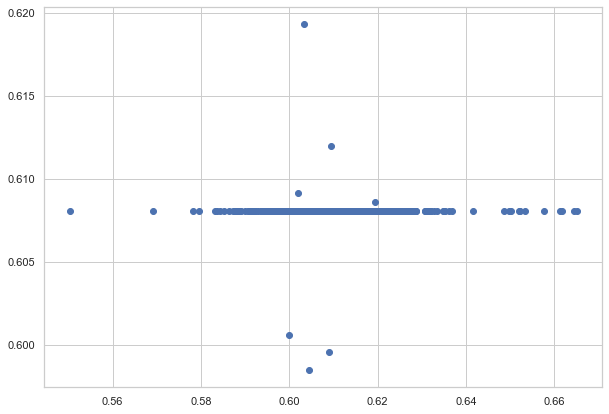

In [ ]:
#linear relationship
plt.figure(figsize=(10,7))
plt.scatter(y_test,predict_poly)

In [ ]:
print(model.intercept_)
print(linear_reg2.intercept_)

0.607439514572794
0.6080418152394758


In [ ]:
print(model.coef_)
print(linear_reg2.coef_)

[ 6.86640441e-03  3.24835498e-03 -2.64704057e-13 -7.07332091e-02
  1.65500799e-02]
[ 0.00000000e+00  4.97032138e-22 -7.45551614e-18 -8.67168738e-13
 -3.29189823e-17  1.03851935e-17 -8.38125795e-17 -1.84764373e-18
  3.68482016e-12 -3.00618592e-17  6.42990163e-18 -8.39407473e-18
 -1.40880395e-12 -9.36094434e-18  5.52304157e-18 -2.31568918e-22
 -2.44229622e-11  1.72465498e-09 -1.02504146e-17  8.11376113e-19
  2.89454316e-18]


In [ ]:
#RMSE
from sklearn import metrics

In [ ]:
mean_sq_err=metrics.mean_squared_error(y_test,predict_poly)

In [ ]:
RMSE=np.sqrt(mean_sq_err)
RMSE

0.0117974640115249

No handles with labels found to put in legend.


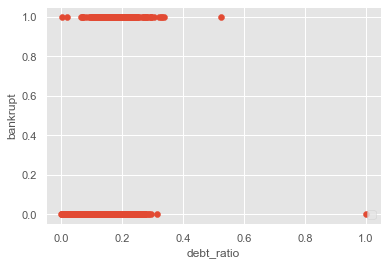

In [ ]:
# Drawing and plotting model
plot = "debt_ratio" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


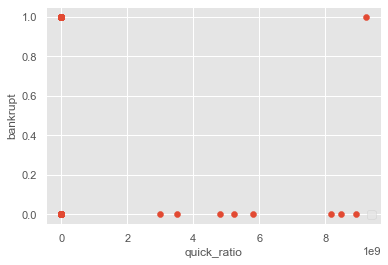

In [ ]:
# Drawing and plotting model
plot = "quick_ratio" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


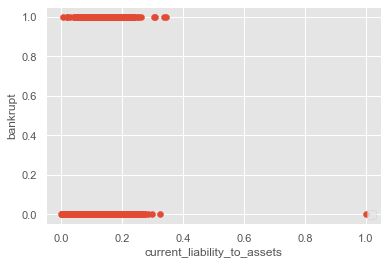

In [ ]:
# Drawing and plotting model
plot = "current_liability_to_assets" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


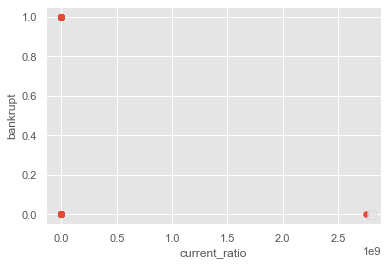

In [ ]:
# Drawing and plotting model
plot = "current_ratio" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


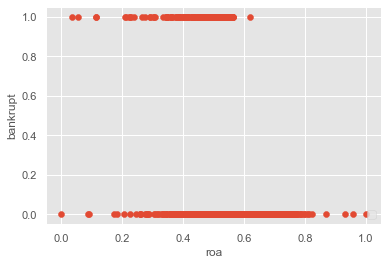

In [ ]:
# Drawing and plotting model
plot = "roa" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


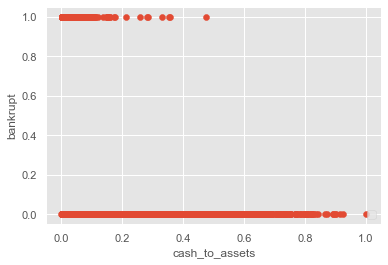

In [ ]:
# Drawing and plotting model
plot = "cash_to_assets" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


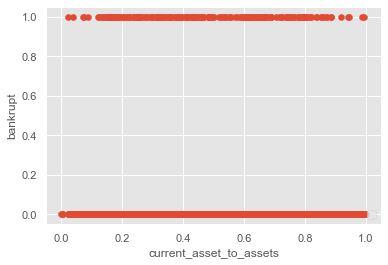

In [ ]:
# Drawing and plotting model
plot = "current_asset_to_assets" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


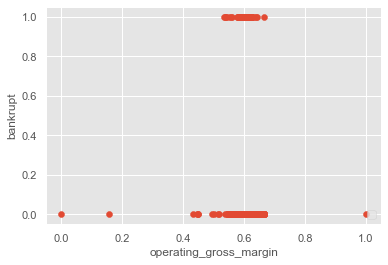

In [ ]:
# Drawing and plotting model
plot = "operating_gross_margin" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


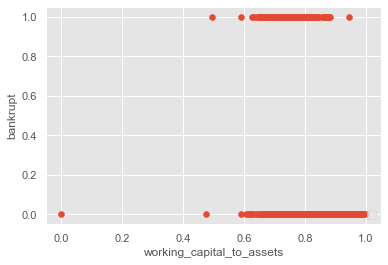

In [ ]:
# Drawing and plotting model
plot = "working_capital_to_assets" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


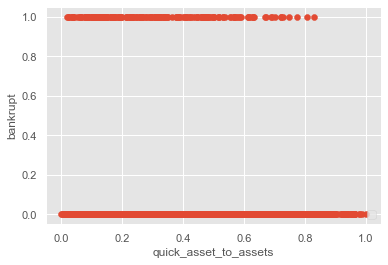

In [ ]:
# Drawing and plotting model
plot = "quick_asset_to_assets" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


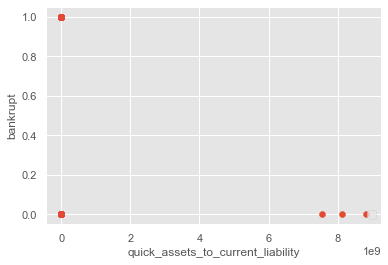

In [ ]:
# Drawing and plotting model
plot = "quick_assets_to_current_liability" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


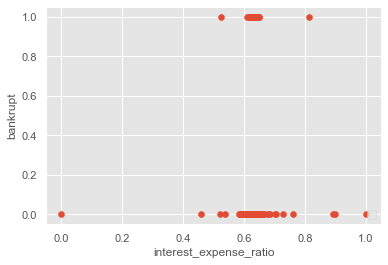

In [ ]:
# Drawing and plotting model
plot = "interest_expense_ratio" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

No handles with labels found to put in legend.


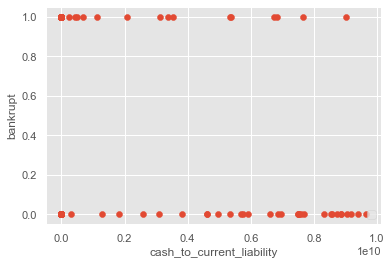

In [ ]:
# Drawing and plotting model
plot = "cash_to_current_liability" 
style.use("ggplot")
plt.scatter(bankrupt[plot], bankrupt["bankrupt"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("bankrupt")
plt.show()

Decision Tree regression

In [ ]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([0.61097738, 0.61160438, 0.55578057, 0.60199772, 0.60592542,
       0.62929705, 0.60155811, 0.62173713, 0.58635178, 0.63323916,
       0.60285533, 0.60712175, 0.60252382, 0.61373759, 0.56964644,
       0.62432436, 0.59996541, 0.6117341 , 0.5978394 , 0.60285533,
       0.61871027, 0.59897087, 0.61103504, 0.61764367, 0.594654  ,
       0.60574525, 0.59515848, 0.60368411, 0.59817092, 0.62015163,
       0.61792473, 0.6250018 , 0.60881535, 0.60885138, 0.63723893,
       0.59616743, 0.60477954, 0.61112873, 0.61775177, 0.60010954,
       0.60449127, 0.60765505, 0.59796192, 0.60161576, 0.60640828,
       0.59667911, 0.60673259, 0.60438317, 0.60722985, 0.60230041,
       0.60981709, 0.61274305, 0.60435434, 0.60227158, 0.60323729,
       0.60262471, 0.59702504, 0.6058966 , 0.59703224, 0.60252382,
       0.57892878, 0.60121218, 0.61357904, 0.59920149, 0.61051615,
       0.60002306, 0.60726589, 0.62073538, 0.60519754, 0.59484138,
       0.62810793, 0.60145721, 0.62810793, 0.62221998, 0.59613

In [ ]:
reg.score(X_test,y_test)

-0.841200790462932

In [ ]:
for i in range(len(y_test)):
    print("Actual:",y_test[i],"Predicted:",y_pred[i])

Actual: 0.601406766 Predicted: 0.610977385
Actual: 0.600426642 Predicted: 0.611604376
Actual: 0.603006673 Predicted: 0.555780568
Actual: 0.606206489 Predicted: 0.601997723
Actual: 0.602293201 Predicted: 0.605925424
Actual: 0.619517433 Predicted: 0.62929705
Actual: 0.609312616 Predicted: 0.601558108
Actual: 0.622047017 Predicted: 0.621737125
Actual: 0.634990415 Predicted: 0.586351778
Actual: 0.618227418 Predicted: 0.633239165
Actual: 0.622594733 Predicted: 0.602855331
Actual: 0.61355021 Predicted: 0.607121752
Actual: 0.591706424 Predicted: 0.602523818
Actual: 0.604484066 Predicted: 0.613737586
Actual: 0.624461292 Predicted: 0.569646435
Actual: 0.616259963 Predicted: 0.624324363
Actual: 0.604145347 Predicted: 0.599965407
Actual: 0.60413814 Predicted: 0.611734098
Actual: 0.59917266 Predicted: 0.597839404
Actual: 0.598913216 Predicted: 0.602855331
Actual: 0.632179766 Predicted: 0.618710273
Actual: 0.596153015 Predicted: 0.59897087
Actual: 0.610047709 Predicted: 0.611035039
Actual: 0.594639

Actual: 0.603237291 Predicted: 0.612108851
Actual: 0.599424898 Predicted: 0.610710734
Actual: 0.612195333 Predicted: 0.610415255
Actual: 0.614926707 Predicted: 0.6095072
Actual: 0.594423385 Predicted: 0.628179997
Actual: 0.596772799 Predicted: 0.593500915
Actual: 0.614969948 Predicted: 0.606581242
Actual: 0.569098719 Predicted: 0.618811168
Actual: 0.626147682 Predicted: 0.618551723
Actual: 0.602905778 Predicted: 0.595273786
Actual: 0.603042707 Predicted: 0.61089811
Actual: 0.600376195 Predicted: 0.600851843
Actual: 0.601255423 Predicted: 0.606307384
Actual: 0.612930426 Predicted: 0.613362833
Actual: 0.605161504 Predicted: 0.617701322
Actual: 0.597897058 Predicted: 0.619250782
Actual: 0.591922628 Predicted: 0.6064299
Actual: 0.60472189 Predicted: 0.600102336
Actual: 0.59818533 Predicted: 0.606494761
Actual: 0.605759668 Predicted: 0.608505456
Actual: 0.628086309 Predicted: 0.625218005
Actual: 0.601111287 Predicted: 0.618638205
Actual: 0.606314591 Predicted: 0.612512432
Actual: 0.60187520

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(reg.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(reg.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(reg,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree regression','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                    Details  \
1                                       XGBoost               All features   
6                         Multiple Regression-2  selected features(best 5)   
2                   Gradient Boosting Regressor               All features   
7               Polynomial Regression(degree 2)               All Features   
5                           Cat Boost Regressor               All features   
4                                      LightGBM               All features   
3                             AdaBoostRegressor               All features   
8                      Decision Tree regression               All Features   
0  Multiple Linear Regression(feauture scaling)               All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
6                           0.011                 0.085   
2                           0.013                 0.970   
7                           0.012                 0.002   
5                           0.013                 0.992   
4                           0.013                 0.867   
3                           0.020                 0.507   
8                           0.016                 1.000   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
6                          0.085             0.154                      0.149   
2                          0.969             0.098                      0.075   
7                          0.001            -0.005                     -0.011   
5                          0.992             0.169                      0.148   
4                          0.866             0.185                      0.165   
3                          0.506            -1.002                     -1.054   
8                          1.000            -0.841                     -0.852   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
6             5.500000e-02  
2             0.000000e+00  
7            -7.900000e-02  
5            -1.370000e-01  
4            -1.680000e-01  
3            -3.050000e-01  
8            -1.411000e+00  
0            -1.473426e+19

Random Forest Regression

In [ ]:
reg=RandomForestRegressor(n_estimators=400)
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400)

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([0.61257196, 0.6079859 , 0.59976209, 0.60446767, 0.60395033,
       0.62357659, 0.60719805, 0.61087404, 0.61596234, 0.62183721,
       0.61411207, 0.60775799, 0.60060099, 0.60128949, 0.62181166,
       0.61691047, 0.60602464, 0.60128229, 0.60808085, 0.60455478,
       0.6069309 , 0.60625659, 0.61824554, 0.60293513, 0.59757156,
       0.60612093, 0.60864608, 0.60566232, 0.60189474, 0.61418801,
       0.60563333, 0.60648361, 0.61142786, 0.61056076, 0.61549956,
       0.61004549, 0.60591775, 0.6060954 , 0.6126788 , 0.60054599,
       0.60829604, 0.60500238, 0.60308647, 0.60983722, 0.60999577,
       0.60427815, 0.60943998, 0.6053151 , 0.60782571, 0.60435496,
       0.60277078, 0.60404957, 0.60688913, 0.6040863 , 0.60605635,
       0.6056093 , 0.60432438, 0.60232981, 0.60426943, 0.60694513,
       0.59606484, 0.60464588, 0.60853488, 0.60622858, 0.60383994,
       0.59893062, 0.60494606, 0.615185  , 0.60659405, 0.60416102,
       0.63290236, 0.59554031, 0.62368078, 0.61679696, 0.59959

In [ ]:
reg.score(X_test,y_test)

0.04139458050621103

In [ ]:
for i in range(len(y_test)):
    print("Actual:",y_test[i],"Predicted:",y_pred[i])

Actual: 0.601406766 Predicted: 0.612571959830001
Actual: 0.600426642 Predicted: 0.6079858998150014
Actual: 0.603006673 Predicted: 0.5997620858350003
Actual: 0.606206489 Predicted: 0.6044676703274999
Actual: 0.602293201 Predicted: 0.6039503307625008
Actual: 0.619517433 Predicted: 0.6235765866649996
Actual: 0.609312616 Predicted: 0.6071980534475009
Actual: 0.622047017 Predicted: 0.6108740397275002
Actual: 0.634990415 Predicted: 0.6159623408550005
Actual: 0.618227418 Predicted: 0.6218372096050004
Actual: 0.622594733 Predicted: 0.6141120691274992
Actual: 0.61355021 Predicted: 0.6077579851699997
Actual: 0.591706424 Predicted: 0.6006009924325006
Actual: 0.604484066 Predicted: 0.6012894932225007
Actual: 0.624461292 Predicted: 0.6218116613549999
Actual: 0.616259963 Predicted: 0.6169104663225002
Actual: 0.604145347 Predicted: 0.6060246435950005
Actual: 0.60413814 Predicted: 0.6012822863999999
Actual: 0.59917266 Predicted: 0.6080808494300005
Actual: 0.598913216 Predicted: 0.6045547824374987
Actu

Actual: 0.600376195 Predicted: 0.6706283421349997
Actual: 0.601255423 Predicted: 0.6029511632224992
Actual: 0.612930426 Predicted: 0.60816605167
Actual: 0.605161504 Predicted: 0.6104960794625001
Actual: 0.597897058 Predicted: 0.6028948420974983
Actual: 0.591922628 Predicted: 0.6080651745750001
Actual: 0.60472189 Predicted: 0.607065070079999
Actual: 0.59818533 Predicted: 0.6112497659150006
Actual: 0.605759668 Predicted: 0.6040918542824982
Actual: 0.628086309 Predicted: 0.6255540940975005
Actual: 0.601111287 Predicted: 0.6195346934499999
Actual: 0.606314591 Predicted: 0.6027843980924987
Actual: 0.601875207 Predicted: 0.6008876062224979
Actual: 0.603049914 Predicted: 0.6062934209774994
Actual: 0.609874746 Predicted: 0.6222059448874991
Actual: 0.603424667 Predicted: 0.6060015998574992
Actual: 0.60779919 Predicted: 0.6146488851500007
Actual: 0.596066533 Predicted: 0.6010504978799996
Actual: 0.614443852 Predicted: 0.6110494711950007
Actual: 0.598242984 Predicted: 0.6005068716099994
Actual: 0

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(reg.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(reg.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(reg,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest Regression','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                    Details  \
1                                       XGBoost               All features   
6                         Multiple Regression-2  selected features(best 5)   
2                   Gradient Boosting Regressor               All features   
7               Polynomial Regression(degree 2)               All Features   
9                      Random Forest Regression               All Features   
5                           Cat Boost Regressor               All features   
4                                      LightGBM               All features   
3                             AdaBoostRegressor               All features   
8                      Decision Tree regression               All Features   
0  Multiple Linear Regression(feauture scaling)               All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
1                           0.012                 0.839   
6                           0.011                 0.085   
2                           0.013                 0.970   
7                           0.012                 0.002   
9                           0.012                 0.871   
5                           0.013                 0.992   
4                           0.013                 0.867   
3                           0.020                 0.507   
8                           0.016                 1.000   
0                           0.013                 0.089   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
1                          0.838             0.262                      0.243   
6                          0.085             0.154                      0.149   
2                          0.969             0.098                      0.075   
7                          0.001            -0.005                     -0.011   
9                          0.871             0.041                      0.036   
5                          0.992             0.169                      0.148   
4                          0.866             0.185                      0.165   
3                          0.506            -1.002                     -1.054   
8                          1.000            -0.841                     -0.852   
0                          0.086             0.149                      0.127   

   5-Fold Cross Validation  
1             5.800000e-02  
6             5.500000e-02  
2             0.000000e+00  
7            -7.900000e-02  
9            -1.200000e-01  
5            -1.370000e-01  
4            -1.680000e-01  
3            -3.050000e-01  
8            -1.411000e+00  
0            -1.473426e+19

In [ ]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=True)

Model                    Details  \
0  Multiple Linear Regression(feauture scaling)               All features   
8                      Decision Tree regression               All Features   
3                             AdaBoostRegressor               All features   
4                                      LightGBM               All features   
5                           Cat Boost Regressor               All features   
9                      Random Forest Regression               All Features   
7               Polynomial Regression(degree 2)               All Features   
2                   Gradient Boosting Regressor               All features   
6                         Multiple Regression-2  selected features(best 5)   
1                                       XGBoost               All features   

   Root Mean Squared Error (RMSE)  R-squared (training)  \
0                           0.013                 0.089   
8                           0.016                 1.000   
3                           0.020                 0.507   
4                           0.013                 0.867   
5                           0.013                 0.992   
9                           0.012                 0.871   
7                           0.012                 0.002   
2                           0.013                 0.970   
6                           0.011                 0.085   
1                           0.012                 0.839   

   Adjusted R-squared (training)  R-squared (test)  Adjusted R-squared (test)  \
0                          0.086             0.149                      0.127   
8                          1.000            -0.841                     -0.852   
3                          0.506            -1.002                     -1.054   
4                          0.866             0.185                      0.165   
5                          0.992             0.169                      0.148   
9                          0.871             0.041                      0.036   
7                          0.001            -0.005                     -0.011   
2                          0.969             0.098                      0.075   
6                          0.085             0.154                      0.149   
1                          0.838             0.262                      0.243   

   5-Fold Cross Validation  
0            -1.473426e+19  
8            -1.411000e+00  
3            -3.050000e-01  
4            -1.680000e-01  
5            -1.370000e-01  
9            -1.200000e-01  
7            -7.900000e-02  
2             0.000000e+00  
6             5.500000e-02  
1             5.800000e-02

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
classifier=KNeighborsRegressor(n_neighbors=5)

In [ ]:
classifier.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

array([0.60961963, 0.60384987, 0.59173958, 0.60521916, 0.60315225,
       0.61916142, 0.60677294, 0.61426801, 0.60890615, 0.61777627,
       0.61989795, 0.60928379, 0.60686087, 0.60015278, 0.6042621 ,
       0.61675291, 0.6056458 , 0.60045403, 0.60597731, 0.60658989,
       0.60711454, 0.61929258, 0.62196198, 0.60329927, 0.60053474,
       0.60675709, 0.6081307 , 0.60660286, 0.60106661, 0.60962683,
       0.60459505, 0.61321293, 0.6049871 , 0.61325761, 0.61603367,
       0.61925078, 0.60438605, 0.61719108, 0.60888453, 0.59988181,
       0.60916992, 0.60532438, 0.59943499, 0.60666772, 0.61675147,
       0.60014125, 0.6151112 , 0.60103922, 0.60506205, 0.60158694,
       0.60671529, 0.60246328, 0.60764064, 0.60395653, 0.60440911,
       0.60306433, 0.60680177, 0.60835411, 0.60476369, 0.60757578,
       0.59974056, 0.6085905 , 0.60535032, 0.60590957, 0.60669655,
       0.59840153, 0.60265066, 0.61813949, 0.60592398, 0.60614451,
       0.620081  , 0.58874876, 0.62126868, 0.61792329, 0.60043

In [ ]:
classifier.score(X_test,y_test)

-0.02574831997922611

In [ ]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(classifier.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(classifier.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(classifier.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(classifier.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(classifier,X,y,cv=5).mean(),'.3f'))

In [ ]:
r = evaluation.shape[0]
evaluation.loc[r] = ['KNN(neighbhors=5)','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Model                    Details  \
1                                        XGBoost               All features   
6                          Multiple Regression-2  selected features(best 5)   
2                    Gradient Boosting Regressor               All features   
7                Polynomial Regression(degree 2)               All Features   
9                       Random Forest Regression               All Features   
5                            Cat Boost Regressor               All features   
4                                       LightGBM               All features   
10                             KNN(neighbhors=5)               All Features   
3                              AdaBoostRegressor               All features   
8                       Decision Tree regression               All Features   
0   Multiple Linear Regression(feauture scaling)               All features   

    Root Mean Squared Error (RMSE)  R-squared (training)  \
1                            0.012                 0.839   
6                            0.011                 0.085   
2                            0.013                 0.970   
7                            0.012                 0.002   
9                            0.012                 0.871   
5                            0.013                 0.992   
4                            0.013                 0.867   
10                           0.012                 0.361   
3                            0.020                 0.507   
8                            0.016                 1.000   
0                            0.013                 0.089   

    Adjusted R-squared (training)  R-squared (test)  \
1                           0.838             0.262   
6                           0.085             0.154   
2                           0.969             0.098   
7                           0.001            -0.005   
9                           0.871             0.041   
5                           0.992             0.169   
4                           0.866             0.185   
10                          0.361            -0.026   
3                           0.506            -1.002   
8                           1.000            -0.841   
0                           0.086             0.149   

    Adjusted R-squared (test)  5-Fold Cross Validation  
1                       0.243             5.800000e-02  
6                       0.149             5.500000e-02  
2                       0.075             0.000000e+00  
7                      -0.011            -7.900000e-02  
9                       0.036            -1.200000e-01  
5                       0.148            -1.370000e-01  
4                       0.165            -1.680000e-01  
10                     -0.032            -2.580000e-01  
3                      -1.054            -3.050000e-01  
8                      -0.852            -1.411000e+00  
0                       0.127            -1.473426e+19

**Neural Network**

In [ ]:
! pip install tensorflow==2.2

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2
ERROR: No matching distribution found for tensorflow==2.2


In [ ]:
from __future__ import print_function
import pandas as pd
from pandas import Series,DataFrame
#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

path = "b_data.csv"
data_set = pd.read_csv(path)
x = DataFrame(data_set.drop(["bankrupt"],axis=1))

y = DataFrame(data_set["bankrupt"])

# normalize x and y with sklearn.preprocessing
x = preprocessing.scale(x)
y = preprocessing.scale(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(18,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(50,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(50,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))

model.summary()
print("\n")

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#モジュールの読み込み
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

path = "b_data.csv"
data_set = pd.read_csv(path)

#説明変数(except bankrupt)
x = DataFrame(data_set.drop(["bankrupt"],axis=1))


#目的変数(bankrupt)
y = DataFrame(data_set["bankrupt"])

# normalize x and y with sklearn.preprocessing
x = preprocessing.scale(x)
y = preprocessing.scale(y)

#説明変数・目的変数をそれぞれ訓練データ・テストデータに分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(18,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(50,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(50,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))

model.summary()
print("\n")

model.compile(loss='mean_squared_error',optimizer=Adam(),metrics=['mse'])

history = model.fit(x_train, y_train, batch_size=200, epochs=100, verbose=1, validation_data=(x_test, y_test))

#RMSE
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("KERAS REG MSE : %.2f" % (mse))

# show its root mean square error
mse = mean_squared_error(y_test, y_pred)
print("KERAS REG RMSE : %.2f" % (mse ** 0.5))

score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

plot_history(history)